In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
data =np.array([["Isaias_1", "'vision', 'isaiah', 'son', 'amoz', ',', 'saw', 'concerning', 'judah', 'jerusalem', 'days', 'uzziah', ',', 'jotham', ',', 'ahaz', ',', 'hezekiah', ',', 'kings', 'judah.hear', ',', 'heavens', ',', 'give', 'ear', ',', 'earth', ':', 'lord', 'spoken', ',', 'nourished', 'brought', 'children', ',', 'rebelled', 'me.the', 'ox', 'knows', 'owner', ',', 'ass', 'master', ', 'crib', ':', 'israel', 'know', ',', 'people', 'consider.ah', 'sinful', 'nation', ',', 'people', 'laden', 'iniquity', ',', 'seed', 'evildoers', ',', 'children', 'corrupters', ':', 'forsaken', 'lord', ',', 'provoked', 'holy', 'one', 'israel', 'anger', ',', 'gone', 'away', 'backward.why', 'stricken', '?', 'revolt', ':', 'whole', 'head', 'sick', ',', 'whole', 'heart', 'faint.from', 'sole', 'foot', 'even', 'head', 'soundness', ';', 'wounds', ',', 'bruises', ',', 'putrefying', 'sores', ':', 'closed', ',', 'neither', 'bound', ',', 'neither', 'mollified', 'ointment.your', 'country', 'desolate', ',', 'cities', 'burned', 'fire', ':', 'land', ',', 'strangers', 'devour', 'presence', ',', 'desolate', ',', 'overthrown', 'strangers.and', 'daughter', 'zion', 'left', 'cottage', 'vineyard', ',', 'lodge', 'garden', 'cucumbers', ',', 'besieged', 'city.except', 'lord', 'hosts', 'left', 'us', 'small', 'remnant', ',', 'sodom', ',', 'like', 'gomorrah.hear', 'word', 'lord', ',', 'rulers', 'sodom', ';', 'give', 'ear', 'law', 'god', ',', 'people', 'gomorrah.to', 'purpose', 'multitude', 'sacrifices', '?', 'said', 'lord', ':', 'full', 'burnt', 'offerings', 'rams', ',', 'fat', 'fed', 'beasts', ';', 'delight', 'blood', 'bullocks', ',', 'lambs', ',', 'goats.when', 'come', 'appear', ',', 'required', 'hand', ',', 'tread', 'courtsbring', 'vain', 'oblations', ';', 'incense', 'abomination', ';', 'new', 'moons', 'sabbaths', ',', 'calling', 'assemblies', ',', 'away', ';', 'iniquity', ',', 'even', 'solemn', 'meeting.your', 'new', 'moons', 'appointed', 'feasts', 'soul', 'hates', ':', 'trouble', ';', 'weary', 'bear', 'them.and', 'spread', 'forth', 'hands', ',', 'hide', 'eyes', ':', 'yes', ',', 'make', 'many', 'prayers', ',', 'hear', ':', 'hands', 'full', 'blood.wash', ',', 'make', 'clean', ';', 'put', 'away', 'evil', 'doings', 'eyes', ';', 'cease', 'evil', ';', 'learn', 'well', ';', 'seek', 'judgment', ',', 'relieve', 'oppressed', ',', 'judge', 'fatherless', ',', 'plead', 'widow.come', ',', 'let', 'us', 'reason', 'together', ',', 'said', 'lord', ':', 'though', 'sins', 'scarlet', ',', 'shall', 'white', 'snow', ';', 'though', 'red', 'like', 'crimson', ',', 'shall', 'wool.if', 'willing', 'obedient', ',', 'shall', 'eat', 'good', 'land', ':', 'refuse', 'rebel', ',', 'shall', 'devoured', 'sword', ':', 'mouth', 'lord', 'spoken', 'it.how', 'faithful', 'city', 'become', 'harlot', '!', 'full', 'judgment', ';', 'righteousness', 'lodged', ';', 'murderers.your', 'silver', 'become', 'dross', ',', 'wine', 'mixed', 'water', ':', 'princes', 'rebellious', ',', 'companions', 'thieves', ':', 'every', 'one', 'loves', 'gifts', ',', 'follows', 'rewards', ':', 'judge', 'fatherless', ',', 'neither', 'cause', 'widow', 'come', 'them.therefore', 'said', 'lord', ',', 'lord', 'hosts', ',', 'mighty', 'one', 'israel', ',', 'ah', ',', 'ease', 'adversaries', ',', 'avenge', 'enemies', ':', 'turn', 'hand', ',', 'purely', 'purge', 'away', 'dross', ',', 'take', 'away', 'tin', ':', 'restore', 'judges', 'first', ',', 'counsellors', 'beginning', ':', 'afterward', 'shall', 'called', ',', 'city', 'righteousness', ',', 'faithful', 'city.zion', 'shall', 'redeemed', 'judgment', ',', 'converts', 'righteousness.and', 'destruction', 'transgressors', 'sinners', 'shall', 'together', ',', 'forsake', 'lord', 'shall', 'consumed.for', 'shall', 'ashamed', 'oaks', 'desired', ',', 'shall', 'confounded', 'gardens', 'chosen.for', 'shall', 'oak', 'whose', 'leaf', 'fades', ',', 'garden', 'water.and', 'strong', 'shall', 'wick', ',', 'maker', 'spark', ',', 'shall', 'burn', 'together', ',', 'none', 'shall', 'quench', '.'"],
               ["Isaias_2", "'word', 'isaiah', 'son', 'amoz', 'saw', 'concerning', 'judah', 'jerusalem.and', 'shall', 'come', 'pass', 'last', 'days', ',', 'mountain', 'lord', ', 'house', 'shall', 'established', 'top', 'mountains', ',', 'shall', 'exalted', 'hills', ';', 'nations', 'shall', 'flow', 'it.and', 'many', 'people', 'shall', 'go', 'say', ',', 'come', ',', 'let', 'us', 'go', 'mountain', 'lord', ',', 'house', 'god', 'jacob', ';', 'teach', 'us', 'ways', ',', 'walk', 'paths', ':', 'zion', 'shall', 'go', 'forth', 'law', ',', 'word', 'lord', 'jerusalem.and', 'shall', 'judge', 'among', 'nations', ',', 'shall', 'rebuke', 'many', 'people', ':', 'shall', 'beat', 'swords', 'plowshares', ',', 'spears', 'pruning', 'hooks', ':', 'nation', 'shall', 'lift', 'sword', 'nation', ',', 'neither', 'shall', 'learn', 'war', 'more.o', 'house', 'jacob', ',', 'come', ',', 'let', 'us', 'walk', 'light', 'lord.therefore', 'forsaken', 'people', 'house', 'jacob', ',', 'replenished', 'east', ',', 'soothsayers', 'like', 'philistines', ',', 'please', 'children', 'strangers.their', 'land', 'also', 'full', 'silver', 'gold', ',', 'neither', 'end', 'treasures', ';', 'land', 'also', 'full', 'horses', ',', 'neither', 'end', 'chariots', ':', 'land', 'also', 'full', 'idols', ';', 'worship', 'work', 'hands', ',', 'fingers', 'madeand', 'mean', 'man', 'bows', ',', 'great', 'man', 'humbles', ':', 'therefore', 'forgive', 'not.enter', 'rock', ',', 'hide', 'dust', ',', 'fear', 'lord', ',', 'glory', 'majesty.the', 'lofty', 'looks', 'man', 'shall', 'humbled', ',', 'haughtiness', 'men', 'shall', 'bowed', ',', 'lord', 'alone', 'shall', 'exalted', 'day.for', 'day', 'lord', 'hosts', 'shall', 'every', 'one', 'proud', 'lofty', ',', 'every', 'one', 'lifted', ';', 'shall', 'brought', 'low', ':', 'cedars', 'lebanon', ',', 'high', 'lifted', ',', 'oaks', 'bashan', ',', 'high', 'mountains', ',', 'hills', 'lifted', ',', 'every', 'high', 'tower', ',', 'every', 'fenced', 'wall', ',', 'ships', 'tarshish', ',', 'pleasant', 'pictures.and', 'loftiness', 'man', 'shall', 'bowed', ',', 'haughtiness', 'men', 'shall', 'made', 'low', ':', 'lord', 'alone', 'shall', 'exalted', 'day.and', 'idols', 'shall', 'utterly', 'abolish.and', 'shall', 'go', 'holes', 'rocks', ',', 'caves', 'earth', ',', 'fear', 'lord', ',', 'glory', 'majesty', ',', 'rises', 'shake', 'terribly', 'earth.in', 'day', 'man', 'shall', 'cast', 'idols', 'silver', ',', 'idols', 'gold', ',', 'made', 'one', 'worship', ',', 'moles', 'bats', ';', 'go', 'clefts', 'rocks', ',', 'tops', 'ragged', 'rocks', ',', 'fear', 'lord', ',', 'glory', 'majesty', ',', 'rises', 'shake', 'terribly', 'earth.cease', 'man', ',', 'whose', 'breath', 'nostrils', ':', 'wherein', 'accounted', '?'"],
               ["Isaias_3", "',', 'behold', ',', 'lord', ',', 'lord', 'hosts', ',', 'take', 'away', 'jerusalem', 'judah', 'stay', 'staff', ',', 'whole', 'stay', 'bread', ',', 'whole', 'stay', 'water.the', 'mighty', 'man', ',', 'man', 'war', ',', 'judge', ',', 'prophet', ',', 'prudent', ',', 'ancient', ',', 'captain', 'fifty', ',', 'honorable', 'man', ',', 'counselor', ',', 'cunning', 'artificer', ',', 'eloquent', 'orator.and', 'give', 'children', 'princes', ',', 'babes', 'shall', 'rule', 'them.and', 'people', 'shall', 'oppressed', ',', 'every', 'one', 'another', ',', 'every', 'one', 'neighbor', ':', 'child', 'shall', 'behave', 'proudly', 'ancient', ',', 'base', 'honorable.when', 'man', 'shall', 'take', 'hold', 'brother', 'house', 'father', ',', 'saying', ',', 'clothing', ',', 'ruler', ',', 'let', 'ruin', 'hand', ':', 'day', 'shall', 'swear', ',', 'saying', ',', 'healer', ';', 'house', 'neither', 'bread', 'clothing', ':', 'make', 'ruler', 'people.for', 'jerusalem', 'ruined', ',', 'judah', 'fallen', ':', 'tongue', 'doings', 'lord', ',', 'provoke', 'eyes', 'glory.the', 'show', 'countenance', 'witness', ';', 'declare', 'sin', 'sodom', ',', 'hide', '.', 'woe', 'soul', '!', 'rewarded', 'evil', 'themselves.say', 'righteous', ',', 'shall', 'well', ':', 'shall', 'eat', 'fruit', 'doings.woe', 'wicked', '!', 'shall', 'ill', ':', 'reward', 'hands', 'shall', 'given', 'him.as', 'people', ',', 'children', 'oppressors', ',', 'women', 'rule', '.', 'people', ',', 'lead', 'cause', 'err', ',', 'destroy', 'way', 'paths.the', 'lord', 'stands', 'plead', ',', 'stands', 'judge', 'people.the', 'lord', 'enter', 'judgment', 'ancients', 'people', ',', 'princes', 'thereof', ':', 'eaten', 'vineyard', ';', 'spoil', 'poor', 'houses.what', 'mean', 'beat', 'people', 'pieces', ',', 'grind', 'faces', 'poor', '?', 'said', 'lord', 'god', 'hosts.moreover', 'lord', 'said', ',', 'daughters', 'zion', 'haughty', ',', 'walk', 'stretched', 'forth', 'necks', 'wanton', 'eyes', ',', 'walking', 'mincing', 'go', ',', 'making', 'tinkling', 'feet', ':', 'therefore', 'lord', 'smite', 'scab', 'crown', 'head', 'daughters', 'zion', ',', 'lord', 'discover', 'secret', 'parts.in', 'day', 'lord', 'take', 'away', 'bravery', 'tinkling', 'ornaments', 'feet', ',', 'cauls', ',', 'round', 'tires', 'like', 'moon', ',', 'chains', ',', 'bracelets', ',', 'mufflers', ',', 'bonnets', ',', 'ornaments', 'legs', ',', 'headbands', ',', 'tablets', ',', 'earrings', ',', 'rings', ',', 'nose', 'jewels', ',', 'changeable', 'suits', 'apparel', ',', 'mantles', ',', 'wimples', ',', 'crisping', 'pins', ',', 'glasses', ',', 'fine', 'linen', ',', 'hoods', ',', 'veils.and', 'shall', 'come', 'pass', ',', 'instead', 'sweet', 'smell', 'shall', 'stink', ';', 'instead', 'girdle', 'rent', ';', 'instead', 'well', 'set', 'hair', 'baldness', ';', 'instead', 'stomacher', 'girding', 'sackcloth', ';', 'burning', 'instead', 'beauty.your', 'men', 'shall', 'fall', 'sword', ',', 'mighty', 'war.and', 'gates', 'shall', 'lament', 'mourn', ';', 'desolate', 'shall', 'sit', 'ground', '.'"],
               ["Isaias_4", "'day', 'seven', 'women', 'shall', 'take', 'hold', 'one', 'man', ',', 'saying', ',', 'eat', 'bread', ',', 'wear', 'apparel', ':', 'let', 'us', 'called', 'name', ',', 'take', 'away', 'reproach.in', 'day', 'shall', 'branch', 'lord', 'beautiful', 'glorious', ',', 'fruit', 'earth', 'shall', 'excellent', 'comely', 'escaped', 'israel.and', 'shall', 'come', 'pass', ',', 'left', 'zion', ',', 'remains', 'jerusalem', ',', 'shall', 'called', 'holy', ',', 'even', 'every', 'one', 'written', 'among', 'living', 'jerusalem', ':', 'lord', 'shall', 'washed', 'away', 'filth', 'daughters', 'zion', ',', 'shall', 'purged', 'blood', 'jerusalem', 'middle', 'thereof', 'spirit', 'judgment', ',', 'spirit', 'burning.and', 'lord', 'create', 'every', 'dwelling', 'place', 'mount', 'zion', ',', 'assemblies', ',', 'cloud', 'smoke', 'day', ',', 'shining', 'flaming', 'fire', 'night', ':', 'glory', 'shall', 'defense.and', 'shall', 'tabernacle', 'shadow', 'day', 'time', 'heat', ',', 'place', 'refuge', ',', 'covert', 'storm', 'rain', '.'"],
               ["Isaias_5", "'sing', 'well', 'beloved', 'song', 'beloved', 'touching', 'vineyard', '.', 'well', 'beloved', 'vineyard', 'fruitful', 'hill', ':', 'fenced', ',', 'gathered', 'stones', 'thereof', ',', 'planted', 'choicest', 'vine', ',', 'built', 'tower', 'middle', ',', 'also', 'made', 'wine', 'press', 'therein', ':', 'looked', 'bring', 'forth', 'grapes', ',', 'brought', 'forth', 'wild', 'grapes.and', ',', 'inhabitants', 'jerusalem', ',', 'men', 'judah', ',', 'judge', ',', 'pray', ',', 'vineyard.what', 'could', 'done', 'vineyard', ',', 'done', '?', ',', 'looked', 'bring', 'forth', 'grapes', ',', 'brought', 'forth', 'wild', 'grapes', '?', 'go', ';', 'tell', 'vineyard', ':', 'take', 'away', 'hedge', 'thereof', ',', 'shall', 'eaten', ';', 'break', 'wall', 'thereof', ',', 'shall', 'trodden', ':', 'lay', 'waste', ':', 'shall', 'pruned', ',', 'dig', ';', 'shall', 'come', 'briers', 'thorns', ':', 'also', 'command', 'clouds', 'rain', 'rain', 'it.for', 'vineyard', 'lord', 'hosts', 'house', 'israel', ',', 'men', 'judah', 'pleasant', 'plant', ':', 'looked', 'judgment', ',', 'behold', 'oppression', ';', 'righteousness', ',', 'behold', 'cry.woe', 'join', 'house', 'house', ',', 'lay', 'field', 'field', ',', 'till', 'place', ',', 'may', 'placed', 'alone', 'middle', 'earth', '!', 'ears', 'said', 'lord', 'hosts', ',', 'truth', 'many', 'houses', 'shall', 'desolate', ',', 'even', 'great', 'fair', ',', 'without', 'inhabitant.yes', ',', 'ten', 'acres', 'vineyard', 'shall', 'yield', 'one', 'bath', ',', 'seed', 'homer', 'shall', 'yield', 'ephah.woe', 'rise', 'early', 'morning', ',', 'may', 'follow', 'strong', 'drink', ';', 'continue', 'night', ',', 'till', 'wine', 'inflame', '!', 'harp', ',', 'viol', ',', 'tabret', ',', 'pipe', ',', 'wine', ',', 'feasts', ':', 'regard', 'work', 'lord', ',', 'neither', 'consider', 'operation', 'hands.therefore', 'people', 'gone', 'captivity', ',', 'knowledge', ':', 'honorable', 'men', 'famished', ',', 'multitude', 'dried', 'thirst.therefore', 'hell', 'enlarged', ',', 'opened', 'mouth', 'without', 'measure', ':', 'glory', ',', 'multitude', ',', 'pomp', ',', 'rejoices', ',', 'shall', 'descend', 'it.and', 'mean', 'man', 'shall', 'brought', ',', 'mighty', 'man', 'shall', 'humbled', ',', 'eyes', 'lofty', 'shall', 'humbled', ':', 'lord', 'hosts', 'shall', 'exalted', 'judgment', ',', 'god', 'holy', 'shall', 'sanctified', 'righteousness.then', 'shall', 'lambs', 'feed', 'manner', ',', 'waste', 'places', 'fat', 'ones', 'shall', 'strangers', 'eat.woe', 'draw', 'iniquity', 'cords', 'vanity', ',', 'sin', 'cart', 'rope', ':', 'say', ',', 'let', 'make', 'speed', ',', 'hasten', 'work', ',', 'may', 'see', ':', 'let', 'counsel', 'holy', 'one', 'israel', 'draw', 'near', 'come', ',', 'may', 'know', '!', 'woe', 'call', 'evil', 'good', ',', 'good', 'evil', ';', 'put', 'darkness', 'light', ',', 'light', 'darkness', ';', 'put', 'bitter', 'sweet', ',', 'sweet', 'bitter', '!', 'woe', 'wise', 'eyes', ',', 'prudent', 'sight', '!', 'woe', 'mighty', 'drink', 'wine', ',', 'men', 'strength', 'mingle', 'strong', 'drink', ':', 'justify', 'wicked', 'reward', ',', 'take', 'away', 'righteousness', 'righteous', '!', 'therefore', 'fire', 'devours', 'stubble', ',', 'flame', 'consumes', 'chaff', ',', 'root', 'shall', 'rottenness', ',', 'blossom', 'shall', 'go', 'dust', ':', 'cast', 'away', 'law', 'lord', 'hosts', ',', 'despised', 'word', 'holy', 'one', 'israel.therefore', 'anger', 'lord', 'kindled', 'people', ',', 'stretched', 'forth', 'hand', ',', 'smitten', ':', 'hills', 'tremble', ',', 'carcasses', 'torn', 'middle', 'streets', '.', 'anger', 'turned', 'away', ',', 'hand', 'stretched', 'still.and', 'lift', 'ensign', 'nations', 'far', ',', 'hiss', 'end', 'earth', ':', ',', 'behold', ',', 'shall', 'come', 'speed', 'swiftly', ':', 'none', 'shall', 'weary', 'stumble', 'among', ';', 'none', 'shall', 'slumber', 'sleep', ';', 'neither', 'shall', 'girdle', 'loins', 'loosed', ',', 'lace', 'shoes', 'broken', ':', 'whose', 'arrows', 'sharp', ',', 'bows', 'bent', ',', horses'hoofs, 'shall', 'counted', 'like', 'flint', ',', 'wheels', 'like', 'whirlwind', ':', 'roaring', 'shall', 'like', 'lion', ',', 'shall', 'roar', 'like', 'young', 'lions', ':', 'yes', ',', 'shall', 'roar', ',', 'lay', 'hold', 'prey', ',', 'shall', 'carry', 'away', 'safe', ',', 'none', 'shall', 'deliver', 'it.and', 'day', 'shall', 'roar', 'like', 'roaring', 'sea', ':', 'one', 'look', 'land', ',', 'behold', 'darkness', 'sorrow', ',', 'light', 'darkened', 'heavens', 'thereof', '.'"],
               ["Isaias_6", "'year', 'king', 'uzziah', 'died', 'saw', 'also', 'lord', 'sitting', 'throne', ',', 'high', 'lifted', ',', 'train', 'filled', 'temple.above', 'stood', 'seraphim', ':', 'one', 'six', 'wings', ';', 'two', 'covered', 'face', ',', 'two', 'covered', 'feet', ',', 'two', 'fly.and', 'one', 'cried', 'another', ',', 'said', ',', 'holy', ',', 'holy', ',', 'holy', ',', 'lord', 'hosts', ':', 'whole', 'earth', 'full', 'glory.and', 'posts', 'door', 'moved', 'voice', 'cried', ',', 'house', 'filled', 'smoke.then', 'said', ',', 'woe', '!', 'undone', ';', 'man', 'unclean', 'lips', ',', 'dwell', 'middle', 'people', 'unclean', 'lips', ':', 'eyes', 'seen', 'king', ',', 'lord', 'hosts.then', 'flew', 'one', 'seraphim', ',', 'live', 'coal', 'hand', ',', 'taken', 'tongs', 'altar', ':', 'laid', 'mouth', ',', 'said', ',', 'see', ',', 'touched', 'lips', ';', 'iniquity', 'taken', 'away', ',', 'sin', 'purged.also', 'heard', 'voice', 'lord', ',', 'saying', ',', 'shall', 'send', ',', 'go', 'us', '?', 'said', ',', ';', 'send', 'me.and', 'said', ',', 'go', ',', 'tell', 'people', ',', 'hear', 'indeed', ',', 'understand', ';', 'see', 'indeed', ',', 'perceive', 'not.make', 'heart', 'people', 'fat', ',', 'make', 'ears', 'heavy', ',', 'shut', 'eyes', ';', 'lest', 'see', 'eyes', ',', 'hear', 'ears', ',', 'understand', 'heart', ',', 'convert', ',', 'healed.then', 'said', ',', 'lord', ',', 'long', '?', 'answered', ',', 'cities', 'wasted', 'without', 'inhabitant', ',', 'houses', 'without', 'man', ',', 'land', 'utterly', 'desolate', ',', 'lord', 'removed', 'men', 'far', 'away', ',', 'great', 'forsaking', 'middle', 'land.but', 'yet', 'shall', 'tenth', ',', 'shall', 'return', ',', 'shall', 'eaten', ':', 'teil', 'tree', ',', 'oak', ',', 'whose', 'substance', ',', 'cast', 'leaves', ':', 'holy', 'seed', 'shall', 'substance', 'thereof', '.'"],
               ["Isaias_7", "'came', 'pass', 'days', 'ahaz', 'son', 'jotham', ',', 'son', 'uzziah', ',', 'king', 'judah', ',', 'rezin', 'king', 'syria', ',', 'pekah', 'son', 'remaliah', ',', 'king', 'israel', ',', 'went', 'toward', 'jerusalem', 'war', ',', 'could', 'prevail', 'it.and', 'told', 'house', 'david', ',', 'saying', ',', 'syria', 'confederate', 'ephraim', '.', 'heart', 'moved', ',', 'heart', 'people', ',', 'trees', 'wood', 'moved', 'wind.then', 'said', 'lord', 'isaiah', ',', 'go', 'forth', 'meet', 'ahaz', ',', ',', 'shearjashub', 'son', ',', 'end', 'conduit', 'upper', 'pool', 'highway', 'fuller', ', 'field', ';', 'say', ',', 'take', 'heed', ',', 'quiet', ';', 'fear', ',', 'neither', 'fainthearted', 'two', 'tails', 'smoking', 'firebrands', ',', 'fierce', 'anger', 'rezin', 'syria', ',', 'son', 'remaliah.because', 'syria', ',', 'ephraim', ',', 'son', 'remaliah', ',', 'taken', 'evil', 'counsel', ',', 'saying', ',', 'let', 'us', 'go', 'judah', ',', 'vex', ',', 'let', 'us', 'make', 'breach', 'therein', 'us', ',', 'set', 'king', 'middle', ',', 'even', 'son', 'tabeal', ':', 'thus', 'said', 'lord', 'god', ',', 'shall', 'stand', ',', 'neither', 'shall', 'come', 'pass.for', 'head', 'syria', 'damascus', ',', 'head', 'damascus', 'rezin', ';', 'within', 'three', 'score', 'five', 'years', 'shall', 'ephraim', 'broken', ',', 'people.and', 'head', 'ephraim', 'samaria', ',', 'head', 'samaria', 'remaliah', ', 'son', '.', 'believe', ',', 'surely', 'shall', 'established.moreover', 'lord', 'spoke', 'ahaz', ',', 'saying', ',', 'ask', 'sign', 'lord', 'god', ';', 'ask', 'either', 'depth', ',', 'height', 'above.but', 'ahaz', 'said', ',', 'ask', ',', 'neither', 'tempt', 'lord.and', 'said', ',', 'hear', ',', 'house', 'david', ';', 'small', 'thing', 'weary', 'men', ',', 'weary', 'god', 'also', '?', 'therefore', 'lord', 'shall', 'give', 'sign', ';', 'behold', ',', 'virgin', 'shall', 'conceive', ',', 'bear', 'son', ',', 'shall', 'call', 'name', 'immanuel.butter', 'honey', 'shall', 'eat', ',', 'may', 'know', 'refuse', 'evil', ',', 'choose', 'good.for', 'child', 'shall', 'know', 'refuse', 'evil', ',', 'choose', 'good', ',', 'land', 'abhor', 'shall', 'forsaken', 'kings.the', 'lord', 'shall', 'bring', ',', 'people', ',', 'father', ', 'house', ',', 'days', 'come', ',', 'day', 'ephraim', 'departed', 'judah', ';', 'even', 'king', 'assyria.and', 'shall', 'come', 'pass', 'day', ',', 'lord', 'shall', 'hiss', 'fly', 'uttermost', 'part', 'rivers', 'egypt', ',', 'bee', 'land', 'assyria.and', 'shall', 'come', ',', 'shall', 'rest', 'desolate', 'valleys', ',', 'holes', 'rocks', ',', 'thorns', ',', 'bushes.in', 'day', 'shall', 'lord', 'shave', 'razor', 'hired', ',', 'namely', ',', 'beyond', 'river', ',', 'king', 'assyria', ',', 'head', ',', 'hair', 'feet', ':', 'shall', 'also', 'consume', 'beard.and', 'shall', 'come', 'pass', 'day', ',', 'man', 'shall', 'nourish', 'young', 'cow', ',', 'two', 'sheep', ';', 'shall', 'come', 'pass', ',', 'abundance', 'milk', 'shall', 'give', 'shall', 'eat', 'butter', ':', 'butter', 'honey', 'shall', 'every', 'one', 'eat', 'left', 'land.and', 'shall', 'come', 'pass', 'day', ',', 'every', 'place', 'shall', ',', 'thousand', 'vines', 'thousand', 'sliver', 'coins', ',', 'shall', 'even', 'briers', 'thorns.with', 'arrows', 'bows', 'shall', 'men', 'come', 'thither', ';', 'land', 'shall', 'become', 'briers', 'thorns.and', 'hills', 'shall', 'dig', 'mattock', ',', 'shall', 'come', 'thither', 'fear', 'briers', 'thorns', ':', 'shall', 'sending', 'forth', 'oxen', ',', 'treading', 'lesser', 'cattle', '.'"],
               ["Isaias_8", "'moreover', 'lord', 'said', ',', 'take', 'great', 'roll', ',', 'write', 'man', ', 'pen', 'concerning', 'mahershalalhashbaz.and', 'took', 'faithful', 'witnesses', 'record', ',', 'uriah', 'priest', ',', 'zechariah', 'son', 'jeberechiah.and', 'went', 'prophetess', ';', 'conceived', ',', 'bore', 'son', '.', 'said', 'lord', ',', 'call', 'name', 'mahershalalhashbaz.for', 'child', 'shall', 'knowledge', 'cry', ',', 'father', ',', 'mother', ',', 'riches', 'damascus', 'spoil', 'samaria', 'shall', 'taken', 'away', 'king', 'assyria.the', 'lord', 'spoke', 'also', ',', 'saying', ',', 'much', 'people', 'refuses', 'waters', 'shiloah', 'go', 'softly', ',', 'rejoice', 'rezin', 'remaliah', ', 'son', ';', 'therefore', ',', 'behold', ',', 'lord', 'brings', 'waters', 'river', ',', 'strong', 'many', ',', 'even', 'king', 'assyria', ',', 'glory', ':', 'shall', 'come', 'channels', ',', 'go', 'banks', ':', 'shall', 'pass', 'judah', ';', 'shall', 'overflow', 'go', ',', 'shall', 'reach', 'even', 'neck', ';', 'stretching', 'wings', 'shall', 'fill', 'breadth', 'land', ',', 'immanuel.associate', ',', 'people', ',', 'shall', 'broken', 'pieces', ';', 'give', 'ear', ',', 'far', 'countries', ':', 'gird', ',', 'shall', 'broken', 'pieces', ';', 'gird', ',', 'shall', 'broken', 'pieces.take', 'counsel', 'together', ',', 'shall', 'come', 'nothing', ';', 'speak', 'word', ',', 'shall', 'stand', ':', 'god', 'us.for', 'lord', 'spoke', 'thus', 'strong', 'hand', ',', 'instructed', 'walk', 'way', 'people', ',', 'saying', ',', 'say', ',', 'confederacy', ',', 'people', 'shall', 'say', ',', 'confederacy', ';', 'neither', 'fear', 'fear', ',', 'afraid.sanctify', 'lord', 'hosts', ';', 'let', 'fear', ',', 'let', 'dread.and', 'shall', 'sanctuary', ';', 'stone', 'stumbling', 'rock', 'offense', 'houses', 'israel', ',', 'gin', 'snare', 'inhabitants', 'jerusalem.and', 'many', 'among', 'shall', 'stumble', ',', 'fall', ',', 'broken', ',', 'snared', ',', 'taken.bind', 'testimony', ',', 'seal', 'law', 'among', 'disciples.and', 'wait', 'lord', ',', 'hides', 'face', 'house', 'jacob', ',', 'look', 'him.behold', ',', 'children', 'lord', 'given', 'signs', 'wonders', 'israel', 'lord', 'hosts', ',', 'dwells', 'mount', 'zion.and', 'shall', 'say', ',', 'seek', 'familiar', 'spirits', ',', 'wizards', 'peep', ',', 'mutter', ':', 'people', 'seek', 'god', '?', 'living', 'dead', '?', 'law', 'testimony', ':', 'speak', 'according', 'word', ',', 'light', 'them.and', 'shall', 'pass', ',', 'hardly', 'bestead', 'hungry', ':', 'shall', 'come', 'pass', ',', 'shall', 'hungry', ',', 'shall', 'fret', ',', 'curse', 'king', 'god', ',', 'look', 'upward.and', 'shall', 'look', 'earth', ';', 'behold', 'trouble', 'darkness', ',', 'dimness', 'anguish', ';', 'shall', 'driven', 'darkness', '.'"],
               ["Isaias_9", "'people', 'walked', 'darkness', 'seen', 'great', 'light', ':', 'dwell', 'land', 'shadow', 'death', ',', 'light', 'shined.you', 'multiplied', 'nation', ',', 'increased', 'joy', ':', 'joy', 'according', 'joy', 'harvest', ',', 'men', 'rejoice', 'divide', 'spoil.for', 'broken', 'yoke', 'burden', ',', 'staff', 'shoulder', ',', 'rod', 'oppressor', ',', 'day', 'midian.for', 'every', 'battle', 'warrior', 'confused', 'noise', ',', 'garments', 'rolled', 'blood', ';', 'shall', 'burning', 'fuel', 'fire.for', 'us', 'child', 'born', ',', 'us', 'son', 'given', ':', 'government', 'shall', 'shoulder', ':', 'name', 'shall', 'called', 'wonderful', ',', 'counselor', ',', 'mighty', 'god', ',', 'everlasting', 'father', ',', 'prince', 'peace.of', 'increase', 'government', 'peace', 'shall', 'end', ',', 'throne', 'david', ',', 'kingdom', ',', 'order', ',', 'establish', 'judgment', 'justice', 'even', 'ever', '.', 'zeal', 'lord', 'hosts', 'perform', 'this.the', 'lord', 'sent', 'word', 'jacob', ',', 'lighted', 'israel.and', 'people', 'shall', 'know', ',', 'even', 'ephraim', 'inhabitant', 'samaria', ',', 'say', 'pride', 'stoutness', 'heart', ',', 'bricks', 'fallen', ',', 'build', 'hewn', 'stones', ':', 'sycomores', 'cut', ',', 'change', 'cedars.therefore', 'lord', 'shall', 'set', 'adversaries', 'rezin', ',', 'join', 'enemies', 'together', ';', 'syrians', ',', 'philistines', 'behind', ';', 'shall', 'devour', 'israel', 'open', 'mouth', '.', 'anger', 'turned', 'away', ',', 'hand', 'stretched', 'still.for', 'people', 'turns', 'smites', ',', 'neither', 'seek', 'lord', 'hosts.therefore', 'lord', 'cut', 'israel', 'head', 'tail', ',', 'branch', 'rush', ',', 'one', 'day.the', 'ancient', 'honorable', ',', 'head', ';', 'prophet', 'teaches', 'lies', ',', 'tail.for', 'leaders', 'people', 'cause', 'err', ';', 'led', 'destroyed.therefore', 'lord', 'shall', 'joy', 'young', 'men', ',', 'neither', 'shall', 'mercy', 'fatherless', 'widows', ':', 'every', 'one', 'hypocrite', 'evildoer', ',', 'every', 'mouth', 'speaks', 'folly', '.', 'anger', 'turned', 'away', ',', 'hand', 'stretched', 'still.for', 'wickedness', 'burns', 'fire', ':', 'shall', 'devour', 'briers', 'thorns', ',', 'shall', 'kindle', 'thickets', 'forest', ',', 'shall', 'mount', 'like', 'lifting', 'smoke.through', 'wrath', 'lord', 'hosts', 'land', 'darkened', ',', 'people', 'shall', 'fuel', 'fire', ':', 'man', 'shall', 'spare', 'brother.and', 'shall', 'snatch', 'right', 'hand', ',', 'hungry', ';', 'shall', 'eat', 'left', 'hand', ',', 'shall', 'satisfied', ':', 'shall', 'eat', 'every', 'man', 'flesh', 'arm', ':', 'manasseh', ',', 'ephraim', ';', 'ephraim', ',', 'manasseh', ':', 'together', 'shall', 'judah', '.', 'anger', 'turned', 'away', ',', 'hand', 'stretched', 'still', '.'"],
               ["Isaias_10", "'woe', 'decree', 'unrighteous', 'decrees', ',', 'write', 'grievousness', 'prescribed', ';', 'turn', 'aside', 'needy', 'judgment', ',', 'take', 'away', 'right', 'poor', 'people', ',', 'widows', 'may', 'prey', ',', 'may', 'rob', 'fatherless', '!', 'day', 'visitation', ',', 'desolation', 'shall', 'come', 'far', '?', 'flee', 'help', '?', 'leave', 'glory', '?', 'without', 'shall', 'bow', 'prisoners', ',', 'shall', 'fall', 'slain', '.', 'anger', 'turned', 'away', ',', 'hand', 'stretched', 'still.o', 'assyrian', ',', 'rod', 'anger', ',', 'staff', 'hand', 'indignation.i', 'send', 'hypocritical', 'nation', ',', 'people', 'wrath', 'give', 'charge', ',', 'take', 'spoil', ',', 'take', 'prey', ',', 'tread', 'like', 'mire', 'streets.however', ',', 'means', ',', 'neither', 'heart', 'think', ';', 'heart', 'destroy', 'cut', 'nations', 'few.for', 'said', ',', 'princes', 'altogether', 'kings', '?', 'calno', 'carchemish', '?', 'hamath', 'arpad', '?', 'samaria', 'damascus', '?', 'hand', 'found', 'kingdoms', 'idols', ',', 'whose', 'graven', 'images', 'excel', 'jerusalem', 'samaria', ';', 'shall', ',', 'done', 'samaria', 'idols', ',', 'jerusalem', 'idols', '?', 'shall', 'come', 'pass', ',', 'lord', 'performed', 'whole', 'work', 'mount', 'zion', 'jerusalem', ',', 'punish', 'fruit', 'stout', 'heart', 'king', 'assyria', ',', 'glory', 'high', 'looks.for', 'said', ',', 'strength', 'hand', 'done', ',', 'wisdom', ';', 'prudent', ':', 'removed', 'bounds', 'people', ',', 'robbed', 'treasures', ',', 'put', 'inhabitants', 'like', 'valiant', 'man', ':', 'hand', 'found', 'nest', 'riches', 'people', ':', 'one', 'gathers', 'eggs', 'left', ',', 'gathered', 'earth', ';', 'none', 'moved', 'wing', ',', 'opened', 'mouth', ',', 'peeped.shall', 'ax', 'boast', 'hews', 'therewith', '?', 'shall', 'saw', 'magnify', 'shakes', '?', 'rod', 'shake', 'lift', ',', 'staff', 'lift', ',', 'wood.therefore', 'shall', 'lord', ',', 'lord', 'hosts', ',', 'send', 'among', 'fat', 'ones', 'leanness', ';', 'glory', 'shall', 'kindle', 'burning', 'like', 'burning', 'fire.and', 'light', 'israel', 'shall', 'fire', ',', 'holy', 'one', 'flame', ':', 'shall', 'burn', 'devour', 'thorns', 'briers', 'one', 'day', ';', 'shall', 'consume', 'glory', 'forest', ',', 'fruitful', 'field', ',', 'soul', 'body', ':', 'shall', 'standard-bearer', 'faints.and', 'rest', 'trees', 'forest', 'shall', ',', 'child', 'may', 'write', 'them.and', 'shall', 'come', 'pass', 'day', ',', 'remnant', 'israel', ',', 'escaped', 'house', 'jacob', ',', 'shall', 'stay', 'smote', ';', 'shall', 'stay', 'lord', ',', 'holy', 'one', 'israel', ',', 'truth.the', 'remnant', 'shall', 'return', ',', 'even', 'remnant', 'jacob', ',', 'mighty', 'god.for', 'though', 'people', 'israel', 'sand', 'sea', ',', 'yet', 'remnant', 'shall', 'return', ':', 'consumption', 'decreed', 'shall', 'overflow', 'righteousness.for', 'lord', 'god', 'hosts', 'shall', 'make', 'consumption', ',', 'even', 'determined', ',', 'middle', 'land.therefore', 'thus', 'said', 'lord', 'god', 'hosts', ',', 'people', 'dwell', 'zion', ',', 'afraid', 'assyrian', ':', 'shall', 'smite', 'rod', ',', 'shall', 'lift', 'staff', ',', 'manner', 'egypt.for', 'yet', 'little', ',', 'indignation', 'shall', 'cease', ',', 'anger', 'destruction.and', 'lord', 'hosts', 'shall', 'stir', 'whip', 'according', 'slaughter', 'midian', 'rock', 'oreb', ':', 'rod', 'sea', ',', 'shall', 'lift', 'manner', 'egypt.and', 'shall', 'come', 'pass', 'day', ',', 'burden', 'shall', 'taken', 'away', 'shoulder', ',', 'yoke', 'neck', ',', 'yoke', 'shall', 'destroyed', 'anointing.he', 'come', 'aiath', ',', 'passed', 'migron', ';', 'michmash', 'laid', 'carriages', ':', 'gone', 'passage', ':', 'taken', 'lodging', 'geba', ';', 'ramah', 'afraid', ';', 'gibeah', 'saul', 'fled.lift', 'voice', ',', 'daughter', 'gallim', ':', 'cause', 'heard', 'laish', ',', 'poor', 'anathoth.madmenah', 'removed', ';', 'inhabitants', 'gebim', 'gather', 'flee.as', 'yet', 'shall', 'remain', 'nob', 'day', ':', 'shall', 'shake', 'hand', 'mount', 'daughter', 'zion', ',', 'hill', 'jerusalem.behold', ',', 'lord', ',', 'lord', 'hosts', ',', 'shall', 'lop', 'bough', 'terror', ':', 'high', 'ones', 'stature', 'shall', 'hewn', ',', 'haughty', 'shall', 'humbled.and', 'shall', 'cut', 'thickets', 'forest', 'iron', ',', 'lebanon', 'shall', 'fall', 'mighty', 'one', '.'"],
               ["Isaias_11", "'shall', 'come', 'forth', 'rod', 'stem', 'jesse', ',', 'branch', 'shall', 'grow', 'roots', ':', 'spirit', 'lord', 'shall', 'rest', ',', 'spirit', 'wisdom', 'understanding', ',', 'spirit', 'counsel', 'might', ',', 'spirit', 'knowledge', 'fear', 'lord', ';', 'shall', 'make', 'quick', 'understanding', 'fear', 'lord', ':', 'shall', 'judge', 'sight', 'eyes', ',', 'neither', 'reprove', 'hearing', 'ears', ':', 'righteousness', 'shall', 'judge', 'poor', ',', 'reprove', 'equity', 'meek', 'earth', ':', 'shall', 'smite', 'earth', ':', 'rod', 'mouth', ',', 'breath', 'lips', 'shall', 'slay', 'wicked.and', 'righteousness', 'shall', 'girdle', 'loins', ',', 'faithfulness', 'girdle', 'reins.the', 'wolf', 'also', 'shall', 'dwell', 'lamb', ',', 'leopard', 'shall', 'lie', 'kid', ';', 'calf', 'young', 'lion', 'fatted', 'calf', 'together', ';', 'little', 'child', 'shall', 'lead', 'them.and', 'cow', 'bear', 'shall', 'feed', ';', 'young', 'ones', 'shall', 'lie', 'together', ':', 'lion', 'shall', 'eat', 'straw', 'like', 'ox.and', 'sucking', 'child', 'shall', 'play', 'hole', 'asp', ',', 'weaned', 'child', 'shall', 'put', 'hand', cockatrice'den.they, 'shall', 'hurt', 'destroy', 'holy', 'mountain', ':', 'earth', 'shall', 'full', 'knowledge', 'lord', ',', 'waters', 'cover', 'sea.and', 'day', 'shall', 'root', 'jesse', ',', 'shall', 'stand', 'ensign', 'people', ';', 'shall', 'gentiles', 'seek', ':', 'rest', 'shall', 'glorious.and', 'shall', 'come', 'pass', 'day', ',', 'lord', 'shall', 'set', 'hand', 'second', 'time', 'recover', 'remnant', 'people', ',', 'shall', 'left', ',', 'assyria', ',', 'egypt', ',', 'pathros', ',', 'cush', ',', 'elam', ',', 'shinar', ',', 'hamath', ',', 'islands', 'sea.and', 'shall', 'set', 'ensign', 'nations', ',', 'shall', 'assemble', 'outcasts', 'israel', ',', 'gather', 'together', 'dispersed', 'judah', 'four', 'corners', 'earth.the', 'envy', 'also', 'ephraim', 'shall', 'depart', ',', 'adversaries', 'judah', 'shall', 'cut', ':', 'ephraim', 'shall', 'envy', 'judah', ',', 'judah', 'shall', 'vex', 'ephraim.but', 'shall', 'fly', 'shoulders', 'philistines', 'toward', 'west', ';', 'shall', 'spoil', 'east', 'together', ':', 'shall', 'lay', 'hand', 'edom', 'moab', ';', 'children', 'ammon', 'shall', 'obey', 'them.and', 'lord', 'shall', 'utterly', 'destroy', 'tongue', 'egyptian', 'sea', ';', 'mighty', 'wind', 'shall', 'shake', 'hand', 'river', ',', 'shall', 'smite', 'seven', 'streams', ',', 'make', 'men', 'go', 'dry', 'sandals.and', 'shall', 'highway', 'remnant', 'people', ',', 'shall', 'left', ',', 'assyria', ';', 'like', 'israel', 'day', 'came', 'land', 'egypt', '.'"],
               ["Isaias_12", "'day', 'shall', 'say', ',', 'lord', ',', 'praise', ':', 'though', 'angry', ',', 'anger', 'turned', 'away', ',', 'comforted', 'me.behold', ',', 'god', 'salvation', ';', 'trust', ',', 'afraid', ':', 'lord', 'jehovah', 'strength', 'song', ';', 'also', 'become', 'salvation.therefore', 'joy', 'shall', 'draw', 'water', 'wells', 'salvation.and', 'day', 'shall', 'say', ',', 'praise', 'lord', ',', 'call', 'name', ',', 'declare', 'doings', 'among', 'people', ',', 'make', 'mention', 'name', 'exalted.sing', 'lord', ';', 'done', 'excellent', 'things', ':', 'known', 'earth.cry', 'shout', ',', 'inhabitant', 'zion', ':', 'great', 'holy', 'one', 'israel', 'middle', '.'"],
               ["Isaias_13", "'burden', 'babylon', ',', 'isaiah', 'son', 'amoz', 'see.lift', 'banner', 'high', 'mountain', ',', 'exalt', 'voice', ',', 'shake', 'hand', ',', 'may', 'go', 'gates', 'nobles.i', 'commanded', 'sanctified', 'ones', ',', 'also', 'called', 'mighty', 'ones', 'anger', ',', 'even', 'rejoice', 'highness.the', 'noise', 'multitude', 'mountains', ',', 'like', 'great', 'people', ';', 'tumultuous', 'noise', 'kingdoms', 'nations', 'gathered', 'together', ':', 'lord', 'hosts', 'musters', 'host', 'battle.they', 'come', 'far', 'country', ',', 'end', 'heaven', ',', 'even', 'lord', ',', 'weapons', 'indignation', ',', 'destroy', 'whole', 'land.howl', ';', 'day', 'lord', 'hand', ';', 'shall', 'come', 'destruction', 'almighty.therefore', 'shall', 'hands', 'faint', ',', 'every', 'man', ', 'heart', 'shall', 'melt', ':', 'shall', 'afraid', ':', 'pangs', 'sorrows', 'shall', 'take', 'hold', ';', 'shall', 'pain', 'woman', 'travails', ':', 'shall', 'amazed', 'one', 'another', ';', 'faces', 'shall', 'flames.behold', ',', 'day', 'lord', 'comes', ',', 'cruel', 'wrath', 'fierce', 'anger', ',', 'lay', 'land', 'desolate', ':', 'shall', 'destroy', 'sinners', 'thereof', 'it.for', 'stars', 'heaven', 'constellations', 'thereof', 'shall', 'give', 'light', ':', 'sun', 'shall', 'darkened', 'going', 'forth', ',', 'moon', 'shall', 'cause', 'light', 'shine.and', 'punish', 'world', 'evil', ',', 'wicked', 'iniquity', ';', 'cause', 'arrogance', 'proud', 'cease', ',', 'lay', 'low', 'haughtiness', 'terrible.i', 'make', 'man', 'precious', 'fine', 'gold', ';', 'even', 'man', 'golden', 'wedge', 'ophir.therefore', 'shake', 'heavens', ',', 'earth', 'shall', 'remove', 'place', ',', 'wrath', 'lord', 'hosts', ',', 'day', 'fierce', 'anger.and', 'shall', 'chased', 'roe', ',', 'sheep', 'man', 'takes', ':', 'shall', 'every', 'man', 'turn', 'people', ',', 'flee', 'every', 'one', 'land.every', 'one', 'found', 'shall', 'thrust', ';', 'every', 'one', 'joined', 'shall', 'fall', 'sword.their', 'children', 'also', 'shall', 'dashed', 'pieces', 'eyes', ';', 'houses', 'shall', 'spoiled', ',', 'wives', 'ravished.behold', ',', 'stir', 'medes', ',', 'shall', 'regard', 'silver', ';', 'gold', ',', 'shall', 'delight', 'it.their', 'bows', 'also', 'shall', 'dash', 'young', 'men', 'pieces', ';', 'shall', 'pity', 'fruit', 'womb', ';', 'eyes', 'shall', 'spare', 'children.and', 'babylon', ',', 'glory', 'kingdoms', ',', 'beauty', chaldees'excellency, ',', 'shall', 'god', 'overthrew', 'sodom', 'gomorrah.it', 'shall', 'never', 'inhabited', ',', 'neither', 'shall', 'dwelled', 'generation', 'generation', ':', 'neither', 'shall', 'arabian', 'pitch', 'tent', ';', 'neither', 'shall', 'shepherds', 'make', 'fold', 'there.but', 'wild', 'beasts', 'desert', 'shall', 'lie', ';', 'houses', 'shall', 'full', 'doleful', 'creatures', ';', 'owls', 'shall', 'dwell', ',', 'satyrs', 'shall', 'dance', 'there.and', 'wild', 'beasts', 'islands', 'shall', 'cry', 'desolate', 'houses', ',', 'dragons', 'pleasant', 'palaces', ':', 'time', 'near', 'come', ',', 'days', 'shall', 'prolonged', '.'"],
               ["Isaias_14", "'lord', 'mercy', 'jacob', ',', 'yet', 'choose', 'israel', ',', 'set', 'land', ':', 'strangers', 'shall', 'joined', ',', 'shall', 'join', 'house', 'jacob.and', 'people', 'shall', 'take', ',', 'bring', 'place', ':', 'house', 'israel', 'shall', 'possess', 'land', 'lord', 'servants', 'handmaids', ':', 'shall', 'take', 'captives', ',', 'whose', 'captives', ';', 'shall', 'rule', 'oppressors.and', 'shall', 'come', 'pass', 'day', 'lord', 'shall', 'give', 'rest', 'sorrow', ',', 'fear', ',', 'hard', 'bondage', 'wherein', 'made', 'serve', ',', 'shall', 'take', 'proverb', 'king', 'babylon', ',', 'say', ',', 'oppressor', 'ceased', '!', 'golden', 'city', 'ceased', '!', 'lord', 'broken', 'staff', 'wicked', ',', 'scepter', 'rulers.he', 'smote', 'people', 'wrath', 'continual', 'stroke', ',', 'ruled', 'nations', 'anger', ',', 'persecuted', ',', 'none', 'hinders.the', 'whole', 'earth', 'rest', ',', 'quiet', ':', 'break', 'forth', 'singing.yes', ',', 'fir', 'trees', 'rejoice', ',', 'cedars', 'lebanon', ',', 'saying', ',', 'since', 'laid', ',', 'feller', 'come', 'us.hell', 'beneath', 'moved', 'meet', 'coming', ':', 'stirs', 'dead', ',', 'even', 'chief', 'ones', 'earth', ';', 'raised', 'thrones', 'kings', 'nations.all', 'shall', 'speak', 'say', ',', 'also', 'become', 'weak', '?', 'become', 'like', 'us', '?', 'pomp', 'brought', 'grave', ',', 'noise', 'viols', ':', 'worm', 'spread', ',', 'worms', 'cover', 'you.how', 'fallen', 'heaven', ',', 'lucifer', ',', 'son', 'morning', '!', 'cut', 'ground', ',', 'weaken', 'nations', '!', 'said', 'heart', ',', 'ascend', 'heaven', ',', 'exalt', 'throne', 'stars', 'god', ':', 'sit', 'also', 'mount', 'congregation', ',', 'sides', 'north', ':', 'ascend', 'heights', 'clouds', ';', 'like', 'high.yet', 'shall', 'brought', 'hell', ',', 'sides', 'pit.they', 'see', 'shall', 'narrowly', 'look', ',', 'consider', ',', 'saying', ',', 'man', 'made', 'earth', 'tremble', ',', 'shake', 'kingdoms', ';', 'made', 'world', 'wilderness', ',', 'destroyed', 'cities', 'thereof', ';', 'opened', 'house', 'prisoners', '?', 'kings', 'nations', ',', 'even', ',', 'lie', 'glory', ',', 'every', 'one', 'house.but', 'cast', 'grave', 'like', 'abominable', 'branch', ',', 'raiment', 'slain', ',', 'thrust', 'sword', ',', 'go', 'stones', 'pit', ';', 'carcass', 'trodden', 'feet.you', 'shall', 'joined', 'burial', ',', 'destroyed', 'land', ',', 'slain', 'people', ':', 'seed', 'evildoers', 'shall', 'never', 'renowned.prepare', 'slaughter', 'children', 'iniquity', 'fathers', ';', 'rise', ',', 'possess', 'land', ',', 'fill', 'face', 'world', 'cities.for', 'rise', ',', 'said', 'lord', 'hosts', ',', 'cut', 'babylon', 'name', ',', 'remnant', ',', 'son', ',', 'nephew', ',', 'said', 'lord.i', 'also', 'make', 'possession', 'bittern', ',', 'pools', 'water', ':', 'sweep', 'besom', 'destruction', ',', 'said', 'lord', 'hosts.the', 'lord', 'hosts', 'sworn', ',', 'saying', ',', 'surely', 'thought', ',', 'shall', 'come', 'pass', ';', 'purposed', ',', 'shall', 'stand', ':', 'break', 'assyrian', 'land', ',', 'mountains', 'tread', 'foot', ':', 'shall', 'yoke', 'depart', ',', 'burden', 'depart', 'shoulders.this', 'purpose', 'purposed', 'whole', 'earth', ':', 'hand', 'stretched', 'nations.for', 'lord', 'hosts', 'purposed', ',', 'shall', 'cancel', '?', 'hand', 'stretched', ',', 'shall', 'turn', 'back', '?', 'year', 'king', 'ahaz', 'died', 'burden.rejoice', ',', 'whole', 'palestina', ',', 'rod', 'smote', 'broken', ':', 'serpent', ', 'root', 'shall', 'come', 'forth', 'cockatrice', ',', 'fruit', 'shall', 'fiery', 'flying', 'serpent.and', 'firstborn', 'poor', 'shall', 'feed', ',', 'needy', 'shall', 'lie', 'safety', ':', 'kill', 'root', 'famine', ',', 'shall', 'slay', 'remnant.howl', ',', 'gate', ';', 'cry', ',', 'city', ';', ',', 'whole', 'palestina', ',', 'dissolved', ':', 'shall', 'come', 'north', 'smoke', ',', 'none', 'shall', 'alone', 'appointed', 'times.what', 'shall', 'one', 'answer', 'messengers', 'nation', '?', 'lord', 'founded', 'zion', ',', 'poor', 'people', 'shall', 'trust', '.'"],
               ["Isaias_15", "'burden', 'moab', '.', 'night', 'ar', 'moab', 'laid', 'waste', ',', 'brought', 'silence', ';', 'night', 'kir', 'moab', 'laid', 'waste', ',', 'brought', 'silence', ';', 'gone', 'bajith', ',', 'dibon', ',', 'high', 'places', ',', 'weep', ':', 'moab', 'shall', 'howl', 'nebo', ',', 'medeba', ':', 'heads', 'shall', 'baldness', ',', 'every', 'beard', 'cut', 'off.in', 'streets', 'shall', 'gird', 'sackcloth', ':', 'tops', 'houses', ',', 'streets', ',', 'every', 'one', 'shall', 'howl', ',', 'weeping', 'abundantly.and', 'heshbon', 'shall', 'cry', ',', 'elealeh', ':', 'voice', 'shall', 'heard', 'even', 'jahaz', ':', 'therefore', 'armed', 'soldiers', 'moab', 'shall', 'cry', ';', 'life', 'shall', 'grievous', 'him.my', 'heart', 'shall', 'cry', 'moab', ';', 'fugitives', 'shall', 'flee', 'zoar', ',', 'heifer', 'three', 'years', 'old', ':', 'mounting', 'luhith', 'weeping', 'shall', 'go', ';', 'way', 'horonaim', 'shall', 'raise', 'cry', 'destruction.for', 'waters', 'nimrim', 'shall', 'desolate', ':', 'hay', 'withered', 'away', ',', 'grass', 'fails', ',', 'green', 'thing.therefore', 'abundance', 'gotten', ',', 'laid', ',', 'shall', 'carry', 'away', 'brook', 'willows.for', 'cry', 'gone', 'round', 'borders', 'moab', ';', 'howling', 'thereof', 'eglaim', ',', 'howling', 'thereof', 'beerelim.for', 'waters', 'dimon', 'shall', 'full', 'blood', ':', 'bring', 'dimon', ',', 'lions', 'escapes', 'moab', ',', 'remnant', 'land', '.'"],
               ["Isaias_16", "'send', 'lamb', 'ruler', 'land', 'sela', 'wilderness', ',', 'mount', 'daughter', 'zion.for', 'shall', ',', ',', 'wandering', 'bird', 'cast', 'nest', ',', 'daughters', 'moab', 'shall', 'fords', 'arnon.take', 'counsel', ',', 'execute', 'judgment', ';', 'make', 'shadow', 'night', 'middle', 'noonday', ';', 'hide', 'outcasts', ';', 'denude', 'wanders.let', 'outcasts', 'dwell', ',', 'moab', ';', 'covert', 'face', 'spoiler', ':', 'extortionist', 'end', ',', 'spoiler', 'ceases', ',', 'oppressors', 'consumed', 'land.and', 'mercy', 'shall', 'throne', 'established', ':', 'shall', 'sit', 'truth', 'tabernacle', 'david', ',', 'judging', ',', 'seeking', 'judgment', ',', 'hastening', 'righteousness.we', 'heard', 'pride', 'moab', ';', 'proud', ':', 'even', 'haughtiness', ',', 'pride', ',', 'wrath', ':', 'lies', 'shall', 'so.therefore', 'shall', 'moab', 'howl', 'moab', ',', 'every', 'one', 'shall', 'howl', ':', 'foundations', 'kirhareseth', 'shall', 'mourn', ';', 'surely', 'stricken.for', 'fields', 'heshbon', 'languish', ',', 'vine', 'sibmah', ':', 'lords', 'heathen', 'broken', 'principal', 'plants', 'thereof', ',', 'come', 'even', 'jazer', ',', 'wandered', 'wilderness', ':', 'branches', 'stretched', ',', 'gone', 'sea.therefore', 'mourn', 'weeping', 'jazer', 'vine', 'sibmah', ':', 'water', 'tears', ',', 'heshbon', ',', 'elealeh', ':', 'shouting', 'summer', 'fruits', 'harvest', 'fallen.and', 'gladness', 'taken', 'away', ',', 'joy', 'plentiful', 'field', ';', 'vineyards', 'shall', 'singing', ',', 'neither', 'shall', 'shouting', ':', 'treaders', 'shall', 'tread', 'wine', 'presses', ';', 'made', 'vintage', 'shouting', 'cease.why', 'bowels', 'shall', 'sound', 'like', 'harp', 'moab', ',', 'inward', 'parts', 'kirharesh.and', 'shall', 'come', 'pass', ',', 'seen', 'moab', 'weary', 'high', 'place', ',', 'shall', 'come', 'sanctuary', 'pray', ';', 'shall', 'prevail.this', 'word', 'lord', 'spoken', 'concerning', 'moab', 'since', 'time.but', 'lord', 'spoken', ',', 'saying', ',', 'within', 'three', 'years', ',', 'years', 'hireling', ',', 'glory', 'moab', 'shall', 'contemned', ',', 'great', 'multitude', ';', 'remnant', 'shall', 'small', 'feeble', '.'"],
               ["Isaias_17", "'burden', 'damascus', '.', 'behold', ',', 'damascus', 'taken', 'away', 'city', ',', 'shall', 'ruinous', 'heap.the', 'cities', 'aroer', 'forsaken', ':', 'shall', 'flocks', ',', 'shall', 'lie', ',', 'none', 'shall', 'make', 'afraid.the', 'fortress', 'also', 'shall', 'cease', 'ephraim', ',', 'kingdom', 'damascus', ',', 'remnant', 'syria', ':', 'shall', 'glory', 'children', 'israel', ',', 'said', 'lord', 'hosts.and', 'day', 'shall', 'come', 'pass', ',', 'glory', 'jacob', 'shall', 'made', 'thin', ',', 'fatness', 'flesh', 'shall', 'wax', 'lean.and', 'shall', 'harvestman', 'gathers', 'corn', ',', 'reaps', 'ears', 'arm', ';', 'shall', 'gathers', 'ears', 'valley', 'rephaim.yet', 'gleaning', 'grapes', 'shall', 'left', ',', 'shaking', 'olive', 'tree', ',', 'two', 'three', 'berries', 'top', 'uppermost', 'bough', ',', 'four', 'five', 'outmost', 'fruitful', 'branches', 'thereof', ',', 'said', 'lord', 'god', 'israel.at', 'day', 'shall', 'man', 'look', 'maker', ',', 'eyes', 'shall', 'respect', 'holy', 'one', 'israel.and', 'shall', 'look', 'altars', ',', 'work', 'hands', ',', 'neither', 'shall', 'respect', 'fingers', 'made', ',', 'either', 'groves', ',', 'images.in', 'day', 'shall', 'strong', 'cities', 'forsaken', 'bough', ',', 'uppermost', 'branch', ',', 'left', 'children', 'israel', ':', 'shall', 'desolation.because', 'forgotten', 'god', 'salvation', ',', 'mindful', 'rock', 'strength', ',', 'therefore', 'shall', 'plant', 'pleasant', 'plants', ',', 'shall', 'set', 'strange', 'slips', ':', 'day', 'shall', 'make', 'plant', 'grow', ',', 'morning', 'shall', 'make', 'seed', 'flourish', ':', 'harvest', 'shall', 'heap', 'day', 'grief', 'desperate', 'sorrow.woe', 'multitude', 'many', 'people', ',', 'make', 'noise', 'like', 'noise', 'seas', ';', 'rushing', 'nations', ',', 'make', 'rushing', 'like', 'rushing', 'mighty', 'waters', '!', 'nations', 'shall', 'rush', 'like', 'rushing', 'many', 'waters', ':', 'god', 'shall', 'rebuke', ',', 'shall', 'flee', 'far', ',', 'shall', 'chased', 'chaff', 'mountains', 'wind', ',', 'like', 'rolling', 'thing', 'whirlwind.and', 'behold', 'evening', 'trouble', ';', 'morning', '.', 'portion', 'spoil', 'us', ',', 'lot', 'rob', 'us', '.'"],
               ["Isaias_18", "'woe', 'land', 'shadowing', 'wings', ',', 'beyond', 'rivers', 'ethiopia', ':', 'sends', 'ambassadors', 'sea', ',', 'even', 'vessels', 'bulrushes', 'waters', ',', 'saying', ',', 'go', ',', 'swift', 'messengers', ',', 'nation', 'scattered', 'peeled', ',', 'people', 'terrible', 'beginning', 'till', ';', 'nation', 'meted', 'trodden', ',', 'whose', 'land', 'rivers', 'spoiled', '!', 'inhabitants', 'world', ',', 'dwellers', 'earth', ',', 'see', ',', 'lifts', 'ensign', 'mountains', ';', 'blows', 'trumpet', ',', 'hear', 'you.for', 'lord', 'said', ',', 'take', 'rest', ',', 'consider', 'dwelling', 'place', 'like', 'clear', 'heat', 'herbs', ',', 'like', 'cloud', 'dew', 'heat', 'harvest.for', 'harvest', ',', 'bud', 'perfect', ',', 'sour', 'grape', 'ripening', 'flower', ',', 'shall', 'cut', 'sprigs', 'pruning', 'hooks', ',', 'take', 'away', 'cut', 'branches.they', 'shall', 'left', 'together', 'fowls', 'mountains', ',', 'beasts', 'earth', ':', 'fowls', 'shall', 'summer', ',', 'beasts', 'earth', 'shall', 'winter', 'them.in', 'time', 'shall', 'present', 'brought', 'lord', 'hosts', 'people', 'scattered', 'peeled', ',', 'people', 'terrible', 'beginning', 'till', ';', 'nation', 'meted', 'trodden', 'foot', ',', 'whose', 'land', 'rivers', 'spoiled', ',', 'place', 'name', 'lord', 'hosts', ',', 'mount', 'zion', '.'"],
               ["Isaias_19", "'burden', 'egypt', '.', 'behold', ',', 'lord', 'rides', 'swift', 'cloud', ',', 'shall', 'come', 'egypt', ':', 'idols', 'egypt', 'shall', 'moved', 'presence', ',', 'heart', 'egypt', 'shall', 'melt', 'middle', 'it.and', 'set', 'egyptians', 'egyptians', ':', 'shall', 'fight', 'every', 'one', 'brother', ',', 'every', 'one', 'neighbor', ';', 'city', 'city', ',', 'kingdom', 'kingdom.and', 'spirit', 'egypt', 'shall', 'fail', 'middle', 'thereof', ';', 'destroy', 'counsel', 'thereof', ':', 'shall', 'seek', 'idols', ',', 'charmers', ',', 'familiar', 'spirits', ',', 'wizards.and', 'egyptians', 'give', 'hand', 'cruel', 'lord', ';', 'fierce', 'king', 'shall', 'rule', ',', 'said', 'lord', ',', 'lord', 'hosts.and', 'waters', 'shall', 'fail', 'sea', ',', 'river', 'shall', 'wasted', 'dried', 'up.and', 'shall', 'turn', 'rivers', 'far', 'away', ';', 'brooks', 'defense', 'shall', 'emptied', 'dried', ':', 'reeds', 'flags', 'shall', 'wither.the', 'paper', 'reeds', 'brooks', ',', 'mouth', 'brooks', ',', 'every', 'thing', 'sown', 'brooks', ',', 'shall', 'wither', ',', 'driven', 'away', ',', 'more.the', 'fishers', 'also', 'shall', 'mourn', ',', 'cast', 'angle', 'brooks', 'shall', 'lament', ',', 'spread', 'nets', 'waters', 'shall', 'languish.moreover', 'work', 'fine', 'flax', ',', 'weave', 'networks', ',', 'shall', 'confounded.and', 'shall', 'broken', 'purposes', 'thereof', ',', 'make', 'sluices', 'ponds', 'fish.surely', 'princes', 'zoan', 'fools', ',', 'counsel', 'wise', 'counsellors', 'pharaoh', 'become', 'brutish', ':', 'say', 'pharaoh', ',', 'son', 'wise', ',', 'son', 'ancient', 'kings', '?', '?', 'wise', 'men', '?', 'let', 'tell', ',', 'let', 'know', 'lord', 'hosts', 'purposed', 'egypt.the', 'princes', 'zoan', 'become', 'fools', ',', 'princes', 'noph', 'deceived', ';', 'also', 'seduced', 'egypt', ',', 'even', 'stay', 'tribes', 'thereof.the', 'lord', 'mingled', 'perverse', 'spirit', 'middle', 'thereof', ':', 'caused', 'egypt', 'err', 'every', 'work', 'thereof', ',', 'drunken', 'man', 'staggers', 'vomitneither', 'shall', 'work', 'egypt', ',', 'head', 'tail', ',', 'branch', 'rush', ',', 'may', 'do.in', 'day', 'shall', 'egypt', 'like', 'women', ':', 'shall', 'afraid', 'fear', 'shaking', 'hand', 'lord', 'hosts', ',', 'shakes', 'it.and', 'land', 'judah', 'shall', 'terror', 'egypt', ',', 'every', 'one', 'makes', 'mention', 'thereof', 'shall', 'afraid', ',', 'counsel', 'lord', 'hosts', ',', 'determined', 'it.in', 'day', 'shall', 'five', 'cities', 'land', 'egypt', 'speak', 'language', 'canaan', ',', 'swear', 'lord', 'hosts', ';', 'one', 'shall', 'called', ',', 'city', 'destruction.in', 'day', 'shall', 'altar', 'lord', 'middle', 'land', 'egypt', ',', 'pillar', 'border', 'thereof', 'lord.and', 'shall', 'sign', 'witness', 'lord', 'hosts', 'land', 'egypt', ':', 'shall', 'cry', 'lord', 'oppressors', ',', 'shall', 'send', 'savior', ',', 'great', 'one', ',', 'shall', 'deliver', 'them.and', 'lord', 'shall', 'known', 'egypt', ',', 'egyptians', 'shall', 'know', 'lord', 'day', ',', 'shall', 'sacrifice', 'oblation', ';', 'yes', ',', 'shall', 'vow', 'vow', 'lord', ',', 'perform', 'it.and', 'lord', 'shall', 'smite', 'egypt', ':', 'shall', 'smite', 'heal', ':', 'shall', 'return', 'even', 'lord', ',', 'shall', 'entreated', ',', 'shall', 'heal', 'them.in', 'day', 'shall', 'highway', 'egypt', 'assyria', ',', 'assyrian', 'shall', 'come', 'egypt', ',', 'egyptian', 'assyria', ',', 'egyptians', 'shall', 'serve', 'assyrians.in', 'day', 'shall', 'israel', 'third', 'egypt', 'assyria', ',', 'even', 'blessing', 'middle', 'land', ':', 'lord', 'hosts', 'shall', 'bless', ',', 'saying', ',', 'blessed', 'egypt', 'people', ',', 'assyria', 'work', 'hands', ',', 'israel', 'inheritance', '.'"],
               ["Isaias_20", "'year', 'tartan', 'came', 'ashdod', ',', '(', 'sargon', 'king', 'assyria', 'sent', ',', ')', 'fought', 'ashdod', ',', 'took', ';', 'time', 'spoke', 'lord', 'isaiah', 'son', 'amoz', ',', 'saying', ',', 'go', 'loose', 'sackcloth', 'loins', ',', 'put', 'shoe', 'foot', '.', ',', 'walking', 'naked', 'barefoot.and', 'lord', 'said', ',', 'like', 'servant', 'isaiah', 'walked', 'naked', 'barefoot', 'three', 'years', 'sign', 'wonder', 'egypt', 'ethiopia', ';', 'shall', 'king', 'assyria', 'lead', 'away', 'egyptians', 'prisoners', ',', 'ethiopians', 'captives', ',', 'young', 'old', ',', 'naked', 'barefoot', ',', 'even', 'buttocks', 'uncovered', ',', 'shame', 'egypt.and', 'shall', 'afraid', 'ashamed', 'ethiopia', 'expectation', ',', 'egypt', 'glory.and', 'inhabitant', 'isle', 'shall', 'say', 'day', ',', 'behold', ',', 'expectation', ',', 'flee', 'help', 'delivered', 'king', 'assyria', ':', 'shall', 'escape', '?'"],
               ["Isaias_21", "'burden', 'desert', 'sea', '.', 'whirlwinds', 'south', 'pass', ';', 'comes', 'desert', ',', 'terrible', 'land.a', 'grievous', 'vision', 'declared', ';', 'treacherous', 'dealer', 'deals', 'treacherously', ',', 'spoiler', 'spoils', '.', 'go', ',', 'elam', ':', 'besiege', ',', 'media', ';', 'sighing', 'thereof', 'made', 'cease.therefore', 'loins', 'filled', 'pain', ':', 'pangs', 'taken', 'hold', ',', 'pangs', 'woman', 'travails', ':', 'bowed', 'hearing', ';', 'dismayed', 'seeing', 'it.my', 'heart', 'panted', ',', 'fearfulness', 'affrighted', ':', 'night', 'pleasure', 'turned', 'fear', 'me.prepare', 'table', ',', 'watch', 'watchtower', ',', 'eat', ',', 'drink', ':', 'arise', ',', 'princes', ',', 'anoint', 'shield.for', 'thus', 'lord', 'said', ',', 'go', ',', 'set', 'watchman', ',', 'let', 'declare', 'sees.and', 'saw', 'chariot', 'couple', 'horsemen', ',', 'chariot', 'asses', ',', 'chariot', 'camels', ';', 'listened', 'diligently', 'much', 'heed', ':', 'cried', ',', 'lion', ':', 'lord', ',', 'stand', 'continually', 'watchtower', 'daytime', ',', 'set', 'ward', 'whole', 'nights', ':', ',', 'behold', ',', 'comes', 'chariot', 'men', ',', 'couple', 'horsemen', '.', 'answered', 'said', ',', 'babylon', 'fallen', ',', 'fallen', ';', 'graven', 'images', 'gods', 'broken', 'ground.o', 'threshing', ',', 'corn', 'floor', ':', 'heard', 'lord', 'hosts', ',', 'god', 'israel', ',', 'declared', 'you.the', 'burden', 'dumah', '.', 'calls', 'seir', ',', 'watchman', ',', 'night', '?', 'watchman', ',', 'night', '?', 'watchman', 'said', ',', 'morning', 'comes', ',', 'also', 'night', ':', 'inquire', ',', 'inquire', ':', 'return', ',', 'come.the', 'burden', 'arabia', '.', 'forest', 'arabia', 'shall', 'lodge', ',', 'traveling', 'companies', 'dedanim.the', 'inhabitants', 'land', 'tema', 'brought', 'water', 'thirsty', ',', 'prevented', 'bread', 'fled.for', 'fled', 'swords', ',', 'drawn', 'sword', ',', 'bent', 'bow', ',', 'grievousness', 'war.for', 'thus', 'lord', 'said', ',', 'within', 'year', ',', 'according', 'years', 'hireling', ',', 'glory', 'kedar', 'shall', 'fail', ':', 'residue', 'number', 'archers', ',', 'mighty', 'men', 'children', 'kedar', ',', 'shall', 'diminished', ':', 'lord', 'god', 'israel', 'spoken', '.'"],
               ["Isaias_22", "'burden', 'valley', 'vision', '.', 'ails', ',', 'wholly', 'gone', 'housetops', '?', 'full', 'stirs', ',', 'tumultuous', 'city', ',', 'joyous', 'city', ':', 'slain', 'men', 'slain', 'sword', ',', 'dead', 'battle.all', 'rulers', 'fled', 'together', ',', 'bound', 'archers', ':', 'found', 'bound', 'together', ',', 'fled', 'far.therefore', 'said', ',', 'look', 'away', ';', 'weep', 'bitterly', ',', 'labor', 'comfort', ',', 'spoiling', 'daughter', 'people.for', 'day', 'trouble', ',', 'treading', ',', 'perplexity', 'lord', 'god', 'hosts', 'valley', 'vision', ',', 'breaking', 'walls', ',', 'crying', 'mountains.and', 'elam', 'bore', 'quiver', 'chariots', 'men', 'horsemen', ',', 'kir', 'uncovered', 'shield.and', 'shall', 'come', 'pass', ',', 'choicest', 'valleys', 'shall', 'full', 'chariots', ',', 'horsemen', 'shall', 'set', 'array', 'gate.and', 'discovered', 'covering', 'judah', ',', 'look', 'day', 'armor', 'house', 'forest.you', 'seen', 'also', 'breaches', 'city', 'david', ',', 'many', ':', 'gathered', 'together', 'waters', 'lower', 'pool.and', 'numbered', 'houses', 'jerusalem', ',', 'houses', 'broken', 'fortify', 'wall.you', 'made', 'also', 'ditch', 'two', 'walls', 'water', 'old', 'pool', ':', 'looked', 'maker', 'thereof', ',', 'neither', 'respect', 'fashioned', 'long', 'ago.and', 'day', 'lord', 'god', 'hosts', 'call', 'weeping', ',', 'mourning', ',', 'baldness', ',', 'girding', 'sackcloth', ':', 'behold', 'joy', 'gladness', ',', 'slaying', 'oxen', ',', 'killing', 'sheep', ',', 'eating', 'flesh', ',', 'drinking', 'wine', ':', 'let', 'us', 'eat', 'drink', ';', 'morrow', 'shall', 'die.and', 'revealed', 'ears', 'lord', 'hosts', ',', 'surely', 'iniquity', 'shall', 'purged', 'till', 'die', ',', 'said', 'lord', 'god', 'hosts.thus', 'said', 'lord', 'god', 'hosts', ',', 'go', ',', 'get', 'treasurer', ',', 'even', 'shebna', ',', 'house', ',', 'say', ',', '?', ',', 'hewed', 'sepulcher', ',', 'hews', 'sepulcher', 'high', ',', 'engraves', 'habitation', 'rock', '?', 'behold', ',', 'lord', 'carry', 'away', 'mighty', 'captivity', ',', 'surely', 'cover', 'you.he', 'surely', 'violently', 'turn', 'toss', 'like', 'ball', 'large', 'country', ':', 'shall', 'die', ',', 'chariots', 'glory', 'shall', 'shame', 'lord', ', 'house.and', 'drive', 'station', ',', 'state', 'shall', 'pull', 'down.and', 'shall', 'come', 'pass', 'day', ',', 'call', 'servant', 'eliakim', 'son', 'hilkiah', ':', 'clothe', 'robe', ',', 'strengthen', 'girdle', ',', 'commit', 'government', 'hand', ':', 'shall', 'father', 'inhabitants', 'jerusalem', ',', 'house', 'judah.and', 'key', 'house', 'david', 'lay', 'shoulder', ';', 'shall', 'open', ',', 'none', 'shall', 'shut', ';', 'shall', 'shut', ',', 'none', 'shall', 'open.and', 'fasten', 'nail', 'sure', 'place', ';', 'shall', 'glorious', 'throne', 'father', ', 'house.and', 'shall', 'hang', 'glory', 'father', ', 'house', ',', 'offspring', 'issue', ',', 'vessels', 'small', 'quantity', ',', 'vessels', 'cups', ',', 'even', 'vessels', 'flagons.in', 'day', ',', 'said', 'lord', 'hosts', ',', 'shall', 'nail', 'fastened', 'sure', 'place', 'removed', ',', 'cut', ',', 'fall', ';', 'burden', 'shall', 'cut', ':', 'lord', 'spoken', '.'"],
               ["Isaias_23", "'burden', 'tyre', '.', 'howl', ',', 'ships', 'tarshish', ';', 'laid', 'waste', ',', 'house', ',', 'entering', ':', 'land', 'chittim', 'revealed', 'them.be', 'still', ',', 'inhabitants', 'isle', ';', 'merchants', 'zidon', ',', 'pass', 'sea', ',', 'replenished.and', 'great', 'waters', 'seed', 'sihor', ',', 'harvest', 'river', ',', 'revenue', ';', 'mart', 'nations.be', 'ashamed', ',', 'zidon', ':', 'sea', 'spoken', ',', 'even', 'strength', 'sea', ',', 'saying', ',', 'travail', ',', 'bring', 'forth', 'children', ',', 'neither', 'nourish', 'young', 'men', ',', 'bring', 'virgins.as', 'report', 'concerning', 'egypt', ',', 'shall', 'sorely', 'pained', 'report', 'tyre.pass', 'tarshish', ';', 'howl', ',', 'inhabitants', 'isle.is', 'joyous', 'city', ',', 'whose', 'antiquity', 'ancient', 'days', '?', 'feet', 'shall', 'carry', 'afar', 'sojourn.who', 'taken', 'counsel', 'tyre', ',', 'crowning', 'city', ',', 'whose', 'merchants', 'princes', ',', 'whose', 'traffickers', 'honorable', 'earth', '?', 'lord', 'hosts', 'purposed', ',', 'stain', 'pride', 'glory', ',', 'bring', 'contempt', 'honorable', 'earth.pass', 'land', 'river', ',', 'daughter', 'tarshish', ':', 'strength.he', 'stretched', 'hand', 'sea', ',', 'shook', 'kingdoms', ':', 'lord', 'given', 'commandment', 'merchant', 'city', ',', 'destroy', 'strong', 'holds', 'thereof.and', 'said', ',', 'shall', 'rejoice', ',', 'oppressed', 'virgin', ',', 'daughter', 'zidon', ':', 'arise', ',', 'pass', 'chittim', ';', 'also', 'shall', 'rest.behold', 'land', 'chaldeans', ';', 'people', ',', 'till', 'assyrian', 'founded', 'dwell', 'wilderness', ':', 'set', 'towers', 'thereof', ',', 'raised', 'palaces', 'thereof', ';', 'brought', 'ruin.howl', ',', 'ships', 'tarshish', ':', 'strength', 'laid', 'waste.and', 'shall', 'come', 'pass', 'day', ',', 'tyre', 'shall', 'forgotten', 'seventy', 'years', ',', 'according', 'days', 'one', 'king', ':', 'end', 'seventy', 'years', 'shall', 'tyre', 'sing', 'harlot.take', 'harp', ',', 'go', 'city', ',', 'harlot', 'forgotten', ';', 'make', 'sweet', 'melody', ',', 'sing', 'many', 'songs', ',', 'may', 'remembered.and', 'shall', 'come', 'pass', 'end', 'seventy', 'years', ',', 'lord', 'visit', 'tyre', ',', 'shall', 'turn', 'hire', ',', 'shall', 'commit', 'fornication', 'kingdoms', 'world', 'face', 'earth.and', 'merchandise', 'hire', 'shall', 'holiness', 'lord', ':', 'shall', 'treasured', 'laid', ';', 'merchandise', 'shall', 'dwell', 'lord', ',', 'eat', 'sufficiently', ',', 'durable', 'clothing', '.'"],
               ["Isaias_24", "'behold', ',', 'lord', 'makes', 'earth', 'empty', ',', 'makes', 'waste', ',', 'turns', 'upside', ',', 'scatters', 'abroad', 'inhabitants', 'thereof.and', 'shall', ',', 'people', ',', 'priest', ';', 'servant', ',', 'master', ';', 'maid', ',', 'mistress', ';', 'buyer', ',', 'seller', ';', 'lender', ',', 'borrower', ';', 'taker', 'usury', ',', 'giver', 'usury', 'him.the', 'land', 'shall', 'utterly', 'emptied', ',', 'utterly', 'spoiled', ':', 'lord', 'spoken', 'word.the', 'earth', 'mourns', 'fades', 'away', ',', 'world', 'languishes', 'fades', 'away', ',', 'haughty', 'people', 'earth', 'languish.the', 'earth', 'also', 'defiled', 'inhabitants', 'thereof', ';', 'transgressed', 'laws', ',', 'changed', 'ordinance', ',', 'broken', 'everlasting', 'covenant.therefore', 'curse', 'devoured', 'earth', ',', 'dwell', 'therein', 'desolate', ':', 'therefore', 'inhabitants', 'earth', 'burned', ',', 'men', 'left.the', 'new', 'wine', 'mourns', ',', 'vine', 'languishes', ',', 'merry', 'hearted', 'sigh.the', 'mirth', 'tabrets', 'ceases', ',', 'noise', 'rejoice', 'ends', ',', 'joy', 'harp', 'ceases.they', 'shall', 'drink', 'wine', 'song', ';', 'strong', 'drink', 'shall', 'bitter', 'drink', 'it.the', 'city', 'confusion', 'broken', ':', 'every', 'house', 'shut', ',', 'man', 'may', 'come', 'in.there', 'crying', 'wine', 'streets', ';', 'joy', 'darkened', ',', 'mirth', 'land', 'gone.in', 'city', 'left', 'desolation', ',', 'gate', 'smitten', 'destruction.when', 'thus', 'shall', 'middle', 'land', 'among', 'people', ',', 'shall', 'shaking', 'olive', 'tree', ',', 'gleaning', 'grapes', 'vintage', 'done.they', 'shall', 'lift', 'voice', ',', 'shall', 'sing', 'majesty', 'lord', ',', 'shall', 'cry', 'aloud', 'sea.why', 'glorify', 'lord', 'fires', ',', 'even', 'name', 'lord', 'god', 'israel', 'isles', 'sea.from', 'uttermost', 'part', 'earth', 'heard', 'songs', ',', 'even', 'glory', 'righteous', '.', 'said', ',', 'leanness', ',', 'leanness', ',', 'woe', '!', 'treacherous', 'dealers', 'dealt', 'treacherously', ';', 'yes', ',', 'treacherous', 'dealers', 'dealt', 'treacherously.fear', ',', 'pit', ',', 'snare', ',', ',', 'inhabitant', 'earth.and', 'shall', 'come', 'pass', ',', 'flees', 'noise', 'fear', 'shall', 'fall', 'pit', ';', 'comes', 'middle', 'pit', 'shall', 'taken', 'snare', ':', 'windows', 'high', 'open', ',', 'foundations', 'earth', 'shake.the', 'earth', 'utterly', 'broken', ',', 'earth', 'clean', 'dissolved', ',', 'earth', 'moved', 'exceedingly.the', 'earth', 'shall', 'reel', 'fro', 'like', 'drunkard', ',', 'shall', 'removed', 'like', 'cottage', ';', 'transgression', 'thereof', 'shall', 'heavy', ';', 'shall', 'fall', ',', 'rise', 'again.and', 'shall', 'come', 'pass', 'day', ',', 'lord', 'shall', 'punish', 'host', 'high', 'ones', 'high', ',', 'kings', 'earth', 'earth.and', 'shall', 'gathered', 'together', ',', 'prisoners', 'gathered', 'pit', ',', 'shall', 'shut', 'prison', ',', 'many', 'days', 'shall', 'visited.then', 'moon', 'shall', 'confounded', ',', 'sun', 'ashamed', ',', 'lord', 'hosts', 'shall', 'reign', 'mount', 'zion', ',', 'jerusalem', ',', 'ancients', 'gloriously', '.'"],
               ["Isaias_25", "'lord', ',', 'god', ';', 'exalt', ',', 'praise', 'name', ';', 'done', 'wonderful', 'things', ';', 'counsels', 'old', 'faithfulness', 'truth.for', 'made', 'city', 'heap', ';', 'defended', 'city', 'ruin', ':', 'palace', 'strangers', 'city', ';', 'shall', 'never', 'built.therefore', 'shall', 'strong', 'people', 'glorify', ',', 'city', 'terrible', 'nations', 'shall', 'fear', 'you.for', 'strength', 'poor', ',', 'strength', 'needy', 'distress', ',', 'refuge', 'storm', ',', 'shadow', 'heat', ',', 'blast', 'terrible', 'ones', 'storm', 'wall.you', 'shall', 'bring', 'noise', 'strangers', ',', 'heat', 'dry', 'place', ';', 'even', 'heat', 'shadow', 'cloud', ':', 'branch', 'terrible', 'ones', 'shall', 'brought', 'low.and', 'mountain', 'shall', 'lord', 'hosts', 'make', 'people', 'feast', 'fat', 'things', ',', 'feast', 'wines', 'lees', ',', 'fat', 'things', 'full', 'marrow', ',', 'wines', 'lees', 'well', 'refined.and', 'destroy', 'mountain', 'face', 'covering', 'cast', 'people', ',', 'veil', 'spread', 'nations.he', 'swallow', 'death', 'victory', ';', 'lord', 'god', 'wipe', 'away', 'tears', 'faces', ';', 'rebuke', 'people', 'shall', 'take', 'away', 'earth', ':', 'lord', 'spoken', 'it.and', 'shall', 'said', 'day', ',', 'see', ',', 'god', ';', 'waited', ',', 'save', 'us', ':', 'lord', ';', 'waited', ',', 'glad', 'rejoice', 'salvation.for', 'mountain', 'shall', 'hand', 'lord', 'rest', ',', 'moab', 'shall', 'trodden', ',', 'even', 'straw', 'trodden', 'dunghill.and', 'shall', 'spread', 'forth', 'hands', 'middle', ',', 'swims', 'spreads', 'forth', 'hands', 'swim', ':', 'shall', 'bring', 'pride', 'together', 'spoils', 'hands.and', 'fortress', 'high', 'fort', 'walls', 'shall', 'bring', ',', 'lay', 'low', ',', 'bring', 'ground', ',', 'even', 'dust', '.'"],
               ["Isaias_26", "'day', 'shall', 'song', 'sung', 'land', 'judah', ';', 'strong', 'city', ';', 'salvation', 'god', 'appoint', 'walls', 'bulwarks.open', 'gates', ',', 'righteous', 'nation', 'keeps', 'truth', 'may', 'enter', 'in.you', 'keep', 'perfect', 'peace', ',', 'whose', 'mind', 'stayed', ':', 'trusts', 'you.trust', 'lord', 'ever', ':', 'lord', 'jehovah', 'everlasting', 'strength', ':', 'brings', 'dwell', 'high', ';', 'lofty', 'city', ',', 'lays', 'low', ';', 'lays', 'low', ',', 'even', 'ground', ';', 'brings', 'even', 'dust.the', 'foot', 'shall', 'tread', ',', 'even', 'feet', 'poor', ',', 'steps', 'needy.the', 'way', 'uprightness', ':', ',', 'upright', ',', 'weigh', 'path', 'just.yes', ',', 'way', 'judgments', ',', 'lord', ',', 'waited', ';', 'desire', 'soul', 'name', ',', 'remembrance', 'you.with', 'soul', 'desired', 'night', ';', 'yes', ',', 'spirit', 'within', 'seek', 'early', ':', 'judgments', 'earth', ',', 'inhabitants', 'world', 'learn', 'righteousness.let', 'favor', 'showed', 'wicked', ',', 'yet', 'learn', 'righteousness', ':', 'land', 'uprightness', 'deal', 'unjustly', ',', 'behold', 'majesty', 'lord.lord', ',', 'hand', 'lifted', ',', 'see', ':', 'shall', 'see', ',', 'ashamed', 'envy', 'people', ';', 'yes', ',', 'fire', 'enemies', 'shall', 'devour', 'them.lord', ',', 'ordain', 'peace', 'us', ':', 'also', 'worked', 'works', 'us.o', 'lord', 'god', ',', 'lords', 'beside', 'dominion', 'us', ':', 'make', 'mention', 'name.they', 'dead', ',', 'shall', 'live', ';', 'deceased', ',', 'shall', 'rise', ':', 'therefore', 'visited', 'destroyed', ',', 'made', 'memory', 'perish.you', 'increased', 'nation', ',', 'lord', ',', 'increased', 'nation', ':', 'glorified', ':', 'removed', 'far', 'ends', 'earth.lord', ',', 'trouble', 'visited', ',', 'poured', 'prayer', 'chastening', 'them.like', 'woman', 'child', ',', 'draws', 'near', 'time', 'delivery', ',', 'pain', ',', 'cries', 'pangs', ';', 'sight', ',', 'lord.we', 'child', ',', 'pain', ',', 'brought', 'forth', 'wind', ';', 'worked', 'deliverance', 'earth', ';', 'neither', 'inhabitants', 'world', 'fallen.your', 'dead', 'men', 'shall', 'live', ',', 'together', 'dead', 'body', 'shall', 'arise', '.', 'awake', 'sing', ',', 'dwell', 'dust', ':', 'dew', 'dew', 'herbs', ',', 'earth', 'shall', 'cast', 'dead.come', ',', 'people', ',', 'enter', 'chambers', ',', 'shut', 'doors', ':', 'hide', 'little', 'moment', ',', 'indignation', 'over.for', ',', 'behold', ',', 'lord', 'comes', 'place', 'punish', 'inhabitants', 'earth', 'iniquity', ':', 'earth', 'also', 'shall', 'disclose', 'blood', ',', 'shall', 'cover', 'slain', '.'"],
               ["Isaias_27", "'day', 'lord', 'sore', 'great', 'strong', 'sword', 'shall', 'punish', 'leviathan', 'piercing', 'serpent', ',', 'even', 'leviathan', 'crooked', 'serpent', ';', 'shall', 'slay', 'dragon', 'sea.in', 'day', 'sing', ',', 'vineyard', 'red', 'wine.i', 'lord', 'keep', ';', 'water', 'every', 'moment', ':', 'lest', 'hurt', ',', 'keep', 'night', 'day.fury', ':', 'would', 'set', 'briers', 'thorns', 'battle', '?', 'would', 'go', ',', 'would', 'burn', 'together.or', 'let', 'take', 'hold', 'strength', ',', 'may', 'make', 'peace', ';', 'shall', 'make', 'peace', 'me.he', 'shall', 'cause', 'come', 'jacob', 'take', 'root', ':', 'israel', 'shall', 'blossom', 'bud', ',', 'fill', 'face', 'world', 'fruit.has', 'smitten', ',', 'smote', 'smote', '?', 'slain', 'according', 'slaughter', 'slain', '?', 'measure', ',', 'shoots', 'forth', ',', 'debate', ':', 'stays', 'rough', 'wind', 'day', 'east', 'wind.by', 'therefore', 'shall', 'iniquity', 'jacob', 'purged', ';', 'fruit', 'take', 'away', 'sin', ';', 'makes', 'stones', 'altar', 'chalkstones', 'beaten', 'sunder', ',', 'groves', 'images', 'shall', 'stand', 'up.yet', 'defended', 'city', 'shall', 'desolate', ',', 'habitation', 'forsaken', ',', 'left', 'like', 'wilderness', ':', 'shall', 'calf', 'feed', ',', 'shall', 'lie', ',', 'consume', 'branches', 'thereof.when', 'boughs', 'thereof', 'withered', ',', 'shall', 'broken', ':', 'women', 'come', ',', 'set', 'fire', ':', 'people', 'understanding', ':', 'therefore', 'made', 'mercy', ',', 'formed', 'show', 'favor.and', 'shall', 'come', 'pass', 'day', ',', 'lord', 'shall', 'beat', 'channel', 'river', 'stream', 'egypt', ',', 'shall', 'gathered', 'one', 'one', ',', 'children', 'israel.and', 'shall', 'come', 'pass', 'day', ',', 'great', 'trumpet', 'shall', 'blown', ',', 'shall', 'come', 'ready', 'perish', 'land', 'assyria', ',', 'outcasts', 'land', 'egypt', ',', 'shall', 'worship', 'lord', 'holy', 'mount', 'jerusalem', '.'"], 
               ["Isaias_28", "'woe', 'crown', 'pride', ',', 'drunkards', 'ephraim', ',', 'whose', 'glorious', 'beauty', 'fading', 'flower', ',', 'head', 'fat', 'valleys', 'overcome', 'wine', '!', 'behold', ',', 'lord', 'mighty', 'strong', 'one', ',', 'tempest', 'hail', 'destroying', 'storm', ',', 'flood', 'mighty', 'waters', 'overflowing', ',', 'shall', 'cast', 'earth', 'hand.the', 'crown', 'pride', ',', 'drunkards', 'ephraim', ',', 'shall', 'trodden', 'feet', ':', 'glorious', 'beauty', ',', 'head', 'fat', 'valley', ',', 'shall', 'fading', 'flower', ',', 'hasty', 'fruit', 'summer', ';', 'looks', 'sees', ',', 'yet', 'hand', 'eats', 'up.in', 'day', 'shall', 'lord', 'hosts', 'crown', 'glory', ',', 'diadem', 'beauty', ',', 'residue', 'people', ',', 'spirit', 'judgment', 'sits', 'judgment', ',', 'strength', 'turn', 'battle', 'gate.but', 'also', 'erred', 'wine', ',', 'strong', 'drink', 'way', ';', 'priest', 'prophet', 'erred', 'strong', 'drink', ',', 'swallowed', 'wine', ',', 'way', 'strong', 'drink', ';', 'err', 'vision', ',', 'stumble', 'judgment.for', 'tables', 'full', 'vomit', 'filthiness', ',', 'place', 'clean.whom', 'shall', 'teach', 'knowledge', '?', 'shall', 'make', 'understand', 'doctrine', '?', 'weaned', 'milk', ',', 'drawn', 'breasts.for', 'precept', 'must', 'precept', ',', 'precept', 'precept', ';', 'line', 'line', ',', 'line', 'line', ';', 'little', ',', 'little', ':', 'stammering', 'lips', 'another', 'tongue', 'speak', 'people.to', 'said', ',', 'rest', 'may', 'cause', 'weary', 'rest', ';', 'refreshing', ':', 'yet', 'would', 'hear.but', 'word', 'lord', 'precept', 'precept', ',', 'precept', 'precept', ';', 'line', 'line', ',', 'line', 'line', ';', 'little', ',', 'little', ';', 'might', 'go', ',', 'fall', 'backward', ',', 'broken', ',', 'snared', ',', 'taken.why', 'hear', 'word', 'lord', ',', 'scornful', 'men', ',', 'rule', 'people', 'jerusalem.because', 'said', ',', 'made', 'covenant', 'death', ',', 'hell', 'agreement', ';', 'overflowing', 'whip', 'shall', 'pass', ',', 'shall', 'come', 'us', ':', 'made', 'lies', 'refuge', ',', 'falsehood', 'hid', ':', 'therefore', 'thus', 'said', 'lord', 'god', ',', 'behold', ',', 'lay', 'zion', 'foundation', 'stone', ',', 'tried', 'stone', ',', 'precious', 'corner', 'stone', ',', 'sure', 'foundation', ':', 'believes', 'shall', 'make', 'haste.judgment', 'also', 'lay', 'line', ',', 'righteousness', 'plummet', ':', 'hail', 'shall', 'sweep', 'away', 'refuge', 'lies', ',', 'waters', 'shall', 'overflow', 'hiding', 'place.and', 'covenant', 'death', 'shall', 'disannulled', ',', 'agreement', 'hell', 'shall', 'stand', ';', 'overflowing', 'whip', 'shall', 'pass', ',', 'shall', 'trodden', 'it.from', 'time', 'goes', 'forth', 'shall', 'take', ':', 'morning', 'morning', 'shall', 'pass', ',', 'day', 'night', ':', 'shall', 'vexation', 'understand', 'report.for', 'bed', 'shorter', 'man', 'stretch', ':', 'covering', 'narrower', 'wrap', 'it.for', 'lord', 'shall', 'rise', 'mount', 'perazim', ',', 'shall', 'wroth', 'valley', 'gibeon', ',', 'may', 'work', ',', 'strange', 'work', ';', 'bring', 'pass', 'act', ',', 'strange', 'act.now', 'therefore', 'mockers', ',', 'lest', 'bands', 'made', 'strong', ':', 'heard', 'lord', 'god', 'hosts', 'consumption', ',', 'even', 'determined', 'whole', 'earth.give', 'ear', ',', 'hear', 'voice', ';', 'listen', ',', 'hear', 'speech.does', 'plowman', 'plow', 'day', 'sow', '?', 'open', 'break', 'clods', 'ground', '?', 'made', 'plain', 'face', 'thereof', ',', 'cast', 'abroad', 'fitches', ',', 'scatter', 'cummin', ',', 'cast', 'principal', 'wheat', 'appointed', 'barley', 'rye', 'place', '?', 'god', 'instruct', 'discretion', ',', 'teach', 'him.for', 'fitches', 'threshed', 'threshing', 'instrument', ',', 'neither', 'cart', 'wheel', 'turned', 'cummin', ';', 'fitches', 'beaten', 'staff', ',', 'cummin', 'rod.bread', 'corn', 'bruised', ';', 'ever', 'threshing', ',', 'break', 'wheel', 'cart', ',', 'bruise', 'horsemen.this', 'also', 'comes', 'forth', 'lord', 'hosts', ',', 'wonderful', 'counsel', ',', 'excellent', 'working', '.'"],
               ["Isaias_29", "'woe', 'ariel', ',', 'ariel', ',', 'city', 'david', 'dwelled', '!', 'add', 'year', 'year', ';', 'let', 'kill', 'sacrifices.yet', 'distress', 'ariel', ',', 'shall', 'heaviness', 'sorrow', ':', 'shall', 'ariel.and', 'camp', 'round', ',', 'lay', 'siege', 'mount', ',', 'raise', 'forts', 'you.and', 'shall', 'brought', ',', 'shall', 'speak', 'ground', ',', 'speech', 'shall', 'low', 'dust', ',', 'voice', 'shall', ',', 'one', 'familiar', 'spirit', ',', 'ground', ',', 'speech', 'shall', 'whisper', 'dust.moreover', 'multitude', 'strangers', 'shall', 'like', 'small', 'dust', ',', 'multitude', 'terrible', 'ones', 'shall', 'chaff', 'passes', 'away', ':', 'yes', ',', 'shall', 'instant', 'suddenly.you', 'shall', 'visited', 'lord', 'hosts', 'thunder', ',', 'earthquake', ',', 'great', 'noise', ',', 'storm', 'tempest', ',', 'flame', 'devouring', 'fire.and', 'multitude', 'nations', 'fight', 'ariel', ',', 'even', 'fight', 'fortification', ',', 'distress', ',', 'shall', 'dream', 'night', 'vision.it', 'shall', 'even', 'hungry', 'man', 'dreams', ',', ',', 'behold', ',', 'eats', ';', 'wakes', ',', 'soul', 'empty', ':', 'thirsty', 'man', 'dreams', ',', ',', 'behold', ',', 'drinks', ';', 'wakes', ',', ',', 'behold', ',', 'faint', ',', 'soul', 'appetite', ':', 'shall', 'multitude', 'nations', ',', 'fight', 'mount', 'zion.stay', ',', 'wonder', ';', 'cry', ',', 'cry', ':', 'drunken', ',', 'wine', ';', 'stagger', ',', 'strong', 'drink.for', 'lord', 'poured', 'spirit', 'deep', 'sleep', ',', 'closed', 'eyes', ':', 'prophets', 'rulers', ',', 'seers', 'covered.and', 'vision', 'become', 'words', 'book', 'sealed', ',', 'men', 'deliver', 'one', 'learned', ',', 'saying', ',', 'read', ',', 'pray', ':', 'said', ',', ';', 'sealed', ':', 'book', 'delivered', 'learned', ',', 'saying', ',', 'read', ',', 'pray', ':', 'said', ',', 'learned.why', 'lord', 'said', ',', 'much', 'people', 'draw', 'near', 'mouth', ',', 'lips', 'honor', ',', 'removed', 'heart', 'far', ',', 'fear', 'toward', 'taught', 'precept', 'men', ':', 'therefore', ',', 'behold', ',', 'proceed', 'marvelous', 'work', 'among', 'people', ',', 'even', 'marvelous', 'work', 'wonder', ':', 'wisdom', 'wise', 'men', 'shall', 'perish', ',', 'understanding', 'prudent', 'men', 'shall', 'hid.woe', 'seek', 'deep', 'hide', 'counsel', 'lord', ',', 'works', 'dark', ',', 'say', ',', 'sees', 'us', '?', 'knows', 'us', '?', 'surely', 'turning', 'things', 'upside', 'shall', 'esteemed', 'potter', ', 'clay', ':', 'shall', 'work', 'say', 'made', ',', 'made', '?', 'shall', 'thing', 'framed', 'say', 'framed', ',', 'understanding', '?', 'yet', 'little', ',', 'lebanon', 'shall', 'turned', 'fruitful', 'field', ',', 'fruitful', 'field', 'shall', 'esteemed', 'forest', '?', 'day', 'shall', 'deaf', 'hear', 'words', 'book', ',', 'eyes', 'blind', 'shall', 'see', 'obscurity', ',', 'darkness.the', 'meek', 'also', 'shall', 'increase', 'joy', 'lord', ',', 'poor', 'among', 'men', 'shall', 'rejoice', 'holy', 'one', 'israel.for', 'terrible', 'one', 'brought', 'nothing', ',', 'scorner', 'consumed', ',', 'watch', 'iniquity', 'cut', ':', 'make', 'man', 'offender', 'word', ',', 'lay', 'snare', 'reproves', 'gate', ',', 'turn', 'aside', 'thing', 'nothing.therefore', 'thus', 'said', 'lord', ',', 'redeemed', 'abraham', ',', 'concerning', 'house', 'jacob', ',', 'jacob', 'shall', 'ashamed', ',', 'neither', 'shall', 'face', 'wax', 'pale.but', 'sees', 'children', ',', 'work', 'hands', ',', 'middle', ',', 'shall', 'sanctify', 'name', ',', 'sanctify', 'holy', 'one', 'jacob', ',', 'shall', 'fear', 'god', 'israel.they', 'also', 'erred', 'spirit', 'shall', 'come', 'understanding', ',', 'murmured', 'shall', 'learn', 'doctrine', '.'"],
               ["Isaias_30", "'woe', 'rebellious', 'children', ',', 'said', 'lord', ',', 'take', 'counsel', ',', ';', 'cover', 'covering', ',', 'spirit', ',', 'may', 'add', 'sin', 'sin', ':', 'walk', 'go', 'egypt', ',', 'asked', 'mouth', ';', 'strengthen', 'strength', 'pharaoh', ',', 'trust', 'shadow', 'egypt', '!', 'therefore', 'shall', 'strength', 'pharaoh', 'shame', ',', 'trust', 'shadow', 'egypt', 'confusion.for', 'princes', 'zoan', ',', 'ambassadors', 'came', 'hanes.they', 'ashamed', 'people', 'could', 'profit', ',', 'help', 'profit', ',', 'shame', ',', 'also', 'reproach.the', 'burden', 'beasts', 'south', ':', 'land', 'trouble', 'anguish', ',', 'come', 'young', 'old', 'lion', ',', 'viper', 'fiery', 'flying', 'serpent', ',', 'carry', 'riches', 'shoulders', 'young', 'asses', ',', 'treasures', 'bunches', 'camels', ',', 'people', 'shall', 'profit', 'them.for', 'egyptians', 'shall', 'help', 'vain', ',', 'purpose', ':', 'therefore', 'cried', 'concerning', ',', 'strength', 'sit', 'still.now', 'go', ',', 'write', 'table', ',', 'note', 'book', ',', 'may', 'time', 'come', 'ever', 'ever', ':', 'rebellious', 'people', ',', 'lying', 'children', ',', 'children', 'hear', 'law', 'lord', ':', 'say', 'seers', ',', 'see', ';', 'prophets', ',', 'prophesy', 'us', 'right', 'things', ',', 'speak', 'us', 'smooth', 'things', ',', 'prophesy', 'deceits', ':', 'get', 'way', ',', 'turn', 'aside', 'path', ',', 'cause', 'holy', 'one', 'israel', 'cease', 'us.why', 'thus', 'said', 'holy', 'one', 'israel', ',', 'despise', 'word', ',', 'trust', 'oppression', 'perverseness', ',', 'stay', 'thereon', ':', 'therefore', 'iniquity', 'shall', 'breach', 'ready', 'fall', ',', 'swelling', 'high', 'wall', ',', 'whose', 'breaking', 'comes', 'suddenly', 'instant.and', 'shall', 'break', 'breaking', potters'vessel, 'broken', 'pieces', ';', 'shall', 'spare', ':', 'shall', 'found', 'bursting', 'shard', 'take', 'fire', 'hearth', ',', 'take', 'water', 'pit.for', 'thus', 'said', 'lord', 'god', ',', 'holy', 'one', 'israel', ';', 'returning', 'rest', 'shall', 'saved', ';', 'quietness', 'confidence', 'shall', 'strength', ':', 'would', 'not.but', 'said', ',', ';', 'flee', 'horses', ';', 'therefore', 'shall', 'flee', ':', ',', 'ride', 'swift', ';', 'therefore', 'shall', 'pursue', 'swift.one', 'thousand', 'shall', 'flee', 'rebuke', 'one', ';', 'rebuke', 'five', 'shall', 'flee', ':', 'till', 'left', 'beacon', 'top', 'mountain', ',', 'ensign', 'hill.and', 'therefore', 'lord', 'wait', ',', 'may', 'gracious', ',', 'therefore', 'exalted', ',', 'may', 'mercy', ':', 'lord', 'god', 'judgment', ':', 'blessed', 'wait', 'him.for', 'people', 'shall', 'dwell', 'zion', 'jerusalem', ':', 'shall', 'weep', ':', 'gracious', 'voice', 'cry', ';', 'shall', 'hear', ',', 'answer', 'you.and', 'though', 'lord', 'give', 'bread', 'adversity', ',', 'water', 'affliction', ',', 'yet', 'shall', 'teachers', 'removed', 'corner', ',', 'eyes', 'shall', 'see', 'teachers', ':', 'ears', 'shall', 'hear', 'word', 'behind', ',', 'saying', ',', 'way', ',', 'walk', ',', 'turn', 'right', 'hand', ',', 'turn', 'left.you', 'shall', 'defile', 'also', 'covering', 'graven', 'images', 'silver', ',', 'ornament', 'molten', 'images', 'gold', ':', 'shall', 'cast', 'away', 'menstruous', 'cloth', ';', 'shall', 'say', ',', 'get', 'hence.then', 'shall', 'give', 'rain', 'seed', ',', 'shall', 'sow', 'ground', ';', 'bread', 'increase', 'earth', ',', 'shall', 'fat', 'plenteous', ':', 'day', 'shall', 'cattle', 'feed', 'large', 'pastures.the', 'oxen', 'likewise', 'young', 'asses', 'ear', 'ground', 'shall', 'eat', 'clean', 'provender', ',', 'winnowed', 'shovel', 'fan.and', 'shall', 'every', 'high', 'mountain', ',', 'every', 'high', 'hill', ',', 'rivers', 'streams', 'waters', 'day', 'great', 'slaughter', ',', 'towers', 'fall.moreover', 'light', 'moon', 'shall', 'light', 'sun', ',', 'light', 'sun', 'shall', 'sevenfold', ',', 'light', 'seven', 'days', ',', 'day', 'lord', 'binds', 'breach', 'people', ',', 'heals', 'stroke', 'wound.behold', ',', 'name', 'lord', 'comes', 'far', ',', 'burning', 'anger', ',', 'burden', 'thereof', 'heavy', ':', 'lips', 'full', 'indignation', ',', 'tongue', 'devouring', 'fire', ':', 'breath', ',', 'overflowing', 'stream', ',', 'shall', 'reach', 'middle', 'neck', ',', 'sift', 'nations', 'sieve', 'vanity', ':', 'shall', 'bridle', 'jaws', 'people', ',', 'causing', 'err.you', 'shall', 'song', ',', 'night', 'holy', 'solemnity', 'kept', ';', 'gladness', 'heart', ',', 'one', 'goes', 'pipe', 'come', 'mountain', 'lord', ',', 'mighty', 'one', 'israel.and', 'lord', 'shall', 'cause', 'glorious', 'voice', 'heard', ',', 'shall', 'show', 'lighting', 'arm', ',', 'indignation', 'anger', ',', 'flame', 'devouring', 'fire', ',', 'scattering', ',', 'tempest', ',', 'hailstones.for', 'voice', 'lord', 'shall', 'assyrian', 'beaten', ',', 'smote', 'rod.and', 'every', 'place', 'grounded', 'staff', 'shall', 'pass', ',', 'lord', 'shall', 'lay', ',', 'shall', 'tabrets', 'harps', ':', 'battles', 'shaking', 'fight', 'it.for', 'tophet', 'ordained', 'old', ';', 'yes', ',', 'king', 'prepared', ';', 'made', 'deep', 'large', ':', 'pile', 'thereof', 'fire', 'much', 'wood', ';', 'breath', 'lord', ',', 'like', 'stream', 'brimstone', ',', 'kindle', '.'"],
               ["Isaias_31", "'woe', 'go', 'egypt', 'help', ';', 'stay', 'horses', ',', 'trust', 'chariots', ',', 'many', ';', 'horsemen', ',', 'strong', ';', 'look', 'holy', 'one', 'israel', ',', 'neither', 'seek', 'lord', '!', 'yet', 'also', 'wise', ',', 'bring', 'evil', ',', 'call', 'back', 'words', ':', 'arise', 'house', 'evildoers', ',', 'help', 'work', 'iniquity.now', 'egyptians', 'men', ',', 'god', ';', 'horses', 'flesh', ',', 'spirit', '.', 'lord', 'shall', 'stretch', 'hand', ',', 'helps', 'shall', 'fall', ',', 'helped', 'shall', 'fall', ',', 'shall', 'fail', 'together.for', 'thus', 'lord', 'spoken', ',', 'like', 'lion', 'young', 'lion', 'roaring', 'prey', ',', 'multitude', 'shepherds', 'called', 'forth', ',', 'afraid', 'voice', ',', 'abase', 'noise', ':', 'shall', 'lord', 'hosts', 'come', 'fight', 'mount', 'zion', ',', 'hill', 'thereof.as', 'birds', 'flying', ',', 'lord', 'hosts', 'defend', 'jerusalem', ';', 'defending', 'also', 'deliver', ';', 'passing', 'preserve', 'it.turn', 'children', 'israel', 'deeply', 'revolted.for', 'day', 'every', 'man', 'shall', 'cast', 'away', 'idols', 'silver', ',', 'idols', 'gold', ',', 'hands', 'made', 'sin.then', 'shall', 'assyrian', 'fall', 'sword', ',', 'mighty', 'man', ';', 'sword', ',', 'mean', 'man', ',', 'shall', 'devour', ':', 'shall', 'flee', 'sword', ',', 'young', 'men', 'shall', 'discomfited.and', 'shall', 'pass', 'strong', 'hold', 'fear', ',', 'princes', 'shall', 'afraid', 'ensign', ',', 'said', 'lord', ',', 'whose', 'fire', 'zion', ',', 'furnace', 'jerusalem', '.'"],
               ["Isaias_32", "'behold', ',', 'king', 'shall', 'reign', 'righteousness', ',', 'princes', 'shall', 'rule', 'judgment.and', 'man', 'shall', 'hiding', 'place', 'wind', ',', 'covert', 'tempest', ';', 'rivers', 'water', 'dry', 'place', ',', 'shadow', 'great', 'rock', 'weary', 'land.and', 'eyes', 'see', 'shall', 'dim', ',', 'ears', 'hear', 'shall', 'listen.the', 'heart', 'also', 'rash', 'shall', 'understand', 'knowledge', ',', 'tongue', 'stammerers', 'shall', 'ready', 'speak', 'plainly.the', 'vile', 'person', 'shall', 'called', 'liberal', ',', 'churl', 'said', 'bountiful.for', 'vile', 'person', 'speak', 'villainy', ',', 'heart', 'work', 'iniquity', ',', 'practice', 'hypocrisy', ',', 'utter', 'error', 'lord', ',', 'make', 'empty', 'soul', 'hungry', ',', 'cause', 'drink', 'thirsty', 'fail.the', 'instruments', 'also', 'churl', 'evil', ':', 'devises', 'wicked', 'devices', 'destroy', 'poor', 'lying', 'words', ',', 'even', 'needy', 'speaks', 'right.but', 'liberal', 'devises', 'liberal', 'things', ';', 'liberal', 'things', 'shall', 'stand.rise', ',', 'women', 'ease', ';', 'hear', 'voice', ',', 'careless', 'daughters', ';', 'give', 'ear', 'speech.many', 'days', 'years', 'shall', 'troubled', ',', 'careless', 'women', ':', 'vintage', 'shall', 'fail', ',', 'gathering', 'shall', 'come.tremble', ',', 'women', 'ease', ';', 'troubled', ',', 'careless', 'ones', ':', 'strip', ',', 'make', 'bore', ',', 'gird', 'sackcloth', 'loins.they', 'shall', 'lament', 'teats', ',', 'pleasant', 'fields', ',', 'fruitful', 'vine.on', 'land', 'people', 'shall', 'come', 'thorns', 'briers', ';', 'yes', ',', 'houses', 'joy', 'joyous', 'city', ':', 'palaces', 'shall', 'forsaken', ';', 'multitude', 'city', 'shall', 'left', ';', 'forts', 'towers', 'shall', 'dens', 'ever', ',', 'joy', 'wild', 'asses', ',', 'pasture', 'flocks', ';', 'spirit', 'poured', 'us', 'high', ',', 'wilderness', 'fruitful', 'field', ',', 'fruitful', 'field', 'counted', 'forest.then', 'judgment', 'shall', 'dwell', 'wilderness', ',', 'righteousness', 'remain', 'fruitful', 'field.and', 'work', 'righteousness', 'shall', 'peace', ';', 'effect', 'righteousness', 'quietness', 'assurance', 'ever.and', 'people', 'shall', 'dwell', 'peaceable', 'habitation', ',', 'sure', 'dwellings', ',', 'quiet', 'resting', 'places', ';', 'shall', 'hail', ',', 'coming', 'forest', ';', 'city', 'shall', 'low', 'low', 'place.blessed', 'sow', 'beside', 'waters', ',', 'send', 'forth', 'thither', 'feet', 'ox', 'ass', '.'"],
               ["Isaias_33", "'woe', 'spoil', ',', 'spoiled', ';', 'deal', 'treacherously', ',', 'dealt', 'treacherously', '!', 'shall', 'cease', 'spoil', ',', 'shall', 'spoiled', ';', 'shall', 'make', 'end', 'deal', 'treacherously', ',', 'shall', 'deal', 'treacherously', 'you.o', 'lord', ',', 'gracious', 'us', ';', 'waited', ':', 'arm', 'every', 'morning', ',', 'salvation', 'also', 'time', 'trouble.at', 'noise', 'tumult', 'people', 'fled', ';', 'lifting', 'nations', 'scattered.and', 'spoil', 'shall', 'gathered', 'like', 'gathering', 'caterpillar', ':', 'running', 'fro', 'locusts', 'shall', 'run', 'them.the', 'lord', 'exalted', ';', 'dwells', 'high', ':', 'filled', 'zion', 'judgment', 'righteousness.and', 'wisdom', 'knowledge', 'shall', 'stability', 'times', ',', 'strength', 'salvation', ':', 'fear', 'lord', 'treasure.behold', ',', 'valiant', 'ones', 'shall', 'cry', 'without', ':', 'ambassadors', 'peace', 'shall', 'weep', 'bitterly.the', 'highways', 'lie', 'waste', ',', 'wayfaring', 'man', 'ceases', ':', 'broken', 'covenant', ',', 'despised', 'cities', ',', 'regards', 'man.the', 'earth', 'mourns', 'languishes', ':', 'lebanon', 'ashamed', 'hewn', ':', 'sharon', 'like', 'wilderness', ';', 'bashan', 'carmel', 'shake', 'fruits.now', 'rise', ',', 'said', 'lord', ';', 'exalted', ';', 'lift', 'myself.you', 'shall', 'conceive', 'chaff', ',', 'shall', 'bring', 'forth', 'stubble', ':', 'breath', ',', 'fire', ',', 'shall', 'devour', 'you.and', 'people', 'shall', 'burnings', 'lime', ':', 'thorns', 'cut', 'shall', 'burned', 'fire.hear', ',', 'far', ',', 'done', ';', ',', 'near', ',', 'acknowledge', 'might.the', 'sinners', 'zion', 'afraid', ';', 'fearfulness', 'surprised', 'hypocrites', '.', 'among', 'us', 'shall', 'dwell', 'devouring', 'fire', '?', 'among', 'us', 'shall', 'dwell', 'everlasting', 'burnings', '?', 'walks', 'righteously', ',', 'speaks', 'uprightly', ';', 'despises', 'gain', 'oppressions', ',', 'shakes', 'hands', 'holding', 'bribes', ',', 'stops', 'ears', 'hearing', 'blood', ',', 'shuts', 'eyes', 'seeing', 'evil', ';', 'shall', 'dwell', 'high', ':', 'place', 'defense', 'shall', 'munitions', 'rocks', ':', 'bread', 'shall', 'given', ';', 'waters', 'shall', 'sure.your', 'eyes', 'shall', 'see', 'king', 'beauty', ':', 'shall', 'behold', 'land', 'far', 'off.your', 'heart', 'shall', 'meditate', 'terror', '.', 'scribe', '?', 'receiver', '?', 'counted', 'towers', '?', 'shall', 'see', 'fierce', 'people', ',', 'people', 'deeper', 'speech', 'perceive', ';', 'stammering', 'tongue', ',', 'understand.look', 'zion', ',', 'city', 'solemnities', ':', 'eyes', 'shall', 'see', 'jerusalem', 'quiet', 'habitation', ',', 'tabernacle', 'shall', 'taken', ';', 'one', 'stakes', 'thereof', 'shall', 'ever', 'removed', ',', 'neither', 'shall', 'cords', 'thereof', 'broken.but'"],
               ["Isaias_34", "'come', 'near', ',', 'nations', ',', 'hear', ';', 'listen', ',', 'people', ':', 'let', 'earth', 'hear', ',', 'therein', ';', 'world', ',', 'things', 'come', 'forth', 'it.for', 'indignation', 'lord', 'nations', ',', 'fury', 'armies', ':', 'utterly', 'destroyed', ',', 'delivered', 'slaughter.their', 'slain', 'also', 'shall', 'cast', ',', 'stink', 'shall', 'come', 'carcasses', ',', 'mountains', 'shall', 'melted', 'blood.and', 'host', 'heaven', 'shall', 'dissolved', ',', 'heavens', 'shall', 'rolled', 'together', 'scroll', ':', 'host', 'shall', 'fall', ',', 'leaf', 'falls', 'vine', ',', 'falling', 'fig', 'fig', 'tree.for', 'sword', 'shall', 'bathed', 'heaven', ':', 'behold', ',', 'shall', 'come', 'idumea', ',', 'people', 'curse', ',', 'judgment.the', 'sword', 'lord', 'filled', 'blood', ',', 'made', 'fat', 'fatness', ',', 'blood', 'lambs', 'goats', ',', 'fat', 'kidneys', 'rams', ':', 'lord', 'sacrifice', 'bozrah', ',', 'great', 'slaughter', 'land', 'idumea.and', 'unicorns', 'shall', 'come', ',', 'bullocks', 'bulls', ';', 'land', 'shall', 'soaked', 'blood', ',', 'dust', 'made', 'fat', 'fatness.for', 'day', 'lord', ', 'vengeance', ',', 'year', 'recompenses', 'controversy', 'zion.and', 'streams', 'thereof', 'shall', 'turned', 'pitch', ',', 'dust', 'thereof', 'brimstone', ',', 'land', 'thereof', 'shall', 'become', 'burning', 'pitch.it', 'shall', 'quenched', 'night', 'day', ';', 'smoke', 'thereof', 'shall', 'go', 'ever', ':', 'generation', 'generation', 'shall', 'lie', 'waste', ';', 'none', 'shall', 'pass', 'ever', 'ever.but', 'cormorant', 'bittern', 'shall', 'possess', ';', 'owl', 'also', 'raven', 'shall', 'dwell', ':', 'shall', 'stretch', 'line', 'confusion', ',', 'stones', 'emptiness.they', 'shall', 'call', 'nobles', 'thereof', 'kingdom', ',', 'none', 'shall', ',', 'princes', 'shall', 'nothing.and', 'thorns', 'shall', 'come', 'palaces', ',', 'nettles', 'brambles', 'fortresses', 'thereof', ':', 'shall', 'habitation', 'dragons', ',', 'court', 'owls.the', 'wild', 'beasts', 'desert', 'shall', 'also', 'meet', 'wild', 'beasts', 'island', ',', 'satyr', 'shall', 'cry', 'fellow', ';', 'screech', 'owl', 'also', 'shall', 'rest', ',', 'find', 'place', 'rest.there', 'shall', 'great', 'owl', 'make', 'nest', ',', 'lay', ',', 'hatch', ',', 'gather', 'shadow', ':', 'shall', 'vultures', 'also', 'gathered', ',', 'every', 'one', 'mate.seek', 'book', 'lord', ',', 'read', ':', 'one', 'shall', 'fail', ',', 'none', 'shall', 'want', 'mate', ':', 'mouth', 'commanded', ',', 'spirit', 'gathered', 'them.and', 'cast', 'lot', ',', 'hand', 'divided', 'line', ':', 'shall', 'possess', 'ever', ',', 'generation', 'generation', 'shall', 'dwell', 'therein', '.'"],
               ["Isaias_35", "'wilderness', 'solitary', 'place', 'shall', 'glad', ';', 'desert', 'shall', 'rejoice', ',', 'blossom', 'rose.it', 'shall', 'blossom', 'abundantly', ',', 'rejoice', 'even', 'joy', 'singing', ':', 'glory', 'lebanon', 'shall', 'given', ',', 'excellency', 'carmel', 'sharon', ',', 'shall', 'see', 'glory', 'lord', ',', 'excellency', 'god.strengthen', 'weak', 'hands', ',', 'confirm', 'feeble', 'knees.say', 'fearful', 'heart', ',', 'strong', ',', 'fear', ':', 'behold', ',', 'god', 'come', 'vengeance', ',', 'even', 'god', 'recompense', ';', 'come', 'save', 'you.then', 'eyes', 'blind', 'shall', 'opened', ',', 'ears', 'deaf', 'shall', 'unstopped.then', 'shall', 'lame', 'man', 'leap', 'hart', ',', 'tongue', 'dumb', 'sing', ':', 'wilderness', 'shall', 'waters', 'break', ',', 'streams', 'desert.and', 'parched', 'ground', 'shall', 'become', 'pool', ',', 'thirsty', 'land', 'springs', 'water', ':', 'habitation', 'dragons', ',', 'lay', ',', 'shall', 'grass', 'reeds', 'rushes.and', 'highway', 'shall', ',', 'way', ',', 'shall', 'called', 'way', 'holiness', ';', 'unclean', 'shall', 'pass', ';', 'shall', ':', 'wayfaring', 'men', ',', 'though', 'fools', ',', 'shall', 'err', 'therein.no', 'lion', 'shall', ',', 'ravenous', 'beast', 'shall', 'go', 'thereon', ',', 'shall', 'found', ';', 'redeemed', 'shall', 'walk', ':', 'ransomed', 'lord', 'shall', 'return', ',', 'come', 'zion', 'songs', 'everlasting', 'joy', 'heads', ':', 'shall', 'obtain', 'joy', 'gladness', ',', 'sorrow', 'sighing', 'shall', 'flee', 'away', '.'"],
               ["Isaias_36", "'came', 'pass', 'fourteenth', 'year', 'king', 'hezekiah', ',', 'sennacherib', 'king', 'assyria', 'came', 'defended', 'cities', 'judah', ',', 'took', 'them.and', 'king', 'assyria', 'sent', 'rabshakeh', 'lachish', 'jerusalem', 'king', 'hezekiah', 'great', 'army', '.', 'stood', 'conduit', 'upper', 'pool', 'highway', 'fuller', ', 'field.then', 'came', 'forth', 'eliakim', ',', 'hilkiah', ', 'son', ',', 'house', ',', 'shebna', 'scribe', ',', 'joah', ',', 'asaph', ', 'son', ',', 'recorder.and', 'rabshakeh', 'said', ',', 'say', 'hezekiah', ',', 'thus', 'said', 'great', 'king', ',', 'king', 'assyria', ',', 'confidence', 'wherein', 'trust', '?', 'say', ',', 'say', ',', '(', 'vain', 'words', ')', 'counsel', 'strength', 'war', ':', 'trust', ',', 'rebel', '?', 'see', ',', 'trust', 'staff', 'broken', 'reed', ',', 'egypt', ';', 'man', 'lean', ',', 'go', 'hand', ',', 'pierce', ':', 'pharaoh', 'king', 'egypt', 'trust', 'him.but', 'say', ',', 'trust', 'lord', 'god', ':', ',', 'whose', 'high', 'places', 'whose', 'altars', 'hezekiah', 'taken', 'away', ',', 'said', 'judah', 'jerusalem', ',', 'shall', 'worship', 'altar', '?', 'therefore', 'give', 'pledges', ',', 'pray', ',', 'master', 'king', 'assyria', ',', 'give', 'two', 'thousand', 'horses', ',', 'able', 'part', 'set', 'riders', 'them.how', 'turn', 'away', 'face', 'one', 'captain', 'least', 'master', ', 'servants', ',', 'put', 'trust', 'egypt', 'chariots', 'horsemen', '?', 'come', 'without', 'lord', 'land', 'destroy', '?', 'lord', 'said', ',', 'go', 'land', ',', 'destroy', 'it.then', 'said', 'eliakim', 'shebna', 'joah', 'rabshakeh', ',', 'speak', ',', 'pray', ',', 'servants', 'syrian', 'language', ';', 'understand', ':', 'speak', 'us', jews'language, ',', 'ears', 'people', 'wall.but', 'rabshakeh', 'said', ',', 'master', 'sent', 'master', 'speak', 'words', '?', 'sent', 'men', 'sit', 'wall', ',', 'may', 'eat', 'dung', ',', 'drink', 'urine', '?', 'rabshakeh', 'stood', ',', 'cried', 'loud', 'voice', jews'language, ',', 'said', ',', 'hear', 'words', 'great', 'king', ',', 'king', 'assyria.thus', 'said', 'king', ',', 'let', 'hezekiah', 'deceive', ':', 'shall', 'able', 'deliver', 'you.neither', 'let', 'hezekiah', 'make', 'trust', 'lord', ',', 'saying', ',', 'lord', 'surely', 'deliver', 'us', ':', 'city', 'shall', 'delivered', 'hand', 'king', 'assyria.listen', 'hezekiah', ':', 'thus', 'said', 'king', 'assyria', ',', 'make', 'agreement', 'present', ',', 'come', ':', 'eat', 'every', 'one', 'vine', ',', 'every', 'one', 'fig', 'tree', ',', 'drink', 'every', 'one', 'waters', 'cistern', ';', 'come', 'take', 'away', 'land', 'like', 'land', ',', 'land', 'corn', 'wine', ',', 'land', 'bread', 'vineyards.beware', 'lest', 'hezekiah', 'persuade', ',', 'saying', ',', 'lord', 'deliver', 'us', '.', 'gods', 'nations', 'delivered', 'land', 'hand', 'king', 'assyria', '?', 'gods', 'hamath', 'arphad', '?', 'gods', 'sepharvaim', '?', 'delivered', 'samaria', 'hand', '?', 'among', 'gods', 'lands', ',', 'delivered', 'land', 'hand', ',', 'lord', 'deliver', 'jerusalem', 'hand', '?', 'held', 'peace', ',', 'answered', 'word', ':', 'king', ', 'commandment', ',', 'saying', ',', 'answer', 'not.then', 'came', 'eliakim', ',', 'son', 'hilkiah', ',', 'household', ',', 'shebna', 'scribe', ',', 'joah', ',', 'son', 'asaph', ',', 'recorder', ',', 'hezekiah', 'clothes', 'rent', ',', 'told', 'words', 'rabshakeh', '.'"],
               ["Isaias_37", "'came', 'pass', ',', 'king', 'hezekiah', 'heard', ',', 'rent', 'clothes', ',', 'covered', 'sackcloth', ',', 'went', 'house', 'lord.and', 'sent', 'eliakim', ',', 'household', ',', 'shebna', 'scribe', ',', 'elders', 'priests', 'covered', 'sackcloth', ',', 'isaiah', 'prophet', 'son', 'amoz.and', 'said', ',', 'thus', 'said', 'hezekiah', ',', 'day', 'day', 'trouble', ',', 'rebuke', ',', 'blasphemy', ':', 'children', 'come', 'birth', ',', 'strength', 'bring', 'forth.it', 'may', 'lord', 'god', 'hear', 'words', 'rabshakeh', ',', 'king', 'assyria', 'master', 'sent', 'reproach', 'living', 'god', ',', 'reprove', 'words', 'lord', 'god', 'heard', ':', 'lift', 'prayer', 'remnant', 'left.so', 'servants', 'king', 'hezekiah', 'came', 'isaiah.and', 'isaiah', 'said', ',', 'thus', 'shall', 'say', 'master', ',', 'thus', 'said', 'lord', ',', 'afraid', 'words', 'heard', ',', 'servants', 'king', 'assyria', 'blasphemed', 'me.behold', ',', 'send', 'blast', ',', 'shall', 'hear', 'rumor', ',', 'return', 'land', ';', 'cause', 'fall', 'sword', 'land.so', 'rabshakeh', 'returned', ',', 'found', 'king', 'assyria', 'warring', 'libnah', ':', 'heard', 'departed', 'lachish.and', 'heard', 'say', 'concerning', 'tirhakah', 'king', 'ethiopia', ',', 'come', 'forth', 'make', 'war', '.', 'heard', ',', 'sent', 'messengers', 'hezekiah', ',', 'saying', ',', 'thus', 'shall', 'speak', 'hezekiah', 'king', 'judah', ',', 'saying', ',', 'let', 'god', ',', 'trust', ',', 'deceive', ',', 'saying', ',', 'jerusalem', 'shall', 'given', 'hand', 'king', 'assyria.behold', ',', 'heard', 'kings', 'assyria', 'done', 'lands', 'destroying', 'utterly', ';', 'shall', 'delivered', '?', 'gods', 'nations', 'delivered', 'fathers', 'destroyed', ',', 'gozan', ',', 'haran', ',', 'rezeph', ',', 'children', 'eden', 'telassar', '?', 'king', 'hamath', ',', 'king', 'arphad', ',', 'king', 'city', 'sepharvaim', ',', 'hena', ',', 'ivah', '?', 'hezekiah', 'received', 'letter', 'hand', 'messengers', ',', 'read', ':', 'hezekiah', 'went', 'house', 'lord', ',', 'spread', 'lord.and', 'hezekiah', 'prayed', 'lord', ',', 'saying', ',', 'lord', 'hosts', ',', 'god', 'israel', ',', 'dwell', 'cherubim', ',', 'god', ',', 'even', 'alone', ',', 'kingdoms', 'earth', ':', 'made', 'heaven', 'earthincline', 'ear', ',', 'lord', ',', 'hear', ';', 'open', 'eyes', ',', 'lord', ',', 'see', ':', 'hear', 'words', 'sennacherib', ',', 'sent', 'reproach', 'living', 'god.of', 'truth', ',', 'lord', ',', 'kings', 'assyria', 'laid', 'waste', 'nations', ',', 'countries', ',', 'cast', 'gods', 'fire', ':', 'gods', ',', 'work', 'men', ', 'hands', ',', 'wood', 'stone', ':', 'therefore', 'destroyed', 'them.now', 'therefore', ',', 'lord', 'god', ',', 'save', 'us', 'hand', ',', 'kingdoms', 'earth', 'may', 'know', 'lord', ',', 'even', 'only.then', 'isaiah', 'son', 'amoz', 'sent', 'hezekiah', ',', 'saying', ',', 'thus', 'said', 'lord', 'god', 'israel', ',', 'whereas', 'prayed', 'sennacherib', 'king', 'assyria', ':', 'word', 'lord', 'spoken', 'concerning', ';', 'virgin', ',', 'daughter', 'zion', ',', 'despised', ',', 'laughed', 'scorn', ';', 'daughter', 'jerusalem', 'shaken', 'head', 'you.whom', 'reproached', 'blasphemed', '?', 'exalted', 'voice', ',', 'lifted', 'eyes', 'high', '?', 'even', 'holy', 'one', 'israel.by', 'servants', 'reproached', 'lord', ',', 'said', ',', 'multitude', 'chariots', 'come', 'height', 'mountains', ',', 'sides', 'lebanon', ';', 'cut', 'tall', 'cedars', 'thereof', ',', 'choice', 'fir', 'trees', 'thereof', ':', 'enter', 'height', 'border', ',', 'forest', 'carmel.i', 'dig', ',', 'drunk', 'water', ';', 'sole', 'feet', 'dried', 'rivers', 'besieged', 'places.have', 'heard', 'long', 'ago', ',', 'done', ';', 'ancient', 'times', ',', 'formed', '?', 'brought', 'pass', ',', 'lay', 'waste', 'defended', 'cities', 'ruinous', 'heaps.therefore', 'inhabitants', 'small', 'power', ',', 'dismayed', 'confounded', ':', 'grass', 'field', ',', 'green', 'herb', ',', 'grass', 'housetops', ',', 'corn', 'blasted', 'grown', 'up.but', 'know', 'stayed', ',', 'going', ',', 'coming', ',', 'rage', 'me.because', 'rage', ',', 'tumult', ',', 'come', 'ears', ',', 'therefore', 'put', 'hook', 'nose', ',', 'bridle', 'lips', ',', 'turn', 'back', 'way', 'came.and', 'shall', 'sign', ',', 'shall', 'eat', 'year', 'grows', ';', 'second', 'year', 'springs', ':', 'third', 'year', 'sow', ',', 'reap', ',', 'plant', 'vineyards', ',', 'eat', 'fruit', 'thereof.and', 'remnant', 'escaped', 'house', 'judah', 'shall', 'take', 'root', 'downward', ',', 'bear', 'fruit', 'upward', ':', 'jerusalem', 'shall', 'go', 'forth', 'remnant', ',', 'escape', 'mount', 'zion', ':', 'zeal', 'lord', 'hosts', 'shall', 'this.therefore', 'thus', 'said', 'lord', 'concerning', 'king', 'assyria', ',', 'shall', 'come', 'city', ',', 'shoot', 'arrow', ',', 'come', 'shields', ',', 'cast', 'bank', 'it.by', 'way', 'came', ',', 'shall', 'return', ',', 'shall', 'come', 'city', ',', 'said', 'lord.for', 'defend', 'city', 'save', 'sake', ',', 'servant', 'david', ', 'sake.then', 'angel', 'lord', 'went', 'forth', ',', 'smote', 'camp', 'assyrians', 'hundred', 'fourscore', 'five', 'thousand', ':', 'arose', 'early', 'morning', ',', 'behold', ',', 'dead', 'corpses.so', 'sennacherib', 'king', 'assyria', 'departed', ',', 'went', 'returned', ',', 'dwelled', 'nineveh.and', 'came', 'pass', ',', 'worshipping', 'house', 'nisroch', 'god', ',', 'adrammelech', 'sharezer', 'sons', 'smote', 'sword', ';', 'escaped', 'land', 'armenia', ':', 'esarhaddon', 'son', 'reigned', 'stead', '.'"],
               ["Isaias_38", "'days', 'hezekiah', 'sick', 'death', '.', 'isaiah', 'prophet', 'son', 'amoz', 'came', ',', 'said', ',', 'thus', 'said', 'lord', ',', 'set', 'house', 'order', ':', 'shall', 'die', ',', 'live.then', 'hezekiah', 'turned', 'face', 'toward', 'wall', ',', 'prayed', 'lord', ',', 'said', ',', 'remember', ',', 'lord', ',', 'beseech', ',', 'walked', 'truth', 'perfect', 'heart', ',', 'done', 'good', 'sight', '.', 'hezekiah', 'wept', 'sore.then', 'came', 'word', 'lord', 'isaiah', ',', 'saying', ',', 'go', ',', 'say', 'hezekiah', ',', 'thus', 'said', 'lord', ',', 'god', 'david', 'father', ',', 'heard', 'prayer', ',', 'seen', 'tears', ':', 'behold', ',', 'add', 'days', 'fifteen', 'years.and', 'deliver', 'city', 'hand', 'king', 'assyria', ':', 'defend', 'city.and', 'shall', 'sign', 'lord', ',', 'lord', 'thing', 'spoken', ';', 'behold', ',', 'bring', 'shadow', 'degrees', ',', 'gone', 'sun', 'dial', 'ahaz', ',', 'ten', 'degrees', 'backward', '.', 'sun', 'returned', 'ten', 'degrees', ',', 'degrees', 'gone', 'down.the', 'writing', 'hezekiah', 'king', 'judah', ',', 'sick', ',', 'recovered', 'sickness', ':', 'said', 'cutting', 'days', ',', 'shall', 'go', 'gates', 'grave', ':', 'deprived', 'residue', 'years.i', 'said', ',', 'shall', 'see', 'lord', ',', 'even', 'lord', ',', 'land', 'living', ':', 'shall', 'behold', 'man', 'inhabitants', 'world.my', 'age', 'departed', ',', 'removed', 'shepherd', ', 'tent', ':', 'cut', 'like', 'weaver', 'life', ':', 'cut', 'pining', 'sickness', ':', 'day', 'even', 'night', 'make', 'end', 'me.i', 'reckoned', 'till', 'morning', ',', ',', 'lion', ',', 'break', 'bones', ':', 'day', 'even', 'night', 'make', 'end', 'me.like', 'crane', 'swallow', ',', 'chatter', ':', 'mourn', 'dove', ':', 'eyes', 'fail', 'looking', 'upward', ':', 'lord', ',', 'oppressed', ';', 'undertake', 'me.what', 'shall', 'say', '?', 'spoken', ',', 'done', ':', 'shall', 'go', 'softly', 'years', 'bitterness', 'soul.o', 'lord', ',', 'things', 'men', 'live', ',', 'things', 'life', 'spirit', ':', 'recover', ',', 'make', 'live.behold', ',', 'peace', 'great', 'bitterness', ':', 'love', 'soul', 'delivered', 'pit', 'corruption', ':', 'cast', 'sins', 'behind', 'back.for', 'grave', 'praise', ',', 'death', 'celebrate', ':', 'go', 'pit', 'hope', 'truth.the', 'living', ',', 'living', ',', 'shall', 'praise', ',', 'day', ':', 'father', 'children', 'shall', 'make', 'known', 'truth.the', 'lord', 'ready', 'save', ':', 'therefore', 'sing', 'songs', 'stringed', 'instruments', 'days', 'life', 'house', 'lord.for', 'isaiah', 'said', ',', 'let', 'take', 'lump', 'figs', ',', 'lay', 'plaster', 'boil', ',', 'shall', 'recover.hezekiah', 'also', 'said', ',', 'sign', 'shall', 'go', 'house', 'lord', '?'"],
               ["Isaias_39", "'time', 'merodachbaladan', ',', 'son', 'baladan', ',', 'king', 'babylon', ',', 'sent', 'letters', 'present', 'hezekiah', ':', 'heard', 'sick', ',', 'recovered.and', 'hezekiah', 'glad', ',', 'showed', 'house', 'precious', 'things', ',', 'silver', ',', 'gold', ',', 'spices', ',', 'precious', 'ointment', ',', 'house', 'armor', ',', 'found', 'treasures', ':', 'nothing', 'house', ',', 'dominion', ',', 'hezekiah', 'showed', 'not.then', 'came', 'isaiah', 'prophet', 'king', 'hezekiah', ',', 'said', ',', 'said', 'men', '?', 'came', '?', 'hezekiah', 'said', ',', 'come', 'far', 'country', ',', 'even', 'babylon.then', 'said', ',', 'seen', 'house', '?', 'hezekiah', 'answered', ',', 'house', 'seen', ':', 'nothing', 'among', 'treasures', 'showed', 'them.then', 'said', 'isaiah', 'hezekiah', ',', 'hear', 'word', 'lord', 'hosts', ':', 'behold', ',', 'days', 'come', ',', 'house', ',', 'fathers', 'laid', 'store', 'day', ',', 'shall', 'carried', 'babylon', ':', 'nothing', 'shall', 'left', ',', 'said', 'lord.and', 'sons', 'shall', 'issue', ',', 'shall', 'beget', ',', 'shall', 'take', 'away', ';', 'shall', 'eunuchs', 'palace', 'king', 'babylon.then', 'said', 'hezekiah', 'isaiah', ',', 'good', 'word', 'lord', 'spoken', '.', 'said', 'moreover', ',', 'shall', 'peace', 'truth', 'days', '.'"],
               ["Isaias_40", "'comfort', ',', 'comfort', 'people', ',', 'said', 'god.speak', 'comfortably', 'jerusalem', ',', 'cry', ',', 'warfare', 'accomplished', ',', 'iniquity', 'pardoned', ':', 'received', 'lord', ', 'hand', 'double', 'sins.the', 'voice', 'cries', 'wilderness', ',', 'prepare', 'way', 'lord', ',', 'make', 'straight', 'desert', 'highway', 'god.every', 'valley', 'shall', 'exalted', ',', 'every', 'mountain', 'hill', 'shall', 'made', 'low', ':', 'crooked', 'shall', 'made', 'straight', ',', 'rough', 'places', 'plain', ':', 'glory', 'lord', 'shall', 'revealed', ',', 'flesh', 'shall', 'see', 'together', ':', 'mouth', 'lord', 'spoken', 'it.the', 'voice', 'said', ',', 'cry', '.', 'said', ',', 'shall', 'cry', '?', 'flesh', 'grass', ',', 'goodliness', 'thereof', 'flower', 'field', ':', 'grass', 'wither', ',', 'flower', 'fades', ':', 'spirit', 'lord', 'blows', ':', 'surely', 'people', 'grass.the', 'grass', 'wither', ',', 'flower', 'fades', ':', 'word', 'god', 'shall', 'stand', 'ever.o', 'zion', ',', 'bring', 'good', 'tidings', ',', 'get', 'high', 'mountain', ';', 'jerusalem', ',', 'bring', 'good', 'tidings', ',', 'lift', 'voice', 'strength', ';', 'lift', ',', 'afraid', ';', 'say', 'cities', 'judah', ',', 'behold', 'god', '!', 'behold', ',', 'lord', 'god', 'come', 'strong', 'hand', ',', 'arm', 'shall', 'rule', ':', 'behold', ',', 'reward', ',', 'work', 'him.he', 'shall', 'feed', 'flock', 'like', 'shepherd', ':', 'shall', 'gather', 'lambs', 'arm', ',', 'carry', 'bosom', ',', 'shall', 'gently', 'lead', 'young.who', 'measured', 'waters', 'hollow', 'hand', ',', 'meted', 'heaven', 'span', ',', 'comprehended', 'dust', 'earth', 'measure', ',', 'weighed', 'mountains', 'scales', ',', 'hills', 'balance', '?', 'directed', 'spirit', 'lord', ',', 'counselor', 'taught', '?', 'took', 'counsel', ',', 'instructed', ',', 'taught', 'path', 'judgment', ',', 'taught', 'knowledge', ',', 'showed', 'way', 'understanding', '?', 'behold', ',', 'nations', 'drop', 'bucket', ',', 'counted', 'small', 'dust', 'balance', ':', 'behold', ',', 'takes', 'isles', 'little', 'thing.and', 'lebanon', 'sufficient', 'burn', ',', 'beasts', 'thereof', 'sufficient', 'burnt', 'offering.all', 'nations', 'nothing', ';', 'counted', 'less', 'nothing', ',', 'vanity.to', 'liken', 'god', '?', 'likeness', 'compare', '?', 'workman', 'melts', 'graven', 'image', ',', 'goldsmith', 'spreads', 'gold', ',', 'casts', 'silver', 'chains.he', 'impoverished', 'oblation', 'chooses', 'tree', 'rot', ';', 'seeks', 'cunning', 'workman', 'prepare', 'graven', 'image', ',', 'shall', 'moved.have', 'known', '?', 'heard', '?', 'told', 'beginning', '?', 'understood', 'foundations', 'earth', '?', 'sits', 'circle', 'earth', ',', 'inhabitants', 'thereof', 'grasshoppers', ';', 'stretches', 'heavens', 'curtain', ',', 'spreads', 'tent', 'dwell', ':', 'brings', 'princes', 'nothing', ';', 'makes', 'judges', 'earth', 'vanity.yes', ',', 'shall', 'planted', ';', 'yes', ',', 'shall', 'sown', ':', 'yes', ',', 'stock', 'shall', 'take', 'root', 'earth', ':', 'shall', 'also', 'blow', ',', 'shall', 'wither', ',', 'whirlwind', 'shall', 'take', 'away', 'stubble.to', 'liken', ',', 'shall', 'equal', '?', 'said', 'holy', 'one.lift', 'eyes', 'high', ',', 'behold', 'created', 'things', ',', 'brings', 'host', 'number', ':', 'calls', 'names', 'greatness', 'might', ',', 'strong', 'power', ';', 'one', 'fails.why', 'say', ',', 'jacob', ',', 'speak', ',', 'israel', ',', 'way', 'hid', 'lord', ',', 'judgment', 'passed', 'god', '?', 'known', '?', 'heard', ',', 'everlasting', 'god', ',', 'lord', ',', 'creator', 'ends', 'earth', ',', 'faints', ',', 'neither', 'weary', '?', 'searching', 'understanding.he', 'gives', 'power', 'faint', ';', 'might', 'increases', 'strength.even', 'youths', 'shall', 'faint', 'weary', ',', 'young', 'men', 'shall', 'utterly', 'fall', ':', 'wait', 'lord', 'shall', 'renew', 'strength', ';', 'shall', 'mount', 'wings', 'eagles', ';', 'shall', 'run', ',', 'weary', ';', 'shall', 'walk', ',', 'faint', '.'"],
               ["Isaias_41", "'keep', 'silence', ',', 'islands', ';', 'let', 'people', 'renew', 'strength', ':', 'let', 'come', 'near', ';', 'let', 'speak', ':', 'let', 'us', 'come', 'near', 'together', 'judgment.who', 'raised', 'righteous', 'man', 'east', ',', 'called', 'foot', ',', 'gave', 'nations', ',', 'made', 'rule', 'kings', '?', 'gave', 'dust', 'sword', ',', 'driven', 'stubble', 'bow.he', 'pursued', ',', 'passed', 'safely', ';', 'even', 'way', 'gone', 'feet.who', 'worked', 'done', ',', 'calling', 'generations', 'beginning', '?', 'lord', ',', 'first', ',', 'last', ';', 'he.the', 'isles', 'saw', ',', 'feared', ';', 'ends', 'earth', 'afraid', ',', 'drew', 'near', ',', 'came.they', 'helped', 'every', 'one', 'neighbor', ';', 'every', 'one', 'said', 'brother', ',', 'good', 'courage.so', 'carpenter', 'encouraged', 'goldsmith', ',', 'smoothes', 'hammer', 'smote', 'anvil', ',', 'saying', ',', 'ready', 'soldering', ':', 'fastened', 'nails', ',', 'moved.but', ',', 'israel', ',', 'servant', ',', 'jacob', 'chosen', ',', 'seed', 'abraham', 'friend.you', 'taken', 'ends', 'earth', ',', 'called', 'chief', 'men', 'thereof', ',', 'said', ',', 'servant', ';', 'chosen', ',', 'cast', 'away.fear', ';', ':', 'dismayed', ';', 'god', ':', 'strengthen', ';', 'yes', ',', 'help', ';', 'yes', ',', 'uphold', 'right', 'hand', 'righteousness.behold', ',', 'incensed', 'shall', 'ashamed', 'confounded', ':', 'shall', 'nothing', ';', 'strive', 'shall', 'perish.you', 'shall', 'seek', ',', 'shall', 'find', ',', 'even', 'contended', ':', 'war', 'shall', 'nothing', ',', 'thing', 'nothing.for', 'lord', 'god', 'hold', 'right', 'hand', ',', 'saying', ',', 'fear', ';', 'help', 'you.fear', ',', 'worm', 'jacob', ',', 'men', 'israel', ';', 'help', ',', 'said', 'lord', ',', 'redeemer', ',', 'holy', 'one', 'israel.behold', ',', 'make', 'new', 'sharp', 'threshing', 'instrument', 'teeth', ':', 'shall', 'thresh', 'mountains', ',', 'beat', 'small', ',', 'shall', 'make', 'hills', 'chaff.you', 'shall', 'fan', ',', 'wind', 'shall', 'carry', 'away', ',', 'whirlwind', 'shall', 'scatter', ':', 'shall', 'rejoice', 'lord', ',', 'shall', 'glory', 'holy', 'one', 'israel.when', 'poor', 'needy', 'seek', 'water', ',', 'none', ',', 'tongue', 'fails', 'thirst', ',', 'lord', 'hear', ',', 'god', 'israel', 'forsake', 'them.i', 'open', 'rivers', 'high', 'places', ',', 'fountains', 'middle', 'valleys', ':', 'make', 'wilderness', 'pool', 'water', ',', 'dry', 'land', 'springs', 'water.i', 'plant', 'wilderness', 'cedar', ',', 'shittah', 'tree', ',', 'myrtle', ',', 'oil', 'tree', ';', 'set', 'desert', 'fir', 'tree', ',', 'pine', ',', 'box', 'tree', 'together', ':', 'may', 'see', ',', 'know', ',', 'consider', ',', 'understand', 'together', ',', 'hand', 'lord', 'done', ',', 'holy', 'one', 'israel', 'created', 'it.produce', 'cause', ',', 'said', 'lord', ';', 'bring', 'forth', 'strong', 'reasons', ',', 'said', 'king', 'jacob.let', 'bring', 'forth', ',', 'show', 'us', 'shall', 'happen', ':', 'let', 'show', 'former', 'things', ',', ',', 'may', 'consider', ',', 'know', 'latter', 'end', ';', 'declare', 'us', 'things', 'come.show', 'things', 'come', 'hereafter', ',', 'may', 'know', 'gods', ':', 'yes', ',', 'good', ',', 'evil', ',', 'may', 'dismayed', ',', 'behold', 'together.behold', ',', 'nothing', ',', 'work', 'nothing', ':', 'abomination', 'chooses', 'you.i', 'raised', 'one', 'north', ',', 'shall', 'come', ':', 'rising', 'sun', 'shall', 'call', 'name', ':', 'shall', 'come', 'princes', 'mortar', ',', 'potter', 'treads', 'clay.who', 'declared', 'beginning', ',', 'may', 'know', '?', 'beforetime', ',', 'may', 'say', ',', 'righteous', '?', 'yes', ',', 'none', 'shows', ',', 'yes', ',', 'none', 'declares', ',', 'yes', ',', 'none', 'hears', 'words.the', 'first', 'shall', 'say', 'zion', ',', 'behold', ',', 'behold', ':', 'give', 'jerusalem', 'one', 'brings', 'good', 'tidings.for', 'beheld', ',', 'man', ';', 'even', 'among', ',', 'counselor', ',', ',', 'asked', ',', 'could', 'answer', 'word.behold', ',', 'vanity', ';', 'works', 'nothing', ':', 'molten', 'images', 'wind', 'confusion', '.'"],
               ["Isaias_42", "'behold', 'servant', ',', 'uphold', ';', 'elect', ',', 'soul', 'delights', ';', 'put', 'spirit', ':', 'shall', 'bring', 'forth', 'judgment', 'gentiles.he', 'shall', 'cry', ',', 'lift', ',', 'cause', 'voice', 'heard', 'street.a', 'bruised', 'reed', 'shall', 'break', ',', 'smoking', 'flax', 'shall', 'quench', ':', 'shall', 'bring', 'forth', 'judgment', 'truth.he', 'shall', 'fail', 'discouraged', ',', 'till', 'set', 'judgment', 'earth', ':', 'isles', 'shall', 'wait', 'law.thus', 'said', 'god', 'lord', ',', 'created', 'heavens', ',', 'stretched', ';', 'spread', 'forth', 'earth', ',', 'comes', ';', 'gives', 'breath', 'people', ',', 'spirit', 'walk', 'therein', ':', 'lord', 'called', 'righteousness', ',', 'hold', 'hand', ',', 'keep', ',', 'give', 'covenant', 'people', ',', 'light', 'gentiles', ';', 'open', 'blind', 'eyes', ',', 'bring', 'prisoners', 'prison', ',', 'sit', 'darkness', 'prison', 'house.i', 'lord', ':', 'name', ':', 'glory', 'give', 'another', ',', 'neither', 'praise', 'graven', 'images.behold', ',', 'former', 'things', 'come', 'pass', ',', 'new', 'things', 'declare', ':', 'spring', 'forth', 'tell', 'them.sing', 'lord', 'new', 'song', ',', 'praise', 'end', 'earth', ',', 'go', 'sea', ',', 'therein', ';', 'isles', ',', 'inhabitants', 'thereof.let', 'wilderness', 'cities', 'thereof', 'lift', 'voice', ',', 'villages', 'kedar', 'inhabit', ':', 'let', 'inhabitants', 'rock', 'sing', ',', 'let', 'shout', 'top', 'mountains.let', 'give', 'glory', 'lord', ',', 'declare', 'praise', 'islands.the', 'lord', 'shall', 'go', 'forth', 'mighty', 'man', ',', 'shall', 'stir', 'jealousy', 'like', 'man', 'war', ':', 'shall', 'cry', ',', 'yes', ',', 'roar', ';', 'shall', 'prevail', 'enemies.i', 'long', 'time', 'held', 'peace', ';', 'still', ',', 'refrained', ':', 'cry', 'like', 'travailing', 'woman', ';', 'destroy', 'devour', 'once.i', 'make', 'waste', 'mountains', 'hills', ',', 'dry', 'herbs', ';', 'make', 'rivers', 'islands', ',', 'dry', 'pools.and', 'bring', 'blind', 'way', 'knew', ';', 'lead', 'paths', 'known', ':', 'make', 'darkness', 'light', ',', 'crooked', 'things', 'straight', '.', 'things', ',', 'forsake', 'them.they', 'shall', 'turned', 'back', ',', 'shall', 'greatly', 'ashamed', ',', 'trust', 'graven', 'images', ',', 'say', 'molten', 'images', ',', 'gods.hear', ',', 'deaf', ';', 'look', ',', 'blind', ',', 'may', 'see.who', 'blind', ',', 'servant', '?', 'deaf', ',', 'messenger', 'sent', '?', 'blind', 'perfect', ',', 'blind', 'lord', ', 'servant', '?', 'seeing', 'many', 'things', ',', 'observe', ';', 'opening', 'ears', ',', 'hears', 'not.the', 'lord', 'well', 'pleased', righteousness'sake, ';', 'magnify', 'law', ',', 'make', 'honorable.but', 'people', 'robbed', 'spoiled', ';', 'snared', 'holes', ',', 'hid', 'prison', 'houses', ':', 'prey', ',', 'none', 'delivers', ';', 'spoil', ',', 'none', 'said', ',', 'restore.who', 'among', 'give', 'ear', '?', 'listen', 'hear', 'time', 'come', '?', 'gave', 'jacob', 'spoil', ',', 'israel', 'robbers', '?', 'lord', ',', 'sinned', '?', 'would', 'walk', 'ways', ',', 'neither', 'obedient', 'law.therefore', 'poured', 'fury', 'anger', ',', 'strength', 'battle', ':', 'set', 'fire', 'round', ',', 'yet', 'knew', ';', 'burned', ',', 'yet', 'laid', 'heart', '.'"],
               ["Isaias_43", "'thus', 'said', 'lord', 'created', ',', 'jacob', ',', 'formed', ',', 'israel', ',', 'fear', ':', 'redeemed', ',', 'called', 'name', ';', 'mine.when', 'pass', 'waters', ',', ';', 'rivers', ',', 'shall', 'overflow', ':', 'walk', 'fire', ',', 'shall', 'burned', ';', 'neither', 'shall', 'flame', 'kindle', 'you.for', 'lord', 'god', ',', 'holy', 'one', 'israel', ',', 'savior', ':', 'gave', 'egypt', 'ransom', ',', 'ethiopia', 'seba', 'you.since', 'precious', 'sight', ',', 'honorable', ',', 'loved', ':', 'therefore', 'give', 'men', ',', 'people', 'life.fear', ':', ':', 'bring', 'seed', 'east', ',', 'gather', 'west', ';', 'say', 'north', ',', 'give', ';', 'south', ',', 'keep', 'back', ':', 'bring', 'sons', 'far', ',', 'daughters', 'ends', 'earth', ';', 'even', 'every', 'one', 'called', 'name', ':', 'created', 'glory', ',', 'formed', ';', 'yes', ',', 'made', 'him.bring', 'forth', 'blind', 'people', 'eyes', ',', 'deaf', 'ears.let', 'nations', 'gathered', 'together', ',', 'let', 'people', 'assembled', ':', 'among', 'declare', ',', 'show', 'us', 'former', 'things', '?', 'let', 'bring', 'forth', 'witnesses', ',', 'may', 'justified', ':', 'let', 'hear', ',', 'say', ',', 'truth.you', 'witnesses', ',', 'said', 'lord', ',', 'servant', 'chosen', ':', 'may', 'know', 'believe', ',', 'understand', ':', 'god', 'formed', ',', 'neither', 'shall', 'me.i', ',', 'even', ',', 'lord', ';', 'beside', 'savior.i', 'declared', ',', 'saved', ',', 'showed', ',', 'strange', 'god', 'among', ':', 'therefore', 'witnesses', ',', 'said', 'lord', ',', 'god.yes', ',', 'day', ';', 'none', 'deliver', 'hand', ':', 'work', ',', 'shall', 'let', '?', 'thus', 'said', 'lord', ',', 'redeemer', ',', 'holy', 'one', 'israel', ';', 'sake', 'sent', 'babylon', ',', 'brought', 'nobles', ',', 'chaldeans', ',', 'whose', 'cry', 'ships.i', 'lord', ',', 'holy', 'one', ',', 'creator', 'israel', ',', 'king.thus', 'said', 'lord', ',', 'makes', 'way', 'sea', ',', 'path', 'mighty', 'waters', ';', 'brings', 'forth', 'chariot', 'horse', ',', 'army', 'power', ';', 'shall', 'lie', 'together', ',', 'shall', 'rise', ':', 'extinct', ',', 'quenched', 'wick.remember', 'former', 'things', ',', 'neither', 'consider', 'things', 'old.behold', ',', 'new', 'thing', ';', 'shall', 'spring', 'forth', ';', 'shall', 'know', '?', 'even', 'make', 'way', 'wilderness', ',', 'rivers', 'desert.the', 'beast', 'field', 'shall', 'honor', ',', 'dragons', 'owls', ':', 'give', 'waters', 'wilderness', ',', 'rivers', 'desert', ',', 'give', 'drink', 'people', ',', 'chosen.this', 'people', 'formed', ';', 'shall', 'show', 'forth', 'praise.but', 'called', ',', 'jacob', ';', 'weary', ',', 'israel.you', 'brought', 'small', 'cattle', 'burnt', 'offerings', ';', 'neither', 'honored', 'sacrifices', '.', 'caused', 'serve', 'offering', ',', 'wearied', 'incense.you', 'bought', 'sweet', 'cane', 'money', ',', 'neither', 'filled', 'fat', 'sacrifices', ':', 'made', 'serve', 'sins', ',', 'wearied', 'iniquities.i', ',', 'even', ',', 'blots', 'transgressions', 'sake', ',', 'remember', 'sins.put', 'remembrance', ':', 'let', 'us', 'plead', 'together', ':', 'declare', ',', 'may', 'justified.your', 'first', 'father', 'sinned', ',', 'teachers', 'transgressed', 'me.therefore', 'profaned', 'princes', 'sanctuary', ',', 'given', 'jacob', 'curse', ',', 'israel', 'reproaches', '.'"],
               ["Isaias_44", "'yet', 'hear', ',', 'jacob', 'servant', ';', 'israel', ',', 'chosen', ':', 'thus', 'said', 'lord', 'made', ',', 'formed', 'womb', ',', 'help', ';', 'fear', ',', 'jacob', ',', 'servant', ';', ',', 'jesurun', ',', 'chosen.for', 'pour', 'water', 'thirsty', ',', 'floods', 'dry', 'ground', ':', 'pour', 'spirit', 'seed', ',', 'blessing', 'offspring', ':', 'shall', 'spring', 'among', 'grass', ',', 'willows', 'water', 'courses.one', 'shall', 'say', ',', 'lord', ', ';', 'another', 'shall', 'call', 'name', 'jacob', ';', 'another', 'shall', 'subscribe', 'hand', 'lord', ',', 'surname', 'name', 'israel.thus', 'said', 'lord', 'king', 'israel', ',', 'redeemer', 'lord', 'hosts', ';', 'first', ',', 'last', ';', 'beside', 'god.and', ',', ',', 'shall', 'call', ',', 'shall', 'declare', ',', 'set', 'order', ',', 'since', 'appointed', 'ancient', 'people', '?', 'things', 'coming', ',', 'shall', 'come', ',', 'let', 'show', 'them.fear', ',', 'neither', 'afraid', ':', 'told', 'time', ',', 'declared', '?', 'even', 'witnesses', '.', 'god', 'beside', '?', 'yes', ',', 'god', ';', 'know', 'any.they', 'make', 'graven', 'image', 'vanity', ';', 'delectable', 'things', 'shall', 'profit', ';', 'witnesses', ';', 'see', ',', 'know', ';', 'may', 'ashamed.who', 'formed', 'god', ',', 'molten', 'graven', 'image', 'profitable', 'nothing', '?', 'behold', ',', 'fellows', 'shall', 'ashamed', ':', 'workmen', ',', 'men', ':', 'let', 'gathered', 'together', ',', 'let', 'stand', ';', 'yet', 'shall', 'fear', ',', 'shall', 'ashamed', 'together.the', 'smith', 'tongs', 'works', 'coals', ',', 'fashions', 'hammers', ',', 'works', 'strength', 'arms', ':', 'yes', ',', 'hungry', ',', 'strength', 'fails', ':', 'drinks', 'water', ',', 'faint.the', 'carpenter', 'stretches', 'rule', ';', 'marks', 'line', ';', 'fits', 'planes', ',', 'marks', 'compass', ',', 'makes', 'figure', 'man', ',', 'according', 'beauty', 'man', ';', 'may', 'remain', 'house.he', 'hews', 'cedars', ',', 'takes', 'cypress', 'oak', ',', 'strengthens', 'among', 'trees', 'forest', ':', 'plants', 'ash', ',', 'rain', 'nourish', 'it.then', 'shall', 'man', 'burn', ':', 'take', 'thereof', ',', 'warm', ';', 'yes', ',', 'kindles', ',', 'bakes', 'bread', ';', 'yes', ',', 'makes', 'god', ',', 'worships', ';', 'makes', 'graven', 'image', ',', 'falls', 'thereto.he', 'burns', 'part', 'thereof', 'fire', ';', 'part', 'thereof', 'eats', 'flesh', ';', 'roasts', 'roast', ',', 'satisfied', ':', 'yes', ',', 'warms', ',', 'said', ',', 'aha', ',', 'warm', ',', 'seen', 'fire', ':', 'residue', 'thereof', 'makes', 'god', ',', 'even', 'graven', 'image', ':', 'falls', ',', 'worships', ',', 'prays', ',', 'said', ',', 'deliver', ';', 'god.they', 'known', 'understood', ':', 'shut', 'eyes', ',', 'see', ';', 'hearts', ',', 'understand.and', 'none', 'considers', 'heart', ',', 'neither', 'knowledge', 'understanding', 'say', ',', 'burned', 'part', 'fire', ';', 'yes', ',', 'also', 'baked', 'bread', 'coals', 'thereof', ';', 'roasted', 'flesh', ',', 'eaten', ':', 'shall', 'make', 'residue', 'thereof', 'abomination', '?', 'shall', 'fall', 'stock', 'tree', '?', 'feeds', 'ashes', ':', 'deceived', 'heart', 'turned', 'aside', ',', 'deliver', 'soul', ',', 'say', ',', 'lie', 'right', 'hand', '?', 'remember', ',', 'jacob', 'israel', ';', 'servant', ':', 'formed', ';', 'servant', ':', 'israel', ',', 'shall', 'forgotten', 'me.i', 'blotted', ',', 'thick', 'cloud', ',', 'transgressions', ',', ',', 'cloud', ',', 'sins', ':', 'return', ';', 'redeemed', 'you.sing', ',', 'heavens', ';', 'lord', 'done', ':', 'shout', ',', 'lower', 'parts', 'earth', ':', 'break', 'forth', 'singing', ',', 'mountains', ',', 'forest', ',', 'every', 'tree', 'therein', ':', 'lord', 'redeemed', 'jacob', ',', 'glorified', 'israel.thus', 'said', 'lord', ',', 'redeemer', ',', 'formed', 'womb', ',', 'lord', 'makes', 'things', ';', 'stretches', 'forth', 'heavens', 'alone', ';', 'spreads', 'abroad', 'earth', ';', 'frustrates', 'tokens', 'liars', ',', 'makes', 'diviners', 'mad', ';', 'turns', 'wise', 'men', 'backward', ',', 'makes', 'knowledge', 'foolish', ';', 'confirms', 'word', 'servant', ',', 'performes', 'counsel', 'messengers', ';', 'said', 'jerusalem', ',', 'shall', 'inhabited', ';', 'cities', 'judah', ',', 'shall', 'built', ',', 'raise', 'decayed', 'places', 'thereof', ':', 'said', 'deep', ',', 'dry', ',', 'dry', 'rivers', ':', 'said', 'cyrus', ',', 'shepherd', ',', 'shall', 'perform', 'pleasure', ':', 'even', 'saying', 'jerusalem', ',', 'shall', 'built', ';', 'temple', ',', 'foundation', 'shall', 'laid', '.'"],
               ["Isaias_45", "'thus', 'said', 'lord', 'anointed', ',', 'cyrus', ',', 'whose', 'right', 'hand', 'held', ',', 'subdue', 'nations', ';', 'loose', 'loins', 'kings', ',', 'open', 'two', 'leaved', 'gates', ';', 'gates', 'shall', 'shut', ';', 'go', ',', 'make', 'crooked', 'places', 'straight', ':', 'break', 'pieces', 'gates', 'brass', ',', 'cut', 'sunder', 'bars', 'iron', ':', 'give', 'treasures', 'darkness', ',', 'hidden', 'riches', 'secret', 'places', ',', 'may', 'know', ',', 'lord', ',', 'call', 'name', ',', 'god', 'israel.for', 'jacob', 'servant', ', 'sake', ',', 'israel', 'elect', ',', 'even', 'called', 'name', ':', 'surnamed', ',', 'though', 'known', 'me.i', 'lord', ',', 'none', 'else', ',', 'god', 'beside', ':', 'girded', ',', 'though', 'known', ':', 'may', 'know', 'rising', 'sun', ',', 'west', ',', 'none', 'beside', '.', 'lord', ',', 'none', 'else.i', 'form', 'light', ',', 'create', 'darkness', ':', 'make', 'peace', ',', 'create', 'evil', ':', 'lord', 'things.drop', ',', 'heavens', ',', ',', 'let', 'skies', 'pour', 'righteousness', ':', 'let', 'earth', 'open', ',', 'let', 'bring', 'forth', 'salvation', ',', 'let', 'righteousness', 'spring', 'together', ';', 'lord', 'created', 'it.woe', 'strives', 'maker', '!', 'let', 'potsherd', 'strive', 'potsherds', 'earth', '.', 'shall', 'clay', 'say', 'fashions', ',', 'make', '?', 'work', ',', 'hands', '?', 'woe', 'said', 'father', ',', 'beget', '?', 'woman', ',', 'brought', 'forth', '?', 'thus', 'said', 'lord', ',', 'holy', 'one', 'israel', ',', 'maker', ',', 'ask', 'things', 'come', 'concerning', 'sons', ',', 'concerning', 'work', 'hands', 'command', 'me.i', 'made', 'earth', ',', 'created', 'man', ':', ',', 'even', 'hands', ',', 'stretched', 'heavens', ',', 'host', 'commanded.i', 'raised', 'righteousness', ',', 'direct', 'ways', ':', 'shall', 'build', 'city', ',', 'shall', 'let', 'go', 'captives', ',', 'price', 'reward', ',', 'said', 'lord', 'hosts.thus', 'said', 'lord', ',', 'labor', 'egypt', ',', 'merchandise', 'ethiopia', 'sabeans', ',', 'men', 'stature', ',', 'shall', 'come', ',', 'shall', ':', 'shall', 'come', ';', 'chains', 'shall', 'come', ',', 'shall', 'fall', ',', 'shall', 'make', 'supplication', ',', 'saying', ',', 'surely', 'god', ';', 'none', 'else', ',', 'god.truly', 'god', 'hide', ',', 'god', 'israel', ',', 'savior.they', 'shall', 'ashamed', ',', 'also', 'confounded', ',', ':', 'shall', 'go', 'confusion', 'together', 'makers', 'idols.but', 'israel', 'shall', 'saved', 'lord', 'everlasting', 'salvation', ':', 'shall', 'ashamed', 'confounded', 'world', 'without', 'end.for', 'thus', 'said', 'lord', 'created', 'heavens', ';', 'god', 'formed', 'earth', 'made', ';', 'established', ',', 'created', 'vain', ',', 'formed', 'inhabited', ':', 'lord', ';', 'none', 'else.i', 'spoken', 'secret', ',', 'dark', 'place', 'earth', ':', 'said', 'seed', 'jacob', ',', 'seek', 'vain', ':', 'lord', 'speak', 'righteousness', ',', 'declare', 'things', 'right.assemble', 'come', ';', 'draw', 'near', 'together', ',', 'escaped', 'nations', ':', 'knowledge', 'set', 'wood', 'graven', 'image', ',', 'pray', 'god', 'save.tell', ',', 'bring', 'near', ';', 'yes', ',', 'let', 'take', 'counsel', 'together', ':', 'declared', 'ancient', 'time', '?', 'told', 'time', '?', 'lord', '?', 'god', 'else', 'beside', ';', 'god', 'savior', ';', 'none', 'beside', 'me.look', ',', 'saved', ',', 'ends', 'earth', ':', 'god', ',', 'none', 'else.i', 'sworn', ',', 'word', 'gone', 'mouth', 'righteousness', ',', 'shall', 'return', ',', 'every', 'knee', 'shall', 'bow', ',', 'every', 'tongue', 'shall', 'swear.surely', ',', 'shall', 'one', 'say', ',', 'lord', 'righteousness', 'strength', ':', 'even', 'shall', 'men', 'come', ';', 'incensed', 'shall', 'ashamed.in', 'lord', 'shall', 'seed', 'israel', 'justified', ',', 'shall', 'glory', '.'"],
               ["Isaias_46", "'bel', 'bows', ',', 'nebo', 'stoops', ',', 'idols', 'beasts', ',', 'cattle', ':', 'carriages', 'heavy', 'laden', ';', 'burden', 'weary', 'beast.they', 'stoop', ',', 'bow', 'together', ';', 'could', 'deliver', 'burden', ',', 'gone', 'captivity.listen', ',', 'house', 'jacob', ',', 'remnant', 'house', 'israel', ',', 'borne', 'belly', ',', 'carried', 'womb', ':', 'even', 'old', 'age', ';', 'even', 'hoar', 'hairs', 'carry', ':', 'made', ',', 'bear', ';', 'even', 'carry', ',', 'deliver', 'you.to', 'liken', ',', 'make', 'equal', ',', 'compare', ',', 'may', 'like', '?', 'lavish', 'gold', 'bag', ',', 'weigh', 'silver', 'balance', ',', 'hire', 'goldsmith', ';', 'makes', 'god', ':', 'fall', ',', 'yes', ',', 'worship.they', 'bear', 'shoulder', ',', 'carry', ',', 'set', 'place', ',', 'stands', ';', 'place', 'shall', 'remove', ':', 'yes', ',', 'one', 'shall', 'cry', ',', 'yet', 'answer', ',', 'save', 'trouble.remember', ',', 'show', 'men', ':', 'bring', 'mind', ',', 'transgressors.remember', 'former', 'things', 'old', ':', 'god', ',', 'none', 'else', ';', 'god', ',', 'none', 'like', ',', 'declaring', 'end', 'beginning', ',', 'ancient', 'times', 'things', 'yet', 'done', ',', 'saying', ',', 'counsel', 'shall', 'stand', ',', 'pleasure', ':', 'calling', 'ravenous', 'bird', 'east', ',', 'man', 'executes', 'counsel', 'far', 'country', ':', 'yes', ',', 'spoken', ',', 'also', 'bring', 'pass', ';', 'purposed', ',', 'also', 'it.listen', ',', 'stouthearted', ',', 'far', 'righteousness', ':', 'bring', 'near', 'righteousness', ';', 'shall', 'far', ',', 'salvation', 'shall', 'tarry', ':', 'place', 'salvation', 'zion', 'israel', 'glory', '.'"],
               ["Isaias_47", "'come', ',', 'sit', 'dust', ',', 'virgin', 'daughter', 'babylon', ',', 'sit', 'ground', ':', 'throne', ',', 'daughter', 'chaldeans', ':', 'shall', 'called', 'tender', 'delicate.take', 'millstones', ',', 'grind', 'meal', ':', 'uncover', 'locks', ',', 'make', 'bore', 'leg', ',', 'uncover', 'thigh', ',', 'pass', 'rivers.your', 'nakedness', 'shall', 'uncovered', ',', 'yes', ',', 'shame', 'shall', 'seen', ':', 'take', 'vengeance', ',', 'meet', 'man.as', 'redeemer', ',', 'lord', 'hosts', 'name', ',', 'holy', 'one', 'israel.sit', 'silent', ',', 'get', 'darkness', ',', 'daughter', 'chaldeans', ':', 'shall', 'called', ',', 'lady', 'kingdoms.i', 'wroth', 'people', ',', 'polluted', 'inheritance', ',', 'given', 'hand', ':', 'show', 'mercy', ';', 'ancient', 'heavily', 'laid', 'yoke.and', 'said', ',', 'shall', 'lady', 'ever', ':', 'lay', 'things', 'heart', ',', 'neither', 'remember', 'latter', 'end', 'it.therefore', 'hear', ',', 'given', 'pleasures', ',', 'dwell', 'carelessly', ',', 'say', 'heart', ',', ',', 'none', 'else', 'beside', ';', 'shall', 'sit', 'widow', ',', 'neither', 'shall', 'know', 'loss', 'children', ':', 'two', 'things', 'shall', 'come', 'moment', 'one', 'day', ',', 'loss', 'children', ',', 'widowhood', ':', 'shall', 'come', 'perfection', 'multitude', 'sorceries', ',', 'great', 'abundance', 'enchantments.for', 'trusted', 'wickedness', ':', 'said', ',', 'none', 'sees', '.', 'wisdom', 'knowledge', ',', 'perverted', ';', 'said', 'heart', ',', ',', 'none', 'else', 'beside', 'me.therefore', 'shall', 'evil', 'come', ';', 'shall', 'know', 'rises', ':', 'mischief', 'shall', 'fall', ';', 'shall', 'able', 'put', ':', 'desolation', 'shall', 'come', 'suddenly', ',', 'shall', 'know.stand', 'enchantments', ',', 'multitude', 'sorceries', ',', 'wherein', 'labored', 'youth', ';', 'shall', 'able', 'profit', ',', 'may', 'prevail.you', 'wearied', 'multitude', 'counsels', '.', 'let', 'astrologers', ',', 'stargazers', ',', 'monthly', 'prognosticators', ',', 'stand', ',', 'save', 'things', 'shall', 'come', 'you.behold', ',', 'shall', 'stubble', ';', 'fire', 'shall', 'burn', ';', 'shall', 'deliver', 'power', 'flame', ':', 'shall', 'coal', 'warm', ',', 'fire', 'sit', 'it.thus', 'shall', 'labored', ',', 'even', 'merchants', ',', 'youth', ':', 'shall', 'wander', 'every', 'one', 'quarter', ';', 'none', 'shall', 'save', '.'"],
               ["Isaias_48", "'hear', ',', 'house', 'jacob', ',', 'called', 'name', 'israel', ',', 'come', 'forth', 'waters', 'judah', ',', 'swear', 'name', 'lord', ',', 'make', 'mention', 'god', 'israel', ',', 'truth', ',', 'righteousness.for', 'call', 'holy', 'city', ',', 'stay', 'god', 'israel', ';', 'lord', 'hosts', 'name.i', 'declared', 'former', 'things', 'beginning', ';', 'went', 'forth', 'mouth', ',', 'showed', ';', 'suddenly', ',', 'came', 'pass.because', 'knew', 'obstinate', ',', 'neck', 'iron', 'sinew', ',', 'brow', 'brass', ';', 'even', 'beginning', 'declared', ';', 'came', 'pass', 'showed', ':', 'lest', 'say', ',', 'idol', 'done', ',', 'graven', 'image', ',', 'molten', 'image', ',', 'commanded', 'them.you', 'heard', ',', 'see', ';', 'declare', '?', 'showed', 'new', 'things', 'time', ',', 'even', 'hidden', 'things', ',', 'know', 'them.they', 'created', ',', 'beginning', ';', 'even', 'day', 'heard', ';', 'lest', 'say', ',', 'behold', ',', 'knew', 'them.yes', ',', 'heard', ';', 'yes', ',', 'knew', ';', 'yes', ',', 'time', 'ear', 'opened', ':', 'knew', 'would', 'deal', 'treacherously', ',', 'called', 'transgressor', 'womb.for', 'name', ', 'sake', 'defer', 'anger', ',', 'praise', 'refrain', ',', 'cut', 'off.behold', ',', 'refined', ',', 'silver', ';', 'chosen', 'furnace', 'affliction.for', 'sake', ',', 'even', 'sake', ',', ':', 'name', 'polluted', '?', 'give', 'glory', 'another.listen', ',', 'jacob', 'israel', ',', 'called', ';', ';', 'first', ',', 'also', 'last.my', 'hand', 'also', 'laid', 'foundation', 'earth', ',', 'right', 'hand', 'spanned', 'heavens', ':', 'call', ',', 'stand', 'together.all', ',', 'assemble', ',', 'hear', ';', 'among', 'declared', 'things', '?', 'lord', 'loved', ':', 'pleasure', 'babylon', ',', 'arm', 'shall', 'chaldeans.i', ',', 'even', ',', 'spoken', ';', 'yes', ',', 'called', ':', 'brought', ',', 'shall', 'make', 'way', 'prosperous.come', 'near', ',', 'hear', ';', 'spoken', 'secret', 'beginning', ';', 'time', ',', ':', 'lord', 'god', ',', 'spirit', ',', 'sent', 'me.thus', 'said', 'lord', ',', 'redeemer', ',', 'holy', 'one', 'israel', ';', 'lord', 'god', 'teaches', 'profit', ',', 'leads', 'way', 'go.o', 'listened', 'commandments', '!', 'peace', 'river', ',', 'righteousness', 'waves', 'sea', ':', 'seed', 'also', 'sand', ',', 'offspring', 'bowels', 'like', 'gravel', 'thereof', ';', 'name', 'cut', 'destroyed', 'me.go', 'forth', 'babylon', ',', 'flee', 'chaldeans', ',', 'voice', 'singing', 'declare', ',', 'tell', ',', 'utter', 'even', 'end', 'earth', ';', 'say', ',', 'lord', 'redeemed', 'servant', 'jacob.and', 'thirsted', 'led', 'deserts', ':', 'caused', 'waters', 'flow', 'rock', ':', 'split', 'rock', 'also', ',', 'waters', 'gushed', 'out.there', 'peace', ',', 'said', 'lord', ',', 'wicked', '.'"],
               ["Isaias_49", "'listen', ',', 'isles', ',', ';', 'listen', ',', 'people', ',', 'far', ';', 'lord', 'called', 'womb', ';', 'bowels', 'mother', 'made', 'mention', 'name.and', 'made', 'mouth', 'like', 'sharp', 'sword', ';', 'shadow', 'hand', 'hid', ',', 'made', 'polished', 'shaft', ';', 'quiver', 'hid', ';', 'said', ',', 'servant', ',', 'israel', ',', 'glorified.then', 'said', ',', 'labored', 'vain', ',', 'spent', 'strength', 'nothing', ',', 'vain', ':', 'yet', 'surely', 'judgment', 'lord', ',', 'work', 'god.and', ',', 'said', 'lord', 'formed', 'womb', 'servant', ',', 'bring', 'jacob', ',', 'though', 'israel', 'gathered', ',', 'yet', 'shall', 'glorious', 'eyes', 'lord', ',', 'god', 'shall', 'strength.and', 'said', ',', 'light', 'thing', 'servant', 'raise', 'tribes', 'jacob', ',', 'restore', 'preserved', 'israel', ':', 'also', 'give', 'light', 'gentiles', ',', 'may', 'salvation', 'end', 'earth.thus', 'said', 'lord', ',', 'redeemer', 'israel', ',', 'holy', 'one', ',', 'man', 'despises', ',', 'nation', 'abhors', ',', 'servant', 'rulers', ',', 'kings', 'shall', 'see', 'arise', ',', 'princes', 'also', 'shall', 'worship', ',', 'lord', 'faithful', ',', 'holy', 'one', 'israel', ',', 'shall', 'choose', 'you.thus', 'said', 'lord', ',', 'acceptable', 'time', 'heard', ',', 'day', 'salvation', 'helped', ':', 'preserve', ',', 'give', 'covenant', 'people', ',', 'establish', 'earth', ',', 'cause', 'inherit', 'desolate', 'heritages', ';', 'may', 'say', 'prisoners', ',', 'go', 'forth', ';', 'darkness', ',', 'show', '.', 'shall', 'feed', 'ways', ',', 'pastures', 'shall', 'high', 'places.they', 'shall', 'hunger', 'thirst', ';', 'neither', 'shall', 'heat', 'sun', 'smite', ':', 'mercy', 'shall', 'lead', ',', 'even', 'springs', 'water', 'shall', 'guide', 'them.and', 'make', 'mountains', 'way', ',', 'highways', 'shall', 'exalted.behold', ',', 'shall', 'come', 'far', ':', ',', 'see', ',', 'north', 'west', ';', 'land', 'sinim.sing', ',', 'heavens', ';', 'joyful', ',', 'earth', ';', 'break', 'forth', 'singing', ',', 'mountains', ':', 'lord', 'comforted', 'people', ',', 'mercy', 'afflicted.but', 'zion', 'said', ',', 'lord', 'forsaken', ',', 'lord', 'forgotten', 'me.can', 'woman', 'forget', 'sucking', 'child', ',', 'compassion', 'son', 'womb', '?', 'yes', ',', 'may', 'forget', ',', 'yet', 'forget', 'you.behold', ',', 'graven', 'palms', 'hands', ';', 'walls', 'continually', 'me.your', 'children', 'shall', 'make', 'haste', ';', 'destroyers', 'made', 'waste', 'shall', 'go', 'forth', 'you.lift', 'eyes', 'round', ',', 'behold', ':', 'gather', 'together', ',', 'come', '.', 'live', ',', 'said', 'lord', ',', 'shall', 'surely', 'clothe', ',', 'ornament', ',', 'bind', ',', 'bride', 'does.for', 'waste', 'desolate', 'places', ',', 'land', 'destruction', ',', 'shall', 'even', 'narrow', 'reason', 'inhabitants', ',', 'swallowed', 'shall', 'far', 'away.the', 'children', 'shall', ',', 'lost', ',', 'shall', 'say', 'ears', ',', 'place', 'strait', ':', 'give', 'place', 'may', 'dwell.then', 'shall', 'say', 'heart', ',', 'begotten', ',', 'seeing', 'lost', 'children', ',', 'desolate', ',', 'captive', ',', 'removing', 'fro', '?', 'brought', '?', 'behold', ',', 'left', 'alone', ';', ',', '?', 'thus', 'said', 'lord', 'god', ',', 'behold', ',', 'lift', 'hand', 'gentiles', ',', 'set', 'standard', 'people', ':', 'shall', 'bring', 'sons', 'arms', ',', 'daughters', 'shall', 'carried', 'shoulders.and', 'kings', 'shall', 'nursing', 'fathers', ',', 'queens', 'nursing', 'mothers', ':', 'shall', 'bow', 'face', 'toward', 'earth', ',', 'lick', 'dust', 'feet', ';', 'shall', 'know', 'lord', ':', 'shall', 'ashamed', 'wait', 'me.shall', 'prey', 'taken', 'mighty', ',', 'lawful', 'captive', 'delivered', '?', 'thus', 'said', 'lord', ',', 'even', 'captives', 'mighty', 'shall', 'taken', 'away', ',', 'prey', 'terrible', 'shall', 'delivered', ':', 'contend', 'contends', ',', 'save', 'children.and', 'feed', 'oppress', 'flesh', ';', 'shall', 'drunken', 'blood', ',', 'sweet', 'wine', ':', 'flesh', 'shall', 'know', 'lord', 'savior', 'redeemer', ',', 'mighty', 'one', 'jacob', '.'"],
               ["Isaias_50", "'thus', 'said', 'lord', ',', 'bill', 'mother', ', 'divorce', ',', 'put', 'away', '?', 'creditors', 'sold', '?', 'behold', ',', 'iniquities', 'sold', ',', 'transgressions', 'mother', 'put', 'away.why', ',', 'came', ',', 'man', '?', 'called', ',', 'none', 'answer', '?', 'hand', 'shortened', ',', 'redeem', '?', 'power', 'deliver', '?', 'behold', ',', 'rebuke', 'dry', 'sea', ',', 'make', 'rivers', 'wilderness', ':', 'fish', 'stinks', ',', 'water', ',', 'dies', 'thirst.i', 'clothe', 'heavens', 'blackness', ',', 'make', 'sackcloth', 'covering.the', 'lord', 'god', 'given', 'tongue', 'learned', ',', 'know', 'speak', 'word', 'season', 'weary', ':', 'wakens', 'morning', 'morning', ',', 'wakens', 'ear', 'hear', 'learned.the', 'lord', 'god', 'opened', 'ear', ',', 'rebellious', ',', 'neither', 'turned', 'away', 'back.i', 'gave', 'back', 'smiters', ',', 'cheeks', 'plucked', 'hair', ':', 'hid', 'face', 'shame', 'spitting.for', 'lord', 'god', 'help', ';', 'therefore', 'shall', 'confounded', ':', 'therefore', 'set', 'face', 'like', 'flint', ',', 'know', 'shall', 'ashamed.he', 'near', 'justifies', ';', 'contend', '?', 'let', 'us', 'stand', 'together', ':', 'adversary', '?', 'let', 'come', 'near', 'me.behold', ',', 'lord', 'god', 'help', ';', 'shall', 'condemn', '?', 'see', ',', 'shall', 'wax', 'old', 'garment', ';', 'moth', 'shall', 'eat', 'up.who', 'among', 'fears', 'lord', ',', 'obeys', 'voice', 'servant', ',', 'walks', 'darkness', ',', 'light', '?', 'let', 'trust', 'name', 'lord', ',', 'stay', 'god.behold', ',', 'kindle', 'fire', ',', 'compass', 'sparks', ':', 'walk', 'light', 'fire', ',', 'sparks', 'kindled', '.', 'shall', 'hand', ';', 'shall', 'lie', 'sorrow', '.'"],
               ["Isaias_51", "'listen', ',', 'follow', 'righteousness', ',', 'seek', 'lord', ':', 'look', 'rock', 'hewn', ',', 'hole', 'pit', 'dig.look', 'abraham', 'father', ',', 'sarah', 'bore', ':', 'called', 'alone', ',', 'blessed', ',', 'increased', 'him.for', 'lord', 'shall', 'comfort', 'zion', ':', 'comfort', 'waste', 'places', ';', 'make', 'wilderness', 'like', 'eden', ',', 'desert', 'like', 'garden', 'lord', ';', 'joy', 'gladness', 'shall', 'found', 'therein', ',', 'thanksgiving', ',', 'voice', 'melody.listen', ',', 'people', ';', 'give', 'ear', ',', 'nation', ':', 'law', 'shall', 'proceed', ',', 'make', 'judgment', 'rest', 'light', 'people.my', 'righteousness', 'near', ';', 'salvation', 'gone', 'forth', ',', 'arms', 'shall', 'judge', 'people', ';', 'isles', 'shall', 'wait', ',', 'arm', 'shall', 'trust.lift', 'eyes', 'heavens', ',', 'look', 'earth', 'beneath', ':', 'heavens', 'shall', 'vanish', 'away', 'like', 'smoke', ',', 'earth', 'shall', 'wax', 'old', 'like', 'garment', ',', 'dwell', 'therein', 'shall', 'die', 'like', 'manner', ':', 'salvation', 'shall', 'ever', ',', 'righteousness', 'shall', 'abolished.listen', ',', 'know', 'righteousness', ',', 'people', 'whose', 'heart', 'law', ';', 'fear', 'reproach', 'men', ',', 'neither', 'afraid', 'revilings.for', 'moth', 'shall', 'eat', 'like', 'garment', ',', 'worm', 'shall', 'eat', 'like', 'wool', ':', 'righteousness', 'shall', 'ever', ',', 'salvation', 'generation', 'generation.awake', ',', 'awake', ',', 'put', 'strength', ',', 'arm', 'lord', ';', 'awake', ',', 'ancient', 'days', ',', 'generations', 'old', '.', 'cut', 'rahab', ',', 'wounded', 'dragon', '?', 'dried', 'sea', ',', 'waters', 'great', 'deep', ';', 'made', 'depths', 'sea', 'way', 'ransomed', 'pass', '?', 'therefore', 'redeemed', 'lord', 'shall', 'return', ',', 'come', 'singing', 'zion', ';', 'everlasting', 'joy', 'shall', 'head', ':', 'shall', 'obtain', 'gladness', 'joy', ';', 'sorrow', 'mourning', 'shall', 'flee', 'away.i', ',', 'even', ',', 'comforts', ':', ',', 'afraid', 'man', 'shall', 'die', ',', 'son', 'man', 'shall', 'made', 'grass', ';', 'forget', 'lord', 'maker', ',', 'stretched', 'forth', 'heavens', ',', 'laid', 'foundations', 'earth', ';', 'feared', 'continually', 'every', 'day', 'fury', 'oppressor', ',', 'ready', 'destroy', '?', 'fury', 'oppressor', '?', 'captive', 'exile', 'hastens', 'may', 'loosed', ',', 'die', 'pit', ',', 'bread', 'fail.but', 'lord', 'god', ',', 'divided', 'sea', ',', 'whose', 'waves', 'roared', ':', 'lord', 'hosts', 'name.and', 'put', 'words', 'mouth', ',', 'covered', 'shadow', 'hand', ',', 'may', 'plant', 'heavens', ',', 'lay', 'foundations', 'earth', ',', 'say', 'zion', ',', 'people.awake', ',', 'awake', ',', 'stand', ',', 'jerusalem', ',', 'drunk', 'hand', 'lord', 'cup', 'fury', ';', 'drunken', 'dregs', 'cup', 'trembling', ',', 'wrung', 'out.there', 'none', 'guide', 'among', 'sons', 'brought', 'forth', ';', 'neither', 'takes', 'hand', 'sons', 'brought', 'up.these', 'two', 'things', 'come', ';', 'shall', 'sorry', '?', 'desolation', ',', 'destruction', ',', 'famine', ',', 'sword', ':', 'shall', 'comfort', '?', 'sons', 'fainted', ',', 'lie', 'head', 'streets', ',', 'wild', 'bull', 'net', ':', 'full', 'fury', 'lord', ',', 'rebuke', 'god.therefore', 'hear', ',', 'afflicted', ',', 'drunken', ',', 'wine', ':', 'thus', 'said', 'lord', 'lord', ',', 'god', 'pleads', 'cause', 'people', ',', 'behold', ',', 'taken', 'hand', 'cup', 'trembling', ',', 'even', 'dregs', 'cup', 'fury', ';', 'shall', 'drink', ':', 'put', 'hand', 'afflict', ';', 'said', 'soul', ',', 'bow', ',', 'may', 'go', ':', 'laid', 'body', 'ground', ',', 'street', ',', 'went', '.'"], 
               ["Isaias_52", "'awake', ',', 'awake', ';', 'put', 'strength', ',', 'zion', ';', 'put', 'beautiful', 'garments', ',', 'jerusalem', ',', 'holy', 'city', ':', 'shall', 'come', 'uncircumcised', 'unclean.shake', 'dust', ';', 'arise', ',', 'sit', ',', 'jerusalem', ':', 'loose', 'bands', 'neck', ',', 'captive', 'daughter', 'zion.for', 'thus', 'said', 'lord', ',', 'sold', 'nothing', ';', 'shall', 'redeemed', 'without', 'money.for', 'thus', 'said', 'lord', 'god', ',', 'people', 'went', 'aforetime', 'egypt', 'sojourn', ';', 'assyrian', 'oppressed', 'without', 'cause.now', 'therefore', ',', ',', 'said', 'lord', ',', 'people', 'taken', 'away', 'nothing', '?', 'rule', 'make', 'howl', ',', 'said', 'lord', ';', 'name', 'continually', 'every', 'day', 'blasphemed.therefore', 'people', 'shall', 'know', 'name', ':', 'therefore', 'shall', 'know', 'day', 'speak', ':', 'behold', ',', 'i.how', 'beautiful', 'mountains', 'feet', 'brings', 'good', 'tidings', ',', 'publishes', 'peace', ';', 'brings', 'good', 'tidings', 'good', ',', 'publishes', 'salvation', ';', 'said', 'zion', ',', 'god', 'reigns', '!', 'watchmen', 'shall', 'lift', 'voice', ';', 'voice', 'together', 'shall', 'sing', ':', 'shall', 'see', 'eye', 'eye', ',', 'lord', 'shall', 'bring', 'zion.break', 'forth', 'joy', ',', 'sing', 'together', ',', 'waste', 'places', 'jerusalem', ':', 'lord', 'comforted', 'people', ',', 'redeemed', 'jerusalem.the', 'lord', 'made', 'bore', 'holy', 'arm', 'eyes', 'nations', ';', 'ends', 'earth', 'shall', 'see', 'salvation', 'god.depart', ',', 'depart', ',', 'go', ',', 'touch', 'unclean', 'thing', ';', 'go', 'middle', ';', 'clean', ',', 'bear', 'vessels', 'lord.for', 'shall', 'go', 'haste', ',', 'go', 'flight', ':', 'lord', 'go', ';', 'god', 'israel', 'rear', 'guard.behold', ',', 'servant', 'shall', 'deal', 'prudently', ',', 'shall', 'exalted', 'extolled', ',', 'high.as', 'many', 'astonished', ';', 'visage', 'marred', 'man', ',', 'form', 'sons', 'men', ':', 'shall', 'sprinkle', 'many', 'nations', ';', 'kings', 'shall', 'shut', 'mouths', ':', 'told', 'shall', 'see', ';', 'heard', 'shall', 'consider', '.'"],
               ["Isaias_53", "'believed', 'report', '?', 'arm', 'lord', 'revealed', '?', 'shall', 'grow', 'tender', 'plant', ',', 'root', 'dry', 'ground', ':', 'form', 'comeliness', ';', 'shall', 'see', ',', 'beauty', 'desire', 'him.he', 'despised', 'rejected', 'men', ';', 'man', 'sorrows', ',', 'acquainted', 'grief', ':', 'hid', 'faces', ';', 'despised', ',', 'esteemed', 'not.surely', 'borne', 'griefs', ',', 'carried', 'sorrows', ':', 'yet', 'esteem', 'stricken', ',', 'smitten', 'god', ',', 'afflicted.but', 'wounded', 'transgressions', ',', 'bruised', 'iniquities', ':', 'chastisement', 'peace', ';', 'stripes', 'healed.all', 'like', 'sheep', 'gone', 'astray', ';', 'turned', 'every', 'one', 'way', ';', 'lord', 'laid', 'iniquity', 'us', 'all.he', 'oppressed', ',', 'afflicted', ',', 'yet', 'opened', 'mouth', ':', 'brought', 'lamb', 'slaughter', ',', 'sheep', 'shearers', 'dumb', ',', 'opens', 'mouth.he', 'taken', 'prison', 'judgment', ':', 'shall', 'declare', 'generation', '?', 'cut', 'land', 'living', ':', 'transgression', 'people', 'stricken.and', 'made', 'grave', 'wicked', ',', 'rich', 'death', ';', 'done', 'violence', ',', 'neither', 'deceit', 'mouth.yet', 'pleased', 'lord', 'bruise', ';', 'put', 'grief', ':', 'shall', 'make', 'soul', 'offering', 'sin', ',', 'shall', 'see', 'seed', ',', 'shall', 'prolong', 'days', ',', 'pleasure', 'lord', 'shall', 'prosper', 'hand.he', 'shall', 'see', 'travail', 'soul', ',', 'shall', 'satisfied', ':', 'knowledge', 'shall', 'righteous', 'servant', 'justify', 'many', ';', 'shall', 'bear', 'iniquities.therefore', 'divide', 'portion', 'great', ',', 'shall', 'divide', 'spoil', 'strong', ';', 'poured', 'soul', 'death', ':', 'numbered', 'transgressors', ';', 'bore', 'sin', 'many', ',', 'made', 'intercession', 'transgressors', '.'"],
               ["Isaias_54", "'sing', ',', 'barren', ',', 'bear', ';', 'break', 'forth', 'singing', ',', 'cry', 'aloud', ',', 'travail', 'child', ':', 'children', 'desolate', 'children', 'married', 'wife', ',', 'said', 'lord.enlarge', 'place', 'tent', ',', 'let', 'stretch', 'forth', 'curtains', 'habitations', ':', 'spare', ',', 'lengthen', 'cords', ',', 'strengthen', 'stakes', ';', 'shall', 'break', 'forth', 'right', 'hand', 'left', ';', 'seed', 'shall', 'inherit', 'gentiles', ',', 'make', 'desolate', 'cities', 'inhabited.fear', ';', 'shall', 'ashamed', ':', 'neither', 'confounded', ';', 'shall', 'put', 'shame', ':', 'shall', 'forget', 'shame', 'youth', ',', 'shall', 'remember', 'reproach', 'widowhood', 'more.for', 'maker', 'husband', ';', 'lord', 'hosts', 'name', ';', 'redeemer', 'holy', 'one', 'israel', ';', 'god', 'whole', 'earth', 'shall', 'called.for', 'lord', 'called', 'woman', 'forsaken', 'grieved', 'spirit', ',', 'wife', 'youth', ',', 'refused', ',', 'said', 'god.for', 'small', 'moment', 'forsaken', ';', 'great', 'mercies', 'gather', 'you.in', 'little', 'wrath', 'hid', 'face', 'moment', ';', 'everlasting', 'kindness', 'mercy', ',', 'said', 'lord', 'redeemer.for', 'waters', 'noah', ':', 'sworn', 'waters', 'noah', 'go', 'earth', ';', 'sworn', 'would', 'wroth', ',', 'rebuke', 'you.for', 'mountains', 'shall', 'depart', ',', 'hills', 'removed', ';', 'kindness', 'shall', 'depart', ',', 'neither', 'shall', 'covenant', 'peace', 'removed', ',', 'said', 'lord', 'mercy', 'you.o', 'afflicted', ',', 'tossed', 'tempest', ',', 'comforted', ',', 'behold', ',', 'lay', 'stones', 'fair', 'colors', ',', 'lay', 'foundations', 'sapphires.and', 'make', 'windows', 'agates', ',', 'gates', 'carbuncles', ',', 'borders', 'pleasant', 'stones.and', 'children', 'shall', 'taught', 'lord', ';', 'great', 'shall', 'peace', 'children.in', 'righteousness', 'shall', 'established', ':', 'shall', 'far', 'oppression', ';', 'shall', 'fear', ':', 'terror', ';', 'shall', 'come', 'near', 'you.behold', ',', 'shall', 'surely', 'gather', 'together', ',', ':', 'whoever', 'shall', 'gather', 'together', 'shall', 'fall', 'sake.behold', ',', 'created', 'smith', 'blows', 'coals', 'fire', ',', 'brings', 'forth', 'instrument', 'work', ';', 'created', 'waster', 'destroy.no', 'weapon', 'formed', 'shall', 'prosper', ';', 'every', 'tongue', 'shall', 'rise', 'judgment', 'shall', 'condemn', '.', 'heritage', 'servants', 'lord', ',', 'righteousness', ',', 'said', 'lord', '.'"],
               ["Isaias_55", "'ho', ',', 'every', 'one', 'thirsts', ',', 'come', 'waters', ',', 'money', ';', 'come', ',', 'buy', ',', 'eat', ';', 'yes', ',', 'come', ',', 'buy', 'wine', 'milk', 'without', 'money', 'without', 'price.why', 'spend', 'money', 'bread', '?', 'labor', 'satisfies', '?', 'listen', 'diligently', ',', 'eat', 'good', ',', 'let', 'soul', 'delight', 'fatness.incline', 'ear', ',', 'come', ':', 'hear', ',', 'soul', 'shall', 'live', ';', 'make', 'everlasting', 'covenant', ',', 'even', 'sure', 'mercies', 'david.behold', ',', 'given', 'witness', 'people', ',', 'leader', 'commander', 'people.behold', ',', 'shall', 'call', 'nation', 'know', ',', 'nations', 'knew', 'shall', 'run', 'lord', 'god', ',', 'holy', 'one', 'israel', ';', 'glorified', 'you.seek', 'lord', 'may', 'found', ',', 'call', 'near', ':', 'let', 'wicked', 'forsake', 'way', ',', 'unrighteous', 'man', 'thoughts', ':', 'let', 'return', 'lord', ',', 'mercy', ';', 'god', ',', 'abundantly', 'pardon.for', 'thoughts', 'thoughts', ',', 'neither', 'ways', 'ways', ',', 'said', 'lord.for', 'heavens', 'higher', 'earth', ',', 'ways', 'higher', 'ways', ',', 'thoughts', 'thoughts.for', 'rain', 'comes', ',', 'snow', 'heaven', ',', 'returns', 'thither', ',', 'waters', 'earth', ',', 'makes', 'bring', 'forth', 'bud', ',', 'may', 'give', 'seed', 'sower', ',', 'bread', 'eater', ':', 'shall', 'word', 'goes', 'forth', 'mouth', ':', 'shall', 'return', 'void', ',', 'shall', 'accomplish', 'please', ',', 'shall', 'prosper', 'thing', 'whereto', 'sent', 'it.for', 'shall', 'go', 'joy', ',', 'led', 'forth', 'peace', ':', 'mountains', 'hills', 'shall', 'break', 'forth', 'singing', ',', 'trees', 'field', 'shall', 'clap', 'hands.instead', 'thorn', 'shall', 'come', 'fir', 'tree', ',', 'instead', 'brier', 'shall', 'come', 'myrtle', 'tree', ':', 'shall', 'lord', 'name', ',', 'everlasting', 'sign', 'shall', 'cut', '.'"],
               ["Isaias_56", "'thus', 'said', 'lord', ',', 'keep', 'judgment', ',', 'justice', ':', 'salvation', 'near', 'come', ',', 'righteousness', 'revealed.blessed', 'man', ',', 'son', 'man', 'lays', 'hold', ';', 'keeps', 'sabbath', 'polluting', ',', 'keeps', 'hand', 'evil.neither', 'let', 'son', 'stranger', ',', 'joined', 'lord', ',', 'speak', ',', 'saying', ',', 'lord', 'utterly', 'separated', 'people', ':', 'neither', 'let', 'eunuch', 'say', ',', 'behold', ',', 'dry', 'tree.for', 'thus', 'said', 'lord', 'eunuchs', 'keep', 'sabbaths', ',', 'choose', 'things', 'please', ',', 'take', 'hold', 'covenant', ';', 'even', 'give', 'house', 'within', 'walls', 'place', 'name', 'better', 'sons', 'daughters', ':', 'give', 'everlasting', 'name', ',', 'shall', 'cut', 'off.also', 'sons', 'stranger', ',', 'join', 'lord', ',', 'serve', ',', 'love', 'name', 'lord', ',', 'servants', ',', 'every', 'one', 'keeps', 'sabbath', 'polluting', ',', 'takes', 'hold', 'covenant', ';', 'even', 'bring', 'holy', 'mountain', ',', 'make', 'joyful', 'house', 'prayer', ':', 'burnt', 'offerings', 'sacrifices', 'shall', 'accepted', 'altar', ';', 'house', 'shall', 'called', 'house', 'prayer', 'people.the', 'lord', 'god', ',', 'gathers', 'outcasts', 'israel', 'said', ',', 'yet', 'gather', 'others', ',', 'beside', 'gathered', 'him.all', 'beasts', 'field', ',', 'come', 'devour', ',', 'yes', ',', 'beasts', 'forest.his', 'watchmen', 'blind', ':', 'ignorant', ',', 'dumb', 'dogs', ',', 'bark', ';', 'sleeping', ',', 'lying', ',', 'loving', 'slumber.yes', ',', 'greedy', 'dogs', 'never', 'enough', ',', 'shepherds', 'understand', ':', 'look', 'way', ',', 'every', 'one', 'gain', ',', 'quarter.come', ',', 'say', ',', 'fetch', 'wine', ',', 'fill', 'strong', 'drink', ';', 'morrow', 'shall', 'day', ',', 'much', 'abundant', '.'"],
               ["Isaias_57", "'righteous', 'perishes', ',', 'man', 'lays', 'heart', ':', 'merciful', 'men', 'taken', 'away', ',', 'none', 'considering', 'righteous', 'taken', 'away', 'evil', 'come.he', 'shall', 'enter', 'peace', ':', 'shall', 'rest', 'beds', ',', 'one', 'walking', 'uprightness.but', 'draw', 'near', ',', 'sons', 'sorceress', ',', 'seed', 'adulterer', 'whore.against', 'sport', '?', 'make', 'wide', 'mouth', ',', 'draw', 'tongue', '?', 'children', 'transgression', ',', 'seed', 'falsehood.enflaming', 'idols', 'every', 'green', 'tree', ',', 'slaying', 'children', 'valleys', 'clefts', 'rocks', '?', 'among', 'smooth', 'stones', 'stream', 'portion', ';', ',', 'lot', ':', 'even', 'poured', 'drink', 'offering', ',', 'offered', 'meat', 'offering', '.', 'receive', 'comfort', '?', 'lofty', 'high', 'mountain', 'set', 'bed', ':', 'even', 'thither', 'went', 'offer', 'sacrifice.behind', 'doors', 'also', 'posts', 'set', 'remembrance', ':', 'discovered', 'another', ',', 'gone', ';', 'enlarged', 'bed', ',', 'made', 'covenant', ';', 'loved', 'bed', 'saw', 'it.and', 'went', 'king', 'ointment', ',', 'increase', 'perfumes', ',', 'send', 'messengers', 'far', ',', 'debase', 'even', 'hell.you', 'wearied', 'greatness', 'way', ';', 'yet', 'said', ',', 'hope', ':', 'found', 'life', 'hand', ';', 'therefore', 'grieved.and', 'afraid', 'feared', ',', 'lied', ',', 'remembered', ',', 'laid', 'heart', '?', 'held', 'peace', 'even', 'old', ',', 'fear', '?', 'declare', 'righteousness', ',', 'works', ';', 'shall', 'profit', 'you.when', 'cry', ',', 'let', 'companies', 'deliver', ';', 'wind', 'shall', 'carry', 'away', ';', 'vanity', 'shall', 'take', ':', 'puts', 'trust', 'shall', 'possess', 'land', ',', 'shall', 'inherit', 'holy', 'mountain', ';', 'shall', 'say', ',', 'cast', ',', 'cast', ',', 'prepare', 'way', ',', 'take', 'stumbling', 'block', 'way', 'people.for', 'thus', 'said', 'high', 'lofty', 'one', 'inhabits', 'eternity', ',', 'whose', 'name', 'holy', ';', 'dwell', 'high', 'holy', 'place', ',', 'also', 'contrite', 'humble', 'spirit', ',', 'revive', 'spirit', 'humble', ',', 'revive', 'heart', 'contrite', 'ones.for', 'contend', 'ever', ',', 'neither', 'always', 'wroth', ':', 'spirit', 'fail', ',', 'souls', 'made.for', 'iniquity', 'covetousness', 'wroth', ',', 'smote', ':', 'hid', ',', 'wroth', ',', 'went', 'frowardly', 'way', 'heart.i', 'seen', 'ways', ',', 'heal', ':', 'lead', 'also', ',', 'restore', 'comforts', 'mourners.i', 'create', 'fruit', 'lips', ';', 'peace', ',', 'peace', 'far', ',', 'near', ',', 'said', 'lord', ';', 'heal', 'him.but', 'wicked', 'like', 'troubled', 'sea', ',', 'rest', ',', 'whose', 'waters', 'cast', 'mire', 'dirt.there', 'peace', ',', 'said', 'god', ',', 'wicked', '.'"],
               ["Isaias_58", "'cry', 'aloud', ',', 'spare', ',', 'lift', 'voice', 'like', 'trumpet', ',', 'show', 'people', 'transgression', ',', 'house', 'jacob', 'sins.yet', 'seek', 'daily', ',', 'delight', 'know', 'ways', ',', 'nation', 'righteousness', ',', 'forsook', 'ordinance', 'god', ':', 'ask', 'ordinances', 'justice', ';', 'take', 'delight', 'approaching', 'god.why', 'fasted', ',', 'say', ',', 'see', '?', 'afflicted', 'soul', ',', 'take', 'knowledge', '?', 'behold', ',', 'day', 'fast', 'find', 'pleasure', ',', 'exact', 'labors.behold', ',', 'fast', 'strife', 'debate', ',', 'smite', 'fist', 'wickedness', ':', 'shall', 'fast', 'day', ',', 'make', 'voice', 'heard', 'high.is', 'fast', 'chosen', '?', 'day', 'man', 'afflict', 'soul', '?', 'bow', 'head', 'bulrush', ',', 'spread', 'sackcloth', 'ashes', '?', 'call', 'fast', ',', 'acceptable', 'day', 'lord', '?', 'fast', 'chosen', '?', 'loose', 'bands', 'wickedness', ',', 'undo', 'heavy', 'burdens', ',', 'let', 'oppressed', 'go', 'free', ',', 'break', 'every', 'yoke', '?', 'deal', 'bread', 'hungry', ',', 'bring', 'poor', 'cast', 'house', '?', 'see', 'naked', ',', 'cover', ';', 'hide', 'flesh', '?', 'shall', 'light', 'break', 'forth', 'morning', ',', 'health', 'shall', 'spring', 'forth', 'speedily', ':', 'righteousness', 'shall', 'go', ';', 'glory', 'lord', 'shall', 'rear', 'guard.then', 'shall', 'call', ',', 'lord', 'shall', 'answer', ';', 'shall', 'cry', ',', 'shall', 'say', ',', '.', 'take', 'away', 'middle', 'yoke', ',', 'putting', 'forth', 'finger', ',', 'speaking', 'vanity', ';', 'draw', 'soul', 'hungry', ',', 'satisfy', 'afflicted', 'soul', ';', 'shall', 'light', 'rise', 'obscurity', ',', 'darkness', 'noon', 'day', ':', 'lord', 'shall', 'guide', 'continually', ',', 'satisfy', 'soul', 'drought', ',', 'make', 'fat', 'bones', ':', 'shall', 'like', 'watered', 'garden', ',', 'like', 'spring', 'water', ',', 'whose', 'waters', 'fail', 'not.and', 'shall', 'shall', 'build', 'old', 'waste', 'places', ':', 'shall', 'raise', 'foundations', 'many', 'generations', ';', 'shall', 'called', ',', 'repairer', 'breach', ',', 'restorer', 'paths', 'dwell', 'in.if', 'turn', 'away', 'foot', 'sabbath', ',', 'pleasure', 'holy', 'day', ';', 'call', 'sabbath', 'delight', ',', 'holy', 'lord', ',', 'honorable', ';', 'shall', 'honor', ',', 'ways', ',', 'finding', 'pleasure', ',', 'speaking', 'words', ':', 'shall', 'delight', 'lord', ';', 'cause', 'ride', 'high', 'places', 'earth', ',', 'feed', 'heritage', 'jacob', 'father', ':', 'mouth', 'lord', 'spoken', '.'"],
               ["Isaias_59", "'behold', ',', 'lord', ', 'hand', 'shortened', ',', 'save', ';', 'neither', 'ear', 'heavy', ',', 'hear', ':', 'iniquities', 'separated', 'god', ',', 'sins', 'hid', 'face', ',', 'hear.for', 'hands', 'defiled', 'blood', ',', 'fingers', 'iniquity', ';', 'lips', 'spoken', 'lies', ',', 'tongue', 'muttered', 'perverseness.none', 'calls', 'justice', ',', 'pleads', 'truth', ':', 'trust', 'vanity', ',', 'speak', 'lies', ';', 'conceive', 'mischief', ',', 'bring', 'forth', 'iniquity.they', 'hatch', cockatrice'eggs, ',', 'weave', 'spider', ', 'web', ':', 'eats', 'eggs', 'dies', ',', 'crushed', 'breaks', 'viper.their', 'webs', 'shall', 'become', 'garments', ',', 'neither', 'shall', 'cover', 'works', ':', 'works', 'works', 'iniquity', ',', 'act', 'violence', 'hands.their', 'feet', 'run', 'evil', ',', 'make', 'haste', 'shed', 'innocent', 'blood', ':', 'thoughts', 'thoughts', 'iniquity', ';', 'wasting', 'destruction', 'paths.the', 'way', 'peace', 'know', ';', 'judgment', 'goings', ':', 'made', 'crooked', 'paths', ':', 'whoever', 'goes', 'therein', 'shall', 'know', 'peace.therefore', 'judgment', 'far', 'us', ',', 'neither', 'justice', 'overtake', 'us', ':', 'wait', 'light', ',', 'behold', 'obscurity', ';', 'brightness', ',', 'walk', 'darkness.we', 'grope', 'wall', 'like', 'blind', ',', 'grope', 'eyes', ':', 'stumble', 'noon', 'day', 'night', ';', 'desolate', 'places', 'dead', 'men.we', 'roar', 'like', 'bears', ',', 'mourn', 'sore', 'like', 'doves', ':', 'look', 'judgment', ',', 'none', ';', 'salvation', ',', 'far', 'us.for', 'transgressions', 'multiplied', ',', 'sins', 'testify', 'us', ':', 'transgressions', 'us', ';', 'iniquities', ',', 'know', ';', 'transgressing', 'lying', 'lord', ',', 'departing', 'away', 'god', ',', 'speaking', 'oppression', 'revolt', ',', 'conceiving', 'uttering', 'heart', 'words', 'falsehood.and', 'judgment', 'turned', 'away', 'backward', ',', 'justice', 'stands', 'afar', ':', 'truth', 'fallen', 'street', ',', 'equity', 'enter.yes', ',', 'truth', 'fails', ';', 'departs', 'evil', 'makes', 'prey', ':', 'lord', 'saw', ',', 'displeased', 'judgment.and', 'saw', 'man', ',', 'wondered', 'intercessor', ':', 'therefore', 'arm', 'brought', 'salvation', ';', 'righteousness', ',', 'sustained', 'him.for', 'put', 'righteousness', 'breastplate', ',', 'helmet', 'salvation', 'head', ';', 'put', 'garments', 'vengeance', 'clothing', ',', 'clad', 'zeal', 'cloak.according', 'deeds', ',', 'accordingly', 'repay', ',', 'fury', 'adversaries', ',', 'recompense', 'enemies', ';', 'islands', 'repay', 'recompense.so', 'shall', 'fear', 'name', 'lord', 'west', ',', 'glory', 'rising', 'sun', '.', 'enemy', 'shall', 'come', 'like', 'flood', ',', 'spirit', 'lord', 'shall', 'lift', 'standard', 'him.and', 'redeemer', 'shall', 'come', 'zion', ',', 'turn', 'transgression', 'jacob', ',', 'said', 'lord.as', ',', 'covenant', ',', 'said', 'lord', ';', 'spirit', ',', 'words', 'put', 'mouth', ',', 'shall', 'depart', 'mouth', ',', 'mouth', 'seed', ',', 'mouth', 'seed', ', 'seed', ',', 'said', 'lord', ',', 'ever', '.'"],
               ["Isaias_60", "'arise', ',', 'shine', ';', 'light', 'come', ',', 'glory', 'lord', 'risen', 'you.for', ',', 'behold', ',', 'darkness', 'shall', 'cover', 'earth', ',', 'gross', 'darkness', 'people', ':', 'lord', 'shall', 'arise', ',', 'glory', 'shall', 'seen', 'you.and', 'gentiles', 'shall', 'come', 'light', ',', 'kings', 'brightness', 'rising.lift', 'eyes', 'round', ',', 'see', ':', 'gather', 'together', ',', 'come', ':', 'sons', 'shall', 'come', 'far', ',', 'daughters', 'shall', 'nursed', 'side.then', 'shall', 'see', ',', 'flow', 'together', ',', 'heart', 'shall', 'fear', ',', 'enlarged', ';', 'abundance', 'sea', 'shall', 'converted', ',', 'forces', 'gentiles', 'shall', 'come', 'you.the', 'multitude', 'camels', 'shall', 'cover', ',', 'dromedaries', 'midian', 'ephah', ';', 'sheba', 'shall', 'come', ':', 'shall', 'bring', 'gold', 'incense', ';', 'shall', 'show', 'forth', 'praises', 'lord.all', 'flocks', 'kedar', 'shall', 'gathered', 'together', ',', 'rams', 'nebaioth', 'shall', 'minister', ':', 'shall', 'come', 'acceptance', 'altar', ',', 'glorify', 'house', 'glory.who', 'fly', 'cloud', ',', 'doves', 'windows', '?', 'surely', 'isles', 'shall', 'wait', ',', 'ships', 'tarshish', 'first', ',', 'bring', 'sons', 'far', ',', 'silver', 'gold', ',', 'name', 'lord', 'god', ',', 'holy', 'one', 'israel', ',', 'glorified', 'you.and', 'sons', 'strangers', 'shall', 'build', 'walls', ',', 'kings', 'shall', 'minister', ':', 'wrath', 'smote', ',', 'favor', 'mercy', 'you.therefore', 'gates', 'shall', 'open', 'continually', ';', 'shall', 'shut', 'day', 'night', ';', 'men', 'may', 'bring', 'forces', 'gentiles', ',', 'kings', 'may', 'brought.for', 'nation', 'kingdom', 'serve', 'shall', 'perish', ';', 'yes', ',', 'nations', 'shall', 'utterly', 'wasted.the', 'glory', 'lebanon', 'shall', 'come', ',', 'fir', 'tree', ',', 'pine', 'tree', ',', 'box', 'together', ',', 'beautify', 'place', 'sanctuary', ';', 'make', 'place', 'feet', 'glorious.the', 'sons', 'also', 'afflicted', 'shall', 'come', 'bending', ';', 'despised', 'shall', 'bow', 'soles', 'feet', ';', 'shall', 'call', ';', 'city', 'lord', ',', 'zion', 'holy', 'one', 'israel.whereas', 'forsaken', 'hated', ',', 'man', 'went', ',', 'make', 'eternal', 'excellency', ',', 'joy', 'many', 'generations.you', 'shall', 'also', 'suck', 'milk', 'gentiles', ',', 'shall', 'suck', 'breast', 'kings', ':', 'shall', 'know', 'lord', 'savior', 'redeemer', ',', 'mighty', 'one', 'jacob.for', 'brass', 'bring', 'gold', ',', 'iron', 'bring', 'silver', ',', 'wood', 'brass', ',', 'stones', 'iron', ':', 'also', 'make', 'officers', 'peace', ',', 'exactors', 'righteousness.violence', 'shall', 'heard', 'land', ',', 'wasting', 'destruction', 'within', 'borders', ';', 'shall', 'call', 'walls', 'salvation', ',', 'gates', 'praise.the', 'sun', 'shall', 'light', 'day', ';', 'neither', 'brightness', 'shall', 'moon', 'give', 'light', ':', 'lord', 'shall', 'everlasting', 'light', ',', 'god', 'glory.your', 'sun', 'shall', 'go', ';', 'neither', 'shall', 'moon', 'withdraw', ':', 'lord', 'shall', 'everlasting', 'light', ',', 'days', 'mourning', 'shall', 'ended.your', 'people', 'also', 'shall', 'righteous', ':', 'shall', 'inherit', 'land', 'ever', ',', 'branch', 'planting', ',', 'work', 'hands', ',', 'may', 'glorified.a', 'little', 'one', 'shall', 'become', 'thousand', ',', 'small', 'one', 'strong', 'nation', ':', 'lord', 'hasten', 'time', '.'"],
               ["Isaias_61", "'spirit', 'lord', 'god', ';', 'lord', 'anointed', 'preach', 'good', 'tidings', 'meek', ';', 'sent', 'bind', 'brokenhearted', ',', 'proclaim', 'liberty', 'captives', ',', 'opening', 'prison', 'bound', ';', 'proclaim', 'acceptable', 'year', 'lord', ',', 'day', 'vengeance', 'god', ';', 'comfort', 'mourn', ';', 'appoint', 'mourn', 'zion', ',', 'give', 'beauty', 'ashes', ',', 'oil', 'joy', 'mourning', ',', 'garment', 'praise', 'spirit', 'heaviness', ';', 'might', 'called', 'trees', 'righteousness', ',', 'planting', 'lord', ',', 'might', 'glorified.and', 'shall', 'build', 'old', 'wastes', ',', 'shall', 'raise', 'former', 'desolations', ',', 'shall', 'repair', 'waste', 'cities', ',', 'desolations', 'many', 'generations.and', 'strangers', 'shall', 'stand', 'feed', 'flocks', ',', 'sons', 'alien', 'shall', 'plowmen', 'vinedressers.but', 'shall', 'named', 'priests', 'lord', ':', 'men', 'shall', 'call', 'ministers', 'god', ':', 'shall', 'eat', 'riches', 'gentiles', ',', 'glory', 'shall', 'boast', 'yourselves.for', 'shame', 'shall', 'double', ';', 'confusion', 'shall', 'rejoice', 'portion', ':', 'therefore', 'land', 'shall', 'possess', 'double', ':', 'everlasting', 'joy', 'shall', 'them.for', 'lord', 'love', 'judgment', ',', 'hate', 'robbery', 'burnt', 'offering', ';', 'direct', 'work', 'truth', ',', 'make', 'everlasting', 'covenant', 'them.and', 'seed', 'shall', 'known', 'among', 'gentiles', ',', 'offspring', 'among', 'people', ':', 'see', 'shall', 'acknowledge', ',', 'seed', 'lord', 'blessed.i', 'greatly', 'rejoice', 'lord', ',', 'soul', 'shall', 'joyful', 'god', ';', 'clothed', 'garments', 'salvation', ',', 'covered', 'robe', 'righteousness', ',', 'bridegroom', 'decks', 'ornaments', ',', 'bride', 'adorns', 'jewels.for', 'earth', 'brings', 'forth', 'bud', ',', 'garden', 'causes', 'things', 'sown', 'spring', 'forth', ';', 'lord', 'god', 'cause', 'righteousness', 'praise', 'spring', 'forth', 'nations', '.'"],
               ["Isaias_62", "'zion', ', 'sake', 'hold', 'peace', ',', 'jerusalem', ', 'sake', 'rest', ',', 'righteousness', 'thereof', 'go', 'forth', 'brightness', ',', 'salvation', 'thereof', 'lamp', 'burns.and', 'gentiles', 'shall', 'see', 'righteousness', ',', 'kings', 'glory', ':', 'shall', 'called', 'new', 'name', ',', 'mouth', 'lord', 'shall', 'name.you', 'shall', 'also', 'crown', 'glory', 'hand', 'lord', ',', 'royal', 'diadem', 'hand', 'god.you', 'shall', 'termed', 'forsaken', ';', 'neither', 'shall', 'land', 'termed', 'desolate', ':', 'shall', 'called', 'hephzibah', ',', 'land', 'beulah', ':', 'lord', 'delights', ',', 'land', 'shall', 'married.for', 'young', 'man', 'marries', 'virgin', ',', 'shall', 'sons', 'marry', ':', 'bridegroom', 'rejoices', 'bride', ',', 'shall', 'god', 'rejoice', 'you.i', 'set', 'watchmen', 'walls', ',', 'jerusalem', ',', 'shall', 'never', 'hold', 'peace', 'day', 'night', ':', 'make', 'mention', 'lord', ',', 'keep', 'silence', ',', 'give', 'rest', ',', 'till', 'establish', ',', 'till', 'make', 'jerusalem', 'praise', 'earth.the', 'lord', 'sworn', 'right', 'hand', ',', 'arm', 'strength', ',', 'surely', 'give', 'corn', 'meat', 'enemies', ';', 'sons', 'stranger', 'shall', 'drink', 'wine', ',', 'labored', ':', 'gathered', 'shall', 'eat', ',', 'praise', 'lord', ';', 'brought', 'together', 'shall', 'drink', 'courts', 'holiness.go', ',', 'go', 'gates', ';', 'prepare', 'way', 'people', ';', 'cast', ',', 'cast', 'highway', ';', 'gather', 'stones', ';', 'lift', 'standard', 'people.behold', ',', 'lord', 'proclaimed', 'end', 'world', ',', 'say', 'daughter', 'zion', ',', 'behold', ',', 'salvation', 'comes', ';', 'behold', ',', 'reward', ',', 'work', 'him.and', 'shall', 'call', ',', 'holy', 'people', ',', 'redeemed', 'lord', ':', 'shall', 'called', ',', 'sought', ',', 'city', 'forsaken', '.'"],
               ["Isaias_63", "'comes', 'edom', ',', 'dyed', 'garments', 'bozrah', '?', 'glorious', 'apparel', ',', 'traveling', 'greatness', 'strength', '?', 'speak', 'righteousness', ',', 'mighty', 'save.why', 'red', 'apparel', ',', 'garments', 'like', 'treads', 'winefat', '?', 'trodden', 'wine', 'press', 'alone', ';', 'people', 'none', ':', 'tread', 'anger', ',', 'trample', 'fury', ';', 'blood', 'shall', 'sprinkled', 'garments', ',', 'stain', 'raiment.for', 'day', 'vengeance', 'heart', ',', 'year', 'redeemed', 'come.and', 'looked', ',', 'none', 'help', ';', 'wondered', 'none', 'uphold', ':', 'therefore', 'arm', 'brought', 'salvation', ';', 'fury', ',', 'upheld', 'me.and', 'tread', 'people', 'anger', ',', 'make', 'drunk', 'fury', ',', 'bring', 'strength', 'earth.i', 'mention', 'loving', 'kindnesses', 'lord', ',', 'praises', 'lord', ',', 'according', 'lord', 'bestowed', 'us', ',', 'great', 'goodness', 'toward', 'house', 'israel', ',', 'bestowed', 'according', 'mercies', ',', 'according', 'multitude', 'loving', 'kindnesses.for', 'said', ',', 'surely', 'people', ',', 'children', 'lie', ':', 'savior.in', 'affliction', 'afflicted', ',', 'angel', 'presence', 'saved', ':', 'love', 'pity', 'redeemed', ';', 'bore', ',', 'carried', 'days', 'old.but', 'rebelled', ',', 'vexed', 'holy', 'spirit', ':', 'therefore', 'turned', 'enemy', ',', 'fought', 'them.then', 'remembered', 'days', 'old', ',', 'moses', ',', 'people', ',', 'saying', ',', 'brought', 'sea', 'shepherd', 'flock', '?', 'put', 'holy', 'spirit', 'within', '?', 'led', 'right', 'hand', 'moses', 'glorious', 'arm', ',', 'dividing', 'water', ',', 'make', 'everlasting', 'name', '?', 'led', 'deep', ',', 'horse', 'wilderness', ',', 'stumble', '?', 'beast', 'goes', 'valley', ',', 'spirit', 'lord', 'caused', 'rest', ':', 'lead', 'people', ',', 'make', 'glorious', 'name.look', 'heaven', ',', 'behold', 'habitation', 'holiness', 'glory', ':', 'zeal', 'strength', ',', 'sounding', 'bowels', 'mercies', 'toward', '?', 'restrained', '?', 'doubtless', 'father', ',', 'though', 'abraham', 'ignorant', 'us', ',', 'israel', 'acknowledge', 'us', ':', ',', 'lord', ',', 'father', ',', 'redeemer', ';', 'name', 'everlasting.o', 'lord', ',', 'made', 'us', 'err', 'ways', ',', 'hardened', 'heart', 'fear', '?', 'return', servants'sake, ',', 'tribes', 'inheritance.the', 'people', 'holiness', 'possessed', 'little', ':', 'adversaries', 'trodden', 'sanctuary.we', ':', 'never', 'bore', 'rule', ';', 'called', 'name', '.'"],
               ["Isaias_64", "'oh', 'would', 'rend', 'heavens', ',', 'would', 'come', ',', 'mountains', 'might', 'flow', 'presence', ',', 'melting', 'fire', 'burns', ',', 'fire', 'causes', 'waters', 'boil', ',', 'make', 'name', 'known', 'adversaries', ',', 'nations', 'may', 'tremble', 'presence', '!', 'terrible', 'things', 'looked', ',', 'came', ',', 'mountains', 'flowed', 'presence.for', 'since', 'beginning', 'world', 'men', 'heard', ',', 'perceived', 'ear', ',', 'neither', 'eye', 'seen', ',', 'god', ',', 'beside', ',', 'prepared', 'waits', 'him.you', 'meet', 'rejoices', 'works', 'righteousness', ',', 'remember', 'ways', ':', 'behold', ',', 'wroth', ';', 'sinned', ':', 'continuance', ',', 'shall', 'saved.but', 'unclean', 'thing', ',', 'righteousnesses', 'filthy', 'rags', ';', 'fade', 'leaf', ';', 'iniquities', ',', 'like', 'wind', ',', 'taken', 'us', 'away.and', 'none', 'calls', 'name', ',', 'stirs', 'take', 'hold', ':', 'hid', 'face', 'us', ',', 'consumed', 'us', ',', 'iniquities.but', ',', 'lord', ',', 'father', ';', 'clay', ',', 'potter', ';', 'work', 'hand.be', 'wroth', 'sore', ',', 'lord', ',', 'neither', 'remember', 'iniquity', 'ever', ':', 'behold', ',', 'see', ',', 'beseech', ',', 'people.your', 'holy', 'cities', 'wilderness', ',', 'zion', 'wilderness', ',', 'jerusalem', 'desolation.our', 'holy', 'beautiful', 'house', ',', 'fathers', 'praised', ',', 'burned', 'fire', ':', 'pleasant', 'things', 'laid', 'waste.will', 'refrain', 'things', ',', 'lord', '?', 'hold', 'peace', ',', 'afflict', 'us', 'sore', '?'"],
               ["Isaias_65", "'sought', 'asked', ';', 'found', 'sought', ':', 'said', ',', 'behold', ',', 'behold', ',', 'nation', 'called', 'name.i', 'spread', 'hands', 'day', 'rebellious', 'people', ',', 'walks', 'way', 'good', ',', 'thoughts', ';', 'people', 'provokes', 'anger', 'continually', 'face', ';', 'sacrifices', 'gardens', ',', 'burns', 'incense', 'altars', 'brick', ';', 'remain', 'among', 'graves', ',', 'lodge', 'monuments', ',', 'eat', 'swine', ', 'flesh', ',', 'broth', 'abominable', 'things', 'vessels', ';', 'say', ',', 'stand', ',', 'come', 'near', ';', 'holier', '.', 'smoke', 'nose', ',', 'fire', 'burns', 'day.behold', ',', 'written', ':', 'keep', 'silence', ',', 'recompense', ',', 'even', 'recompense', 'bosom', ',', 'iniquities', ',', 'iniquities', 'fathers', 'together', ',', 'said', 'lord', ',', 'burned', 'incense', 'mountains', ',', 'blasphemed', 'hills', ':', 'therefore', 'measure', 'former', 'work', 'bosom.thus', 'said', 'lord', ',', 'new', 'wine', 'found', 'cluster', ',', 'one', 'said', ',', 'destroy', ';', 'blessing', ':', servants'sakes, ',', 'may', 'destroy', 'all.and', 'bring', 'forth', 'seed', 'jacob', ',', 'judah', 'inheritor', 'mountains', ':', 'elect', 'shall', 'inherit', ',', 'servants', 'shall', 'dwell', 'there.and', 'sharon', 'shall', 'fold', 'flocks', ',', 'valley', 'achor', 'place', 'herds', 'lie', ',', 'people', 'sought', 'me.but', 'forsake', 'lord', ',', 'forget', 'holy', 'mountain', ',', 'prepare', 'table', 'troop', ',', 'furnish', 'drink', 'offering', 'number.therefore', 'number', 'sword', ',', 'shall', 'bow', 'slaughter', ':', 'called', ',', 'answer', ';', 'spoke', ',', 'hear', ';', 'evil', 'eyes', ',', 'choose', 'wherein', 'delighted', 'not.therefore', 'thus', 'said', 'lord', 'god', ',', 'behold', ',', 'servants', 'shall', 'eat', ',', 'shall', 'hungry', ':', 'behold', ',', 'servants', 'shall', 'drink', ',', 'shall', 'thirsty', ':', 'behold', ',', 'servants', 'shall', 'rejoice', ',', 'shall', 'ashamed', ':', 'behold', ',', 'servants', 'shall', 'sing', 'joy', 'heart', ',', 'shall', 'cry', 'sorrow', 'heart', ',', 'shall', 'howl', 'vexation', 'spirit.and', 'shall', 'leave', 'name', 'curse', 'chosen', ':', 'lord', 'god', 'shall', 'slay', ',', 'call', 'servants', 'another', 'name', ':', 'blesses', 'earth', 'shall', 'bless', 'god', 'truth', ';', 'swears', 'earth', 'shall', 'swear', 'god', 'truth', ';', 'former', 'troubles', 'forgotten', ',', 'hid', 'eyes.for', ',', 'behold', ',', 'create', 'new', 'heavens', 'new', 'earth', ':', 'former', 'shall', 'remembered', ',', 'come', 'mind.but', 'glad', 'rejoice', 'ever', 'create', ':', ',', 'behold', ',', 'create', 'jerusalem', 'rejoicing', ',', 'people', 'joy.and', 'rejoice', 'jerusalem', ',', 'joy', 'people', ':', 'voice', 'weeping', 'shall', 'heard', ',', 'voice', 'crying.there', 'shall', 'infant', 'days', ',', 'old', 'man', 'filled', 'days', ':', 'child', 'shall', 'die', 'hundred', 'years', 'old', ';', 'sinner', 'hundred', 'years', 'old', 'shall', 'accursed.and', 'shall', 'build', 'houses', ',', 'inhabit', ';', 'shall', 'plant', 'vineyards', ',', 'eat', 'fruit', 'them.they', 'shall', 'build', ',', 'another', 'inhabit', ';', 'shall', 'plant', ',', 'another', 'eat', ':', 'days', 'tree', 'days', 'people', ',', 'elect', 'shall', 'long', 'enjoy', 'work', 'hands.they', 'shall', 'labor', 'vain', ',', 'bring', 'forth', 'trouble', ';', 'seed', 'blessed', 'lord', ',', 'offspring', 'them.and', 'shall', 'come', 'pass', ',', 'call', ',', 'answer', ';', 'yet', 'speaking', ',', 'hear.the', 'wolf', 'lamb', 'shall', 'feed', 'together', ',', 'lion', 'shall', 'eat', 'straw', 'like', 'bullock', ':', 'dust', 'shall', 'serpent', ', 'meat', '.', 'shall', 'hurt', 'destroy', 'holy', 'mountain', ',', 'said', 'lord', '.'"],
               ["Isaias_66", "'thus', 'said', 'lord', ',', 'heaven', 'throne', ',', 'earth', 'footstool', ':', 'house', 'build', '?', 'place', 'rest', '?', 'things', 'hand', 'made', ',', 'things', ',', 'said', 'lord', ':', 'man', 'look', ',', 'even', 'poor', 'contrite', 'spirit', ',', 'trembles', 'word.he', 'kills', 'ox', 'slew', 'man', ';', 'sacrifices', 'lamb', ',', 'cut', 'dog',  'neck', ';', 'offers', 'oblation', ',', 'offered', 'swine', ', 'blood', ';', 'burns', 'incense', ',', 'blessed', 'idol', '.', 'yes', ',', 'chosen', 'ways', ',', 'soul', 'delights', 'abominations.i', 'also', 'choose', 'delusions', ',', 'bring', 'fears', ';', 'called', ',', 'none', 'answer', ';', 'spoke', ',', 'hear', ':', 'evil', 'eyes', ',', 'chose', 'delighted', 'not.hear', 'word', 'lord', ',', 'tremble', 'word', ';', 'brothers', 'hated', ',', 'cast', 'name', ', 'sake', ',', 'said', ',', 'let', 'lord', 'glorified', ':', 'shall', 'appear', 'joy', ',', 'shall', 'ashamed.a', 'voice', 'noise', 'city', ',', 'voice', 'temple', ',', 'voice', 'lord', 'renders', 'recompense', 'enemies.before', 'travailed', ',', 'brought', 'forth', ';', 'pain', 'came', ',', 'delivered', 'man', 'child.who', 'heard', 'thing', '?', 'seen', 'things', '?', 'shall', 'earth', 'made', 'bring', 'forth', 'one', 'day', '?', 'shall', 'nation', 'born', '?', 'soon', 'zion', 'travailed', ',', 'brought', 'forth', 'children.shall', 'bring', 'birth', ',', 'cause', 'bring', 'forth', '?', 'said', 'lord', ':', 'shall', 'cause', 'bring', 'forth', ',', 'shut', 'womb', '?', 'said', 'god.rejoice', 'jerusalem', ',', 'glad', ',', 'love', ':', 'rejoice', 'joy', ',', 'mourn', ':', 'may', 'suck', ',', 'satisfied', 'breasts', 'consolations', ';', 'may', 'milk', ',', 'delighted', 'abundance', 'glory.for', 'thus', 'said', 'lord', ',', 'behold', ',', 'extend', 'peace', 'like', 'river', ',', 'glory', 'gentiles', 'like', 'flowing', 'stream', ':', 'shall', 'suck', ',', 'shall', 'borne', 'sides', ',', 'dandled', 'knees.as', 'one', 'mother', 'comforts', ',', 'comfort', ';', 'shall', 'comforted', 'jerusalem.and', 'see', ',', 'heart', 'shall', 'rejoice', ',', 'bones', 'shall', 'flourish', 'like', 'herb', ':', 'hand', 'lord', 'shall', 'known', 'toward', 'servants', ',', 'indignation', 'toward', 'enemies.for', ',', 'behold', ',', 'lord', 'come', 'fire', ',', 'chariots', 'like', 'whirlwind', ',', 'render', 'anger', 'fury', ',', 'rebuke', 'flames', 'fire.for', 'fire', 'sword', 'lord', 'plead', 'flesh', ':', 'slain', 'lord', 'shall', 'many.they', 'sanctify', ',', 'purify', 'gardens', 'behind', 'one', 'tree', 'middle', ',', 'eating', 'swine', ', 'flesh', ',', 'abomination', ',', 'mouse', ',', 'shall', 'consumed', 'together', ',', 'said', 'lord.for', 'know', 'works', 'thoughts', ':', 'shall', 'come', ',', 'gather', 'nations', 'tongues', ';', 'shall', 'come', ',', 'see', 'glory.and', 'set', 'sign', 'among', ',', 'send', 'escape', 'nations', ',', 'tarshish', ',', 'pul', ',', 'lud', ',', 'draw', 'bow', ',', 'tubal', ',', 'javan', ',', 'isles', 'afar', ',', 'heard', 'fame', ',', 'neither', 'seen', 'glory', ';', 'shall', 'declare', 'glory', 'among', 'gentiles.and', 'shall', 'bring', 'brothers', 'offering', 'lord', 'nations', 'horses', ',', 'chariots', ',', 'litters', ',', 'mules', ',', 'swift', 'beasts', ',', 'holy', 'mountain', 'jerusalem', ',', 'said', 'lord', ',', 'children', 'israel', 'bring', 'offering', 'clean', 'vessel', 'house', 'lord.and', 'also', 'take', 'priests', 'levites', ',', 'said', 'lord.for', 'new', 'heavens', 'new', 'earth', ',', 'make', ',', 'shall', 'remain', ',', 'said', 'lord', ',', 'shall', 'seed', 'name', 'remain.and', 'shall', 'come', 'pass', ',', 'one', 'new', 'moon', 'another', ',', 'one', 'sabbath', 'another', ',', 'shall', 'flesh', 'come', 'worship', ',', 'said', 'lord.and', 'shall', 'go', 'forth', ',', 'look', 'carcasses', 'men', 'transgressed', ':', 'worm', 'shall', 'die', ',', 'neither', 'shall', 'fire', 'quenched', ';', 'shall', 'abhorring', 'flesh', '.'"],
               ["Ezequiel_1", "'came', 'pass', 'thirtieth', 'year', ',', 'fourth', 'month', ',', 'fifth', 'day', 'month', ',', 'among', 'captives', 'river', 'chebar', ',', 'heavens', 'opened', ',', 'saw', 'visions', 'god.in', 'fifth', 'day', 'month', ',', 'fifth', 'year', 'king', 'jehoiachin', ', 'captivity', ',', 'word', 'lord', 'came', 'expressly', 'ezekiel', 'priest', ',', 'son', 'buzi', ',', 'land', 'chaldeans', 'river', 'chebar', ';', 'hand', 'lord', 'him.and', 'looked', ',', ',', 'behold', ',', 'whirlwind', 'came', 'north', ',', 'great', 'cloud', ',', 'fire', 'enfolding', ',', 'brightness', ',', 'middle', 'thereof', 'color', 'amber', ',', 'middle', 'fire.also', 'middle', 'thereof', 'came', 'likeness', 'four', 'living', 'creatures', '.', 'appearance', ';', 'likeness', 'man.and', 'every', 'one', 'four', 'faces', ',', 'every', 'one', 'four', 'wings.and', 'feet', 'straight', 'feet', ';', 'sole', 'feet', 'like', 'sole', 'calf', ', 'foot', ':', 'sparkled', 'like', 'color', 'burnished', 'brass.and', 'hands', 'man', 'wings', 'four', 'sides', ';', 'four', 'faces', 'wings.their', 'wings', 'joined', 'one', 'another', ';', 'turned', 'went', ';', 'went', 'every', 'one', 'straight', 'forward.as', 'likeness', 'faces', ',', 'four', 'face', 'man', ',', 'face', 'lion', ',', 'right', 'side', ':', 'four', 'face', 'ox', 'left', 'side', ';', 'four', 'also', 'face', 'eagle.thus', 'faces', ':', 'wings', 'stretched', 'upward', ';', 'two', 'wings', 'every', 'one', 'joined', 'one', 'another', ',', 'two', 'covered', 'bodies.and', 'went', 'every', 'one', 'straight', 'forward', ':', 'spirit', 'go', ',', 'went', ';', 'turned', 'went.as', 'likeness', 'living', 'creatures', ',', 'appearance', 'like', 'burning', 'coals', 'fire', ',', 'like', 'appearance', 'lamps', ':', 'went', 'among', 'living', 'creatures', ';', 'fire', 'bright', ',', 'fire', 'went', 'forth', 'lightning.and', 'living', 'creatures', 'ran', 'returned', 'appearance', 'flash', 'lightning.now', 'beheld', 'living', 'creatures', ',', 'behold', 'one', 'wheel', 'earth', 'living', 'creatures', ',', 'four', 'faces.the', 'appearance', 'wheels', 'work', 'like', 'color', 'beryl', ':', 'four', 'one', 'likeness', ':', 'appearance', 'work', 'wheel', 'middle', 'wheel.when', 'went', ',', 'went', 'four', 'sides', ':', 'turned', 'went.as', 'rings', ',', 'high', 'dreadful', ';', 'rings', 'full', 'eyes', 'round', 'four.and', 'living', 'creatures', 'went', ',', 'wheels', 'went', ':', 'living', 'creatures', 'lifted', 'earth', ',', 'wheels', 'lifted', 'up.wherever', 'spirit', 'go', ',', 'went', ',', 'thither', 'spirit', 'go', ';', 'wheels', 'lifted', ':', 'spirit', 'living', 'creature', 'wheels.when', 'went', ',', 'went', ';', 'stood', ',', 'stood', ';', 'lifted', 'earth', ',', 'wheels', 'lifted', ':', 'spirit', 'living', 'creature', 'wheels.and', 'likeness', 'firmament', 'heads', 'living', 'creature', 'color', 'terrible', 'crystal', ',', 'stretched', 'forth', 'heads', 'above.and', 'firmament', 'wings', 'straight', ',', 'one', 'toward', ':', 'every', 'one', 'two', ',', 'covered', 'side', ',', 'every', 'one', 'two', ',', 'covered', 'side', ',', 'bodies.and', 'went', ',', 'heard', 'noise', 'wings', ',', 'like', 'noise', 'great', 'waters', ',', 'voice', 'almighty', ',', 'voice', 'speech', ',', 'noise', 'host', ':', 'stood', ',', 'let', 'wings.and', 'voice', 'firmament', 'heads', ',', 'stood', ',', 'let', 'wings.and', 'firmament', 'heads', 'likeness', 'throne', ',', 'appearance', 'sapphire', 'stone', ':', 'likeness', 'throne', 'likeness', 'appearance', 'man', 'it.and', 'saw', 'color', 'amber', ',', 'appearance', 'fire', 'round', 'within', ',', 'appearance', 'loins', 'even', 'upward', ',', 'appearance', 'loins', 'even', 'downward', ',', 'saw', 'appearance', 'fire', ',', 'brightness', 'round', 'about.as', 'appearance', 'bow', 'cloud', 'day', 'rain', ',', 'appearance', 'brightness', 'round', '.', 'appearance', 'likeness', 'glory', 'lord', '.', 'saw', ',', 'fell', 'face', ',', 'heard', 'voice', 'one', 'spoke', '.'"],
               ["Ezequiel_2", "'said', ',', 'son', 'man', ',', 'stand', 'feet', ',', 'speak', 'you.and', 'spirit', 'entered', 'spoke', ',', 'set', 'feet', ',', 'heard', 'spoke', 'me.and', 'said', ',', 'son', 'man', ',', 'send', 'children', 'israel', ',', 'rebellious', 'nation', 'rebelled', ':', 'fathers', 'transgressed', ',', 'even', 'day.for', 'impudent', 'children', 'stiff', 'hearted', '.', 'send', ';', 'shall', 'say', ',', 'thus', 'said', 'lord', 'god.and', ',', 'whether', 'hear', ',', 'whether', 'forbear', ',', '(', 'rebellious', 'house', ',', ')', 'yet', 'shall', 'know', 'prophet', 'among', 'them.and', ',', 'son', 'man', ',', 'afraid', ',', 'neither', 'afraid', 'words', ',', 'though', 'briers', 'thorns', ',', 'dwell', 'among', 'scorpions', ':', 'afraid', 'words', ',', 'dismayed', 'looks', ',', 'though', 'rebellious', 'house.and', 'shall', 'speak', 'words', ',', 'whether', 'hear', ',', 'whether', 'forbear', ':', 'rebellious.but', ',', 'son', 'man', ',', 'hear', 'say', ';', 'rebellious', 'like', 'rebellious', 'house', ':', 'open', 'mouth', ',', 'eat', 'give', 'you.and', 'looked', ',', 'behold', ',', 'hand', 'sent', ';', ',', 'see', ',', 'roll', 'book', 'therein', ';', 'spread', ';', 'written', 'within', 'without', ':', 'written', 'therein', 'lamentations', ',', 'mourning', ',', 'woe', '.'"],
               ["Ezequiel_3", "'moreover', 'said', ',', 'son', 'man', ',', 'eat', 'find', ';', 'eat', 'roll', ',', 'go', 'speak', 'house', 'israel.so', 'opened', 'mouth', ',', 'caused', 'eat', 'roll.and', 'said', ',', 'son', 'man', ',', 'cause', 'belly', 'eat', ',', 'fill', 'bowels', 'roll', 'give', '.', 'eat', ';', 'mouth', 'honey', 'sweetness.and', 'said', ',', 'son', 'man', ',', 'go', ',', 'get', 'house', 'israel', ',', 'speak', 'words', 'them.for', 'sent', 'people', 'strange', 'speech', 'hard', 'language', ',', 'house', 'israel', ';', 'many', 'people', 'strange', 'speech', 'hard', 'language', ',', 'whose', 'words', 'understand', '.', 'surely', ',', 'sent', ',', 'would', 'listened', 'you.but', 'house', 'israel', 'listen', ';', 'listen', ':', 'house', 'israel', 'impudent', 'hardhearted.behold', ',', 'made', 'face', 'strong', 'faces', ',', 'forehead', 'strong', 'foreheads.as', 'adamant', 'harder', 'flint', 'made', 'forehead', ':', 'fear', ',', 'neither', 'dismayed', 'looks', ',', 'though', 'rebellious', 'house.moreover', 'said', ',', 'son', 'man', ',', 'words', 'shall', 'speak', 'receive', 'heart', ',', 'hear', 'ears.and', 'go', ',', 'get', 'captivity', ',', 'children', 'people', ',', 'speak', ',', 'tell', ',', 'thus', 'said', 'lord', 'god', ';', 'whether', 'hear', ',', 'whether', 'forbear.then', 'spirit', 'took', ',', 'heard', 'behind', 'voice', 'great', 'rushing', ',', 'saying', ',', 'blessed', 'glory', 'lord', 'place.i', 'heard', 'also', 'noise', 'wings', 'living', 'creatures', 'touched', 'one', 'another', ',', 'noise', 'wheels', ',', 'noise', 'great', 'rushing.so', 'spirit', 'lifted', ',', 'took', 'away', ',', 'went', 'bitterness', ',', 'heat', 'spirit', ';', 'hand', 'lord', 'strong', 'me.then', 'came', 'captivity', 'telabib', ',', 'dwelled', 'river', 'chebar', ',', 'sat', 'sat', ',', 'remained', 'astonished', 'among', 'seven', 'days.and', 'came', 'pass', 'end', 'seven', 'days', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'made', 'watchman', 'house', 'israel', ':', 'therefore', 'hear', 'word', 'mouth', ',', 'give', 'warning', 'me.when', 'say', 'wicked', ',', 'shall', 'surely', 'die', ';', 'give', 'warning', ',', 'speak', 'warn', 'wicked', 'wicked', 'way', ',', 'save', 'life', ';', 'wicked', 'man', 'shall', 'die', 'iniquity', ';', 'blood', 'require', 'hand.yet', 'warn', 'wicked', ',', 'turn', 'wickedness', ',', 'wicked', 'way', ',', 'shall', 'die', 'iniquity', ';', 'delivered', 'soul.again', ',', 'righteous', 'man', 'turn', 'righteousness', ',', 'commit', 'iniquity', ',', 'lay', 'stumbling-block', ',', 'shall', 'die', ':', 'given', 'warning', ',', 'shall', 'die', 'sin', ',', 'righteousness', 'done', 'shall', 'remembered', ';', 'blood', 'require', 'hand.nevertheless', 'warn', 'righteous', 'man', ',', 'righteous', 'sin', ',', 'sin', ',', 'shall', 'surely', 'live', ',', 'warned', ';', 'also', 'delivered', 'soul.and', 'hand', 'lord', ';', 'said', ',', 'arise', ',', 'go', 'forth', 'plain', ',', 'talk', 'you.then', 'arose', ',', 'went', 'forth', 'plain', ':', ',', 'behold', ',', 'glory', 'lord', 'stood', ',', 'glory', 'saw', 'river', 'chebar', ':', 'fell', 'face.then', 'spirit', 'entered', ',', 'set', 'feet', ',', 'spoke', ',', 'said', ',', 'go', ',', 'shut', 'within', 'house.but', ',', 'son', 'man', ',', 'behold', ',', 'shall', 'put', 'bands', ',', 'shall', 'bind', ',', 'shall', 'go', 'among', ':', 'make', 'tongue', 'sticks', 'roof', 'mouth', ',', 'shall', 'dumb', ',', 'shall', 'reprover', ':', 'rebellious', 'house.but', 'speak', ',', 'open', 'mouth', ',', 'shall', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'hears', ',', 'let', 'hear', ';', 'declines', ',', 'let', 'forbear', ':', 'rebellious', 'house', '.'"],
               ["Ezequiel_4", "'also', ',', 'son', 'man', ',', 'take', 'tile', ',', 'lay', ',', 'portray', 'city', ',', 'even', 'jerusalem', ':', 'lay', 'siege', ',', 'build', 'fort', ',', 'cast', 'mount', ';', 'set', 'camp', 'also', ',', 'set', 'battering', 'rams', 'round', 'about.moreover', 'take', 'iron', 'pan', ',', 'set', 'wall', 'iron', 'city', ':', 'set', 'face', ',', 'shall', 'besieged', ',', 'shall', 'lay', 'siege', '.', 'shall', 'sign', 'house', 'israel.lie', 'also', 'left', 'side', ',', 'lay', 'iniquity', 'house', 'israel', ':', 'according', 'number', 'days', 'shall', 'lie', 'shall', 'bear', 'iniquity.for', 'laid', 'years', 'iniquity', ',', 'according', 'number', 'days', ',', 'three', 'hundred', 'ninety', 'days', ':', 'shall', 'bear', 'iniquity', 'house', 'israel.and', 'accomplished', ',', 'lie', 'right', 'side', ',', 'shall', 'bear', 'iniquity', 'house', 'judah', 'forty', 'days', ':', 'appointed', 'day', 'year.therefore', 'shall', 'set', 'face', 'toward', 'siege', 'jerusalem', ',', 'arm', 'shall', 'uncovered', ',', 'shall', 'prophesy', 'it.and', ',', 'behold', ',', 'lay', 'bands', ',', 'shall', 'turn', 'one', 'side', 'another', ',', 'till', 'ended', 'days', 'siege.take', 'also', 'wheat', ',', 'barley', ',', 'beans', ',', 'lentils', ',', 'millet', ',', 'fitches', ',', 'put', 'one', 'vessel', ',', 'make', 'bread', 'thereof', ',', 'according', 'number', 'days', 'shall', 'lie', 'side', ',', 'three', 'hundred', 'ninety', 'days', 'shall', 'eat', 'thereof.and', 'meat', 'shall', 'eat', 'shall', 'weight', ',', 'twenty', 'shekels', 'day', ':', 'time', 'time', 'shall', 'eat', 'it.you', 'shall', 'drink', 'also', 'water', 'measure', ',', 'sixth', 'part', 'hin', ':', 'time', 'time', 'shall', 'drink.and', 'shall', 'eat', 'barley', 'cakes', ',', 'shall', 'bake', 'dung', 'comes', 'man', ',', 'sight.and', 'lord', 'said', ',', 'even', 'thus', 'shall', 'children', 'israel', 'eat', 'defiled', 'bread', 'among', 'gentiles', ',', 'drive', 'them.then', 'said', ',', 'ah', 'lord', 'god', '!', 'behold', ',', 'soul', 'polluted', ':', 'youth', 'even', 'till', 'eaten', 'dies', ',', 'torn', 'pieces', ';', 'neither', 'came', 'abominable', 'flesh', 'mouth.then', 'said', ',', 'see', ',', 'given', 'cow', ', 'dung', 'man', ', 'dung', ',', 'shall', 'prepare', 'bread', 'therewith.moreover', 'said', ',', 'son', 'man', ',', 'behold', ',', 'break', 'staff', 'bread', 'jerusalem', ':', 'shall', 'eat', 'bread', 'weight', ',', 'care', ';', 'shall', 'drink', 'water', 'measure', ',', 'astonishment', ':', 'may', 'want', 'bread', 'water', ',', 'astonished', 'one', 'another', ',', 'consume', 'away', 'iniquity', '.'"],
               ["Ezequiel_5", "',', 'son', 'man', ',', 'take', 'sharp', 'knife', ',', 'take', 'barber', ', 'razor', ',', 'cause', 'pass', 'head', 'beard', ':', 'take', 'balances', 'weigh', ',', 'divide', 'hair.you', 'shall', 'burn', 'fire', 'third', 'part', 'middle', 'city', ',', 'days', 'siege', 'fulfilled', ':', 'shall', 'take', 'third', 'part', ',', 'smite', 'knife', ':', 'third', 'part', 'shall', 'scatter', 'wind', ';', 'draw', 'sword', 'them.you', 'shall', 'also', 'take', 'thereof', 'number', ',', 'bind', 'skirts.then', 'take', ',', 'cast', 'middle', 'fire', ',', 'burn', 'fire', ';', 'thereof', 'shall', 'fire', 'come', 'forth', 'house', 'israel.thus', 'said', 'lord', 'god', ';', 'jerusalem', ':', 'set', 'middle', 'nations', 'countries', 'round', 'her.and', 'changed', 'judgments', 'wickedness', 'nations', ',', 'statutes', 'countries', 'round', ':', 'refused', 'judgments', 'statutes', ',', 'walked', 'them.therefore', 'thus', 'said', 'lord', 'god', ';', 'multiplied', 'nations', 'round', ',', 'walked', 'statutes', ',', 'neither', 'kept', 'judgments', ',', 'neither', 'done', 'according', 'judgments', 'nations', 'round', ';', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'even', ',', ',', 'execute', 'judgments', 'middle', 'sight', 'nations.and', 'done', ',', 'whereunto', 'like', ',', 'abominations.therefore', 'fathers', 'shall', 'eat', 'sons', 'middle', ',', 'sons', 'shall', 'eat', 'fathers', ';', 'execute', 'judgments', ',', 'whole', 'remnant', 'scatter', 'winds.why', ',', 'live', ',', 'said', 'lord', 'god', ';', 'surely', ',', 'defiled', 'sanctuary', 'detestable', 'things', ',', 'abominations', ',', 'therefore', 'also', 'diminish', ';', 'neither', 'shall', 'eye', 'spare', ',', 'neither', 'pity.a', 'third', 'part', 'shall', 'die', 'pestilence', ',', 'famine', 'shall', 'consumed', 'middle', ':', 'third', 'part', 'shall', 'fall', 'sword', 'round', ';', 'scatter', 'third', 'part', 'winds', ',', 'draw', 'sword', 'them.thus', 'shall', 'anger', 'accomplished', ',', 'cause', 'fury', 'rest', ',', 'comforted', ':', 'shall', 'know', 'lord', 'spoken', 'zeal', ',', 'accomplished', 'fury', 'them.moreover', 'make', 'waste', ',', 'reproach', 'among', 'nations', 'round', ',', 'sight', 'pass', 'by.so', 'shall', 'reproach', 'taunt', ',', 'instruction', 'astonishment', 'nations', 'round', ',', 'shall', 'execute', 'judgments', 'anger', 'fury', 'furious', 'rebukes', '.', 'lord', 'spoken', 'it.when', 'shall', 'send', 'evil', 'arrows', 'famine', ',', 'shall', 'destruction', ',', 'send', 'destroy', ':', 'increase', 'famine', ',', 'break', 'staff', 'bread', ':', 'send', 'famine', 'evil', 'beasts', ',', 'shall', 'bereave', ':', 'pestilence', 'blood', 'shall', 'pass', ';', 'bring', 'sword', '.', 'lord', 'spoken', '.'"],
               ["Ezequiel_6", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'toward', 'mountains', 'israel', ',', 'prophesy', ',', 'say', ',', 'mountains', 'israel', ',', 'hear', 'word', 'lord', 'god', ';', 'thus', 'said', 'lord', 'god', 'mountains', ',', 'hills', ',', 'rivers', ',', 'valleys', ';', 'behold', ',', ',', 'even', ',', 'bring', 'sword', ',', 'destroy', 'high', 'places.and', 'altars', 'shall', 'desolate', ',', 'images', 'shall', 'broken', ':', 'cast', 'slain', 'men', 'idols.and', 'lay', 'dead', 'carcasses', 'children', 'israel', 'idols', ';', 'scatter', 'bones', 'round', 'altars.in', 'dwelling', 'places', 'cities', 'shall', 'laid', 'waste', ',', 'high', 'places', 'shall', 'desolate', ';', 'altars', 'may', 'laid', 'waste', 'made', 'desolate', ',', 'idols', 'may', 'broken', 'cease', ',', 'images', 'may', 'cut', ',', 'works', 'may', 'abolished.and', 'slain', 'shall', 'fall', 'middle', ',', 'shall', 'know', 'lord.yet', 'leave', 'remnant', ',', 'may', 'shall', 'escape', 'sword', 'among', 'nations', ',', 'shall', 'scattered', 'countries.and', 'escape', 'shall', 'remember', 'among', 'nations', 'shall', 'carried', 'captives', ',', 'broken', 'whorish', 'heart', ',', 'departed', ',', 'eyes', ',', 'go', 'whoring', 'idols', ':', 'shall', 'loathe', 'evils', 'committed', 'abominations.and', 'shall', 'know', 'lord', ',', 'said', 'vain', 'would', 'evil', 'them.thus', 'said', 'lord', 'god', ';', 'smite', 'hand', ',', 'stamp', 'foot', ',', 'say', ',', 'alas', 'evil', 'abominations', 'house', 'israel', '!', 'shall', 'fall', 'sword', ',', 'famine', ',', 'pestilence.he', 'far', 'shall', 'die', 'pestilence', ';', 'near', 'shall', 'fall', 'sword', ';', 'remains', 'besieged', 'shall', 'die', 'famine', ':', 'thus', 'accomplish', 'fury', 'them.then', 'shall', 'know', 'lord', ',', 'slain', 'men', 'shall', 'among', 'idols', 'round', 'altars', ',', 'every', 'high', 'hill', ',', 'tops', 'mountains', ',', 'every', 'green', 'tree', ',', 'every', 'thick', 'oak', ',', 'place', 'offer', 'sweet', 'smell', 'idols.so', 'stretch', 'hand', ',', 'make', 'land', 'desolate', ',', 'yes', ',', 'desolate', 'wilderness', 'toward', 'diblath', ',', 'habitations', ':', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_7", "'moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'also', ',', 'son', 'man', ',', 'thus', 'said', 'lord', 'god', 'land', 'israel', ';', 'end', ',', 'end', 'come', 'four', 'corners', 'land.now', 'end', 'come', ',', 'send', 'anger', ',', 'judge', 'according', 'ways', ',', 'recompense', 'abominations.and', 'eye', 'shall', 'spare', ',', 'neither', 'pity', ':', 'recompense', 'ways', ',', 'abominations', 'shall', 'middle', ':', 'shall', 'know', 'lord.thus', 'said', 'lord', 'god', ';', 'evil', ',', 'evil', ',', 'behold', ',', 'come.an', 'end', 'come', ',', 'end', 'come', ':', 'watches', ';', 'behold', ',', 'come.the', 'morning', 'come', ',', 'dwell', 'land', ':', 'time', 'come', ',', 'day', 'trouble', 'near', ',', 'sounding', 'mountains.now', 'shortly', 'pour', 'fury', ',', 'accomplish', 'anger', ':', 'judge', 'according', 'ways', ',', 'recompense', 'abominations.and', 'eye', 'shall', 'spare', ',', 'neither', 'pity', ':', 'recompense', 'according', 'ways', 'abominations', 'middle', ';', 'shall', 'know', 'lord', 'smites.behold', 'day', ',', 'behold', ',', 'come', ':', 'morning', 'gone', 'forth', ';', 'rod', 'blossomed', ',', 'pride', 'budded.violence', 'risen', 'rod', 'wickedness', ':', 'none', 'shall', 'remain', ',', 'multitude', ',', ', ':', 'neither', 'shall', 'wailing', 'them.the', 'time', 'come', ',', 'day', 'draws', 'near', ':', 'let', 'buyer', 'rejoice', ',', 'seller', 'mourn', ':', 'wrath', 'multitude', 'thereof.for', 'seller', 'shall', 'return', 'sold', ',', 'although', 'yet', 'alive', ':', 'vision', 'touching', 'whole', 'multitude', 'thereof', ',', 'shall', 'return', ';', 'neither', 'shall', 'strengthen', 'iniquity', 'life.they', 'blown', 'trumpet', ',', 'even', 'make', 'ready', ';', 'none', 'goes', 'battle', ':', 'wrath', 'multitude', 'thereof.the', 'sword', 'without', ',', 'pestilence', 'famine', 'within', ':', 'field', 'shall', 'die', 'sword', ';', 'city', ',', 'famine', 'pestilence', 'shall', 'devour', 'him.but', 'escape', 'shall', 'escape', ',', 'shall', 'mountains', 'like', 'doves', 'valleys', ',', 'mourning', ',', 'every', 'one', 'iniquity.all', 'hands', 'shall', 'feeble', ',', 'knees', 'shall', 'weak', 'water.they', 'shall', 'also', 'gird', 'sackcloth', ',', 'horror', 'shall', 'cover', ';', 'shame', 'shall', 'faces', ',', 'baldness', 'heads.they', 'shall', 'cast', 'silver', 'streets', ',', 'gold', 'shall', 'removed', ':', 'silver', 'gold', 'shall', 'able', 'deliver', 'day', 'wrath', 'lord', ':', 'shall', 'satisfy', 'souls', ',', 'neither', 'fill', 'bowels', ':', 'stumbling', 'block', 'iniquity.as', 'beauty', 'ornament', ',', 'set', 'majesty', ':', 'made', 'images', 'abominations', 'detestable', 'things', 'therein', ':', 'therefore', 'set', 'far', 'them.and', 'give', 'hands', 'strangers', 'prey', ',', 'wicked', 'earth', 'spoil', ';', 'shall', 'pollute', 'it.my', 'face', 'turn', 'also', ',', 'shall', 'pollute', 'secret', 'place', ':', 'robbers', 'shall', 'enter', ',', 'defile', 'it.make', 'chain', ':', 'land', 'full', 'bloody', 'crimes', ',', 'city', 'full', 'violence.why', 'bring', 'worst', 'heathen', ',', 'shall', 'possess', 'houses', ':', 'also', 'make', 'pomp', 'strong', 'cease', ';', 'holy', 'places', 'shall', 'defiled.destruction', 'comes', ';', 'shall', 'seek', 'peace', ',', 'shall', 'none.mischief', 'shall', 'come', 'mischief', ',', 'rumor', 'shall', 'rumor', ';', 'shall', 'seek', 'vision', 'prophet', ';', 'law', 'shall', 'perish', 'priest', ',', 'counsel', 'ancients.the', 'king', 'shall', 'mourn', ',', 'prince', 'shall', 'clothed', 'desolation', ',', 'hands', 'people', 'land', 'shall', 'troubled', ':', 'way', ',', 'according', 'deserts', 'judge', ';', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_8", "'came', 'pass', 'sixth', 'year', ',', 'sixth', 'month', ',', 'fifth', 'day', 'month', ',', 'sat', 'house', ',', 'elders', 'judah', 'sat', ',', 'hand', 'lord', 'god', 'fell', 'me.then', 'beheld', ',', 'see', 'likeness', 'appearance', 'fire', ':', 'appearance', 'loins', 'even', 'downward', ',', 'fire', ';', 'loins', 'even', 'upward', ',', 'appearance', 'brightness', ',', 'color', 'amber.and', 'put', 'forth', 'form', 'hand', ',', 'took', 'lock', 'head', ';', 'spirit', 'lifted', 'earth', 'heaven', ',', 'brought', 'visions', 'god', 'jerusalem', ',', 'door', 'inner', 'gate', 'looks', 'toward', 'north', ';', 'seat', 'image', 'jealousy', ',', 'provokes', 'jealousy.and', ',', 'behold', ',', 'glory', 'god', 'israel', ',', 'according', 'vision', 'saw', 'plain.then', 'said', ',', 'son', 'man', ',', 'lift', 'eyes', 'way', 'toward', 'north', '.', 'lifted', 'eyes', 'way', 'toward', 'north', ',', 'behold', 'northward', 'gate', 'altar', 'image', 'jealousy', 'entry.he', 'said', 'furthermore', ',', 'son', 'man', ',', 'see', '?', 'even', 'great', 'abominations', 'house', 'israel', 'commits', ',', 'go', 'far', 'sanctuary', '?', 'turn', 'yet', ',', 'shall', 'see', 'greater', 'abominations.and', 'brought', 'door', 'court', ';', 'looked', ',', 'behold', 'hole', 'wall.then', 'said', ',', 'son', 'man', ',', 'dig', 'wall', ':', 'dig', 'wall', ',', 'behold', 'door.and', 'said', ',', 'go', ',', 'behold', 'wicked', 'abominations', 'here.so', 'went', 'saw', ';', 'behold', 'every', 'form', 'creeping', 'things', ',', 'abominable', 'beasts', ',', 'idols', 'house', 'israel', ',', 'portrayed', 'wall', 'round', 'about.and', 'stood', 'seventy', 'men', 'ancients', 'house', 'israel', ',', 'middle', 'stood', 'jaazaniah', 'son', 'shaphan', ',', 'every', 'man', 'censer', 'hand', ';', 'thick', 'cloud', 'incense', 'went', 'up.then', 'said', ',', 'son', 'man', ',', 'seen', 'ancients', 'house', 'israel', 'dark', ',', 'every', 'man', 'chambers', 'imagery', '?', 'say', ',', 'lord', 'sees', 'us', ';', 'lord', 'forsaken', 'earth.he', 'said', 'also', ',', 'turn', 'yet', ',', 'shall', 'see', 'greater', 'abominations', 'do.then', 'brought', 'door', 'gate', 'lord', ', 'house', 'toward', 'north', ';', ',', 'behold', ',', 'sat', 'women', 'weeping', 'tammuz.then', 'said', ',', 'seen', ',', 'son', 'man', '?', 'turn', 'yet', ',', 'shall', 'see', 'greater', 'abominations', 'these.and', 'brought', 'inner', 'court', 'lord', ', 'house', ',', ',', 'behold', ',', 'door', 'temple', 'lord', ',', 'porch', 'altar', ',', 'five', 'twenty', 'men', ',', 'backs', 'toward', 'temple', 'lord', ',', 'faces', 'toward', 'east', ';', 'worshipped', 'sun', 'toward', 'east.then', 'said', ',', 'seen', ',', 'son', 'man', '?', 'light', 'thing', 'house', 'judah', 'commit', 'abominations', 'commit', '?', 'filled', 'land', 'violence', ',', 'returned', 'provoke', 'anger', ':', ',', 'see', ',', 'put', 'branch', 'nose.therefore', 'also', 'deal', 'fury', ':', 'eye', 'shall', 'spare', ',', 'neither', 'pity', ':', 'though', 'cry', 'ears', 'loud', 'voice', ',', 'yet', 'hear', '.'"],
               ["Ezequiel_9", "',', 'son', 'man', ',', 'take', 'sharp', 'knife', ',', 'take', 'barber', ', 'razor', ',', 'cause', 'pass', 'head', 'beard', ':', 'take', 'balances', 'weigh', ',', 'divide', 'hair.you', 'shall', 'burn', 'fire', 'third', 'part', 'middle', 'city', ',', 'days', 'siege', 'fulfilled', ':', 'shall', 'take', 'third', 'part', ',', 'smite', 'knife', ':', 'third', 'part', 'shall', 'scatter', 'wind', ';', 'draw', 'sword', 'them.you', 'shall', 'also', 'take', 'thereof', 'number', ',', 'bind', 'skirts.then', 'take', ',', 'cast', 'middle', 'fire', ',', 'burn', 'fire', ';', 'thereof', 'shall', 'fire', 'come', 'forth', 'house', 'israel.thus', 'said', 'lord', 'god', ';', 'jerusalem', ':', 'set', 'middle', 'nations', 'countries', 'round', 'her.and', 'changed', 'judgments', 'wickedness', 'nations', ',', 'statutes', 'countries', 'round', ':', 'refused', 'judgments', 'statutes', ',', 'walked', 'them.therefore', 'thus', 'said', 'lord', 'god', ';', 'multiplied', 'nations', 'round', ',', 'walked', 'statutes', ',', 'neither', 'kept', 'judgments', ',', 'neither', 'done', 'according', 'judgments', 'nations', 'round', ';', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'even', ',', ',', 'execute', 'judgments', 'middle', 'sight', 'nations.and', 'done', ',', 'whereunto', 'like', ',', 'abominations.therefore', 'fathers', 'shall', 'eat', 'sons', 'middle', ',', 'sons', 'shall', 'eat', 'fathers', ';', 'execute', 'judgments', ',', 'whole', 'remnant', 'scatter', 'winds.why', ',', 'live', ',', 'said', 'lord', 'god', ';', 'surely', ',', 'defiled', 'sanctuary', 'detestable', 'things', ',', 'abominations', ',', 'therefore', 'also', 'diminish', ';', 'neither', 'shall', 'eye', 'spare', ',', 'neither', 'pity.a', 'third', 'part', 'shall', 'die', 'pestilence', ',', 'famine', 'shall', 'consumed', 'middle', ':', 'third', 'part', 'shall', 'fall', 'sword', 'round', ';', 'scatter', 'third', 'part', 'winds', ',', 'draw', 'sword', 'them.thus', 'shall', 'anger', 'accomplished', ',', 'cause', 'fury', 'rest', ',', 'comforted', ':', 'shall', 'know', 'lord', 'spoken', 'zeal', ',', 'accomplished', 'fury', 'them.moreover', 'make', 'waste', ',', 'reproach', 'among', 'nations', 'round', ',', 'sight', 'pass', 'by.so', 'shall', 'reproach', 'taunt', ',', 'instruction', 'astonishment', 'nations', 'round', ',', 'shall', 'execute', 'judgments', 'anger', 'fury', 'furious', 'rebukes', '.', 'lord', 'spoken', 'it.when', 'shall', 'send', 'evil', 'arrows', 'famine', ',', 'shall', 'destruction', ',', 'send', 'destroy', ':', 'increase', 'famine', ',', 'break', 'staff', 'bread', ':', 'send', 'famine', 'evil', 'beasts', ',', 'shall', 'bereave', ':', 'pestilence', 'blood', 'shall', 'pass', ';', 'bring', 'sword', '.', 'lord', 'spoken', '.'"],
               ["Ezequiel_10", "'looked', ',', ',', 'behold', ',', 'firmament', 'head', 'cherubim', 'appeared', 'sapphire', 'stone', ',', 'appearance', 'likeness', 'throne.and', 'spoke', 'man', 'clothed', 'linen', ',', 'said', ',', 'go', 'wheels', ',', 'even', 'cherub', ',', 'fill', 'hand', 'coals', 'fire', 'cherubim', ',', 'scatter', 'city', '.', 'went', 'sight.now', 'cherubim', 'stood', 'right', 'side', 'house', ',', 'man', 'went', ';', 'cloud', 'filled', 'inner', 'court.then', 'glory', 'lord', 'went', 'cherub', ',', 'stood', 'threshold', 'house', ';', 'house', 'filled', 'cloud', ',', 'court', 'full', 'brightness', 'lord', ', 'glory.and', 'sound', cherubims'wings, 'heard', 'even', 'outer', 'court', ',', 'voice', 'almighty', 'god', 'speaks.and', 'came', 'pass', ',', 'commanded', 'man', 'clothed', 'linen', ',', 'saying', ',', 'take', 'fire', 'wheels', ',', 'cherubim', ';', 'went', ',', 'stood', 'beside', 'wheels.and', 'one', 'cherub', 'stretched', 'forth', 'hand', 'cherubim', 'fire', 'cherubim', ',', 'took', 'thereof', ',', 'put', 'hands', 'clothed', 'linen', ':', 'took', ',', 'went', 'out.and', 'appeared', 'cherubim', 'form', 'man', ', 'hand', 'wings.and', 'looked', ',', 'behold', 'four', 'wheels', 'cherubim', ',', 'one', 'wheel', 'one', 'cherub', ',', 'another', 'wheel', 'another', 'cherub', ':', 'appearance', 'wheels', 'color', 'beryl', 'stone.and', 'appearances', ',', 'four', 'one', 'likeness', ',', 'wheel', 'middle', 'wheel.when', 'went', ',', 'went', 'four', 'sides', ';', 'turned', 'went', ',', 'place', 'head', 'looked', 'followed', ';', 'turned', 'went.and', 'whole', 'body', ',', 'backs', ',', 'hands', ',', 'wings', ',', 'wheels', ',', 'full', 'eyes', 'round', ',', 'even', 'wheels', 'four', 'had.as', 'wheels', ',', 'cried', 'hearing', ',', 'wheel.and', 'every', 'one', 'four', 'faces', ':', 'first', 'face', 'face', 'cherub', ',', 'second', 'face', 'face', 'man', ',', 'third', 'face', 'lion', ',', 'fourth', 'face', 'eagle.and', 'cherubim', 'lifted', '.', 'living', 'creature', 'saw', 'river', 'chebar.and', 'cherubim', 'went', ',', 'wheels', 'went', ':', 'cherubim', 'lifted', 'wings', 'mount', 'earth', ',', 'wheels', 'also', 'turned', 'beside', 'them.when', 'stood', ',', 'stood', ';', 'lifted', ',', 'lifted', 'also', ':', 'spirit', 'living', 'creature', 'them.then', 'glory', 'lord', 'departed', 'threshold', 'house', ',', 'stood', 'cherubim.and', 'cherubim', 'lifted', 'wings', ',', 'mounted', 'earth', 'sight', ':', 'went', ',', 'wheels', 'also', 'beside', ',', 'every', 'one', 'stood', 'door', 'east', 'gate', 'lord', ', 'house', ';', 'glory', 'god', 'israel', 'above.this', 'living', 'creature', 'saw', 'god', 'israel', 'river', 'chebar', ';', 'knew', 'cherubim.every', 'one', 'four', 'faces', 'apiece', ',', 'every', 'one', 'four', 'wings', ';', 'likeness', 'hands', 'man', 'wings.and', 'likeness', 'faces', 'faces', 'saw', 'river', 'chebar', ',', 'appearances', ':', 'went', 'every', 'one', 'straight', 'forward', '.'"],
               ["Ezequiel_11", "'moreover', 'spirit', 'lifted', ',', 'brought', 'east', 'gate', 'lord', ', 'house', ',', 'looks', 'eastward', ':', 'behold', 'door', 'gate', 'five', 'twenty', 'men', ';', 'among', 'saw', 'jaazaniah', 'son', 'azur', ',', 'pelatiah', 'son', 'benaiah', ',', 'princes', 'people.then', 'said', ',', 'son', 'man', ',', 'men', 'devise', 'mischief', ',', 'give', 'wicked', 'counsel', 'city', ':', 'say', ',', 'near', ';', 'let', 'us', 'build', 'houses', ':', 'city', 'caldron', ',', 'flesh.therefore', 'prophesy', ',', 'prophesy', ',', 'son', 'man.and', 'spirit', 'lord', 'fell', ',', 'said', ',', 'speak', ';', 'thus', 'said', 'lord', ';', 'thus', 'said', ',', 'house', 'israel', ':', 'know', 'things', 'come', 'mind', ',', 'every', 'one', 'them.you', 'multiplied', 'slain', 'city', ',', 'filled', 'streets', 'thereof', 'slain.therefore', 'thus', 'said', 'lord', 'god', ';', 'slain', 'laid', 'middle', ',', 'flesh', ',', 'city', 'caldron', ':', 'bring', 'forth', 'middle', 'it.you', 'feared', 'sword', ';', 'bring', 'sword', ',', 'said', 'lord', 'god.and', 'bring', 'middle', 'thereof', ',', 'deliver', 'hands', 'strangers', ',', 'execute', 'judgments', 'among', 'you.you', 'shall', 'fall', 'sword', ';', 'judge', 'border', 'israel', ';', 'shall', 'know', 'lord.this', 'city', 'shall', 'caldron', ',', 'neither', 'shall', 'flesh', 'middle', 'thereof', ';', 'judge', 'border', 'israel', ':', 'shall', 'know', 'lord', ':', 'walked', 'statutes', ',', 'neither', 'executed', 'judgments', ',', 'done', 'manners', 'heathen', 'round', 'you.and', 'came', 'pass', ',', 'prophesied', ',', 'pelatiah', 'son', 'benaiah', 'died', '.', 'fell', 'face', ',', 'cried', 'loud', 'voice', ',', 'said', ',', 'ah', 'lord', 'god', '!', 'make', 'full', 'end', 'remnant', 'israel', '?', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'brothers', ',', 'even', 'brothers', ',', 'men', 'kindred', ',', 'house', 'israel', 'wholly', ',', 'inhabitants', 'jerusalem', 'said', ',', 'get', 'far', 'lord', ':', 'us', 'land', 'given', 'possession.therefore', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'although', 'cast', 'far', 'among', 'heathen', ',', 'although', 'scattered', 'among', 'countries', ',', 'yet', 'little', 'sanctuary', 'countries', 'shall', 'come.therefore', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'even', 'gather', 'people', ',', 'assemble', 'countries', 'scattered', ',', 'give', 'land', 'israel.and', 'shall', 'come', 'thither', ',', 'shall', 'take', 'away', 'detestable', 'things', 'thereof', 'abominations', 'thereof', 'there.and', 'give', 'one', 'heart', ',', 'put', 'new', 'spirit', 'within', ';', 'take', 'stony', 'heart', 'flesh', ',', 'give', 'heart', 'flesh', ':', 'may', 'walk', 'statutes', ',', 'keep', 'ordinances', ',', ':', 'shall', 'people', ',', 'god.but', 'whose', 'heart', 'walks', 'heart', 'detestable', 'things', 'abominations', ',', 'recompense', 'way', 'heads', ',', 'said', 'lord', 'godthen', 'cherubim', 'lift', 'wings', ',', 'wheels', 'beside', ';', 'glory', 'god', 'israel', 'above.and', 'glory', 'lord', 'went', 'middle', 'city', ',', 'stood', 'mountain', 'east', 'side', 'city.afterwards', 'spirit', 'took', ',', 'brought', 'vision', 'spirit', 'god', 'chaldea', ',', 'captivity', '.', 'vision', 'seen', 'went', 'me.then', 'spoke', 'captivity', 'things', 'lord', 'showed', '.'"],
               ["Ezequiel_12", "'word', 'lord', 'also', 'came', ',', 'saying', ',', 'son', 'man', ',', 'dwell', 'middle', 'rebellious', 'house', ',', 'eyes', 'see', ',', 'see', ';', 'ears', 'hear', ',', 'hear', ':', 'rebellious', 'house.therefore', ',', 'son', 'man', ',', 'prepare', 'stuff', 'removing', ',', 'remove', 'day', 'sight', ';', 'shall', 'remove', 'place', 'another', 'place', 'sight', ':', 'may', 'consider', ',', 'though', 'rebellious', 'house.then', 'shall', 'bring', 'forth', 'stuff', 'day', 'sight', ',', 'stuff', 'removing', ':', 'shall', 'go', 'forth', 'even', 'sight', ',', 'go', 'forth', 'captivity.dig', 'wall', 'sight', ',', 'carry', 'thereby.in', 'sight', 'shall', 'bear', 'shoulders', ',', 'carry', 'forth', 'twilight', ':', 'shall', 'cover', 'face', ',', 'see', 'ground', ':', 'set', 'sign', 'house', 'israel.and', 'commanded', ':', 'brought', 'forth', 'stuff', 'day', ',', 'stuff', 'captivity', ',', 'even', 'dig', 'wall', 'hand', ';', 'brought', 'forth', 'twilight', ',', 'bore', 'shoulder', 'sight.and', 'morning', 'came', 'word', 'lord', ',', 'saying', ',', 'son', 'man', ',', 'house', 'israel', ',', 'rebellious', 'house', ',', 'said', ',', '?', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'burden', 'concerns', 'prince', 'jerusalem', ',', 'house', 'israel', 'among', 'them.say', ',', 'sign', ':', 'like', 'done', ',', 'shall', 'done', ':', 'shall', 'remove', 'go', 'captivity.and', 'prince', 'among', 'shall', 'bear', 'shoulder', 'twilight', ',', 'shall', 'go', 'forth', ':', 'shall', 'dig', 'wall', 'carry', 'thereby', ':', 'shall', 'cover', 'face', ',', 'see', 'ground', 'eyes.my', 'net', 'also', 'spread', ',', 'shall', 'taken', 'snare', ':', 'bring', 'babylon', 'land', 'chaldeans', ';', 'yet', 'shall', 'see', ',', 'though', 'shall', 'die', 'there.and', 'scatter', 'toward', 'every', 'wind', 'help', ',', 'bands', ';', 'draw', 'sword', 'them.and', 'shall', 'know', 'lord', ',', 'shall', 'scatter', 'among', 'nations', ',', 'disperse', 'countries.but', 'leave', 'men', 'sword', ',', 'famine', ',', 'pestilence', ';', 'may', 'declare', 'abominations', 'among', 'heathen', 'come', ';', 'shall', 'know', 'lord.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'eat', 'bread', 'quaking', ',', 'drink', 'water', 'trembling', 'carefulness', ';', 'say', 'people', 'land', ',', 'thus', 'said', 'lord', 'god', 'inhabitants', 'jerusalem', ',', 'land', 'israel', ';', 'shall', 'eat', 'bread', 'carefulness', ',', 'drink', 'water', 'astonishment', ',', 'land', 'may', 'desolate', 'therein', ',', 'violence', 'dwell', 'therein.and', 'cities', 'inhabited', 'shall', 'laid', 'waste', ',', 'land', 'shall', 'desolate', ';', 'shall', 'know', 'lord.and', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'proverb', 'land', 'israel', ',', 'saying', ',', 'days', 'prolonged', ',', 'every', 'vision', 'fails', '?', 'tell', 'therefore', ',', 'thus', 'said', 'lord', 'god', ';', 'make', 'proverb', 'cease', ',', 'shall', 'use', 'proverb', 'israel', ';', 'say', ',', 'days', 'hand', ',', 'effect', 'every', 'vision.for', 'shall', 'vain', 'vision', 'flattering', 'divination', 'within', 'house', 'israel.for', 'lord', ':', 'speak', ',', 'word', 'shall', 'speak', 'shall', 'come', 'pass', ';', 'shall', 'prolonged', ':', 'days', ',', 'rebellious', 'house', ',', 'say', 'word', ',', 'perform', ',', 'said', 'lord', 'god.again', 'word', 'lord', 'came', ',', 'saying.son', 'man', ',', 'behold', ',', 'house', 'israel', 'say', ',', 'vision', 'sees', 'many', 'days', 'come', ',', 'prophesies', 'times', 'far', 'off.therefore', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'shall', 'none', 'words', 'prolonged', ',', 'word', 'spoken', 'shall', 'done', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_13", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'prophesy', 'prophets', 'israel', 'prophesy', ',', 'say', 'prophesy', 'hearts', ',', 'hear', 'word', 'lord', ';', 'thus', 'said', 'lord', 'god', ';', 'woe', 'foolish', 'prophets', ',', 'follow', 'spirit', ',', 'seen', 'nothing', '!', 'israel', ',', 'prophets', 'like', 'foxes', 'deserts.you', 'gone', 'gaps', ',', 'neither', 'made', 'hedge', 'house', 'israel', 'stand', 'battle', 'day', 'lord.they', 'seen', 'vanity', 'lying', 'divination', ',', 'saying', ',', 'lord', 'said', ':', 'lord', 'sent', ':', 'made', 'others', 'hope', 'would', 'confirm', 'word.have', 'seen', 'vain', 'vision', ',', 'spoken', 'lying', 'divination', ',', 'whereas', 'say', ',', 'lord', 'said', ';', 'albeit', 'spoken', '?', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'spoken', 'vanity', ',', 'seen', 'lies', ',', 'therefore', ',', 'behold', ',', ',', 'said', 'lord', 'god.and', 'hand', 'shall', 'prophets', 'see', 'vanity', ',', 'divine', 'lies', ':', 'shall', 'assembly', 'people', ',', 'neither', 'shall', 'written', 'writing', 'house', 'israel', ',', 'neither', 'shall', 'enter', 'land', 'israel', ';', 'shall', 'know', 'lord', 'god.because', ',', 'even', 'seduced', 'people', ',', 'saying', ',', 'peace', ';', 'peace', ';', 'one', 'built', 'wall', ',', ',', 'see', ',', 'others', 'daubed', 'untempered', 'mortar', ':', 'say', 'daub', 'untempered', 'mortar', ',', 'shall', 'fall', ':', 'shall', 'overflowing', 'shower', ';', ',', 'great', 'hailstones', ',', 'shall', 'fall', ';', 'stormy', 'wind', 'shall', 'rend', 'it.see', ',', 'wall', 'fallen', ',', 'shall', 'said', ',', 'daubing', 'daubed', '?', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'even', 'rend', 'stormy', 'wind', 'fury', ';', 'shall', 'overflowing', 'shower', 'anger', ',', 'great', 'hailstones', 'fury', 'consume', 'it.so', 'break', 'wall', 'daubed', 'untempered', 'mortar', ',', 'bring', 'ground', ',', 'foundation', 'thereof', 'shall', 'discovered', ',', 'shall', 'fall', ',', 'shall', 'consumed', 'middle', 'thereof', ':', 'shall', 'know', 'lord.thus', 'accomplish', 'wrath', 'wall', ',', 'daubed', 'untempered', 'mortar', ',', 'say', ',', 'wall', ',', 'neither', 'daubed', ';', 'wit', ',', 'prophets', 'israel', 'prophesy', 'concerning', 'jerusalem', ',', 'see', 'visions', 'peace', ',', 'peace', ',', 'said', 'lord', 'god.likewise', ',', 'son', 'man', ',', 'set', 'face', 'daughters', 'people', ',', 'prophesy', 'heart', ';', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'woe', 'women', 'sew', 'pillows', 'armholes', ',', 'make', 'kerchiefs', 'head', 'every', 'stature', 'hunt', 'souls', '!', 'hunt', 'souls', 'people', ',', 'save', 'souls', 'alive', 'come', '?', 'pollute', 'among', 'people', 'handfuls', 'barley', 'pieces', 'bread', ',', 'slay', 'souls', 'die', ',', 'save', 'souls', 'alive', 'live', ',', 'lying', 'people', 'hear', 'lies', '?', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'pillows', ',', 'hunt', 'souls', 'make', 'fly', ',', 'tear', 'arms', ',', 'let', 'souls', 'go', ',', 'even', 'souls', 'hunt', 'make', 'fly.your', 'kerchiefs', 'also', 'tear', ',', 'deliver', 'people', 'hand', ',', 'shall', 'hand', 'hunted', ';', 'shall', 'know', 'lord.because', 'lies', 'made', 'heart', 'righteous', 'sad', ',', 'made', 'sad', ';', 'strengthened', 'hands', 'wicked', ',', 'return', 'wicked', 'way', ',', 'promising', 'life', ':', 'therefore', 'shall', 'see', 'vanity', ',', 'divine', 'divinations', ':', 'deliver', 'people', 'hand', ':', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_14", "'came', 'certain', 'elders', 'israel', ',', 'sat', 'me.and', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'men', 'set', 'idols', 'heart', ',', 'put', 'stumbling', 'block', 'iniquity', 'face', ':', 'inquired', '?', 'therefore', 'speak', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'every', 'man', 'house', 'israel', 'sets', 'idols', 'heart', ',', 'puts', 'stumbling', 'block', 'iniquity', 'face', ',', 'comes', 'prophet', ';', 'lord', 'answer', 'comes', 'according', 'multitude', 'idols', ';', 'may', 'take', 'house', 'israel', 'heart', ',', 'estranged', 'idols.therefore', 'say', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'repent', ',', 'turn', 'idols', ';', 'turn', 'away', 'faces', 'abominations.for', 'every', 'one', 'house', 'israel', ',', 'stranger', 'sojournes', 'israel', ',', 'separates', ',', 'sets', 'idols', 'heart', ',', 'puts', 'stumbling', 'block', 'iniquity', 'face', ',', 'comes', 'prophet', 'inquire', 'concerning', ';', 'lord', 'answer', ':', 'set', 'face', 'man', ',', 'make', 'sign', 'proverb', ',', 'cut', 'middle', 'people', ';', 'shall', 'know', 'lord.and', 'prophet', 'deceived', 'spoken', 'thing', ',', 'lord', 'deceived', 'prophet', ',', 'stretch', 'hand', ',', 'destroy', 'middle', 'people', 'israel.and', 'shall', 'bear', 'punishment', 'iniquity', ':', 'punishment', 'prophet', 'shall', 'even', 'punishment', 'seeks', ';', 'house', 'israel', 'may', 'go', 'astray', ',', 'neither', 'polluted', 'transgressions', ';', 'may', 'people', ',', 'may', 'god', ',', 'said', 'lord', 'god.the', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'land', 'sins', 'trespassing', 'grievously', ',', 'stretch', 'hand', ',', 'break', 'staff', 'bread', 'thereof', ',', 'send', 'famine', ',', 'cut', 'man', 'beast', ':', 'though', 'three', 'men', ',', 'noah', ',', 'daniel', ',', 'job', ',', ',', 'deliver', 'souls', 'righteousness', ',', 'said', 'lord', 'god.if', 'cause', 'noisome', 'beasts', 'pass', 'land', ',', 'spoil', ',', 'desolate', ',', 'man', 'may', 'pass', 'beasts', ':', 'though', 'three', 'men', ',', 'live', ',', 'said', 'lord', 'god', ',', 'shall', 'deliver', 'neither', 'sons', 'daughters', ';', 'shall', 'delivered', ',', 'land', 'shall', 'desolate.or', 'bring', 'sword', 'land', ',', 'say', ',', 'sword', ',', 'go', 'land', ';', 'cut', 'man', 'beast', ':', 'though', 'three', 'men', ',', 'live', ',', 'said', 'lord', 'god', ',', 'shall', 'deliver', 'neither', 'sons', 'daughters', ',', 'shall', 'delivered', 'themselves.or', 'send', 'pestilence', 'land', ',', 'pour', 'fury', 'blood', ',', 'cut', 'man', 'beast', ':', 'though', 'noah', ',', 'daniel', ',', 'job', ',', 'live', ',', 'said', 'lord', 'god', ',', 'shall', 'deliver', 'neither', 'son', 'daughter', ';', 'shall', 'deliver', 'souls', 'righteousness.for', 'thus', 'said', 'lord', 'god', ';', 'much', 'send', 'four', 'sore', 'judgments', 'jerusalem', ',', 'sword', ',', 'famine', ',', 'noisome', 'beast', ',', 'pestilence', ',', 'cut', 'man', 'beast', '?', 'yet', ',', 'behold', ',', 'therein', 'shall', 'left', 'remnant', 'shall', 'brought', 'forth', ',', 'sons', 'daughters', ':', 'behold', ',', 'shall', 'come', 'forth', ',', 'shall', 'see', 'way', 'doings', ':', 'shall', 'comforted', 'concerning', 'evil', 'brought', 'jerusalem', ',', 'even', 'concerning', 'brought', 'it.and', 'shall', 'comfort', ',', 'see', 'ways', 'doings', ':', 'shall', 'know', 'done', 'without', 'cause', 'done', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_15", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'vine', 'tree', 'tree', ',', 'branch', 'among', 'trees', 'forest', '?', 'shall', 'wood', 'taken', 'thereof', 'work', '?', 'men', 'take', 'pin', 'hang', 'vessel', 'thereon', '?', 'behold', ',', 'cast', 'fire', 'fuel', ';', 'fire', 'devours', 'ends', ',', 'middle', 'burned', '.', 'meet', 'work', '?', 'behold', ',', 'whole', ',', 'meet', 'work', ':', 'much', 'less', 'shall', 'meet', 'yet', 'work', ',', 'fire', 'devoured', ',', 'burned', '?', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'vine', 'tree', 'among', 'trees', 'forest', ',', 'given', 'fire', 'fuel', ',', 'give', 'inhabitants', 'jerusalem.and', 'set', 'face', ';', 'shall', 'go', 'one', 'fire', ',', 'another', 'fire', 'shall', 'devour', ';', 'shall', 'know', 'lord', ',', 'set', 'face', 'them.and', 'make', 'land', 'desolate', ',', 'committed', 'trespass', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_16", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'cause', 'jerusalem', 'know', 'abominations', ',', 'say', ',', 'thus', 'said', 'lord', 'god', 'jerusalem', ';', 'birth', 'nativity', 'land', 'canaan', ';', 'father', 'amorite', ',', 'mother', 'hittite.and', 'nativity', ',', 'day', 'born', 'navel', 'cut', ',', 'neither', 'washed', 'water', 'supple', ';', 'salted', ',', 'swaddled', 'all.none', 'eye', 'pitied', ',', ',', 'compassion', ';', 'cast', 'open', 'field', ',', 'loathing', 'person', ',', 'day', 'born.and', 'passed', ',', 'saw', 'polluted', 'blood', ',', 'said', 'blood', ',', 'live', ';', 'yes', ',', 'said', 'blood', ',', 'live.i', 'caused', 'multiply', 'bud', 'field', ',', 'increased', 'waxen', 'great', ',', 'come', 'excellent', 'ornaments', ':', 'breasts', 'fashioned', ',', 'hair', 'grown', ',', 'whereas', 'naked', 'bore.now', 'passed', ',', 'looked', ',', 'behold', ',', 'time', 'time', 'love', ';', 'spread', 'skirt', ',', 'covered', 'nakedness', ':', 'yes', ',', 'swore', ',', 'entered', 'covenant', ',', 'said', 'lord', 'god', ',', 'became', 'mine.then', 'washed', 'water', ';', 'yes', ',', 'thoroughly', 'washed', 'away', 'blood', ',', 'anointed', 'oil.i', 'clothed', 'also', 'broidered', 'work', ',', 'shod', 'badgers'skin', ',', 'girded', 'fine', 'linen', ',', 'covered', 'silk.i', 'decked', 'also', 'ornaments', ',', 'put', 'bracelets', 'hands', ',', 'chain', 'neck.and', 'put', 'jewel', 'forehead', ',', 'earrings', 'ears', ',', 'beautiful', 'crown', 'head.thus', 'decked', 'gold', 'silver', ';', 'raiment', 'fine', 'linen', ',', 'silk', ',', 'broidered', 'work', ';', 'eat', 'fine', 'flour', ',', 'honey', ',', 'oil', ':', 'exceeding', 'beautiful', ',', 'prosper', 'kingdom.and', 'renown', 'went', 'forth', 'among', 'heathen', 'beauty', ':', 'perfect', 'comeliness', ',', 'put', ',', 'said', 'lord', 'god.but', 'trust', 'beauty', ',', 'played', 'harlot', 'renown', ',', 'poured', 'fornications', 'every', 'one', 'passed', ';', 'was.and', 'garments', 'take', ',', 'decked', 'high', 'places', 'divers', 'colors', ',', 'played', 'harlot', 'thereupon', ':', 'like', 'things', 'shall', 'come', ',', 'neither', 'shall', 'so.you', 'also', 'taken', 'fair', 'jewels', 'gold', 'silver', ',', 'given', ',', 'made', 'images', 'men', ',', 'commit', 'prostitution', ',', 'took', 'broidered', 'garments', ',', 'covered', ':', 'set', 'oil', 'incense', 'them.my', 'meat', 'also', 'gave', ',', 'fine', 'flour', ',', 'oil', ',', 'honey', ',', 'fed', ',', 'even', 'set', 'sweet', 'smell', ':', 'thus', ',', 'said', 'lord', 'god.moreover', 'taken', 'sons', 'daughters', ',', 'borne', ',', 'sacrificed', 'devoured', '.', 'prostitutions', 'small', 'matter', ',', 'slain', 'children', ',', 'delivered', 'cause', 'pass', 'fire', '?', 'abominations', 'prostitutions', 'remembered', 'days', 'youth', ',', 'naked', 'bore', ',', 'polluted', 'blood.and', 'came', 'pass', 'wickedness', ',', '(', 'woe', ',', 'woe', '!', 'said', 'lord', 'god', ';', ')', 'also', 'built', 'eminent', 'place', ',', 'made', 'high', 'place', 'every', 'street.you', 'built', 'high', 'place', 'every', 'head', 'way', ',', 'made', 'beauty', 'abhorred', ',', 'opened', 'feet', 'every', 'one', 'passed', ',', 'multiplied', 'prostitutions.you', 'also', 'committed', 'fornication', 'egyptians', 'neighbors', ',', 'great', 'flesh', ';', 'increased', 'prostitutions', ',', 'provoke', 'anger.behold', ',', 'therefore', 'stretched', 'hand', ',', 'diminished', 'ordinary', 'food', ',', 'delivered', 'hate', ',', 'daughters', 'philistines', ',', 'ashamed', 'lewd', 'way.you', 'played', 'whore', 'also', 'assyrians', ',', 'insatiable', ';', 'yes', ',', 'played', 'harlot', ',', 'yet', 'could', 'satisfied.you', 'moreover', 'multiplied', 'fornication', 'land', 'canaan', 'chaldea', ';', 'yet', 'satisfied', 'therewith.how', 'weak', 'heart', ',', 'said', 'lord', 'god', ',', 'seeing', 'things', ',', 'work', 'imperious', 'whorish', 'woman', ';', 'build', 'eminent', 'place', 'head', 'every', 'way', ',', 'make', 'high', 'place', 'every', 'street', ';', 'harlot', ',', 'scorn', 'hire', ';', 'wife', 'commits', 'adultery', ',', 'takes', 'strangers', 'instead', 'husband', '!', 'give', 'gifts', 'whores', ':', 'give', 'gifts', 'lovers', ',', 'hire', ',', 'may', 'come', 'every', 'side', 'prostitution.and', 'contrary', 'women', 'prostitutions', ',', 'whereas', 'none', 'follows', 'commit', 'prostitutions', ':', 'give', 'reward', ',', 'reward', 'given', ',', 'therefore', 'contrary.why', ',', 'harlot', ',', 'hear', 'word', 'lord', ':', 'thus', 'said', 'lord', 'god', ';', 'filthiness', 'poured', ',', 'nakedness', 'discovered', 'prostitutions', 'lovers', ',', 'idols', 'abominations', ',', 'blood', 'children', ',', 'give', ';', 'behold', ',', 'therefore', 'gather', 'lovers', ',', 'taken', 'pleasure', ',', 'loved', ',', 'hated', ';', 'even', 'gather', 'round', ',', 'discover', 'nakedness', ',', 'may', 'see', 'nakedness.and', 'judge', ',', 'women', 'break', 'wedlock', 'shed', 'blood', 'judged', ';', 'give', 'blood', 'fury', 'jealousy.and', 'also', 'give', 'hand', ',', 'shall', 'throw', 'eminent', 'place', ',', 'shall', 'break', 'high', 'places', ':', 'shall', 'strip', 'also', 'clothes', ',', 'shall', 'take', 'fair', 'jewels', ',', 'leave', 'naked', 'bore.they', 'shall', 'also', 'bring', 'company', ',', 'shall', 'stone', 'stones', ',', 'thrust', 'swords.and', 'shall', 'burn', 'houses', 'fire', ',', 'execute', 'judgments', 'sight', 'many', 'women', ':', 'cause', 'cease', 'playing', 'harlot', ',', 'also', 'shall', 'give', 'hire', 'more.so', 'make', 'fury', 'toward', 'rest', ',', 'jealousy', 'shall', 'depart', ',', 'quiet', ',', 'angry.because', 'remembered', 'days', 'youth', ',', 'fretted', 'things', ';', 'behold', ',', 'therefore', 'also', 'recompense', 'way', 'head', ',', 'said', 'lord', 'god', ':', 'shall', 'commit', 'lewdness', 'abominations.behold', ',', 'every', 'one', 'uses', 'proverbs', 'shall', 'use', 'proverb', ',', 'saying', ',', 'mother', ',', 'daughter.you', 'mother', ', 'daughter', ',', 'lothes', 'husband', 'children', ';', 'sister', 'sisters', ',', 'loathed', 'husbands', 'children', ':', 'mother', 'hittite', ',', 'father', 'amorite.and', 'elder', 'sister', 'samaria', ',', 'daughters', 'dwell', 'left', 'hand', ':', 'younger', 'sister', ',', 'dwells', 'right', 'hand', ',', 'sodom', 'daughters.yet', 'walked', 'ways', ',', 'done', 'abominations', ':', ',', 'little', 'thing', ',', 'corrupted', 'ways.as', 'live', ',', 'said', 'lord', 'god', ',', 'sodom', 'sister', 'done', ',', 'daughters', ',', 'done', ',', 'daughters.behold', ',', 'iniquity', 'sister', 'sodom', ',', 'pride', ',', 'fullness', 'bread', ',', 'abundance', 'idleness', 'daughters', ',', 'neither', 'strengthen', 'hand', 'poor', 'needy.and', 'haughty', ',', 'committed', 'abomination', ':', 'therefore', 'took', 'away', 'saw', 'good.neither', 'samaria', 'committed', 'half', 'sins', ';', 'multiplied', 'abominations', ',', 'justified', 'sisters', 'abominations', 'done.you', 'also', ',', 'judged', 'sisters', ',', 'bear', 'shame', 'sins', 'committed', 'abominable', ':', 'righteous', ':', 'yes', ',', 'confounded', 'also', ',', 'bear', 'shame', ',', 'justified', 'sisters.when', 'shall', 'bring', 'captivity', ',', 'captivity', 'sodom', 'daughters', ',', 'captivity', 'samaria', 'daughters', ',', 'bring', 'captivity', 'captives', 'middle', ':', 'may', 'bear', 'shame', ',', 'may', 'confounded', 'done', ',', 'comfort', 'them.when', 'sisters', ',', 'sodom', 'daughters', ',', 'shall', 'return', 'former', 'estate', ',', 'samaria', 'daughters', 'shall', 'return', 'former', 'estate', ',', 'daughters', 'shall', 'return', 'former', 'estate.for', 'sister', 'sodom', 'mentioned', 'mouth', 'day', 'pride', ',', 'wickedness', 'discovered', ',', 'time', 'reproach', 'daughters', 'syria', ',', 'round', ',', 'daughters', 'philistines', ',', 'despise', 'round', 'about.you', 'borne', 'lewdness', 'abominations', ',', 'said', 'lord.for', 'thus', 'said', 'lord', 'god', ';', 'even', 'deal', 'done', ',', 'despised', 'oath', 'breaking', 'covenant.nevertheless', 'remember', 'covenant', 'days', 'youth', ',', 'establish', 'everlasting', 'covenant.then', 'shall', 'remember', 'ways', ',', 'ashamed', ',', 'shall', 'receive', 'sisters', ',', 'elder', 'younger', ':', 'give', 'daughters', ',', 'covenant.and', 'establish', 'covenant', ';', 'shall', 'know', 'lord', ':', 'may', 'remember', ',', 'confounded', ',', 'never', 'open', 'mouth', 'shame', ',', 'pacified', 'toward', 'done', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_17", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'put', 'forth', 'riddle', ',', 'speak', 'parable', 'house', 'israel', ';', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'great', 'eagle', 'great', 'wings', ',', 'long', 'winged', ',', 'full', 'feathers', ',', 'divers', 'colors', ',', 'came', 'lebanon', ',', 'took', 'highest', 'branch', 'cedar', ':', 'cropped', 'top', 'young', 'twigs', ',', 'carried', 'land', 'traffic', ';', 'set', 'city', 'merchants.he', 'took', 'also', 'seed', 'land', ',', 'planted', 'fruitful', 'field', ';', 'placed', 'great', 'waters', ',', 'set', 'willow', 'tree.and', 'grew', ',', 'became', 'spreading', 'vine', 'low', 'stature', ',', 'whose', 'branches', 'turned', 'toward', ',', 'roots', 'thereof', ':', 'became', 'vine', ',', 'brought', 'forth', 'branches', ',', 'shot', 'forth', 'sprigs.there', 'also', 'another', 'great', 'eagle', 'great', 'wings', 'many', 'feathers', ':', ',', 'behold', ',', 'vine', 'bend', 'roots', 'toward', ',', 'shot', 'forth', 'branches', 'toward', ',', 'might', 'water', 'furrows', 'plantation.it', 'planted', 'good', 'soil', 'great', 'waters', ',', 'might', 'bring', 'forth', 'branches', ',', 'might', 'bear', 'fruit', ',', 'might', 'goodly', 'vine.say', ',', 'thus', 'said', 'lord', 'god', ';', 'shall', 'prosper', '?', 'shall', 'pull', 'roots', 'thereof', ',', 'cut', 'fruit', 'thereof', ',', 'wither', '?', 'shall', 'wither', 'leaves', 'spring', ',', 'even', 'without', 'great', 'power', 'many', 'people', 'pluck', 'roots', 'thereof.yes', ',', 'behold', ',', 'planted', ',', 'shall', 'prosper', '?', 'shall', 'utterly', 'wither', ',', 'east', 'wind', 'touches', '?', 'shall', 'wither', 'furrows', 'grew.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'say', 'rebellious', 'house', ',', 'know', 'things', 'mean', '?', 'tell', ',', 'behold', ',', 'king', 'babylon', 'come', 'jerusalem', ',', 'taken', 'king', 'thereof', ',', 'princes', 'thereof', ',', 'led', 'babylon', ';', 'taken', 'king', ', 'seed', ',', 'made', 'covenant', ',', 'taken', 'oath', ':', 'also', 'taken', 'mighty', 'land', ':', 'kingdom', 'might', 'base', ',', 'might', 'lift', ',', 'keeping', 'covenant', 'might', 'stand.but', 'rebelled', 'sending', 'ambassadors', 'egypt', ',', 'might', 'give', 'horses', 'much', 'people', '.', 'shall', 'prosper', '?', 'shall', 'escape', 'things', '?', 'shall', 'break', 'covenant', ',', 'delivered', '?', 'live', ',', 'said', 'lord', 'god', ',', 'surely', 'place', 'king', 'dwells', 'made', 'king', ',', 'whose', 'oath', 'despised', ',', 'whose', 'covenant', 'broke', ',', 'even', 'middle', 'babylon', 'shall', 'die.neither', 'shall', 'pharaoh', 'mighty', 'army', 'great', 'company', 'make', 'war', ',', 'casting', 'mounts', ',', 'building', 'forts', ',', 'cut', 'many', 'persons', ':', 'seeing', 'despised', 'oath', 'breaking', 'covenant', ',', ',', 'see', ',', 'given', 'hand', ',', 'done', 'things', ',', 'shall', 'escape.therefore', 'thus', 'said', 'lord', 'god', ';', 'live', ',', 'surely', 'oath', 'despised', ',', 'covenant', 'broken', ',', 'even', 'recompense', 'head.and', 'spread', 'net', ',', 'shall', 'taken', 'snare', ',', 'bring', 'babylon', ',', 'plead', 'trespass', 'trespassed', 'me.and', 'fugitives', 'bands', 'shall', 'fall', 'sword', ',', 'remain', 'shall', 'scattered', 'toward', 'winds', ':', 'shall', 'know', 'lord', 'spoken', 'it.thus', 'said', 'lord', 'god', ';', 'also', 'take', 'highest', 'branch', 'high', 'cedar', ',', 'set', ';', 'crop', 'top', 'young', 'twigs', 'tender', 'one', ',', 'plant', 'high', 'mountain', 'eminent', ':', 'mountain', 'height', 'israel', 'plant', ':', 'shall', 'bring', 'forth', 'boughs', ',', 'bear', 'fruit', ',', 'goodly', 'cedar', ':', 'shall', 'dwell', 'fowl', 'every', 'wing', ';', 'shadow', 'branches', 'thereof', 'shall', 'dwell.and', 'trees', 'field', 'shall', 'know', 'lord', 'brought', 'high', 'tree', ',', 'exalted', 'low', 'tree', ',', 'dried', 'green', 'tree', ',', 'made', 'dry', 'tree', 'flourish', ':', 'lord', 'spoken', 'done', '.'"],
               ["Ezequiel_18", "'word', 'lord', 'came', ',', 'saying', ',', 'mean', ',', 'use', 'proverb', 'concerning', 'land', 'israel', ',', 'saying', ',', 'fathers', 'eaten', 'sour', 'grapes', ',', 'children', ', 'teeth', 'set', 'edge', '?', 'live', ',', 'said', 'lord', 'god', ',', 'shall', 'occasion', 'use', 'proverb', 'israel.behold', ',', 'souls', 'mine', ';', 'soul', 'father', ',', 'also', 'soul', 'son', 'mine', ':', 'soul', 'sins', ',', 'shall', 'die.but', 'man', ',', 'lawful', 'right', ',', 'eaten', 'mountains', ',', 'neither', 'lifted', 'eyes', 'idols', 'house', 'israel', ',', 'neither', 'defiled', 'neighbor', ', 'wife', ',', 'neither', 'come', 'near', 'menstruous', 'woman', ',', 'oppressed', ',', 'restored', 'debtor', 'pledge', ',', 'spoiled', 'none', 'violence', ',', 'given', 'bread', 'hungry', ',', 'covered', 'naked', 'garment', ';', 'given', 'forth', 'usury', ',', 'neither', 'taken', 'increase', ',', 'withdrawn', 'hand', 'iniquity', ',', 'executed', 'true', 'judgment', 'man', 'man', ',', 'walked', 'statutes', ',', 'kept', 'judgments', ',', 'deal', 'truly', ';', ',', 'shall', 'surely', 'live', ',', 'said', 'lord', 'god.if', 'beget', 'son', 'robber', ',', 'shedder', 'blood', ',', 'like', 'one', 'things', ',', 'duties', ',', 'even', 'eaten', 'mountains', ',', 'defiled', 'neighbor', ', 'wife', ',', 'oppressed', 'poor', 'needy', ',', 'spoiled', 'violence', ',', 'restored', 'pledge', ',', 'lifted', 'eyes', 'idols', ',', 'committed', 'abomination', ',', 'given', 'forth', 'usury', ',', 'taken', 'increase', ':', 'shall', 'live', '?', 'shall', 'live', ':', 'done', 'abominations', ';', 'shall', 'surely', 'die', ';', 'blood', 'shall', 'him.now', ',', 'see', ',', 'beget', 'son', ',', 'sees', 'father', ', 'sins', 'done', ',', 'considers', ',', 'like', ',', 'eaten', 'mountains', ',', 'neither', 'lifted', 'eyes', 'idols', 'house', 'israel', ',', 'defiled', 'neighbor', ', 'wife', ',', 'neither', 'oppressed', ',', 'withheld', 'pledge', ',', 'neither', 'spoiled', 'violence', ',', 'given', 'bread', 'hungry', ',', 'covered', 'naked', 'garment', ',', 'taken', 'hand', 'poor', ',', 'received', 'usury', 'increase', ',', 'executed', 'judgments', ',', 'walked', 'statutes', ';', 'shall', 'die', 'iniquity', 'father', ',', 'shall', 'surely', 'live.as', 'father', ',', 'cruelly', 'oppressed', ',', 'spoiled', 'brother', 'violence', ',', 'good', 'among', 'people', ',', 'see', ',', 'even', 'shall', 'die', 'iniquity.yet', 'say', ',', '?', 'son', 'bear', 'iniquity', 'father', '?', 'son', 'done', 'lawful', 'right', ',', 'kept', 'statutes', ',', 'done', ',', 'shall', 'surely', 'live.the', 'soul', 'sins', ',', 'shall', 'die', '.', 'son', 'shall', 'bear', 'iniquity', 'father', ',', 'neither', 'shall', 'father', 'bear', 'iniquity', 'son', ':', 'righteousness', 'righteous', 'shall', ',', 'wickedness', 'wicked', 'shall', 'him.but', 'wicked', 'turn', 'sins', 'committed', ',', 'keep', 'statutes', ',', 'lawful', 'right', ',', 'shall', 'surely', 'live', ',', 'shall', 'die.all', 'transgressions', 'committed', ',', 'shall', 'mentioned', ':', 'righteousness', 'done', 'shall', 'live.have', 'pleasure', 'wicked', 'die', '?', 'said', 'lord', 'god', ':', 'return', 'ways', ',', 'live', '?', 'righteous', 'turns', 'away', 'righteousness', ',', 'commits', 'iniquity', ',', 'according', 'abominations', 'wicked', 'man', ',', 'shall', 'live', '?', 'righteousness', 'done', 'shall', 'mentioned', ':', 'trespass', 'trespassed', ',', 'sin', 'sinned', ',', 'shall', 'die.yet', 'say', ',', 'way', 'lord', 'equal', '.', 'hear', ',', 'house', 'israel', ';', 'way', 'equal', '?', 'ways', 'unequal', '?', 'righteous', 'man', 'turns', 'away', 'righteousness', ',', 'commits', 'iniquity', ',', 'dies', ';', 'iniquity', 'done', 'shall', 'die.again', ',', 'wicked', 'man', 'turns', 'away', 'wickedness', 'committed', ',', 'lawful', 'right', ',', 'shall', 'save', 'soul', 'alive.because', 'considers', ',', 'turns', 'away', 'transgressions', 'committed', ',', 'shall', 'surely', 'live', ',', 'shall', 'die.yet', 'said', 'house', 'israel', ',', 'way', 'lord', 'equal', '.', 'house', 'israel', ',', 'ways', 'equal', '?', 'ways', 'unequal', '?', 'therefore', 'judge', ',', 'house', 'israel', ',', 'every', 'one', 'according', 'ways', ',', 'said', 'lord', 'god', '.', 'repent', ',', 'turn', 'transgressions', ';', 'iniquity', 'shall', 'ruin.cast', 'away', 'transgressions', ',', 'whereby', 'transgressed', ';', 'make', 'new', 'heart', 'new', 'spirit', ':', 'die', ',', 'house', 'israel', '?', 'pleasure', 'death', 'dies', ',', 'said', 'lord', 'god', ':', 'turn', ',', 'live', '.'"],
               ["Ezequiel_19", "'moreover', 'take', 'lamentation', 'princes', 'israel', ',', 'say', ',', 'mother', '?', 'lioness', ':', 'lay', 'among', 'lions', ',', 'nourished', 'whelps', 'among', 'young', 'lions.and', 'brought', 'one', 'whelps', ':', 'became', 'young', 'lion', ',', 'learned', 'catch', 'prey', ';', 'devoured', 'men.the', 'nations', 'also', 'heard', ';', 'taken', 'pit', ',', 'brought', 'chains', 'land', 'egypt.now', 'saw', 'waited', ',', 'hope', 'lost', ',', 'took', 'another', 'whelps', ',', 'made', 'young', 'lion.and', 'went', 'among', 'lions', ',', 'became', 'young', 'lion', ',', 'learned', 'catch', 'prey', ',', 'devoured', 'men.and', 'knew', 'desolate', 'palaces', ',', 'laid', 'waste', 'cities', ';', 'land', 'desolate', ',', 'fullness', 'thereof', ',', 'noise', 'roaring.then', 'nations', 'set', 'every', 'side', 'provinces', ',', 'spread', 'net', ':', 'taken', 'pit.and', 'put', 'ward', 'chains', ',', 'brought', 'king', 'babylon', ':', 'brought', 'holds', ',', 'voice', 'heard', 'mountains', 'israel.your', 'mother', 'like', 'vine', 'blood', ',', 'planted', 'waters', ':', 'fruitful', 'full', 'branches', 'reason', 'many', 'waters.and', 'strong', 'rods', 'scepters', 'bore', 'rule', ',', 'stature', 'exalted', 'among', 'thick', 'branches', ',', 'appeared', 'height', 'multitude', 'branches.but', 'plucked', 'fury', ',', 'cast', 'ground', ',', 'east', 'wind', 'dried', 'fruit', ':', 'strong', 'rods', 'broken', 'withered', ';', 'fire', 'consumed', 'them.and', 'planted', 'wilderness', ',', 'dry', 'thirsty', 'ground.and', 'fire', 'gone', 'rod', 'branches', ',', 'devoured', 'fruit', ',', 'strong', 'rod', 'scepter', 'rule', '.', 'lamentation', ',', 'shall', 'lamentation', '.'"],
               ["Ezequiel_20", "'came', 'pass', 'seventh', 'year', ',', 'fifth', 'month', ',', 'tenth', 'day', 'month', ',', 'certain', 'elders', 'israel', 'came', 'inquire', 'lord', ',', 'sat', 'me.then', 'came', 'word', 'lord', ',', 'saying', ',', 'son', 'man', ',', 'speak', 'elders', 'israel', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'come', 'inquire', '?', 'live', ',', 'said', 'lord', 'god', ',', 'inquired', 'you.will', 'judge', ',', 'son', 'man', ',', 'judge', '?', 'cause', 'know', 'abominations', 'fathers', ':', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'day', 'chose', 'israel', ',', 'lifted', 'hand', 'seed', 'house', 'jacob', ',', 'made', 'known', 'land', 'egypt', ',', 'lifted', 'hand', ',', 'saying', ',', 'lord', 'god', ';', 'day', 'lifted', 'hand', ',', 'bring', 'forth', 'land', 'egypt', 'land', 'espied', ',', 'flowing', 'milk', 'honey', ',', 'glory', 'lands', ':', 'said', ',', 'cast', 'away', 'every', 'man', 'abominations', 'eyes', ',', 'defile', 'idols', 'egypt', ':', 'lord', 'god.but', 'rebelled', ',', 'would', 'listen', ':', 'every', 'man', 'cast', 'away', 'abominations', 'eyes', ',', 'neither', 'forsake', 'idols', 'egypt', ':', 'said', ',', 'pour', 'fury', ',', 'accomplish', 'anger', 'middle', 'land', 'egypt.but', 'worked', 'name', ', 'sake', ',', 'polluted', 'heathen', ',', 'among', ',', 'whose', 'sight', 'made', 'known', ',', 'bringing', 'forth', 'land', 'egypt.why', 'caused', 'go', 'forth', 'land', 'egypt', ',', 'brought', 'wilderness.and', 'gave', 'statutes', ',', 'showed', 'judgments', ',', 'man', ',', 'shall', 'even', 'live', 'them.moreover', 'also', 'gave', 'sabbaths', ',', 'sign', ',', 'might', 'know', 'lord', 'sanctify', 'them.but', 'house', 'israel', 'rebelled', 'wilderness', ':', 'walked', 'statutes', ',', 'despised', 'judgments', ',', 'man', ',', 'shall', 'even', 'live', ';', 'sabbaths', 'greatly', 'polluted', ':', 'said', ',', 'would', 'pour', 'fury', 'wilderness', ',', 'consume', 'them.but', 'worked', 'name', ', 'sake', ',', 'polluted', 'heathen', ',', 'whose', 'sight', 'brought', 'out.yet', 'also', 'lifted', 'hand', 'wilderness', ',', 'would', 'bring', 'land', 'given', ',', 'flowing', 'milk', 'honey', ',', 'glory', 'lands', ';', 'despised', 'judgments', ',', 'walked', 'statutes', ',', 'polluted', 'sabbaths', ':', 'heart', 'went', 'idols.nevertheless', 'eye', 'spared', 'destroying', ',', 'neither', 'make', 'end', 'wilderness.but', 'said', 'children', 'wilderness', ',', 'walk', 'statutes', 'fathers', ',', 'neither', 'observe', 'judgments', ',', 'defile', 'idols', ':', 'lord', 'god', ';', 'walk', 'statutes', ',', 'keep', 'judgments', ',', ';', 'hallow', 'sabbaths', ';', 'shall', 'sign', ',', 'may', 'know', 'lord', 'god.notwithstanding', 'children', 'rebelled', ':', 'walked', 'statutes', ',', 'neither', 'kept', 'judgments', ',', 'man', ',', 'shall', 'even', 'live', ';', 'polluted', 'sabbaths', ':', 'said', ',', 'would', 'pour', 'fury', ',', 'accomplish', 'anger', 'wilderness.nevertheless', 'withdrew', 'hand', ',', 'worked', 'name', ', 'sake', ',', 'polluted', 'sight', 'heathen', ',', 'whose', 'sight', 'brought', 'forth.i', 'lifted', 'hand', 'also', 'wilderness', ',', 'would', 'scatter', 'among', 'heathen', ',', 'disperse', 'countries', ';', 'executed', 'judgments', ',', 'despised', 'statutes', ',', 'polluted', 'sabbaths', ',', 'eyes', fathers'idols.why, 'gave', 'also', 'statutes', 'good', ',', 'judgments', 'whereby', 'live', ';', 'polluted', 'gifts', ',', 'caused', 'pass', 'fire', 'opens', 'womb', ',', 'might', 'make', 'desolate', ',', 'end', 'might', 'know', 'lord.therefore', ',', 'son', 'man', ',', 'speak', 'house', 'israel', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'yet', 'fathers', 'blasphemed', ',', 'committed', 'trespass', 'me.for', 'brought', 'land', ',', 'lifted', 'hand', 'give', ',', 'saw', 'every', 'high', 'hill', ',', 'thick', 'trees', ',', 'offered', 'sacrifices', ',', 'presented', 'provocation', 'offering', ':', 'also', 'made', 'sweet', 'smell', ',', 'poured', 'drink', 'offerings.then', 'said', ',', 'high', 'place', 'whereunto', 'go', '?', 'name', 'whereof', 'called', 'bamah', 'day.why', 'say', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'polluted', 'manner', 'fathers', '?', 'commit', 'prostitution', 'abominations', '?', 'offer', 'gifts', ',', 'make', 'sons', 'pass', 'fire', ',', 'pollute', 'idols', ',', 'even', 'day', ':', 'shall', 'inquired', ',', 'house', 'israel', '?', 'live', ',', 'said', 'lord', 'god', ',', 'inquired', 'you.and', 'comes', 'mind', 'shall', ',', 'say', ',', 'heathen', ',', 'families', 'countries', ',', 'serve', 'wood', 'stone.as', 'live', ',', 'said', 'lord', 'god', ',', 'surely', 'mighty', 'hand', ',', 'stretched', 'arm', ',', 'fury', 'poured', ',', 'rule', ':', 'bring', 'people', ',', 'gather', 'countries', 'wherein', 'scattered', ',', 'mighty', 'hand', ',', 'stretched', 'arm', ',', 'fury', 'poured', 'out.and', 'bring', 'wilderness', 'people', ',', 'plead', 'face', 'face.like', 'pleaded', 'fathers', 'wilderness', 'land', 'egypt', ',', 'plead', ',', 'said', 'lord', 'god.and', 'cause', 'pass', 'rod', ',', 'bring', 'bond', 'covenant', ':', 'purge', 'among', 'rebels', ',', 'transgress', ':', 'bring', 'forth', 'country', 'sojourn', ',', 'shall', 'enter', 'land', 'israel', ':', 'shall', 'know', 'lord.as', ',', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'go', ',', 'serve', 'every', 'one', 'idols', ',', 'hereafter', 'also', ',', 'listen', ':', 'pollute', 'holy', 'name', 'gifts', ',', 'idols.for', 'holy', 'mountain', ',', 'mountain', 'height', 'israel', ',', 'said', 'lord', 'god', ',', 'shall', 'house', 'israel', ',', 'land', ',', 'serve', ':', 'accept', ',', 'require', 'offerings', ',', 'first', 'fruits', 'oblations', ',', 'holy', 'things.i', 'accept', 'sweet', 'smell', ',', 'bring', 'people', ',', 'gather', 'countries', 'wherein', 'scattered', ';', 'sanctified', 'heathen.and', 'shall', 'know', 'lord', ',', 'shall', 'bring', 'land', 'israel', ',', 'country', 'lifted', 'hand', 'give', 'fathers.and', 'shall', 'remember', 'ways', ',', 'doings', ',', 'wherein', 'defiled', ';', 'shall', 'loathe', 'sight', 'evils', 'committed.and', 'shall', 'know', 'lord', 'worked', 'name', ', 'sake', ',', 'according', 'wicked', 'ways', ',', 'according', 'corrupt', 'doings', ',', 'house', 'israel', ',', 'said', 'lord', 'god.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'toward', 'south', ',', 'drop', 'word', 'toward', 'south', ',', 'prophesy', 'forest', 'south', 'field', ';', 'say', 'forest', 'south', ',', 'hear', 'word', 'lord', ';', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'kindle', 'fire', ',', 'shall', 'devour', 'every', 'green', 'tree', ',', 'every', 'dry', 'tree', ':', 'flaming', 'flame', 'shall', 'quenched', ',', 'faces', 'south', 'north', 'shall', 'burned', 'therein.and', 'flesh', 'shall', 'see', 'lord', 'kindled', ':', 'shall', 'quenched.then', 'said', ',', 'ah', 'lord', 'god', '!', 'say', ',', 'speak', 'parables', '?'"],
               ["Ezequiel_21", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'toward', 'jerusalem', ',', 'drop', 'word', 'toward', 'holy', 'places', ',', 'prophesy', 'land', 'israel', ',', 'say', 'land', 'israel', ',', 'thus', 'said', 'lord', ';', 'behold', ',', ',', 'draw', 'forth', 'sword', 'sheath', ',', 'cut', 'righteous', 'wicked.seeing', 'cut', 'righteous', 'wicked', ',', 'therefore', 'shall', 'sword', 'go', 'forth', 'sheath', 'flesh', 'south', 'north', ':', 'flesh', 'may', 'know', 'lord', 'drawn', 'forth', 'sword', 'sheath', ':', 'shall', 'return', 'more.sigh', 'therefore', ',', 'son', 'man', ',', 'breaking', 'loins', ';', 'bitterness', 'sigh', 'eyes.and', 'shall', ',', 'say', ',', 'sigh', '?', 'shall', 'answer', ',', 'tidings', ';', 'comes', ':', 'every', 'heart', 'shall', 'melt', ',', 'hands', 'shall', 'feeble', ',', 'every', 'spirit', 'shall', 'faint', ',', 'knees', 'shall', 'weak', 'water', ':', 'behold', ',', 'comes', ',', 'shall', 'brought', 'pass', ',', 'said', 'lord', 'god.again', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', ';', 'say', ',', 'sword', ',', 'sword', 'sharpened', ',', 'also', 'furbished', ':', 'sharpened', 'make', 'sore', 'slaughter', ';', 'furbished', 'may', 'glitter', ':', 'make', 'mirth', '?', 'scorns', 'rod', 'son', ',', 'every', 'tree.and', 'given', 'furbished', ',', 'may', 'handled', ':', 'sword', 'sharpened', ',', 'furbished', ',', 'give', 'hand', 'slayer.cry', 'howl', ',', 'son', 'man', ':', 'shall', 'people', ',', 'shall', 'princes', 'israel', ':', 'terrors', 'reason', 'sword', 'shall', 'people', ':', 'smite', 'therefore', 'thigh.because', 'trial', ',', 'sword', 'scorn', 'even', 'rod', '?', 'shall', ',', 'said', 'lord', 'god.you', 'therefore', ',', 'son', 'man', ',', 'prophesy', ',', 'smite', 'hands', 'together', '.', 'let', 'sword', 'doubled', 'third', 'time', ',', 'sword', 'slain', ':', 'sword', 'great', 'men', 'slain', ',', 'enters', 'privy', 'chambers.i', 'set', 'point', 'sword', 'gates', ',', 'heart', 'may', 'faint', ',', 'ruins', 'multiplied', ':', 'ah', '!', 'made', 'bright', ',', 'wrapped', 'slaughter.go', 'one', 'way', ',', 'either', 'right', 'hand', ',', 'left', ',', 'wherever', 'face', 'set.i', 'also', 'smite', 'hands', 'together', ',', 'cause', 'fury', 'rest', ':', 'lord', 'said', 'it.the', 'word', 'lord', 'came', ',', 'saying', ',', 'also', ',', 'son', 'man', ',', 'appoint', 'two', 'ways', ',', 'sword', 'king', 'babylon', 'may', 'come', ':', 'two', 'shall', 'come', 'forth', 'one', 'land', ':', 'choose', 'place', ',', 'choose', 'head', 'way', 'city.appoint', 'way', ',', 'sword', 'may', 'come', 'rabbath', 'ammonites', ',', 'judah', 'jerusalem', 'defended.for', 'king', 'babylon', 'stood', 'parting', 'way', ',', 'head', 'two', 'ways', ',', 'use', 'divination', ':', 'made', 'arrows', 'bright', ',', 'consulted', 'images', ',', 'looked', 'liver.at', 'right', 'hand', 'divination', 'jerusalem', ',', 'appoint', 'captains', ',', 'open', 'mouth', 'slaughter', ',', 'lift', 'voice', 'shouting', ',', 'appoint', 'battering', 'rams', 'gates', ',', 'cast', 'mount', ',', 'build', 'fort.and', 'shall', 'false', 'divination', 'sight', ',', 'sworn', 'oaths', ':', 'call', 'remembrance', 'iniquity', ',', 'may', 'taken.therefore', 'thus', 'said', 'lord', 'god', ';', 'made', 'iniquity', 'remembered', ',', 'transgressions', 'discovered', ',', 'doings', 'sins', 'appear', ';', ',', 'say', ',', 'come', 'remembrance', ',', 'shall', 'taken', 'hand.and', ',', 'profane', 'wicked', 'prince', 'israel', ',', 'whose', 'day', 'come', ',', 'iniquity', 'shall', 'end', ',', 'thus', 'said', 'lord', 'god', ';', 'remove', 'diadem', ',', 'take', 'crown', ':', 'shall', ':', 'exalt', 'low', ',', 'abase', 'high.i', 'overturn', ',', 'overturn', ',', 'overturn', ',', ':', 'shall', ',', 'come', 'whose', 'right', ';', 'give', 'him.and', ',', 'son', 'man', ',', 'prophesy', 'say', ',', 'thus', 'said', 'lord', 'god', 'concerning', 'ammonites', ',', 'concerning', 'reproach', ';', 'even', 'say', ',', 'sword', ',', 'sword', 'drawn', ':', 'slaughter', 'furbished', ',', 'consume', 'glittering', ':', 'whiles', 'see', 'vanity', ',', 'whiles', 'divine', 'lie', ',', 'bring', 'necks', 'slain', ',', 'wicked', ',', 'whose', 'day', 'come', ',', 'iniquity', 'shall', 'end.shall', 'cause', 'return', 'sheath', '?', 'judge', 'place', 'created', ',', 'land', 'nativity.and', 'pour', 'indignation', ',', 'blow', 'fire', 'wrath', ',', 'deliver', 'hand', 'brutish', 'men', ',', 'skillful', 'destroy.you', 'shall', 'fuel', 'fire', ';', 'blood', 'shall', 'middle', 'land', ';', 'shall', 'remembered', ':', 'lord', 'spoken', '.'"],
               ["Ezequiel_22", "'moreover', 'word', 'lord', 'came', ',', 'saying', ',', ',', 'son', 'man', ',', 'judge', ',', 'judge', 'bloody', 'city', '?', 'yes', ',', 'shall', 'show', 'abominations.then', 'say', ',', 'thus', 'said', 'lord', 'god', ',', 'city', 'sheds', 'blood', 'middle', ',', 'time', 'may', 'come', ',', 'makes', 'idols', 'defile', 'herself.you', 'become', 'guilty', 'blood', 'shed', ';', 'defiled', 'idols', 'made', ';', 'caused', 'days', 'draw', 'near', ',', 'come', 'even', 'years', ':', 'therefore', 'made', 'reproach', 'heathen', ',', 'mocking', 'countries.those', 'near', ',', 'far', ',', 'shall', 'mock', ',', 'infamous', 'much', 'vexed.behold', ',', 'princes', 'israel', ',', 'every', 'one', 'power', 'shed', 'blood.in', 'set', 'light', 'father', 'mother', ':', 'middle', 'dealt', 'oppression', 'stranger', ':', 'vexed', 'fatherless', 'widow.you', 'despised', 'holy', 'things', ',', 'profaned', 'sabbaths.in', 'men', 'carry', 'tales', 'shed', 'blood', ':', 'eat', 'mountains', ':', 'middle', 'commit', 'lewdness.in', 'discovered', fathers'nakedness, ':', 'humbled', 'set', 'apart', 'pollution.and', 'one', 'committed', 'abomination', 'neighbor', ', 'wife', ';', 'another', 'lewdly', 'defiled', 'daughter', 'law', ';', 'another', 'humbled', 'sister', ',', 'father', ', 'daughter.in', 'taken', 'gifts', 'shed', 'blood', ';', 'taken', 'usury', 'increase', ',', 'greedily', 'gained', 'neighbors', 'extortion', ',', 'forgotten', ',', 'said', 'lord', 'god.behold', ',', 'therefore', 'smitten', 'hand', 'dishonest', 'gain', 'made', ',', 'blood', 'middle', 'you.can', 'heart', 'endure', ',', 'hands', 'strong', ',', 'days', 'shall', 'deal', '?', 'lord', 'spoken', ',', 'it.and', 'scatter', 'among', 'heathen', ',', 'disperse', 'countries', ',', 'consume', 'filthiness', 'you.and', 'shall', 'take', 'inheritance', 'sight', 'heathen', ',', 'shall', 'know', 'lord.and', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'house', 'israel', 'become', 'dross', ':', 'brass', ',', 'tin', ',', 'iron', ',', 'lead', ',', 'middle', 'furnace', ';', 'even', 'dross', 'silver.therefore', 'thus', 'said', 'lord', 'god', ';', 'become', 'dross', ',', 'behold', ',', 'therefore', 'gather', 'middle', 'jerusalem.as', 'gather', 'silver', ',', 'brass', ',', 'iron', ',', 'lead', ',', 'tin', ',', 'middle', 'furnace', ',', 'blow', 'fire', ',', 'melt', ';', 'gather', 'anger', 'fury', ',', 'leave', ',', 'melt', 'you.yes', ',', 'gather', ',', 'blow', 'fire', 'wrath', ',', 'shall', 'melted', 'middle', 'therof.as', 'silver', 'melted', 'middle', 'furnace', ',', 'shall', 'melted', 'middle', 'thereof', ';', 'shall', 'know', 'lord', 'poured', 'fury', 'you.and', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'say', ',', 'land', 'cleansed', ',', 'rained', 'day', 'indignation.there', 'conspiracy', 'prophets', 'middle', 'thereof', ',', 'like', 'roaring', 'lion', 'ravening', 'prey', ';', 'devoured', 'souls', ';', 'taken', 'treasure', 'precious', 'things', ';', 'made', 'many', 'widows', 'middle', 'thereof.her', 'priests', 'violated', 'law', ',', 'profaned', 'holy', 'things', ':', 'put', 'difference', 'holy', 'profane', ',', 'neither', 'showed', 'difference', 'unclean', 'clean', ',', 'hid', 'eyes', 'sabbaths', ',', 'profaned', 'among', 'them.her', 'princes', 'middle', 'thereof', 'like', 'wolves', 'ravening', 'prey', ',', 'shed', 'blood', ',', 'destroy', 'souls', ',', 'get', 'dishonest', 'gain.and', 'prophets', 'daubed', 'untempered', 'mortar', ',', 'seeing', 'vanity', ',', 'divining', 'lies', ',', 'saying', ',', 'thus', 'said', 'lord', 'god', ',', 'lord', 'spoken.the', 'people', 'land', 'used', 'oppression', ',', 'exercised', 'robbery', ',', 'vexed', 'poor', 'needy', ':', 'yes', ',', 'oppressed', 'stranger', 'wrongfully.and', 'sought', 'man', 'among', ',', 'make', 'hedge', ',', 'stand', 'gap', 'land', ',', 'destroy', ':', 'found', 'none.therefore', 'poured', 'indignation', ';', 'consumed', 'fire', 'wrath', ':', 'way', 'recompensed', 'heads', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_23", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'two', 'women', ',', 'daughters', 'one', 'mother', ':', 'committed', 'prostitutions', 'egypt', ';', 'committed', 'prostitutions', 'youth', ':', 'breasts', 'pressed', ',', 'bruised', 'teats', 'virginity.and', 'names', 'aholah', 'elder', ',', 'aholibah', 'sister', ':', 'mine', ',', 'bore', 'sons', 'daughters', '.', 'thus', 'names', ';', 'samaria', 'aholah', ',', 'jerusalem', 'aholibah.and', 'aholah', 'played', 'harlot', 'mine', ';', 'doted', 'lovers', ',', 'assyrians', 'neighbors', ',', 'clothed', 'blue', ',', 'captains', 'rulers', ',', 'desirable', 'young', 'men', ',', 'horsemen', 'riding', 'horses.thus', 'committed', 'prostitutions', ',', 'chosen', 'men', 'assyria', ',', 'doted', ':', 'idols', 'defiled', 'herself.neither', 'left', 'prostitutions', 'brought', 'egypt', ':', 'youth', 'lay', ',', 'bruised', 'breasts', 'virginity', ',', 'poured', 'prostitution', 'her.why', 'delivered', 'hand', 'lovers', ',', 'hand', 'assyrians', ',', 'doted.these', 'discovered', 'nakedness', ':', 'took', 'sons', 'daughters', ',', 'slew', 'sword', ':', 'became', 'famous', 'among', 'women', ';', 'executed', 'judgment', '.', 'sister', 'aholibah', 'saw', ',', 'corrupt', 'inordinate', 'love', ',', 'prostitutions', 'sister', 'prostitutions.she', 'doted', 'assyrians', 'neighbors', ',', 'captains', 'rulers', 'clothed', 'gorgeously', ',', 'horsemen', 'riding', 'horses', ',', 'desirable', 'young', 'men.then', 'saw', 'defiled', ',', 'took', 'one', 'way', ',', 'increased', 'prostitutions', ':', 'saw', 'men', 'portrayed', 'wall', ',', 'images', 'chaldeans', 'portrayed', 'vermilion', ',', 'girded', 'girdles', 'loins', ',', 'exceeding', 'dyed', 'attire', 'heads', ',', 'princes', 'look', ',', 'manner', 'babylonians', 'chaldea', ',', 'land', 'nativity', ':', 'soon', 'saw', 'eyes', ',', 'doted', ',', 'sent', 'messengers', 'chaldea.and', 'babylonians', 'came', 'bed', 'love', ',', 'defiled', 'prostitution', ',', 'polluted', ',', 'mind', 'alienated', 'them.so', 'discovered', 'prostitutions', ',', 'discovered', 'nakedness', ':', 'mind', 'alienated', ',', 'like', 'mind', 'alienated', 'sister.yet', 'multiplied', 'prostitutions', ',', 'calling', 'remembrance', 'days', 'youth', ',', 'wherein', 'played', 'harlot', 'land', 'egypt.for', 'doted', 'paramours', ',', 'whose', 'flesh', 'flesh', 'asses', ',', 'whose', 'issue', 'like', 'issue', 'horses.thus', 'called', 'remembrance', 'lewdness', 'youth', ',', 'bruising', 'teats', 'egyptians', 'breasts', 'youth.therefore', ',', 'aholibah', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'raise', 'lovers', ',', 'mind', 'alienated', ',', 'bring', 'every', 'side', ';', 'babylonians', ',', 'chaldeans', ',', 'pekod', ',', 'shoa', ',', 'koa', ',', 'assyrians', ':', 'desirable', 'young', 'men', ',', 'captains', 'rulers', ',', 'great', 'lords', 'renowned', ',', 'riding', 'horses.and', 'shall', 'come', 'chariots', ',', 'wagons', ',', 'wheels', ',', 'assembly', 'people', ',', 'shall', 'set', 'buckler', 'shield', 'helmet', 'round', ':', 'set', 'judgment', ',', 'shall', 'judge', 'according', 'judgments.and', 'set', 'jealousy', ',', 'shall', 'deal', 'furiously', ':', 'shall', 'take', 'away', 'nose', 'ears', ';', 'remnant', 'shall', 'fall', 'sword', ':', 'shall', 'take', 'sons', 'daughters', ';', 'residue', 'shall', 'devoured', 'fire.they', 'shall', 'also', 'strip', 'clothes', ',', 'take', 'away', 'fair', 'jewels.thus', 'make', 'lewdness', 'cease', ',', 'prostitution', 'brought', 'land', 'egypt', ':', 'shall', 'lift', 'eyes', ',', 'remember', 'egypt', 'more.for', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'deliver', 'hand', 'hate', ',', 'hand', 'mind', 'alienated', ':', 'shall', 'deal', 'hatefully', ',', 'shall', 'take', 'away', 'labor', ',', 'shall', 'leave', 'naked', 'bore', ':', 'nakedness', 'prostitutions', 'shall', 'discovered', ',', 'lewdness', 'prostitutions.i', 'things', ',', 'gone', 'whoring', 'heathen', ',', 'polluted', 'idols.you', 'walked', 'way', 'sister', ';', 'therefore', 'give', 'cup', 'hand.thus', 'said', 'lord', 'god', ';', 'shall', 'drink', 'sister', ', 'cup', 'deep', 'large', ':', 'shall', 'laughed', 'scorn', 'derision', ';', 'contains', 'much.you', 'shall', 'filled', 'drunkenness', 'sorrow', ',', 'cup', 'astonishment', 'desolation', ',', 'cup', 'sister', 'samaria.you', 'shall', 'even', 'drink', 'suck', ',', 'shall', 'break', 'shards', 'thereof', ',', 'pluck', 'breasts', ':', 'spoken', ',', 'said', 'lord', 'god.therefore', 'thus', 'said', 'lord', 'god', ';', 'forgotten', ',', 'cast', 'behind', 'back', ',', 'therefore', 'bear', 'also', 'lewdness', 'prostitutions.the', 'lord', 'said', 'moreover', ';', 'son', 'man', ',', 'judge', 'aholah', 'aholibah', '?', 'yes', ',', 'declare', 'abominations', ';', 'committed', 'adultery', ',', 'blood', 'hands', ',', 'idols', 'committed', 'adultery', ',', 'also', 'caused', 'sons', ',', 'bore', ',', 'pass', 'fire', ',', 'devour', 'them.moreover', 'done', ':', 'defiled', 'sanctuary', 'day', ',', 'profaned', 'sabbaths.for', 'slain', 'children', 'idols', ',', 'came', 'day', 'sanctuary', 'profane', ';', ',', 'see', ',', 'thus', 'done', 'middle', 'house.and', 'furthermore', ',', 'sent', 'men', 'come', 'far', ',', 'messenger', 'sent', ';', ',', 'see', ',', 'came', ':', 'wash', ',', 'painted', 'eyes', ',', 'decked', 'ornaments', ',', 'sat', 'stately', 'bed', ',', 'table', 'prepared', ',', 'whereupon', 'set', 'incense', 'oil.and', 'voice', 'multitude', 'ease', ':', 'men', 'common', 'sort', 'brought', 'sabeans', 'wilderness', ',', 'put', 'bracelets', 'hands', ',', 'beautiful', 'crowns', 'heads.then', 'said', 'old', 'adulteries', ',', 'commit', 'prostitutions', ',', '?', 'yet', 'went', ',', 'go', 'woman', 'plays', 'harlot', ':', 'went', 'aholah', 'aholibah', ',', 'lewd', 'women.and', 'righteous', 'men', ',', 'shall', 'judge', 'manner', 'adulteresses', ',', 'manner', 'women', 'shed', 'blood', ';', 'adulteresses', ',', 'blood', 'hands.for', 'thus', 'said', 'lord', 'god', ';', 'bring', 'company', ',', 'give', 'removed', 'spoiled.and', 'company', 'shall', 'stone', 'stones', ',', 'dispatch', 'swords', ';', 'shall', 'slay', 'sons', 'daughters', ',', 'burn', 'houses', 'fire.thus', 'cause', 'lewdness', 'cease', 'land', ',', 'women', 'may', 'taught', 'lewdness.and', 'shall', 'recompense', 'lewdness', ',', 'shall', 'bear', 'sins', 'idols', ':', 'shall', 'know', 'lord', 'god', '.'"],
               ["Ezequiel_24", "'ninth', 'year', ',', 'tenth', 'month', ',', 'tenth', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'write', 'name', 'day', ',', 'even', 'day', ':', 'king', 'babylon', 'set', 'jerusalem', 'day.and', 'utter', 'parable', 'rebellious', 'house', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'set', 'pot', ',', 'set', ',', 'also', 'pour', 'water', ':', 'gather', 'pieces', 'thereof', ',', 'even', 'every', 'good', 'piece', ',', 'thigh', ',', 'shoulder', ';', 'fill', 'choice', 'bones.take', 'choice', 'flock', ',', 'burn', 'also', 'bones', ',', 'make', 'boil', 'well', ',', 'let', 'seethe', 'bones', 'therein.why', 'thus', 'said', 'lord', 'god', ';', 'woe', 'bloody', 'city', ',', 'pot', 'whose', 'scum', 'therein', ',', 'whose', 'scum', 'gone', '!', 'bring', 'piece', 'piece', ';', 'let', 'lot', 'fall', 'it.for', 'blood', 'middle', ';', 'set', 'top', 'rock', ';', 'poured', 'ground', ',', 'cover', 'dust', ';', 'might', 'cause', 'fury', 'come', 'take', 'vengeance', ';', 'set', 'blood', 'top', 'rock', ',', 'covered.therefore', 'thus', 'said', 'lord', 'god', ';', 'woe', 'bloody', 'city', '!', 'even', 'make', 'pile', 'fire', 'great.heap', 'wood', ',', 'kindle', 'fire', ',', 'consume', 'flesh', ',', 'spice', 'well', ',', 'let', 'bones', 'burned.then', 'set', 'empty', 'coals', 'thereof', ',', 'brass', 'may', 'hot', ',', 'may', 'burn', ',', 'filthiness', 'may', 'molten', ',', 'scum', 'may', 'consumed.she', 'wearied', 'lies', ',', 'great', 'scum', 'went', 'forth', ':', 'scum', 'shall', 'fire.in', 'filthiness', 'lewdness', ':', 'purged', ',', 'purged', ',', 'shall', 'purged', 'filthiness', ',', 'till', 'caused', 'fury', 'rest', 'you.i', 'lord', 'spoken', ':', 'shall', 'come', 'pass', ',', ';', 'go', 'back', ',', 'neither', 'spare', ',', 'neither', 'repent', ';', 'according', 'ways', ',', 'according', 'doings', ',', 'shall', 'judge', ',', 'said', 'lord', 'god.also', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'behold', ',', 'take', 'away', 'desire', 'eyes', 'stroke', ':', 'yet', 'neither', 'shall', 'mourn', 'weep', ',', 'neither', 'shall', 'tears', 'run', 'down.forbear', 'cry', ',', 'make', 'mourning', 'dead', ',', 'bind', 'tire', 'head', ',', 'put', 'shoes', 'feet', ',', 'cover', 'lips', ',', 'eat', 'bread', 'men.so', 'spoke', 'people', 'morning', ':', 'even', 'wife', 'died', ';', 'morning', 'commanded.and', 'people', 'said', ',', 'tell', 'us', 'things', 'us', ',', '?', 'answered', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'speak', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'profane', 'sanctuary', ',', 'excellency', 'strength', ',', 'desire', 'eyes', ',', 'soul', 'pities', ';', 'sons', 'daughters', 'left', 'shall', 'fall', 'sword.and', 'shall', 'done', ':', 'shall', 'cover', 'lips', ',', 'eat', 'bread', 'men.and', 'tires', 'shall', 'heads', ',', 'shoes', 'feet', ':', 'shall', 'mourn', 'weep', ';', 'shall', 'pine', 'away', 'iniquities', ',', 'mourn', 'one', 'toward', 'another.thus', 'ezekiel', 'sign', ':', 'according', 'done', 'shall', ':', 'comes', ',', 'shall', 'know', 'lord', 'god.also', ',', 'son', 'man', ',', 'shall', 'day', 'take', 'strength', ',', 'joy', 'glory', ',', 'desire', 'eyes', ',', 'whereupon', 'set', 'minds', ',', 'sons', 'daughters', ',', 'escapes', 'day', 'shall', 'come', ',', 'cause', 'hear', 'ears', '?', 'day', 'shall', 'mouth', 'opened', 'escaped', ',', 'shall', 'speak', ',', 'dumb', ':', 'shall', 'sign', ';', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_25", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'ammonites', ',', 'prophesy', ';', 'say', 'ammonites', ',', 'hear', 'word', 'lord', 'god', ';', 'thus', 'said', 'lord', 'god', ';', 'said', ',', 'aha', ',', 'sanctuary', ',', 'profaned', ';', 'land', 'israel', ',', 'desolate', ';', 'house', 'judah', ',', 'went', 'captivity', ';', 'behold', ',', 'therefore', 'deliver', 'men', 'east', 'possession', ',', 'shall', 'set', 'palaces', ',', 'make', 'dwellings', ':', 'shall', 'eat', 'fruit', ',', 'shall', 'drink', 'milk.and', 'make', 'rabbah', 'stable', 'camels', ',', 'ammonites', 'couching', 'place', 'flocks', ':', 'shall', 'know', 'lord.for', 'thus', 'said', 'lord', 'god', ';', 'clapped', 'hands', ',', 'stamped', 'feet', ',', 'rejoiced', 'heart', 'despite', 'land', 'israel', ';', 'behold', ',', 'therefore', 'stretch', 'hand', ',', 'deliver', 'spoil', 'heathen', ';', 'cut', 'people', ',', 'cause', 'perish', 'countries', ':', 'destroy', ';', 'shall', 'know', 'lord.thus', 'said', 'lord', 'god', ';', 'moab', 'seir', 'say', ',', 'behold', ',', 'house', 'judah', 'like', 'heathen', ';', 'therefore', ',', 'behold', ',', 'open', 'side', 'moab', 'cities', ',', 'cities', 'frontiers', ',', 'glory', 'country', ',', 'bethjeshimoth', ',', 'baalmeon', ',', 'kiriathaim', ',', 'men', 'east', 'ammonites', ',', 'give', 'possession', ',', 'ammonites', 'may', 'remembered', 'among', 'nations.and', 'execute', 'judgments', 'moab', ';', 'shall', 'know', 'lord.thus', 'said', 'lord', 'god', ';', 'edom', 'dealt', 'house', 'judah', 'taking', 'vengeance', ',', 'greatly', 'offended', ',', 'revenged', ';', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'also', 'stretch', 'hand', 'edom', ',', 'cut', 'man', 'beast', ';', 'make', 'desolate', 'teman', ';', 'dedan', 'shall', 'fall', 'sword.and', 'lay', 'vengeance', 'edom', 'hand', 'people', 'israel', ':', 'shall', 'edom', 'according', 'anger', 'according', 'fury', ';', 'shall', 'know', 'vengeance', ',', 'said', 'lord', 'god.thus', 'said', 'lord', 'god', ';', 'philistines', 'dealt', 'revenge', ',', 'taken', 'vengeance', 'despiteful', 'heart', ',', 'destroy', 'old', 'hatred', ';', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'stretch', 'hand', 'philistines', ',', 'cut', 'cherethims', ',', 'destroy', 'remnant', 'sea', 'coast.and', 'execute', 'great', 'vengeance', 'furious', 'rebukes', ';', 'shall', 'know', 'lord', ',', 'shall', 'lay', 'vengeance', '.'"],
               ["Ezequiel_26", "'came', 'pass', 'eleventh', 'year', ',', 'first', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'tyrus', 'said', 'jerusalem', ',', 'aha', ',', 'broken', 'gates', 'people', ':', 'turned', ':', 'shall', 'replenished', ',', 'laid', 'waste', ':', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'tyrus', ',', 'cause', 'many', 'nations', 'come', ',', 'sea', 'causes', 'waves', 'come', 'up.and', 'shall', 'destroy', 'walls', 'tyrus', ',', 'break', 'towers', ':', 'also', 'scrape', 'dust', ',', 'make', 'like', 'top', 'rock.it', 'shall', 'place', 'spreading', 'nets', 'middle', 'sea', ':', 'spoken', ',', 'said', 'lord', 'god', ':', 'shall', 'become', 'spoil', 'nations.and', 'daughters', 'field', 'shall', 'slain', 'sword', ';', 'shall', 'know', 'lord.for', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'bring', 'tyrus', 'nebuchadrezzar', 'king', 'babylon', ',', 'king', 'kings', ',', 'north', ',', 'horses', ',', 'chariots', ',', 'horsemen', ',', 'companies', ',', 'much', 'people.he', 'shall', 'slay', 'sword', 'daughters', 'field', ':', 'shall', 'make', 'fort', ',', 'cast', 'mount', ',', 'lift', 'buckler', 'you.and', 'shall', 'set', 'engines', 'war', 'walls', ',', 'axes', 'shall', 'break', 'towers.by', 'reason', 'abundance', 'horses', 'dust', 'shall', 'cover', ':', 'walls', 'shall', 'shake', 'noise', 'horsemen', ',', 'wheels', ',', 'chariots', ',', 'shall', 'enter', 'gates', ',', 'men', 'enter', 'city', 'wherein', 'made', 'breach.with', 'hoofs', 'horses', 'shall', 'tread', 'streets', ':', 'shall', 'slay', 'people', 'sword', ',', 'strong', 'garrisons', 'shall', 'go', 'ground.and', 'shall', 'make', 'spoil', 'riches', ',', 'make', 'prey', 'merchandise', ':', 'shall', 'break', 'walls', ',', 'destroy', 'pleasant', 'houses', ':', 'shall', 'lay', 'stones', 'timber', 'dust', 'middle', 'water.and', 'cause', 'noise', 'songs', 'cease', ';', 'sound', 'harps', 'shall', 'heard.and', 'make', 'like', 'top', 'rock', ':', 'shall', 'place', 'spread', 'nets', ';', 'shall', 'built', ':', 'lord', 'spoken', ',', 'said', 'lord', 'god.thus', 'said', 'lord', 'god', 'tyrus', ';', 'shall', 'isles', 'shake', 'sound', 'fall', ',', 'wounded', 'cry', ',', 'slaughter', 'made', 'middle', '?', 'princes', 'sea', 'shall', 'come', 'thrones', ',', 'lay', 'away', 'robes', ',', 'put', 'broidered', 'garments', ':', 'shall', 'clothe', 'trembling', ';', 'shall', 'sit', 'ground', ',', 'shall', 'tremble', 'every', 'moment', ',', 'astonished', 'you.and', 'shall', 'take', 'lamentation', ',', 'say', ',', 'destroyed', ',', 'inhabited', 'seafaring', 'men', ',', 'renowned', 'city', ',', 'strong', 'sea', ',', 'inhabitants', ',', 'cause', 'terror', 'haunt', '!', 'shall', 'isles', 'tremble', 'day', 'fall', ';', 'yes', ',', 'isles', 'sea', 'shall', 'troubled', 'departure.for', 'thus', 'said', 'lord', 'god', ';', 'shall', 'make', 'desolate', 'city', ',', 'like', 'cities', 'inhabited', ';', 'shall', 'bring', 'deep', ',', 'great', 'waters', 'shall', 'cover', ';', 'shall', 'bring', 'descend', 'pit', ',', 'people', 'old', 'time', ',', 'shall', 'set', 'low', 'parts', 'earth', ',', 'places', 'desolate', 'old', ',', 'go', 'pit', ',', 'inhabited', ';', 'shall', 'set', 'glory', 'land', 'living', ';', 'make', 'terror', ',', 'shall', ':', 'though', 'sought', ',', 'yet', 'shall', 'never', 'found', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_27", "'word', 'lord', 'came', ',', 'saying', ',', ',', 'son', 'man', ',', 'take', 'lamentation', 'tyrus', ';', 'say', 'tyrus', ',', 'situate', 'entry', 'sea', ',', 'merchant', 'people', 'many', 'isles', ',', 'thus', 'said', 'lord', 'god', ';', 'tyrus', ',', 'said', ',', 'perfect', 'beauty.your', 'borders', 'middle', 'seas', ',', 'builders', 'perfected', 'beauty.they', 'made', 'ship', 'boards', 'fir', 'trees', 'senir', ':', 'taken', 'cedars', 'lebanon', 'make', 'masts', 'you.of', 'oaks', 'bashan', 'made', 'oars', ';', 'company', 'ashurites', 'made', 'benches', 'ivory', ',', 'brought', 'isles', 'chittim.fine', 'linen', 'broidered', 'work', 'egypt', 'spread', 'forth', 'sail', ';', 'blue', 'purple', 'isles', 'elishah', 'covered', 'you.the', 'inhabitants', 'zidon', 'arvad', 'mariners', ':', 'wise', 'men', ',', 'tyrus', ',', ',', 'pilots.the', 'ancients', 'gebal', 'wise', 'men', 'thereof', 'caulkers', ':', 'ships', 'sea', 'mariners', 'occupy', 'merchandise.they', 'persia', 'lud', 'phut', 'army', ',', 'men', 'war', ':', 'hanged', 'shield', 'helmet', ';', 'set', 'forth', 'comeliness.the', 'men', 'arvad', 'army', 'walls', 'round', ',', 'gammadims', 'towers', ':', 'hanged', 'shields', 'walls', 'round', ';', 'made', 'beauty', 'perfect', '.', 'merchant', 'reason', 'multitude', 'kind', 'riches', ';', 'silver', ',', 'iron', ',', 'tin', ',', 'lead', ',', 'traded', 'fairs.javan', ',', 'tubal', ',', 'meshech', ',', 'merchants', ':', 'traded', 'persons', 'men', 'vessels', 'brass', 'market.they', 'house', 'togarmah', 'traded', 'fairs', 'horses', 'horsemen', 'mules.the', 'men', 'dedan', 'merchants', ';', 'many', 'isles', 'merchandise', 'hand', ':', 'brought', 'present', 'horns', 'ivory', 'ebony.syria', 'merchant', 'reason', 'multitude', 'wares', 'making', ':', 'occupied', 'fairs', 'emeralds', ',', 'purple', ',', 'broidered', 'work', ',', 'fine', 'linen', ',', 'coral', ',', 'agate.judah', ',', 'land', 'israel', ',', 'merchants', ':', 'traded', 'market', 'wheat', 'minnith', ',', 'pannag', ',', 'honey', ',', 'oil', ',', 'balm.damascus', 'merchant', 'multitude', 'wares', 'making', ',', 'multitude', 'riches', ';', 'wine', 'helbon', ',', 'white', 'wool.dan', 'also', 'javan', 'going', 'fro', 'occupied', 'fairs', ':', 'bright', 'iron', ',', 'cassia', ',', 'calamus', ',', 'market.dedan', 'merchant', 'precious', 'clothes', 'chariots.arabia', ',', 'princes', 'kedar', ',', 'occupied', 'lambs', ',', 'rams', ',', 'goats', ':', 'merchants.the', 'merchants', 'sheba', 'raamah', ',', 'merchants', ':', 'occupied', 'fairs', 'chief', 'spices', ',', 'precious', 'stones', ',', 'gold.haran', ',', 'canneh', ',', 'eden', ',', 'merchants', 'sheba', ',', 'asshur', ',', 'chilmad', ',', 'merchants.these', 'merchants', 'sorts', 'things', ',', 'blue', 'clothes', ',', 'broidered', 'work', ',', 'chests', 'rich', 'apparel', ',', 'bound', 'cords', ',', 'made', 'cedar', ',', 'among', 'merchandise.the', 'ships', 'tarshish', 'sing', 'market', ':', 'replenished', ',', 'made', 'glorious', 'middle', 'seas.your', 'rowers', 'brought', 'great', 'waters', ':', 'east', 'wind', 'broken', 'middle', 'seas.your', 'riches', ',', 'fairs', ',', 'merchandise', ',', 'mariners', ',', 'pilots', ',', 'caulkers', ',', 'occupiers', 'merchandise', ',', 'men', 'war', ',', ',', 'company', 'middle', ',', 'shall', 'fall', 'middle', 'seas', 'day', 'ruin.the', 'suburbs', 'shall', 'shake', 'sound', 'cry', 'pilots.and', 'handle', 'oar', ',', 'mariners', ',', 'pilots', 'sea', ',', 'shall', 'come', 'ships', ',', 'shall', 'stand', 'land', ';', 'shall', 'cause', 'voice', 'heard', ',', 'shall', 'cry', 'bitterly', ',', 'shall', 'cast', 'dust', 'heads', ',', 'shall', 'wallow', 'ashes', ':', 'shall', 'make', 'utterly', 'bald', ',', 'gird', 'sackcloth', ',', 'shall', 'weep', 'bitterness', 'heart', 'bitter', 'wailing.and', 'wailing', 'shall', 'take', 'lamentation', ',', 'lament', ',', 'saying', ',', 'city', 'like', 'tyrus', ',', 'like', 'destroyed', 'middle', 'sea', '?', 'wares', 'went', 'forth', 'seas', ',', 'filled', 'many', 'people', ';', 'enrich', 'kings', 'earth', 'multitude', 'riches', 'merchandise.in', 'time', 'shall', 'broken', 'seas', 'depths', 'waters', 'merchandise', 'company', 'middle', 'shall', 'fall.all', 'inhabitants', 'isles', 'shall', 'astonished', ',', 'kings', 'shall', 'sore', 'afraid', ',', 'shall', 'troubled', 'countenance.the', 'merchants', 'among', 'people', 'shall', 'hiss', ';', 'shall', 'terror', ',', 'never', 'shall', '.'"],
               ["Ezequiel_28", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'say', 'prince', 'tyrus', ',', 'thus', 'said', 'lord', 'god', ';', 'heart', 'lifted', ',', 'said', ',', 'god', ',', 'sit', 'seat', 'god', ',', 'middle', 'seas', ';', 'yet', 'man', ',', 'god', ',', 'though', 'set', 'heart', 'heart', 'god', ':', 'behold', ',', 'wiser', 'daniel', ';', 'secret', 'hide', ':', 'wisdom', 'understanding', 'gotten', 'riches', ',', 'gotten', 'gold', 'silver', 'treasures', ':', 'great', 'wisdom', 'traffic', 'increased', 'riches', ',', 'heart', 'lifted', 'riches', ':', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'set', 'heart', 'heart', 'god', ';', 'behold', ',', 'therefore', 'bring', 'strangers', ',', 'terrible', 'nations', ':', 'shall', 'draw', 'swords', 'beauty', 'wisdom', ',', 'shall', 'defile', 'brightness.they', 'shall', 'bring', 'pit', ',', 'shall', 'die', 'deaths', 'slain', 'middle', 'seas.will', 'yet', 'say', 'slays', ',', 'god', '?', 'shall', 'man', ',', 'god', ',', 'hand', 'slays', 'you.you', 'shall', 'die', 'deaths', 'uncircumcised', 'hand', 'strangers', ':', 'spoken', ',', 'said', 'lord', 'god.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'take', 'lamentation', 'king', 'tyrus', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'seal', 'sum', ',', 'full', 'wisdom', ',', 'perfect', 'beauty.you', 'eden', 'garden', 'god', ';', 'every', 'precious', 'stone', 'covering', ',', 'sardius', ',', 'topaz', ',', 'diamond', ',', 'beryl', ',', 'onyx', ',', 'jasper', ',', 'sapphire', ',', 'emerald', ',', 'carbuncle', ',', 'gold', ':', 'workmanship', 'tabrets', 'pipes', 'prepared', 'day', 'created.you', 'anointed', 'cherub', 'covers', ';', 'set', ':', 'holy', 'mountain', 'god', ';', 'walked', 'middle', 'stones', 'fire.you', 'perfect', 'ways', 'day', 'created', ',', 'till', 'iniquity', 'found', 'you.by', 'multitude', 'merchandise', 'filled', 'middle', 'violence', ',', 'sinned', ':', 'therefore', 'cast', 'profane', 'mountain', 'god', ':', 'destroy', ',', 'covering', 'cherub', ',', 'middle', 'stones', 'fire.your', 'heart', 'lifted', 'beauty', ',', 'corrupted', 'wisdom', 'reason', 'brightness', ':', 'cast', 'ground', ',', 'lay', 'kings', ',', 'may', 'behold', 'you.you', 'defiled', 'sanctuaries', 'multitude', 'iniquities', ',', 'iniquity', 'traffic', ';', 'therefore', 'bring', 'forth', 'fire', 'middle', ',', 'shall', 'devour', ',', 'bring', 'ashes', 'earth', 'sight', 'behold', 'you.all', 'know', 'among', 'people', 'shall', 'astonished', ':', 'shall', 'terror', ',', 'never', 'shall', 'more.again', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'zidon', ',', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'zidon', ';', 'glorified', 'middle', ':', 'shall', 'know', 'lord', ',', 'shall', 'executed', 'judgments', ',', 'shall', 'sanctified', 'her.for', 'send', 'pestilence', ',', 'blood', 'streets', ';', 'wounded', 'shall', 'judged', 'middle', 'sword', 'every', 'side', ';', 'shall', 'know', 'lord.and', 'shall', 'pricking', 'brier', 'house', 'israel', ',', 'grieving', 'thorn', 'round', ',', 'despised', ';', 'shall', 'know', 'lord', 'god.thus', 'said', 'lord', 'god', ';', 'shall', 'gathered', 'house', 'israel', 'people', 'among', 'scattered', ',', 'shall', 'sanctified', 'sight', 'heathen', ',', 'shall', 'dwell', 'land', 'given', 'servant', 'jacob.and', 'shall', 'dwell', 'safely', 'therein', ',', 'shall', 'build', 'houses', ',', 'plant', 'vineyards', ';', 'yes', ',', 'shall', 'dwell', 'confidence', ',', 'executed', 'judgments', 'despise', 'round', ';', 'shall', 'know', 'lord', 'god', '.'"],
               ["Ezequiel_29", "'tenth', 'year', ',', 'tenth', 'month', ',', 'twelfth', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'pharaoh', 'king', 'egypt', ',', 'prophesy', ',', 'egypt', ':', 'speak', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'pharaoh', 'king', 'egypt', ',', 'great', 'dragon', 'lies', 'middle', 'rivers', ',', 'said', ',', 'river', ',', 'made', 'myself.but', 'put', 'hooks', 'jaws', ',', 'cause', 'fish', 'rivers', 'stick', 'scales', ',', 'bring', 'middle', 'rivers', ',', 'fish', 'rivers', 'shall', 'stick', 'scales.and', 'leave', 'thrown', 'wilderness', ',', 'fish', 'rivers', ':', 'shall', 'fall', 'open', 'fields', ';', 'shall', 'brought', 'together', ',', 'gathered', ':', 'given', 'meat', 'beasts', 'field', 'fowls', 'heaven.and', 'inhabitants', 'egypt', 'shall', 'know', 'lord', ',', 'staff', 'reed', 'house', 'israel.when', 'took', 'hold', 'hand', ',', 'break', ',', 'rend', 'shoulder', ':', 'leaned', ',', 'brake', ',', 'made', 'loins', 'stand.therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'bring', 'sword', ',', 'cut', 'man', 'beast', 'you.and', 'land', 'egypt', 'shall', 'desolate', 'waste', ';', 'shall', 'know', 'lord', ':', 'said', ',', 'river', 'mine', ',', 'made', 'it.behold', ',', 'therefore', ',', 'rivers', ',', 'make', 'land', 'egypt', 'utterly', 'waste', 'desolate', ',', 'tower', 'syene', 'even', 'border', 'ethiopia.no', 'foot', 'man', 'shall', 'pass', ',', 'foot', 'beast', 'shall', 'pass', ',', 'neither', 'shall', 'inhabited', 'forty', 'years.and', 'make', 'land', 'egypt', 'desolate', 'middle', 'countries', 'desolate', ',', 'cities', 'among', 'cities', 'laid', 'waste', 'shall', 'desolate', 'forty', 'years', ':', 'scatter', 'egyptians', 'among', 'nations', ',', 'disperse', 'countries.yet', 'thus', 'said', 'lord', 'god', ';', 'end', 'forty', 'years', 'gather', 'egyptians', 'people', 'scattered', ':', 'bring', 'captivity', 'egypt', ',', 'cause', 'return', 'land', 'pathros', ',', 'land', 'habitation', ';', 'shall', 'base', 'kingdom.it', 'shall', 'basest', 'kingdoms', ';', 'neither', 'shall', 'exalt', 'nations', ':', 'diminish', ',', 'shall', 'rule', 'nations.and', 'shall', 'confidence', 'house', 'israel', ',', 'brings', 'iniquity', 'remembrance', ',', 'shall', 'look', ':', 'shall', 'know', 'lord', 'god.and', 'came', 'pass', 'seven', 'twentieth', 'year', ',', 'first', 'month', ',', 'first', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'nebuchadrezzar', 'king', 'babylon', 'caused', 'army', 'serve', 'great', 'service', 'tyrus', ':', 'every', 'head', 'made', 'bald', ',', 'every', 'shoulder', 'peeled', ':', 'yet', 'wages', ',', 'army', ',', 'tyrus', ',', 'service', 'served', ':', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'give', 'land', 'egypt', 'nebuchadrezzar', 'king', 'babylon', ';', 'shall', 'take', 'multitude', ',', 'take', 'spoil', ',', 'take', 'prey', ';', 'shall', 'wages', 'army.i', 'given', 'land', 'egypt', 'labor', 'served', ',', 'worked', ',', 'said', 'lord', 'god.in', 'day', 'cause', 'horn', 'house', 'israel', 'bud', 'forth', ',', 'give', 'opening', 'mouth', 'middle', ';', 'shall', 'know', 'lord', '.'"], 
               ["Ezequiel_30", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'prophesy', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'howl', ',', 'woe', 'worth', 'day', '!', 'day', 'near', ',', 'even', 'day', 'lord', 'near', ',', 'cloudy', 'day', ';', 'shall', 'time', 'heathen.and', 'sword', 'shall', 'come', 'egypt', ',', 'great', 'pain', 'shall', 'ethiopia', ',', 'slain', 'shall', 'fall', 'egypt', ',', 'shall', 'take', 'away', 'multitude', ',', 'foundations', 'shall', 'broken', 'down.ethiopia', ',', 'libya', ',', 'lydia', ',', 'mingled', 'people', ',', 'chub', ',', 'men', 'land', 'league', ',', 'shall', 'fall', 'sword.thus', 'said', 'lord', ';', 'also', 'uphold', 'egypt', 'shall', 'fall', ';', 'pride', 'power', 'shall', 'come', ':', 'tower', 'syene', 'shall', 'fall', 'sword', ',', 'said', 'lord', 'god.and', 'shall', 'desolate', 'middle', 'countries', 'desolate', ',', 'cities', 'shall', 'middle', 'cities', 'wasted.and', 'shall', 'know', 'lord', ',', 'set', 'fire', 'egypt', ',', 'helpers', 'shall', 'destroyed', 'day', 'shall', 'messengers', 'go', 'forth', 'ships', 'make', 'careless', 'ethiopians', 'afraid', ',', 'great', 'pain', 'shall', 'come', ',', 'day', 'egypt', ':', ',', 'see', ',', 'comes.thus', 'said', 'lord', 'god', ';', 'also', 'make', 'multitude', 'egypt', 'cease', 'hand', 'nebuchadrezzar', 'king', 'babylon.he', 'people', ',', 'terrible', 'nations', ',', 'shall', 'brought', 'destroy', 'land', ':', 'shall', 'draw', 'swords', 'egypt', ',', 'fill', 'land', 'slain.and', 'make', 'rivers', 'dry', ',', 'sell', 'land', 'hand', 'wicked', ':', 'make', 'land', 'waste', ',', 'therein', ',', 'hand', 'strangers', ':', 'lord', 'spoken', 'it.thus', 'said', 'lord', 'god', ';', 'also', 'destroy', 'idols', ',', 'cause', 'images', 'cease', 'noph', ';', 'shall', 'prince', 'land', 'egypt', ':', 'put', 'fear', 'land', 'egypt.and', 'make', 'pathros', 'desolate', ',', 'set', 'fire', 'zoan', ',', 'execute', 'judgments', 'no.and', 'pour', 'fury', 'sin', ',', 'strength', 'egypt', ';', 'cut', 'multitude', 'no.and', 'set', 'fire', 'egypt', ':', 'sin', 'shall', 'great', 'pain', ',', 'shall', 'rent', 'asunder', ',', 'noph', 'shall', 'distresses', 'daily.the', 'young', 'men', 'aven', 'pibeseth', 'shall', 'fall', 'sword', ':', 'cities', 'shall', 'go', 'captivity.at', 'tehaphnehes', 'also', 'day', 'shall', 'darkened', ',', 'shall', 'break', 'yokes', 'egypt', ':', 'pomp', 'strength', 'shall', 'cease', ':', ',', 'cloud', 'shall', 'cover', ',', 'daughters', 'shall', 'go', 'captivity.thus', 'execute', 'judgments', 'egypt', ':', 'shall', 'know', 'lord.and', 'came', 'pass', 'eleventh', 'year', ',', 'first', 'month', ',', 'seventh', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'broken', 'arm', 'pharaoh', 'king', 'egypt', ';', ',', 'see', ',', 'shall', 'bound', 'healed', ',', 'put', 'roller', 'bind', ',', 'make', 'strong', 'hold', 'sword.therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'pharaoh', 'king', 'egypt', ',', 'break', 'arms', ',', 'strong', ',', 'broken', ';', 'cause', 'sword', 'fall', 'hand.and', 'scatter', 'egyptians', 'among', 'nations', ',', 'disperse', 'countries.and', 'strengthen', 'arms', 'king', 'babylon', ',', 'put', 'sword', 'hand', ':', 'break', 'pharaoh', ', 'arms', ',', 'shall', 'groan', 'groanings', 'deadly', 'wounded', 'man.but', 'strengthen', 'arms', 'king', 'babylon', ',', 'arms', 'pharaoh', 'shall', 'fall', ';', 'shall', 'know', 'lord', ',', 'shall', 'put', 'sword', 'hand', 'king', 'babylon', ',', 'shall', 'stretch', 'land', 'egypt.and', 'scatter', 'egyptians', 'among', 'nations', ',', 'disperse', 'among', 'countries', ';', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_31", "'came', 'pass', 'eleventh', 'year', ',', 'third', 'month', ',', 'first', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'speak', 'pharaoh', 'king', 'egypt', ',', 'multitude', ';', 'like', 'greatness', '?', 'behold', ',', 'assyrian', 'cedar', 'lebanon', 'fair', 'branches', ',', 'shadowing', 'shroud', ',', 'high', 'stature', ';', 'top', 'among', 'thick', 'boughs.the', 'waters', 'made', 'great', ',', 'deep', 'set', 'high', 'rivers', 'running', 'round', 'plants', ',', 'sent', 'little', 'rivers', 'trees', 'field.therefore', 'height', 'exalted', 'trees', 'field', ',', 'boughs', 'multiplied', ',', 'branches', 'became', 'long', 'multitude', 'waters', ',', 'shot', 'forth.all', 'fowls', 'heaven', 'made', 'nests', 'boughs', ',', 'branches', 'beasts', 'field', 'bring', 'forth', 'young', ',', 'shadow', 'dwelled', 'great', 'nations.thus', 'fair', 'greatness', ',', 'length', 'branches', ':', 'root', 'great', 'waters.the', 'cedars', 'garden', 'god', 'could', 'hide', ':', 'fir', 'trees', 'like', 'boughs', ',', 'chestnut', 'trees', 'like', 'branches', ';', 'tree', 'garden', 'god', 'like', 'beauty.i', 'made', 'fair', 'multitude', 'branches', ':', 'trees', 'eden', ',', 'garden', 'god', ',', 'envied', 'him.therefore', 'thus', 'said', 'lord', 'god', ';', 'lifted', 'height', ',', 'shot', 'top', 'among', 'thick', 'boughs', ',', 'heart', 'lifted', 'height', ';', 'therefore', 'delivered', 'hand', 'mighty', 'one', 'heathen', ';', 'shall', 'surely', 'deal', ':', 'driven', 'wickedness.and', 'strangers', ',', 'terrible', 'nations', ',', 'cut', ',', 'left', ':', 'mountains', 'valleys', 'branches', 'fallen', ',', 'boughs', 'broken', 'rivers', 'land', ';', 'people', 'earth', 'gone', 'shadow', ',', 'left', 'him.on', 'ruin', 'shall', 'fowls', 'heaven', 'remain', ',', 'beasts', 'field', 'shall', 'branches', ':', 'end', 'none', 'trees', 'waters', 'exalt', 'height', ',', 'neither', 'shoot', 'top', 'among', 'thick', 'boughs', ',', 'neither', 'trees', 'stand', 'height', ',', 'drink', 'water', ':', 'delivered', 'death', ',', 'nether', 'parts', 'earth', ',', 'middle', 'children', 'men', ',', 'go', 'pit.thus', 'said', 'lord', 'god', ';', 'day', 'went', 'grave', 'caused', 'mourning', ':', 'covered', 'deep', ',', 'restrained', 'floods', 'thereof', ',', 'great', 'waters', 'stayed', ':', 'caused', 'lebanon', 'mourn', ',', 'trees', 'field', 'fainted', 'him.i', 'made', 'nations', 'shake', 'sound', 'fall', ',', 'cast', 'hell', 'descend', 'pit', ':', 'trees', 'eden', ',', 'choice', 'best', 'lebanon', ',', 'drink', 'water', ',', 'shall', 'comforted', 'nether', 'parts', 'earth.they', 'also', 'went', 'hell', 'slain', 'sword', ';', 'arm', ',', 'dwelled', 'shadow', 'middle', 'heathen.to', 'thus', 'like', 'glory', 'greatness', 'among', 'trees', 'eden', '?', 'yet', 'shall', 'brought', 'trees', 'eden', 'nether', 'parts', 'earth', ':', 'shall', 'lie', 'middle', 'uncircumcised', 'slain', 'sword', '.', 'pharaoh', 'multitude', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_32", "'came', 'pass', 'twelfth', 'year', ',', 'twelfth', 'month', ',', 'first', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'take', 'lamentation', 'pharaoh', 'king', 'egypt', ',', 'say', ',', 'like', 'young', 'lion', 'nations', ',', 'whale', 'seas', ':', 'came', 'forth', 'rivers', ',', 'troubled', 'waters', 'feet', ',', 'fouled', 'rivers.thus', 'said', 'lord', 'god', ';', 'therefore', 'spread', 'net', 'company', 'many', 'people', ';', 'shall', 'bring', 'net.then', 'leave', 'land', ',', 'cast', 'forth', 'open', 'field', ',', 'cause', 'fowls', 'heaven', 'remain', ',', 'fill', 'beasts', 'whole', 'earth', 'you.and', 'lay', 'flesh', 'mountains', ',', 'fill', 'valleys', 'height.i', 'also', 'water', 'blood', 'land', 'wherein', 'swim', ',', 'even', 'mountains', ';', 'rivers', 'shall', 'full', 'you.and', 'shall', 'put', ',', 'cover', 'heaven', ',', 'make', 'stars', 'thereof', 'dark', ';', 'cover', 'sun', 'cloud', ',', 'moon', 'shall', 'give', 'light.all', 'bright', 'lights', 'heaven', 'make', 'dark', ',', 'set', 'darkness', 'land', ',', 'said', 'lord', 'god.i', 'also', 'vex', 'hearts', 'many', 'people', ',', 'shall', 'bring', 'destruction', 'among', 'nations', ',', 'countries', 'known.yes', ',', 'make', 'many', 'people', 'amazed', ',', 'kings', 'shall', 'horribly', 'afraid', ',', 'shall', 'brandish', 'sword', ';', 'shall', 'tremble', 'every', 'moment', ',', 'every', 'man', 'life', ',', 'day', 'fall.for', 'thus', 'said', 'lord', 'god', ';', 'sword', 'king', 'babylon', 'shall', 'come', 'you.by', 'swords', 'mighty', 'cause', 'multitude', 'fall', ',', 'terrible', 'nations', ',', ':', 'shall', 'spoil', 'pomp', 'egypt', ',', 'multitude', 'thereof', 'shall', 'destroyed.i', 'destroy', 'also', 'beasts', 'thereof', 'beside', 'great', 'waters', ';', 'neither', 'shall', 'foot', 'man', 'trouble', ',', 'hoofs', 'beasts', 'trouble', 'them.then', 'make', 'waters', 'deep', ',', 'cause', 'rivers', 'run', 'like', 'oil', ',', 'said', 'lord', 'god.when', 'shall', 'make', 'land', 'egypt', 'desolate', ',', 'country', 'shall', 'destitute', 'whereof', 'full', ',', 'shall', 'smite', 'dwell', 'therein', ',', 'shall', 'know', 'lord.this', 'lamentation', 'shall', 'lament', ':', 'daughters', 'nations', 'shall', 'lament', ':', 'shall', 'lament', ',', 'even', 'egypt', ',', 'multitude', ',', 'said', 'lord', 'god.it', 'came', 'pass', 'also', 'twelfth', 'year', ',', 'fifteenth', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'wail', 'multitude', 'egypt', ',', 'cast', ',', 'even', ',', 'daughters', 'famous', 'nations', ',', 'nether', 'parts', 'earth', ',', 'go', 'pit.whom', 'pass', 'beauty', '?', 'go', ',', 'laid', 'uncircumcised.they', 'shall', 'fall', 'middle', 'slain', 'sword', ':', 'delivered', 'sword', ':', 'draw', 'multitudes.the', 'strong', 'among', 'mighty', 'shall', 'speak', 'middle', 'hell', 'help', ':', 'gone', ',', 'lie', 'uncircumcised', ',', 'slain', 'sword.asshur', 'company', ':', 'graves', ':', 'slain', ',', 'fallen', 'sword', ':', 'whose', 'graves', 'set', 'sides', 'pit', ',', 'company', 'round', 'grave', ':', 'slain', ',', 'fallen', 'sword', ',', 'caused', 'terror', 'land', 'living.there', 'elam', 'multitude', 'round', 'grave', ',', 'slain', ',', 'fallen', 'sword', ',', 'gone', 'uncircumcised', 'nether', 'parts', 'earth', ',', 'caused', 'terror', 'land', 'living', ';', 'yet', 'borne', 'shame', 'go', 'pit.they', 'set', 'bed', 'middle', 'slain', 'multitude', ':', 'graves', 'round', ':', 'uncircumcised', ',', 'slain', 'sword', ':', 'though', 'terror', 'caused', 'land', 'living', ',', 'yet', 'borne', 'shame', 'go', 'pit', ':', 'put', 'middle', 'slain.there', 'meshech', ',', 'tubal', ',', 'multitude', ':', 'graves', 'round', ':', 'uncircumcised', ',', 'slain', 'sword', ',', 'though', 'caused', 'terror', 'land', 'living.and', 'shall', 'lie', 'mighty', 'fallen', 'uncircumcised', ',', 'gone', 'hell', 'weapons', 'war', ':', 'laid', 'swords', 'heads', ',', 'iniquities', 'shall', 'bones', ',', 'though', 'terror', 'mighty', 'land', 'living.yes', ',', 'shall', 'broken', 'middle', 'uncircumcised', ',', 'shall', 'lie', 'slain', 'sword.there', 'edom', ',', 'kings', ',', 'princes', ',', 'might', 'laid', 'slain', 'sword', ':', 'shall', 'lie', 'uncircumcised', ',', 'go', 'pit.there', 'princes', 'north', ',', ',', 'zidonians', ',', 'gone', 'slain', ';', 'terror', 'ashamed', 'might', ';', 'lie', 'uncircumcised', 'slain', 'sword', ',', 'bear', 'shame', 'go', 'pit.pharaoh', 'shall', 'see', ',', 'shall', 'comforted', 'multitude', ',', 'even', 'pharaoh', 'army', 'slain', 'sword', ',', 'said', 'lord', 'god.for', 'caused', 'terror', 'land', 'living', ':', 'shall', 'laid', 'middle', 'uncircumcised', 'slain', 'sword', ',', 'even', 'pharaoh', 'multitude', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_33", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'speak', 'children', 'people', ',', 'say', ',', 'bring', 'sword', 'land', ',', 'people', 'land', 'take', 'man', 'coasts', ',', 'set', 'watchman', ':', 'sees', 'sword', 'come', 'land', ',', 'blow', 'trumpet', ',', 'warn', 'people', ';', 'whoever', 'hears', 'sound', 'trumpet', ',', 'takes', 'warning', ';', 'sword', 'come', ',', 'take', 'away', ',', 'blood', 'shall', 'head.he', 'heard', 'sound', 'trumpet', ',', 'took', 'warning', ';', 'blood', 'shall', '.', 'takes', 'warning', 'shall', 'deliver', 'soul.but', 'watchman', 'see', 'sword', 'come', ',', 'blow', 'trumpet', ',', 'people', 'warned', ';', 'sword', 'come', ',', 'take', 'person', 'among', ',', 'taken', 'away', 'iniquity', ';', 'blood', 'require', 'watchman', ', 'hand.so', ',', 'son', 'man', ',', 'set', 'watchman', 'house', 'israel', ';', 'therefore', 'shall', 'hear', 'word', 'mouth', ',', 'warn', 'me.when', 'say', 'wicked', ',', 'wicked', 'man', ',', 'shall', 'surely', 'die', ';', 'speak', 'warn', 'wicked', 'way', ',', 'wicked', 'man', 'shall', 'die', 'iniquity', ';', 'blood', 'require', 'hand.nevertheless', ',', 'warn', 'wicked', 'way', 'turn', ';', 'turn', 'way', ',', 'shall', 'die', 'iniquity', ';', 'delivered', 'soul.therefore', ',', 'son', 'man', ',', 'speak', 'house', 'israel', ';', 'thus', 'speak', ',', 'saying', ',', 'transgressions', 'sins', 'us', ',', 'pine', 'away', ',', 'live', '?', 'say', ',', 'live', ',', 'said', 'lord', 'god', ',', 'pleasure', 'death', 'wicked', ';', 'wicked', 'turn', 'way', 'live', ':', 'turn', ',', 'turn', 'evil', 'ways', ';', 'die', ',', 'house', 'israel', '?', 'therefore', ',', 'son', 'man', ',', 'say', 'children', 'people', ',', 'righteousness', 'righteous', 'shall', 'deliver', 'day', 'transgression', ':', 'wickedness', 'wicked', ',', 'shall', 'fall', 'thereby', 'day', 'turns', 'wickedness', ';', 'neither', 'shall', 'righteous', 'able', 'live', 'righteousness', 'day', 'sins.when', 'shall', 'say', 'righteous', ',', 'shall', 'surely', 'live', ';', 'trust', 'righteousness', ',', 'commit', 'iniquity', ',', 'righteousnesses', 'shall', 'remembered', ';', 'iniquity', 'committed', ',', 'shall', 'die', 'it.again', ',', 'say', 'wicked', ',', 'shall', 'surely', 'die', ';', 'turn', 'sin', ',', 'lawful', 'right', ';', 'wicked', 'restore', 'pledge', ',', 'give', 'robbed', ',', 'walk', 'statutes', 'life', ',', 'without', 'committing', 'iniquity', ';', 'shall', 'surely', 'live', ',', 'shall', 'die.none', 'sins', 'committed', 'shall', 'mentioned', ':', 'done', 'lawful', 'right', ';', 'shall', 'surely', 'live.yet', 'children', 'people', 'say', ',', 'way', 'lord', 'equal', ':', ',', 'way', 'equal.when', 'righteous', 'turns', 'righteousness', ',', 'commits', 'iniquity', ',', 'shall', 'even', 'die', 'thereby.but', 'wicked', 'turn', 'wickedness', ',', 'lawful', 'right', ',', 'shall', 'live', 'thereby.yet', 'say', ',', 'way', 'lord', 'equal', '.', 'house', 'israel', ',', 'judge', 'every', 'one', 'ways.and', 'came', 'pass', 'twelfth', 'year', 'captivity', ',', 'tenth', 'month', ',', 'fifth', 'day', 'month', ',', 'one', 'escaped', 'jerusalem', 'came', ',', 'saying', ',', 'city', 'smitten.now', 'hand', 'lord', 'evening', ',', 'escaped', 'came', ';', 'opened', 'mouth', ',', 'came', 'morning', ';', 'mouth', 'opened', ',', 'dumb.then', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'inhabit', 'wastes', 'land', 'israel', 'speak', ',', 'saying', ',', 'abraham', 'one', ',', 'inherited', 'land', ':', 'many', ';', 'land', 'given', 'us', 'inheritance.why', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'eat', 'blood', ',', 'lift', 'eyes', 'toward', 'idols', ',', 'shed', 'blood', ':', 'shall', 'possess', 'land', '?', 'stand', 'sword', ',', 'work', 'abomination', ',', 'defile', 'every', 'one', 'neighbor', ', 'wife', ':', 'shall', 'possess', 'land', '?', 'say', 'thus', ',', 'thus', 'said', 'lord', 'god', ';', 'live', ',', 'surely', 'wastes', 'shall', 'fall', 'sword', ',', 'open', 'field', 'give', 'beasts', 'devoured', ',', 'forts', 'caves', 'shall', 'die', 'pestilence.for', 'lay', 'land', 'desolate', ',', 'pomp', 'strength', 'shall', 'cease', ';', 'mountains', 'israel', 'shall', 'desolate', ',', 'none', 'shall', 'pass', 'through.then', 'shall', 'know', 'lord', ',', 'laid', 'land', 'desolate', 'abominations', 'committed.also', ',', 'son', 'man', ',', 'children', 'people', 'still', 'talking', 'walls', 'doors', 'houses', ',', 'speak', 'one', 'another', ',', 'every', 'one', 'brother', ',', 'saying', ',', 'come', ',', 'pray', ',', 'hear', 'word', 'comes', 'forth', 'lord.and', 'come', 'people', 'comes', ',', 'sit', 'people', ',', 'hear', 'words', ',', ':', 'mouth', 'show', 'much', 'love', ',', 'heart', 'goes', 'covetousness.and', ',', 'see', ',', 'lovely', 'song', 'one', 'pleasant', 'voice', ',', 'play', 'well', 'instrument', ':', 'hear', 'words', ',', 'not.and', 'comes', 'pass', ',', '(', 'see', ',', 'come', ',', ')', 'shall', 'know', 'prophet', 'among', '.'"],
               ["Ezequiel_34", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'prophesy', 'shepherds', 'israel', ',', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', 'god', 'shepherds', ';', 'woe', 'shepherds', 'israel', 'feed', '!', 'shepherds', 'feed', 'flocks', '?', 'eat', 'fat', ',', 'clothe', 'wool', ',', 'kill', 'fed', ':', 'feed', 'flock.the', 'diseased', 'strengthened', ',', 'neither', 'healed', 'sick', ',', 'neither', 'bound', 'broken', ',', 'neither', 'brought', 'driven', 'away', ',', 'neither', 'sought', 'lost', ';', 'force', 'cruelty', 'ruled', 'them.and', 'scattered', ',', 'shepherd', ':', 'became', 'meat', 'beasts', 'field', ',', 'scattered.my', 'sheep', 'wandered', 'mountains', ',', 'every', 'high', 'hill', ':', 'yes', ',', 'flock', 'scattered', 'face', 'earth', ',', 'none', 'search', 'seek', 'them.therefore', ',', 'shepherds', ',', 'hear', 'word', 'lord', ';', 'live', ',', 'said', 'lord', 'god', ',', 'surely', 'flock', 'became', 'prey', ',', 'flock', 'became', 'meat', 'every', 'beast', 'field', ',', 'shepherd', ',', 'neither', 'shepherds', 'search', 'flock', ',', 'shepherds', 'fed', ',', 'fed', 'flock', ';', 'therefore', ',', 'shepherds', ',', 'hear', 'word', 'lord', ';', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'shepherds', ';', 'require', 'flock', 'hand', ',', 'cause', 'cease', 'feeding', 'flock', ';', 'neither', 'shall', 'shepherds', 'feed', ';', 'deliver', 'flock', 'mouth', ',', 'may', 'meat', 'them.for', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'even', ',', 'search', 'sheep', ',', 'seek', 'out.as', 'shepherd', 'seeks', 'flock', 'day', 'among', 'sheep', 'scattered', ';', 'seek', 'sheep', ',', 'deliver', 'places', 'scattered', 'cloudy', 'dark', 'day.and', 'bring', 'people', ',', 'gather', 'countries', ',', 'bring', 'land', ',', 'feed', 'mountains', 'israel', 'rivers', ',', 'inhabited', 'places', 'country.i', 'feed', 'good', 'pasture', ',', 'high', 'mountains', 'israel', 'shall', 'fold', ':', 'shall', 'lie', 'good', 'fold', ',', 'fat', 'pasture', 'shall', 'feed', 'mountains', 'israel.i', 'feed', 'flock', ',', 'cause', 'lie', ',', 'said', 'lord', 'god.i', 'seek', 'lost', ',', 'bring', 'driven', 'away', ',', 'bind', 'broken', ',', 'strengthen', 'sick', ':', 'destroy', 'fat', 'strong', ';', 'feed', 'judgment.and', ',', 'flock', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'judge', 'cattle', 'cattle', ',', 'rams', 'goats.seems', 'small', 'thing', 'eaten', 'good', 'pasture', ',', 'must', 'tread', 'feet', 'residue', 'pastures', '?', 'drunk', 'deep', 'waters', ',', 'must', 'foul', 'residue', 'feet', '?', 'flock', ',', 'eat', 'trodden', 'feet', ';', 'drink', 'fouled', 'feet.therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'even', ',', 'judge', 'fat', 'cattle', 'lean', 'cattle.because', 'thrust', 'side', 'shoulder', ',', 'pushed', 'diseased', 'horns', ',', 'till', 'scattered', 'abroad', ';', 'therefore', 'save', 'flock', ',', 'shall', 'prey', ';', 'judge', 'cattle', 'cattle.and', 'set', 'one', 'shepherd', ',', 'shall', 'feed', ',', 'even', 'servant', 'david', ';', 'shall', 'feed', ',', 'shall', 'shepherd.and', 'lord', 'god', ',', 'servant', 'david', 'prince', 'among', ';', 'lord', 'spoken', 'it.and', 'make', 'covenant', 'peace', ',', 'cause', 'evil', 'beasts', 'cease', 'land', ':', 'shall', 'dwell', 'safely', 'wilderness', ',', 'sleep', 'woods.and', 'make', 'places', 'round', 'hill', 'blessing', ';', 'cause', 'shower', 'come', 'season', ';', 'shall', 'showers', 'blessing.and', 'tree', 'field', 'shall', 'yield', 'fruit', ',', 'earth', 'shall', 'yield', 'increase', ',', 'shall', 'safe', 'land', ',', 'shall', 'know', 'lord', ',', 'broken', 'bands', 'yoke', ',', 'delivered', 'hand', 'served', 'them.and', 'shall', 'prey', 'heathen', ',', 'neither', 'shall', 'beast', 'land', 'devour', ';', 'shall', 'dwell', 'safely', ',', 'none', 'shall', 'make', 'afraid.and', 'raise', 'plant', 'renown', ',', 'shall', 'consumed', 'hunger', 'land', ',', 'neither', 'bear', 'shame', 'heathen', 'more.thus', 'shall', 'know', 'lord', 'god', ',', ',', 'even', 'house', 'israel', ',', 'people', ',', 'said', 'lord', 'god.and', 'flock', ',', 'flock', 'pasture', ',', 'men', ',', 'god', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_35", "'moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'mount', 'seir', ',', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'mount', 'seir', ',', ',', 'stretch', 'hand', ',', 'make', 'desolate.i', 'lay', 'cities', 'waste', ',', 'shall', 'desolate', ',', 'shall', 'know', 'lord.because', 'perpetual', 'hatred', ',', 'shed', 'blood', 'children', 'israel', 'force', 'sword', 'time', 'calamity', ',', 'time', 'iniquity', 'end', ':', 'therefore', ',', 'live', ',', 'said', 'lord', 'god', ',', 'prepare', 'blood', ',', 'blood', 'shall', 'pursue', ':', 'since', 'hated', 'blood', ',', 'even', 'blood', 'shall', 'pursue', 'you.thus', 'make', 'mount', 'seir', 'desolate', ',', 'cut', 'passes', 'returns.and', 'fill', 'mountains', 'slain', 'men', ':', 'hills', ',', 'valleys', ',', 'rivers', ',', 'shall', 'fall', 'slain', 'sword.i', 'make', 'perpetual', 'desolations', ',', 'cities', 'shall', 'return', ':', 'shall', 'know', 'lord.because', 'said', ',', 'two', 'nations', 'two', 'countries', 'shall', 'mine', ',', 'possess', ';', 'whereas', 'lord', ':', 'therefore', ',', 'live', ',', 'said', 'lord', 'god', ',', 'even', 'according', 'anger', ',', 'according', 'envy', 'used', 'hatred', ';', 'make', 'known', 'among', ',', 'judged', 'you.and', 'shall', 'know', 'lord', ',', 'heard', 'blasphemies', 'spoken', 'mountains', 'israel', ',', 'saying', ',', 'laid', 'desolate', ',', 'given', 'us', 'consume.thus', 'mouth', 'boasted', ',', 'multiplied', 'words', ':', 'heard', 'them.thus', 'said', 'lord', 'god', ';', 'whole', 'earth', 'rejoices', ',', 'make', 'desolate.as', 'rejoice', 'inheritance', 'house', 'israel', ',', 'desolate', ',', ':', 'shall', 'desolate', ',', 'mount', 'seir', ',', 'idumea', ',', 'even', ':', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_36", "'also', ',', 'son', 'man', ',', 'prophesy', 'mountains', 'israel', ',', 'say', ',', 'mountains', 'israel', ',', 'hear', 'word', 'lord', ':', 'thus', 'said', 'lord', 'god', ';', 'enemy', 'said', ',', 'aha', ',', 'even', 'ancient', 'high', 'places', 'possession', ':', 'therefore', 'prophesy', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'made', 'desolate', ',', 'swallowed', 'every', 'side', ',', 'might', 'possession', 'residue', 'heathen', ',', 'taken', 'lips', 'talkers', ',', 'infamy', 'people', ':', 'therefore', ',', 'mountains', 'israel', ',', 'hear', 'word', 'lord', 'god', ';', 'thus', 'said', 'lord', 'god', 'mountains', ',', 'hills', ',', 'rivers', ',', 'valleys', ',', 'desolate', 'wastes', ',', 'cities', 'forsaken', ',', 'became', 'prey', 'derision', 'residue', 'heathen', 'round', ';', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'surely', 'fire', 'jealousy', 'spoken', 'residue', 'heathen', ',', 'idumea', ',', 'appointed', 'land', 'possession', 'joy', 'heart', ',', 'despiteful', 'minds', ',', 'cast', 'prey.prophesy', 'therefore', 'concerning', 'land', 'israel', ',', 'say', 'mountains', ',', 'hills', ',', 'rivers', ',', 'valleys', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'spoken', 'jealousy', 'fury', ',', 'borne', 'shame', 'heathen', ':', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'lifted', 'hand', ',', 'surely', 'heathen', ',', 'shall', 'bear', 'shame.but', ',', 'mountains', 'israel', ',', 'shall', 'shoot', 'forth', 'branches', ',', 'yield', 'fruit', 'people', 'israel', ';', 'hand', 'come.for', ',', 'behold', ',', ',', 'turn', ',', 'shall', 'tilled', 'sown', ':', 'multiply', 'men', ',', 'house', 'israel', ',', 'even', ':', 'cities', 'shall', 'inhabited', ',', 'wastes', 'shall', 'built', ':', 'multiply', 'man', 'beast', ';', 'shall', 'increase', 'bring', 'fruit', ':', 'settle', 'old', 'estates', ',', 'better', 'beginnings', ':', 'shall', 'know', 'lord.yes', ',', 'cause', 'men', 'walk', ',', 'even', 'people', 'israel', ';', 'shall', 'possess', ',', 'shall', 'inheritance', ',', 'shall', 'bereave', 'men.thus', 'said', 'lord', 'god', ';', 'say', ',', 'land', 'devour', 'men', ',', 'bereaved', 'nations', ':', 'therefore', 'shall', 'devour', 'men', ',', 'neither', 'bereave', 'nations', ',', 'said', 'lord', 'god.neither', 'cause', 'men', 'hear', 'shame', 'heathen', ',', 'neither', 'shall', 'bear', 'reproach', 'people', ',', 'neither', 'shall', 'cause', 'nations', 'fall', ',', 'said', 'lord', 'god.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'house', 'israel', 'dwelled', 'land', ',', 'defiled', 'way', 'doings', ':', 'way', 'uncleanness', 'removed', 'woman.why', 'poured', 'fury', 'blood', 'shed', 'land', ',', 'idols', 'polluted', ':', 'scattered', 'among', 'heathen', ',', 'dispersed', 'countries', ':', 'according', 'way', 'according', 'doings', 'judged', 'them.and', 'entered', 'heathen', ',', 'went', ',', 'profaned', 'holy', 'name', ',', 'said', ',', 'people', 'lord', ',', 'gone', 'forth', 'land.but', 'pity', 'holy', 'name', ',', 'house', 'israel', 'profaned', 'among', 'heathen', ',', 'went.therefore', 'say', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'sakes', ',', 'house', 'israel', ',', 'holy', 'name', ', 'sake', ',', 'profaned', 'among', 'heathen', ',', 'went.and', 'sanctify', 'great', 'name', ',', 'profaned', 'among', 'heathen', ',', 'profaned', 'middle', ';', 'heathen', 'shall', 'know', 'lord', ',', 'said', 'lord', 'god', ',', 'shall', 'sanctified', 'eyes.for', 'take', 'among', 'heathen', ',', 'gather', 'countries', ',', 'bring', 'land.then', 'sprinkle', 'clean', 'water', ',', 'shall', 'clean', ':', 'filthiness', ',', 'idols', ',', 'cleanse', 'you.a', 'new', 'heart', 'also', 'give', ',', 'new', 'spirit', 'put', 'within', ':', 'take', 'away', 'stony', 'heart', 'flesh', ',', 'give', 'heart', 'flesh.and', 'put', 'spirit', 'within', ',', 'cause', 'walk', 'statutes', ',', 'shall', 'keep', 'judgments', ',', 'them.and', 'shall', 'dwell', 'land', 'gave', 'fathers', ';', 'shall', 'people', ',', 'god.i', 'also', 'save', 'uncleannesses', ':', 'call', 'corn', ',', 'increase', ',', 'lay', 'famine', 'you.and', 'multiply', 'fruit', 'tree', ',', 'increase', 'field', ',', 'shall', 'receive', 'reproach', 'famine', 'among', 'heathen.then', 'shall', 'remember', 'evil', 'ways', ',', 'doings', 'good', ',', 'shall', 'loathe', 'sight', 'iniquities', 'abominations.not', 'sakes', ',', 'said', 'lord', 'god', ',', 'known', ':', 'ashamed', 'confounded', 'ways', ',', 'house', 'israel.thus', 'said', 'lord', 'god', ';', 'day', 'shall', 'cleansed', 'iniquities', 'also', 'cause', 'dwell', 'cities', ',', 'wastes', 'shall', 'built.and', 'desolate', 'land', 'shall', 'tilled', ',', 'whereas', 'lay', 'desolate', 'sight', 'passed', 'by.and', 'shall', 'say', ',', 'land', 'desolate', 'become', 'like', 'garden', 'eden', ';', 'waste', 'desolate', 'ruined', 'cities', 'become', 'fenced', ',', 'inhabited.then', 'heathen', 'left', 'round', 'shall', 'know', 'lord', 'build', 'ruined', 'places', ',', 'plant', 'desolate', ':', 'lord', 'spoken', ',', 'it.thus', 'said', 'lord', 'god', ';', 'yet', 'inquired', 'house', 'israel', ',', ';', 'increase', 'men', 'like', 'flock.as', 'holy', 'flock', ',', 'flock', 'jerusalem', 'solemn', 'feasts', ';', 'shall', 'waste', 'cities', 'filled', 'flocks', 'men', ':', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_37", "'hand', 'lord', ',', 'carried', 'spirit', 'lord', ',', 'set', 'middle', 'valley', 'full', 'bones', ',', 'caused', 'pass', 'round', ':', ',', 'behold', ',', 'many', 'open', 'valley', ';', ',', 'see', ',', 'dry.and', 'said', ',', 'son', 'man', ',', 'bones', 'live', '?', 'answered', ',', 'lord', 'god', ',', 'know.again', 'said', ',', 'prophesy', 'bones', ',', 'say', ',', 'dry', 'bones', ',', 'hear', 'word', 'lord.thus', 'said', 'lord', 'god', 'bones', ';', 'behold', ',', 'cause', 'breath', 'enter', ',', 'shall', 'live', ':', 'lay', 'sinews', ',', 'bring', 'flesh', ',', 'cover', 'skin', ',', 'put', 'breath', ',', 'shall', 'live', ';', 'shall', 'know', 'lord.so', 'prophesied', 'commanded', ':', 'prophesied', ',', 'noise', ',', 'behold', 'shaking', ',', 'bones', 'came', 'together', ',', 'bone', 'bone.and', 'beheld', ',', 'see', ',', 'sinews', 'flesh', 'came', ',', 'skin', 'covered', ':', 'breath', 'them.then', 'said', ',', 'prophesy', 'wind', ',', 'prophesy', ',', 'son', 'man', ',', 'say', 'wind', ',', 'thus', 'said', 'lord', 'god', ';', 'come', 'four', 'winds', ',', 'breath', ',', 'breathe', 'slain', ',', 'may', 'live.so', 'prophesied', 'commanded', ',', 'breath', 'came', ',', 'lived', ',', 'stood', 'feet', ',', 'exceeding', 'great', 'army.then', 'said', ',', 'son', 'man', ',', 'bones', 'whole', 'house', 'israel', ':', 'behold', ',', 'say', ',', 'bones', 'dried', ',', 'hope', 'lost', ':', 'cut', 'parts.therefore', 'prophesy', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'people', ',', 'open', 'graves', ',', 'cause', 'come', 'graves', ',', 'bring', 'land', 'israel.and', 'shall', 'know', 'lord', ',', 'opened', 'graves', ',', 'people', ',', 'brought', 'graves', ',', 'shall', 'put', 'spirit', ',', 'shall', 'live', ',', 'shall', 'place', 'land', ':', 'shall', 'know', 'lord', 'spoken', ',', 'performed', ',', 'said', 'lord.the', 'word', 'lord', 'came', ',', 'saying', ',', 'moreover', ',', 'son', 'man', ',', 'take', 'one', 'stick', ',', 'write', ',', 'judah', ',', 'children', 'israel', 'companions', ':', 'take', 'another', 'stick', ',', 'write', ',', 'joseph', ',', 'stick', 'ephraim', 'house', 'israel', 'companions', ':', 'join', 'one', 'another', 'one', 'stick', ';', 'shall', 'become', 'one', 'hand.and', 'children', 'people', 'shall', 'speak', ',', 'saying', ',', 'show', 'us', 'mean', '?', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'take', 'stick', 'joseph', ',', 'hand', 'ephraim', ',', 'tribes', 'israel', 'fellows', ',', 'put', ',', 'even', 'stick', 'judah', ',', 'make', 'one', 'stick', ',', 'shall', 'one', 'hand.and', 'sticks', 'write', 'shall', 'hand', 'eyes.and', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'take', 'children', 'israel', 'among', 'heathen', ',', 'gone', ',', 'gather', 'every', 'side', ',', 'bring', 'land', ':', 'make', 'one', 'nation', 'land', 'mountains', 'israel', ';', 'one', 'king', 'shall', 'king', ':', 'shall', 'two', 'nations', ',', 'neither', 'shall', 'divided', 'two', 'kingdoms', 'all.neither', 'shall', 'defile', 'idols', ',', 'detestable', 'things', ',', 'transgressions', ':', 'save', 'dwelling', 'places', ',', 'wherein', 'sinned', ',', 'cleanse', ':', 'shall', 'people', ',', 'god.and', 'david', 'servant', 'shall', 'king', ';', 'shall', 'one', 'shepherd', ':', 'shall', 'also', 'walk', 'judgments', ',', 'observe', 'statutes', ',', 'them.and', 'shall', 'dwell', 'land', 'given', 'jacob', 'servant', ',', 'wherein', 'fathers', 'dwelled', ';', 'shall', 'dwell', 'therein', ',', 'even', ',', 'children', ',', 'children', ', 'children', 'ever', ':', 'servant', 'david', 'shall', 'prince', 'ever.moreover', 'make', 'covenant', 'peace', ';', 'shall', 'everlasting', 'covenant', ':', 'place', ',', 'multiply', ',', 'set', 'sanctuary', 'middle', 'ever', 'more.my', 'tabernacle', 'also', 'shall', ':', 'yes', ',', 'god', ',', 'shall', 'people.and', 'heathen', 'shall', 'know', 'lord', 'sanctify', 'israel', ',', 'sanctuary', 'shall', 'middle', 'ever', '.'"],
               ["Ezequiel_38", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'gog', ',', 'land', 'magog', ',', 'chief', 'prince', 'meshech', 'tubal', ',', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'gog', ',', 'chief', 'prince', 'meshech', 'tubal', ':', 'turn', 'back', ',', 'put', 'hooks', 'jaws', ',', 'bring', 'forth', ',', 'army', ',', 'horses', 'horsemen', ',', 'clothed', 'sorts', 'armor', ',', 'even', 'great', 'company', 'bucklers', 'shields', ',', 'handling', 'swords', ':', 'persia', ',', 'ethiopia', ',', 'libya', ';', 'shield', 'helmet', ':', 'gomer', ',', 'bands', ';', 'house', 'togarmah', 'north', 'quarters', ',', 'bands', ':', 'many', 'people', 'you.be', 'prepared', ',', 'prepare', ',', ',', 'company', 'assembled', ',', 'guard', 'them.after', 'many', 'days', 'shall', 'visited', ':', 'latter', 'years', 'shall', 'come', 'land', 'brought', 'back', 'sword', ',', 'gathered', 'many', 'people', ',', 'mountains', 'israel', ',', 'always', 'waste', ':', 'brought', 'forth', 'nations', ',', 'shall', 'dwell', 'safely', 'them.you', 'shall', 'ascend', 'come', 'like', 'storm', ',', 'shall', 'like', 'cloud', 'cover', 'land', ',', ',', 'bands', ',', 'many', 'people', 'you.thus', 'said', 'lord', 'god', ';', 'shall', 'also', 'come', 'pass', ',', 'time', 'shall', 'things', 'come', 'mind', ',', 'shall', 'think', 'evil', 'thought', ':', 'shall', 'say', ',', 'go', 'land', 'unwalled', 'villages', ';', 'go', 'rest', ',', 'dwell', 'safely', ',', 'dwelling', 'without', 'walls', ',', 'neither', 'bars', 'gates', ',', 'take', 'spoil', ',', 'take', 'prey', ';', 'turn', 'hand', 'desolate', 'places', 'inhabited', ',', 'people', 'gathered', 'nations', ',', 'gotten', 'cattle', 'goods', ',', 'dwell', 'middle', 'land.sheba', ',', 'dedan', ',', 'merchants', 'tarshish', ',', 'young', 'lions', 'thereof', ',', 'shall', 'say', ',', 'come', 'take', 'spoil', '?', 'gathered', 'company', 'take', 'prey', '?', 'carry', 'away', 'silver', 'gold', ',', 'take', 'away', 'cattle', 'goods', ',', 'take', 'great', 'spoil', '?', 'therefore', ',', 'son', 'man', ',', 'prophesy', 'say', 'gog', ',', 'thus', 'said', 'lord', 'god', ';', 'day', 'people', 'israel', 'dwells', 'safely', ',', 'shall', 'know', '?', 'shall', 'come', 'place', 'north', 'parts', ',', ',', 'many', 'people', ',', 'riding', 'horses', ',', 'great', 'company', ',', 'mighty', 'army', ':', 'shall', 'come', 'people', 'israel', ',', 'cloud', 'cover', 'land', ';', 'shall', 'latter', 'days', ',', 'bring', 'land', ',', 'heathen', 'may', 'know', ',', 'shall', 'sanctified', ',', 'gog', ',', 'eyes.thus', 'said', 'lord', 'god', ';', 'spoken', 'old', 'time', 'servants', 'prophets', 'israel', ',', 'prophesied', 'days', 'many', 'years', 'would', 'bring', '?', 'shall', 'come', 'pass', 'time', 'gog', 'shall', 'come', 'land', 'israel', ',', 'said', 'lord', 'god', ',', 'fury', 'shall', 'come', 'face.for', 'jealousy', 'fire', 'wrath', 'spoken', ',', 'surely', 'day', 'shall', 'great', 'shaking', 'land', 'israel', ';', 'fishes', 'sea', ',', 'fowls', 'heaven', ',', 'beasts', 'field', ',', 'creeping', 'things', 'creep', 'earth', ',', 'men', 'face', 'earth', ',', 'shall', 'shake', 'presence', ',', 'mountains', 'shall', 'thrown', ',', 'steep', 'places', 'shall', 'fall', ',', 'every', 'wall', 'shall', 'fall', 'ground.and', 'call', 'sword', 'throughout', 'mountains', ',', 'said', 'lord', 'god', ':', 'every', 'man', ', 'sword', 'shall', 'brother.and', 'plead', 'pestilence', 'blood', ';', 'rain', ',', 'bands', ',', 'many', 'people', ',', 'overflowing', 'rain', ',', 'great', 'hailstones', ',', 'fire', ',', 'brimstone.thus', 'magnify', ',', 'sanctify', ';', 'known', 'eyes', 'many', 'nations', ',', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_39", "'therefore', ',', 'son', 'man', ',', 'prophesy', 'gog', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'gog', ',', 'chief', 'prince', 'meshech', 'tubal', ':', 'turn', 'back', ',', 'leave', 'sixth', 'part', ',', 'cause', 'come', 'north', 'parts', ',', 'bring', 'mountains', 'israel', ':', 'smite', 'bow', 'left', 'hand', ',', 'cause', 'arrows', 'fall', 'right', 'hand.you', 'shall', 'fall', 'mountains', 'israel', ',', ',', 'bands', ',', 'people', ':', 'give', 'ravenous', 'birds', 'every', 'sort', ',', 'beasts', 'field', 'devoured.you', 'shall', 'fall', 'open', 'field', ':', 'spoken', ',', 'said', 'lord', 'god.and', 'send', 'fire', 'magog', ',', 'among', 'dwell', 'carelessly', 'isles', ':', 'shall', 'know', 'lord.so', 'make', 'holy', 'name', 'known', 'middle', 'people', 'israel', ';', 'let', 'pollute', 'holy', 'name', ':', 'heathen', 'shall', 'know', 'lord', ',', 'holy', 'one', 'israelbehold', ',', 'come', ',', 'done', ',', 'said', 'lord', 'god', ';', 'day', 'whereof', 'spoken.and', 'dwell', 'cities', 'israel', 'shall', 'go', 'forth', ',', 'shall', 'set', 'fire', 'burn', 'weapons', ',', 'shields', 'bucklers', ',', 'bows', 'arrows', ',', 'hand', 'staves', ',', 'spears', ',', 'shall', 'burn', 'fire', 'seven', 'years', ':', 'shall', 'take', 'wood', 'field', ',', 'neither', 'cut', 'forests', ';', 'shall', 'burn', 'weapons', 'fire', ':', 'shall', 'spoil', 'spoiled', ',', 'rob', 'robbed', ',', 'said', 'lord', 'god.and', 'shall', 'come', 'pass', 'day', ',', 'give', 'gog', 'place', 'graves', 'israel', ',', 'valley', 'passengers', 'east', 'sea', ':', 'shall', 'stop', 'noses', 'passengers', ':', 'shall', 'bury', 'gog', 'multitude', ':', 'shall', 'call', 'valley', 'hamongog.and', 'seven', 'months', 'shall', 'house', 'israel', 'burying', ',', 'may', 'cleanse', 'landyes', ',', 'people', 'land', 'shall', 'bury', ';', 'shall', 'renown', 'day', 'shall', 'glorified', ',', 'said', 'lord', 'god.and', 'shall', 'sever', 'men', 'continual', 'employment', ',', 'passing', 'land', 'bury', 'passengers', 'remain', 'face', 'earth', ',', 'cleanse', ':', 'end', 'seven', 'months', 'shall', 'search.and', 'passengers', 'pass', 'land', ',', 'sees', 'man', ', 'bone', ',', 'shall', 'set', 'sign', ',', 'till', 'buriers', 'buried', 'valley', 'hamongog.and', 'also', 'name', 'city', 'shall', 'hamonah', '.', 'thus', 'shall', 'cleanse', 'land.and', ',', 'son', 'man', ',', 'thus', 'said', 'lord', 'god', ';', 'speak', 'every', 'feathered', 'fowl', ',', 'every', 'beast', 'field', ',', 'assemble', ',', 'come', ';', 'gather', 'every', 'side', 'sacrifice', 'sacrifice', ',', 'even', 'great', 'sacrifice', 'mountains', 'israel', ',', 'may', 'eat', 'flesh', ',', 'drink', 'blood.you', 'shall', 'eat', 'flesh', 'mighty', ',', 'drink', 'blood', 'princes', 'earth', ',', 'rams', ',', 'lambs', ',', 'goats', ',', 'bullocks', ',', 'fatted', 'calves', 'bashan.and', 'shall', 'eat', 'fat', 'till', 'full', ',', 'drink', 'blood', 'till', 'drunken', ',', 'sacrifice', 'sacrificed', 'you.thus', 'shall', 'filled', 'table', 'horses', 'chariots', ',', 'mighty', 'men', ',', 'men', 'war', ',', 'said', 'lord', 'god.and', 'set', 'glory', 'among', 'heathen', ',', 'heathen', 'shall', 'see', 'judgment', 'executed', ',', 'hand', 'laid', 'them.so', 'house', 'israel', 'shall', 'know', 'lord', 'god', 'day', 'forward.and', 'heathen', 'shall', 'know', 'house', 'israel', 'went', 'captivity', 'iniquity', ':', 'trespassed', ',', 'therefore', 'hid', 'face', ',', 'gave', 'hand', 'enemies', ':', 'fell', 'sword.according', 'uncleanness', 'according', 'transgressions', 'done', ',', 'hid', 'face', 'them.therefore', 'thus', 'said', 'lord', 'god', ';', 'bring', 'captivity', 'jacob', ',', 'mercy', 'whole', 'house', 'israel', ',', 'jealous', 'holy', 'name', ';', 'borne', 'shame', ',', 'trespasses', 'whereby', 'trespassed', ',', 'dwelled', 'safely', 'land', ',', 'none', 'made', 'afraid.when', 'brought', 'people', ',', 'gathered', enemies'lands, ',', 'sanctified', 'sight', 'many', 'nations', ';', 'shall', 'know', 'lord', 'god', ',', 'caused', 'led', 'captivity', 'among', 'heathen', ':', 'gathered', 'land', ',', 'left', 'none', 'there.neither', 'hide', 'face', ':', 'poured', 'spirit', 'house', 'israel', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_40", "'five', 'twentieth', 'year', 'captivity', ',', 'beginning', 'year', ',', 'tenth', 'day', 'month', ',', 'fourteenth', 'year', 'city', 'smitten', ',', 'selfsame', 'day', 'hand', 'lord', ',', 'brought', 'thither.in', 'visions', 'god', 'brought', 'land', 'israel', ',', 'set', 'high', 'mountain', ',', 'frame', 'city', 'south.and', 'brought', 'thither', ',', ',', 'behold', ',', 'man', ',', 'whose', 'appearance', 'like', 'appearance', 'brass', ',', 'line', 'flax', 'hand', ',', 'measuring', 'reed', ';', 'stood', 'gate.and', 'man', 'said', ',', 'son', 'man', ',', 'behold', 'eyes', ',', 'hear', 'ears', ',', 'set', 'heart', 'shall', 'show', ';', 'intent', 'might', 'show', 'brought', ':', 'declare', 'see', 'house', 'israel.and', 'behold', 'wall', 'outside', 'house', 'round', ',', 'man', ', 'hand', 'measuring', 'reed', 'six', 'cubits', 'long', 'cubit', 'hand', 'breadth', ':', 'measured', 'breadth', 'building', ',', 'one', 'reed', ';', 'height', ',', 'one', 'reed.then', 'came', 'gate', 'looks', 'toward', 'east', ',', 'went', 'stairs', 'thereof', ',', 'measured', 'threshold', 'gate', ',', 'one', 'reed', 'broad', ';', 'threshold', 'gate', ',', 'one', 'reed', 'broad.and', 'every', 'little', 'chamber', 'one', 'reed', 'long', ',', 'one', 'reed', 'broad', ';', 'little', 'chambers', 'five', 'cubits', ';', 'threshold', 'gate', 'porch', 'gate', 'within', 'one', 'reed.measured', 'also', 'porch', 'gate', 'within', ',', 'one', 'reed.then', 'measured', 'porch', 'gate', ',', 'eight', 'cubits', ';', 'posts', 'thereof', ',', 'two', 'cubits', ';', 'porch', 'gate', 'inward.and', 'little', 'chambers', 'gate', 'eastward', 'three', 'side', ',', 'three', 'side', ';', 'three', 'one', 'measure', ':', 'posts', 'one', 'measure', 'side', 'side.and', 'measured', 'breadth', 'entry', 'gate', ',', 'ten', 'cubits', ';', 'length', 'gate', ',', 'thirteen', 'cubits.the', 'space', 'also', 'little', 'chambers', 'one', 'cubit', 'side', ',', 'space', 'one', 'cubit', 'side', ':', 'little', 'chambers', 'six', 'cubits', 'side', ',', 'six', 'cubits', 'side.he', 'measured', 'gate', 'roof', 'one', 'little', 'chamber', 'roof', 'another', ':', 'breadth', 'five', 'twenty', 'cubits', ',', 'door', 'door.he', 'made', 'also', 'posts', 'three', 'score', 'cubits', ',', 'even', 'post', 'court', 'round', 'gate.and', 'face', 'gate', 'entrance', 'face', 'porch', 'inner', 'gate', 'fifty', 'cubits.and', 'narrow', 'windows', 'little', 'chambers', ',', 'posts', 'within', 'gate', 'round', ',', 'likewise', 'arches', ':', 'windows', 'round', 'inward', ':', 'post', 'palm', 'trees.then', 'brought', 'outward', 'court', ',', ',', 'see', ',', 'chambers', ',', 'pavement', 'made', 'court', 'round', ':', 'thirty', 'chambers', 'pavement.and', 'pavement', 'side', 'gates', 'length', 'gates', 'lower', 'pavement.then', 'measured', 'breadth', 'forefront', 'lower', 'gate', 'forefront', 'inner', 'court', 'without', ',', 'hundred', 'cubits', 'eastward', 'northward.the', 'gate', 'outward', 'court', 'looked', 'toward', 'north', ',', 'measured', 'length', 'thereof', ',', 'breadth', 'thereof.and', 'little', 'chambers', 'thereof', 'three', 'side', 'three', 'side', ';', 'posts', 'thereof', 'arches', 'thereof', 'measure', 'first', 'gate', ':', 'length', 'thereof', 'fifty', 'cubits', ',', 'breadth', 'five', 'twenty', 'cubits.and', 'windows', ',', 'arches', ',', 'palm', 'trees', ',', 'measure', 'gate', 'looks', 'toward', 'east', ';', 'went', 'seven', 'steps', ';', 'arches', 'thereof', 'them.and', 'gate', 'inner', 'court', 'gate', 'toward', 'north', ',', 'toward', 'east', ';', 'measured', 'gate', 'gate', 'hundred', 'cubits.after', 'brought', 'toward', 'south', ',', 'behold', 'gate', 'toward', 'south', ':', 'measured', 'posts', 'thereof', 'arches', 'thereof', 'according', 'measures.and', 'windows', 'arches', 'thereof', 'round', ',', 'like', 'windows', ':', 'length', 'fifty', 'cubits', ',', 'breadth', 'five', 'twenty', 'cubits.and', 'seven', 'steps', 'go', ',', 'arches', 'thereof', ':', 'palm', 'trees', ',', 'one', 'side', ',', 'another', 'side', ',', 'posts', 'thereof.and', 'gate', 'inner', 'court', 'toward', 'south', ':', 'measured', 'gate', 'gate', 'toward', 'south', 'hundred', 'cubits.and', 'brought', 'inner', 'court', 'south', 'gate', ':', 'measured', 'south', 'gate', 'according', 'measures', ';', 'little', 'chambers', 'thereof', ',', 'posts', 'thereof', ',', 'arches', 'thereof', ',', 'according', 'measures', ':', 'windows', 'arches', 'thereof', 'round', ':', 'fifty', 'cubits', 'long', ',', 'five', 'twenty', 'cubits', 'broad.and', 'arches', 'round', 'five', 'twenty', 'cubits', 'long', ',', 'five', 'cubits', 'broad.and', 'arches', 'thereof', 'toward', 'utter', 'court', ';', 'palm', 'trees', 'posts', 'thereof', ':', 'going', 'eight', 'steps.and', 'brought', 'inner', 'court', 'toward', 'east', ':', 'measured', 'gate', 'according', 'measures.and', 'little', 'chambers', 'thereof', ',', 'posts', 'thereof', ',', 'arches', 'thereof', ',', 'according', 'measures', ':', 'windows', 'therein', 'arches', 'thereof', 'round', ':', 'fifty', 'cubits', 'long', ',', 'five', 'twenty', 'cubits', 'broad.the', 'arches', 'thereof', 'toward', 'outward', 'court', ';', 'palm', 'trees', 'posts', 'thereof', ',', 'side', ',', 'side', ':', 'going', 'eight', 'steps.and', 'brought', 'north', 'gate', ',', 'measured', 'according', 'measures', ';', 'little', 'chambers', 'thereof', ',', 'posts', 'thereof', ',', 'arches', 'thereof', ',', 'windows', 'round', ':', 'length', 'fifty', 'cubits', ',', 'breadth', 'five', 'twenty', 'cubits.and', 'posts', 'thereof', 'toward', 'utter', 'court', ';', 'palm', 'trees', 'posts', 'thereof', ',', 'side', ',', 'side', ':', 'going', 'eight', 'stepsand', 'chambers', 'entries', 'thereof', 'posts', 'gates', ',', 'washed', 'burnt', 'offering.and', 'porch', 'gate', 'two', 'tables', 'side', ',', 'two', 'tables', 'side', ',', 'slay', 'thereon', 'burnt', 'offering', 'sin', 'offering', 'trespass', 'offering.and', 'side', 'without', ',', 'one', 'goes', 'entry', 'north', 'gate', ',', 'two', 'tables', ';', 'side', ',', 'porch', 'gate', ',', 'two', 'tables.four', 'tables', 'side', ',', 'four', 'tables', 'side', ',', 'side', 'gate', ';', 'eight', 'tables', ',', 'whereupon', 'slew', 'sacrifices.and', 'four', 'tables', 'hewn', 'stone', 'burnt', 'offering', ',', 'cubit', 'half', 'long', ',', 'cubit', 'half', 'broad', ',', 'one', 'cubit', 'high', ':', 'whereupon', 'also', 'laid', 'instruments', 'slew', 'burnt', 'offering', 'sacrifice.and', 'within', 'hooks', ',', 'hand', 'broad', ',', 'fastened', 'round', ':', 'tables', 'flesh', 'offering.and', 'without', 'inner', 'gate', 'chambers', 'singers', 'inner', 'court', ',', 'side', 'north', 'gate', ';', 'prospect', 'toward', 'south', ':', 'one', 'side', 'east', 'gate', 'prospect', 'toward', 'north.and', 'said', ',', 'chamber', ',', 'whose', 'prospect', 'toward', 'south', ',', 'priests', ',', 'keepers', 'charge', 'house.and', 'chamber', 'whose', 'prospect', 'toward', 'north', 'priests', ',', 'keepers', 'charge', 'altar', ':', 'sons', 'zadok', 'among', 'sons', 'levi', ',', 'come', 'near', 'lord', 'minister', 'him.so', 'measured', 'court', ',', 'hundred', 'cubits', 'long', ',', 'hundred', 'cubits', 'broad', ',', 'foursquare', ';', 'altar', 'house.and', 'brought', 'porch', 'house', ',', 'measured', 'post', 'porch', ',', 'five', 'cubits', 'side', ',', 'five', 'cubits', 'side', ':', 'breadth', 'gate', 'three', 'cubits', 'side', ',', 'three', 'cubits', 'side.the', 'length', 'porch', 'twenty', 'cubits', ',', 'breadth', 'eleven', 'cubits', ',', 'brought', 'steps', 'whereby', 'went', ':', 'pillars', 'posts', ',', 'one', 'side', ',', 'another', 'side', '.'"],
               ["Ezequiel_41", "'afterward', 'brought', 'temple', ',', 'measured', 'posts', ',', 'six', 'cubits', 'broad', 'one', 'side', ',', 'six', 'cubits', 'broad', 'side', ',', 'breadth', 'tabernacle.and', 'breadth', 'door', 'ten', 'cubits', ';', 'sides', 'door', 'five', 'cubits', 'one', 'side', ',', 'five', 'cubits', 'side', ':', 'measured', 'length', 'thereof', ',', 'forty', 'cubits', ':', 'breadth', ',', 'twenty', 'cubits.then', 'went', 'inward', ',', 'measured', 'post', 'door', ',', 'two', 'cubits', ';', 'door', ',', 'six', 'cubits', ';', 'breadth', 'door', ',', 'seven', 'cubits.so', 'measured', 'length', 'thereof', ',', 'twenty', 'cubits', ';', 'breadth', ',', 'twenty', 'cubits', ',', 'temple', ':', 'said', ',', 'holy', 'place.after', 'measured', 'wall', 'house', ',', 'six', 'cubits', ';', 'breadth', 'every', 'side', 'chamber', ',', 'four', 'cubits', ',', 'round', 'house', 'every', 'side.and', 'side', 'chambers', 'three', ',', 'one', 'another', ',', 'thirty', 'order', ';', 'entered', 'wall', 'house', 'side', 'chambers', 'round', ',', 'might', 'hold', ',', 'hold', 'wall', 'house.and', 'enlarging', ',', 'winding', 'still', 'upward', 'side', 'chambers', ':', 'winding', 'house', 'went', 'still', 'upward', 'round', 'house', ':', 'therefore', 'breadth', 'house', 'still', 'upward', ',', 'increased', 'lowest', 'chamber', 'highest', 'middle.i', 'saw', 'also', 'height', 'house', 'round', ':', 'foundations', 'side', 'chambers', 'full', 'reed', 'six', 'great', 'cubits.the', 'thickness', 'wall', ',', 'side', 'chamber', 'without', ',', 'five', 'cubits', ':', 'left', 'place', 'side', 'chambers', 'within.and', 'chambers', 'wideness', 'twenty', 'cubits', 'round', 'house', 'every', 'side.and', 'doors', 'side', 'chambers', 'toward', 'place', 'left', ',', 'one', 'door', 'toward', 'north', ',', 'another', 'door', 'toward', 'south', ':', 'breadth', 'place', 'left', 'five', 'cubits', 'round', 'about.now', 'building', 'separate', 'place', 'end', 'toward', 'west', 'seventy', 'cubits', 'broad', ';', 'wall', 'building', 'five', 'cubits', 'thick', 'round', ',', 'length', 'thereof', 'ninety', 'cubits.so', 'measured', 'house', ',', 'hundred', 'cubits', 'long', ';', 'separate', 'place', ',', 'building', ',', 'walls', 'thereof', ',', 'hundred', 'cubits', 'long', ';', 'also', 'breadth', 'face', 'house', ',', 'separate', 'place', 'toward', 'east', ',', 'hundred', 'cubits.and', 'measured', 'length', 'building', 'separate', 'place', 'behind', ',', 'galleries', 'thereof', 'one', 'side', 'side', ',', 'hundred', 'cubits', ',', 'inner', 'temple', ',', 'porches', 'court', ';', 'door', 'posts', ',', 'narrow', 'windows', ',', 'galleries', 'round', 'three', 'stories', ',', 'door', ',', 'paneled', 'wood', 'round', ',', 'ground', 'windows', ',', 'windows', 'covered', ';', 'door', ',', 'even', 'inner', 'house', ',', 'without', ',', 'wall', 'round', 'within', 'without', ',', 'measure.and', 'made', 'cherubim', 'palm', 'trees', ',', 'palm', 'tree', 'cherub', 'cherub', ';', 'every', 'cherub', 'two', 'faces', ';', 'face', 'man', 'toward', 'palm', 'tree', 'one', 'side', ',', 'face', 'young', 'lion', 'toward', 'palm', 'tree', 'side', ':', 'made', 'house', 'round', 'about.from', 'ground', 'door', 'cherubim', 'palm', 'trees', 'made', ',', 'wall', 'temple.the', 'posts', 'temple', 'squared', ',', 'face', 'sanctuary', ';', 'appearance', 'one', 'appearance', 'other.the', 'altar', 'wood', 'three', 'cubits', 'high', ',', 'length', 'thereof', 'two', 'cubits', ';', 'corners', 'thereof', ',', 'length', 'thereof', ',', 'walls', 'thereof', ',', 'wood', ':', 'said', ',', 'table', 'lord.and', 'temple', 'sanctuary', 'two', 'doors.and', 'doors', 'two', 'leaves', 'apiece', ',', 'two', 'turning', 'leaves', ';', 'two', 'leaves', 'one', 'door', ',', 'two', 'leaves', 'door.and', 'made', ',', 'doors', 'temple', ',', 'cherubim', 'palm', 'trees', ',', 'like', 'made', 'walls', ';', 'thick', 'planks', 'face', 'porch', 'without.and', 'narrow', 'windows', 'palm', 'trees', 'one', 'side', 'side', ',', 'sides', 'porch', ',', 'side', 'chambers', 'house', ',', 'thick', 'planks', '.'"],
               ["Ezequiel_42", "'brought', 'forth', 'utter', 'court', ',', 'way', 'toward', 'north', ':', 'brought', 'chamber', 'separate', 'place', ',', 'building', 'toward', 'north.before', 'length', 'hundred', 'cubits', 'north', 'door', ',', 'breadth', 'fifty', 'cubits.over', 'twenty', 'cubits', 'inner', 'court', ',', 'pavement', 'utter', 'court', ',', 'gallery', 'gallery', 'three', 'stories.and', 'chambers', 'walk', 'ten', 'cubits', 'breadth', 'inward', ',', 'way', 'one', 'cubit', ';', 'doors', 'toward', 'north.now', 'upper', 'chambers', 'shorter', ':', 'galleries', 'higher', ',', 'lower', ',', 'middlemost', 'building.for', 'three', 'stories', ',', 'pillars', 'pillars', 'courts', ':', 'therefore', 'building', 'straitened', 'lowest', 'middlemost', 'ground.and', 'wall', 'without', 'chambers', ',', 'toward', 'utter', 'court', 'forepart', 'chambers', ',', 'length', 'thereof', 'fifty', 'cubits.for', 'length', 'chambers', 'utter', 'court', 'fifty', 'cubits', ':', ',', 'see', ',', 'temple', 'hundred', 'cubits.from', 'chambers', 'entry', 'east', 'side', ',', 'one', 'goes', 'utter', 'court.the', 'chambers', 'thickness', 'wall', 'court', 'toward', 'east', ',', 'separate', 'place', ',', 'building.and', 'way', 'like', 'appearance', 'chambers', 'toward', 'north', ',', 'long', ',', 'broad', ':', 'goings', 'according', 'fashions', ',', 'according', 'doors.and', 'according', 'doors', 'chambers', 'toward', 'south', 'door', 'head', 'way', ',', 'even', 'way', 'directly', 'wall', 'toward', 'east', ',', 'one', 'enters', 'them.then', 'said', ',', 'north', 'chambers', 'south', 'chambers', ',', 'separate', 'place', ',', 'holy', 'chambers', ',', 'priests', 'approach', 'lord', 'shall', 'eat', 'holy', 'things', ':', 'shall', 'lay', 'holy', 'things', ',', 'meat', 'offering', ',', 'sin', 'offering', ',', 'trespass', 'offering', ';', 'place', 'holy.when', 'priests', 'enter', 'therein', ',', 'shall', 'go', 'holy', 'place', 'utter', 'court', ',', 'shall', 'lay', 'garments', 'wherein', 'minister', ';', 'holy', ';', 'shall', 'put', 'garments', ',', 'shall', 'approach', 'things', 'people.now', 'made', 'end', 'measuring', 'inner', 'house', ',', 'brought', 'forth', 'toward', 'gate', 'whose', 'prospect', 'toward', 'east', ',', 'measured', 'round', 'about.he', 'measured', 'east', 'side', 'measuring', 'reed', ',', 'five', 'hundred', 'reeds', ',', 'measuring', 'reed', 'round', 'about.he', 'measured', 'north', 'side', ',', 'five', 'hundred', 'reeds', ',', 'measuring', 'reed', 'round', 'about.he', 'measured', 'south', 'side', ',', 'five', 'hundred', 'reeds', ',', 'measuring', 'reed.he', 'turned', 'west', 'side', ',', 'measured', 'five', 'hundred', 'reeds', 'measuring', 'reed.he', 'measured', 'four', 'sides', ':', 'wall', 'round', ',', 'five', 'hundred', 'reeds', 'long', ',', 'five', 'hundred', 'broad', ',', 'make', 'separation', 'sanctuary', 'profane', 'place', '.'"],
               ["Ezequiel_43", "'afterward', 'brought', 'gate', ',', 'even', 'gate', 'looks', 'toward', 'east', ':', ',', 'behold', ',', 'glory', 'god', 'israel', 'came', 'way', 'east', ':', 'voice', 'like', 'noise', 'many', 'waters', ':', 'earth', 'shined', 'glory.and', 'according', 'appearance', 'vision', 'saw', ',', 'even', 'according', 'vision', 'saw', 'came', 'destroy', 'city', ':', 'visions', 'like', 'vision', 'saw', 'river', 'chebar', ';', 'fell', 'face.and', 'glory', 'lord', 'came', 'house', 'way', 'gate', 'whose', 'prospect', 'toward', 'east.so', 'spirit', 'took', ',', 'brought', 'inner', 'court', ';', ',', 'behold', ',', 'glory', 'lord', 'filled', 'house.and', 'heard', 'speaking', 'house', ';', 'man', 'stood', 'me.and', 'said', ',', 'son', 'man', ',', 'place', 'throne', ',', 'place', 'soles', 'feet', ',', 'dwell', 'middle', 'children', 'israel', 'ever', ',', 'holy', 'name', ',', 'shall', 'house', 'israel', 'defile', ',', 'neither', ',', 'kings', ',', 'prostitution', ',', 'carcasses', 'kings', 'high', 'places.in', 'setting', 'threshold', 'thresholds', ',', 'post', 'posts', ',', 'wall', ',', 'even', 'defiled', 'holy', 'name', 'abominations', 'committed', ':', 'consumed', 'anger.now', 'let', 'put', 'away', 'prostitution', ',', 'carcasses', 'kings', ',', 'far', ',', 'dwell', 'middle', 'ever.you', 'son', 'man', ',', 'show', 'house', 'house', 'israel', ',', 'may', 'ashamed', 'iniquities', ':', 'let', 'measure', 'pattern.and', 'ashamed', 'done', ',', 'show', 'form', 'house', ',', 'fashion', 'thereof', ',', 'goings', 'thereof', ',', 'comings', 'thereof', ',', 'forms', 'thereof', ',', 'ordinances', 'thereof', ',', 'forms', 'thereof', ',', 'laws', 'thereof', ':', 'write', 'sight', ',', 'may', 'keep', 'whole', 'form', 'thereof', ',', 'ordinances', 'thereof', ',', 'them.this', 'law', 'house', ';', 'top', 'mountain', 'whole', 'limit', 'thereof', 'round', 'shall', 'holy', '.', 'behold', ',', 'law', 'house.and', 'measures', 'altar', 'cubits', ':', 'cubit', 'cubit', 'hand', 'breadth', ';', 'even', 'bottom', 'shall', 'cubit', ',', 'breadth', 'cubit', ',', 'border', 'thereof', 'edge', 'thereof', 'round', 'shall', 'span', ':', 'shall', 'higher', 'place', 'altar.and', 'bottom', 'ground', 'even', 'lower', 'settle', 'shall', 'two', 'cubits', ',', 'breadth', 'one', 'cubit', ';', 'lesser', 'settle', 'even', 'greater', 'settle', 'shall', 'four', 'cubits', ',', 'breadth', 'one', 'cubit.so', 'altar', 'shall', 'four', 'cubits', ';', 'altar', 'upward', 'shall', 'four', 'horns.and', 'altar', 'shall', 'twelve', 'cubits', 'long', ',', 'twelve', 'broad', ',', 'square', 'four', 'squares', 'thereof.and', 'settle', 'shall', 'fourteen', 'cubits', 'long', 'fourteen', 'broad', 'four', 'squares', 'thereof', ';', 'border', 'shall', 'half', 'cubit', ';', 'bottom', 'thereof', 'shall', 'cubit', ';', 'stairs', 'shall', 'look', 'toward', 'east.and', 'said', ',', 'son', 'man', ',', 'thus', 'said', 'lord', 'god', ';', 'ordinances', 'altar', 'day', 'shall', 'make', ',', 'offer', 'burnt', 'offerings', 'thereon', ',', 'sprinkle', 'blood', 'thereon.and', 'shall', 'give', 'priests', 'levites', 'seed', 'zadok', ',', 'approach', ',', 'minister', ',', 'said', 'lord', 'god', ',', 'young', 'bullock', 'sin', 'offering.and', 'shall', 'take', 'blood', 'thereof', ',', 'put', 'four', 'horns', ',', 'four', 'corners', 'settle', ',', 'border', 'round', ':', 'thus', 'shall', 'cleanse', 'purge', 'it.you', 'shall', 'take', 'bullock', 'also', 'sin', 'offering', ',', 'shall', 'burn', 'appointed', 'place', 'house', ',', 'without', 'sanctuary.and', 'second', 'day', 'shall', 'offer', 'kid', 'goats', 'without', 'blemish', 'sin', 'offering', ';', 'shall', 'cleanse', 'altar', ',', 'cleanse', 'bullock.when', 'made', 'end', 'cleansing', ',', 'shall', 'offer', 'young', 'bullock', 'without', 'blemish', ',', 'ram', 'flock', 'without', 'blemish.and', 'shall', 'offer', 'lord', ',', 'priests', 'shall', 'cast', 'salt', ',', 'shall', 'offer', 'burnt', 'offering', 'lord.seven', 'days', 'shall', 'prepare', 'every', 'day', 'goat', 'sin', 'offering', ':', 'shall', 'also', 'prepare', 'young', 'bullock', ',', 'ram', 'flock', ',', 'without', 'blemish.seven', 'days', 'shall', 'purge', 'altar', 'purify', ';', 'shall', 'consecrate', 'themselves.and', 'days', 'expired', ',', 'shall', ',', 'eighth', 'day', ',', 'forward', ',', 'priests', 'shall', 'make', 'burnt', 'offerings', 'altar', ',', 'peace', 'offerings', ';', 'accept', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_44", "'brought', 'back', 'way', 'gate', 'outward', 'sanctuary', 'looks', 'toward', 'east', ';', 'shut.then', 'said', 'lord', ';', 'gate', 'shall', 'shut', ',', 'shall', 'opened', ',', 'man', 'shall', 'enter', ';', 'lord', ',', 'god', 'israel', ',', 'entered', ',', 'therefore', 'shall', 'shut.it', 'prince', ';', 'prince', ',', 'shall', 'sit', 'eat', 'bread', 'lord', ';', 'shall', 'enter', 'way', 'porch', 'gate', ',', 'shall', 'go', 'way', 'same.then', 'brought', 'way', 'north', 'gate', 'house', ':', 'looked', ',', ',', 'behold', ',', 'glory', 'lord', 'filled', 'house', 'lord', ':', 'fell', 'face.and', 'lord', 'said', ',', 'son', 'man', ',', 'mark', 'well', ',', 'behold', 'eyes', ',', 'hear', 'ears', 'say', 'concerning', 'ordinances', 'house', 'lord', ',', 'laws', 'thereof', ';', 'mark', 'well', 'entering', 'house', ',', 'every', 'going', 'forth', 'sanctuary.and', 'shall', 'say', 'rebellious', ',', 'even', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'house', 'israel', ',', 'let', 'suffice', 'abominations', ',', 'brought', 'sanctuary', 'strangers', ',', 'uncircumcised', 'heart', ',', 'uncircumcised', 'flesh', ',', 'sanctuary', ',', 'pollute', ',', 'even', 'house', ',', 'offer', 'bread', ',', 'fat', 'blood', ',', 'broken', 'covenant', 'abominations.and', 'kept', 'charge', 'holy', 'things', ':', 'set', 'keepers', 'charge', 'sanctuary', 'yourselves.thus', 'said', 'lord', 'god', ';', 'stranger', ',', 'uncircumcised', 'heart', ',', 'uncircumcised', 'flesh', ',', 'shall', 'enter', 'sanctuary', ',', 'stranger', 'among', 'children', 'israel.and', 'levites', 'gone', 'away', 'far', ',', 'israel', 'went', 'astray', ',', 'went', 'astray', 'away', 'idols', ';', 'shall', 'even', 'bear', 'iniquity.yet', 'shall', 'ministers', 'sanctuary', ',', 'charge', 'gates', 'house', ',', 'ministering', 'house', ':', 'shall', 'slay', 'burnt', 'offering', 'sacrifice', 'people', ',', 'shall', 'stand', 'minister', 'them.because', 'ministered', 'idols', ',', 'caused', 'house', 'israel', 'fall', 'iniquity', ';', 'therefore', 'lifted', 'hand', ',', 'said', 'lord', 'god', ',', 'shall', 'bear', 'iniquity.and', 'shall', 'come', 'near', ',', 'office', 'priest', ',', 'come', 'near', 'holy', 'things', ',', 'holy', 'place', ':', 'shall', 'bear', 'shame', ',', 'abominations', 'committed.but', 'make', 'keepers', 'charge', 'house', ',', 'service', 'thereof', ',', 'shall', 'done', 'therein.but', 'priests', 'levites', ',', 'sons', 'zadok', ',', 'kept', 'charge', 'sanctuary', 'children', 'israel', 'went', 'astray', ',', 'shall', 'come', 'near', 'minister', ',', 'shall', 'stand', 'offer', 'fat', 'blood', ',', 'said', 'lord', 'god', ':', 'shall', 'enter', 'sanctuary', ',', 'shall', 'come', 'near', 'table', ',', 'minister', ',', 'shall', 'keep', 'charge.and', 'shall', 'come', 'pass', ',', 'enter', 'gates', 'inner', 'court', ',', 'shall', 'clothed', 'linen', 'garments', ';', 'wool', 'shall', 'come', ',', 'whiles', 'minister', 'gates', 'inner', 'court', ',', 'within.they', 'shall', 'linen', 'bonnets', 'heads', ',', 'shall', 'linen', 'breeches', 'loins', ';', 'shall', 'gird', 'thing', 'causes', 'sweat.and', 'go', 'forth', 'utter', 'court', ',', 'even', 'utter', 'court', 'people', ',', 'shall', 'put', 'garments', 'wherein', 'ministered', ',', 'lay', 'holy', 'chambers', ',', 'shall', 'put', 'garments', ';', 'shall', 'sanctify', 'people', 'garments.neither', 'shall', 'shave', 'heads', ',', 'suffer', 'locks', 'grow', 'long', ';', 'shall', 'poll', 'heads.neither', 'shall', 'priest', 'drink', 'wine', ',', 'enter', 'inner', 'court.neither', 'shall', 'take', 'wives', 'widow', ',', 'put', 'away', ':', 'shall', 'take', 'maidens', 'seed', 'house', 'israel', ',', 'widow', 'priest', 'before.and', 'shall', 'teach', 'people', 'difference', 'holy', 'profane', ',', 'cause', 'discern', 'unclean', 'clean.and', 'controversy', 'shall', 'stand', 'judgment', ';', 'shall', 'judge', 'according', 'judgments', ':', 'shall', 'keep', 'laws', 'statutes', 'assemblies', ';', 'shall', 'hallow', 'sabbaths.and', 'shall', 'come', 'dead', 'person', 'defile', ':', 'father', ',', 'mother', ',', 'son', ',', 'daughter', ',', 'brother', ',', 'sister', 'husband', ',', 'may', 'defile', 'themselves.and', 'cleansed', ',', 'shall', 'reckon', 'seven', 'days.and', 'day', 'goes', 'sanctuary', ',', 'inner', 'court', ',', 'minister', 'sanctuary', ',', 'shall', 'offer', 'sin', 'offering', ',', 'said', 'lord', 'god.and', 'shall', 'inheritance', ':', 'inheritance', ':', 'shall', 'give', 'possession', 'israel', ':', 'possession.they', 'shall', 'eat', 'meat', 'offering', ',', 'sin', 'offering', ',', 'trespass', 'offering', ':', 'every', 'dedicated', 'thing', 'israel', 'shall', 'theirs.and', 'first', 'first', 'fruits', 'things', ',', 'every', 'oblation', ',', 'every', 'sort', 'oblations', ',', 'shall', 'priest', ', ':', 'shall', 'also', 'give', 'priest', 'first', 'dough', ',', 'may', 'cause', 'blessing', 'rest', 'house.the', 'priests', 'shall', 'eat', 'thing', 'dead', ',', 'torn', ',', 'whether', 'fowl', 'beast', '.'"], 
               ["Ezequiel_45", "'moreover', ',', 'shall', 'divide', 'lot', 'land', 'inheritance', ',', 'shall', 'offer', 'oblation', 'lord', ',', 'holy', 'portion', 'land', ':', 'length', 'shall', 'length', 'five', 'twenty', 'thousand', 'reeds', ',', 'breadth', 'shall', 'ten', 'thousand', '.', 'shall', 'holy', 'borders', 'thereof', 'round', 'about.of', 'shall', 'sanctuary', 'five', 'hundred', 'length', ',', 'five', 'hundred', 'breadth', ',', 'square', 'round', ';', 'fifty', 'cubits', 'round', 'suburbs', 'thereof.and', 'measure', 'shall', 'measure', 'length', 'five', 'twenty', 'thousand', ',', 'breadth', 'ten', 'thousand', ':', 'shall', 'sanctuary', 'holy', 'place.the', 'holy', 'portion', 'land', 'shall', 'priests', 'ministers', 'sanctuary', ',', 'shall', 'come', 'near', 'minister', 'lord', ':', 'shall', 'place', 'houses', ',', 'holy', 'place', 'sanctuary.and', 'five', 'twenty', 'thousand', 'length', ',', 'ten', 'thousand', 'breadth', 'shall', 'also', 'levites', ',', 'ministers', 'house', ',', ',', 'possession', 'twenty', 'chambers.and', 'shall', 'appoint', 'possession', 'city', 'five', 'thousand', 'broad', ',', 'five', 'twenty', 'thousand', 'long', ',', 'oblation', 'holy', 'portion', ':', 'shall', 'whole', 'house', 'israel.and', 'portion', 'shall', 'prince', 'one', 'side', 'side', 'oblation', 'holy', 'portion', ',', 'possession', 'city', ',', 'oblation', 'holy', 'portion', ',', 'possession', 'city', ',', 'west', 'side', 'westward', ',', 'east', 'side', 'eastward', ':', 'length', 'shall', 'one', 'portions', ',', 'west', 'border', 'east', 'border.the', 'land', 'shall', 'possession', 'israel', ':', 'princes', 'shall', 'oppress', 'people', ';', 'rest', 'land', 'shall', 'give', 'house', 'israel', 'according', 'tribes.thus', 'said', 'lord', 'god', ';', 'let', 'suffice', ',', 'princes', 'israel', ':', 'remove', 'violence', 'spoil', ',', 'execute', 'judgment', 'justice', ',', 'take', 'away', 'exactions', 'people', ',', 'said', 'lord', 'god.you', 'shall', 'balances', ',', 'ephah', ',', 'bath.the', 'ephah', 'bath', 'shall', 'one', 'measure', ',', 'bath', 'may', 'contain', 'tenth', 'part', 'homer', ',', 'ephah', 'tenth', 'part', 'homer', ':', 'measure', 'thereof', 'shall', 'homer.and', 'shekel', 'shall', 'twenty', 'gerahs', ':', 'twenty', 'shekels', ',', 'five', 'twenty', 'shekels', ',', 'fifteen', 'shekels', ',', 'shall', 'maneh.this', 'oblation', 'shall', 'offer', ';', 'sixth', 'part', 'ephah', 'homer', 'wheat', ',', 'shall', 'give', 'sixth', 'part', 'ephah', 'homer', 'barley', ':', 'concerning', 'ordinance', 'oil', ',', 'bath', 'oil', ',', 'shall', 'offer', 'tenth', 'part', 'bath', 'cor', ',', 'homer', 'ten', 'baths', ';', 'ten', 'baths', 'homer', ':', 'one', 'lamb', 'flock', ',', 'two', 'hundred', ',', 'fat', 'pastures', 'israel', ';', 'meat', 'offering', ',', 'burnt', 'offering', ',', 'peace', 'offerings', ',', 'make', 'reconciliation', ',', 'said', 'lord', 'god.all', 'people', 'land', 'shall', 'give', 'oblation', 'prince', 'israel.and', 'shall', 'prince', ', 'part', 'give', 'burnt', 'offerings', ',', 'meat', 'offerings', ',', 'drink', 'offerings', ',', 'feasts', ',', 'new', 'moons', ',', 'sabbaths', ',', 'solemnities', 'house', 'israel', ':', 'shall', 'prepare', 'sin', 'offering', ',', 'meat', 'offering', ',', 'burnt', 'offering', ',', 'peace', 'offerings', ',', 'make', 'reconciliation', 'house', 'israel.thus', 'said', 'lord', 'god', ';', 'first', 'month', ',', 'first', 'day', 'month', ',', 'shall', 'take', 'young', 'bullock', 'without', 'blemish', ',', 'cleanse', 'sanctuary', ':', 'priest', 'shall', 'take', 'blood', 'sin', 'offering', ',', 'put', 'posts', 'house', ',', 'four', 'corners', 'settle', 'altar', ',', 'posts', 'gate', 'inner', 'court.and', 'shall', 'seventh', 'day', 'month', 'every', 'one', 'errs', ',', 'simple', ':', 'shall', 'reconcile', 'house.in', 'first', 'month', ',', 'fourteenth', 'day', 'month', ',', 'shall', 'passover', ',', 'feast', 'seven', 'days', ';', 'unleavened', 'bread', 'shall', 'eaten.and', 'day', 'shall', 'prince', 'prepare', 'people', 'land', 'bullock', 'sin', 'offering.and', 'seven', 'days', 'feast', 'shall', 'prepare', 'burnt', 'offering', 'lord', ',', 'seven', 'bullocks', 'seven', 'rams', 'without', 'blemish', 'daily', 'seven', 'days', ';', 'kid', 'goats', 'daily', 'sin', 'offering.and', 'shall', 'prepare', 'meat', 'offering', 'ephah', 'bullock', ',', 'ephah', 'ram', ',', 'hin', 'oil', 'ephah.in', 'seventh', 'month', ',', 'fifteenth', 'day', 'month', ',', 'shall', 'like', 'feast', 'seven', 'days', ',', 'according', 'sin', 'offering', ',', 'according', 'burnt', 'offering', ',', 'according', 'meat', 'offering', ',', 'according', 'oil', '.'"],
               ["Ezequiel_46", "'thus', 'said', 'lord', 'god', ';', 'gate', 'inner', 'court', 'looks', 'toward', 'east', 'shall', 'shut', 'six', 'working', 'days', ';', 'sabbath', 'shall', 'opened', ',', 'day', 'new', 'moon', 'shall', 'opened.and', 'prince', 'shall', 'enter', 'way', 'porch', 'gate', 'without', ',', 'shall', 'stand', 'post', 'gate', ',', 'priests', 'shall', 'prepare', 'burnt', 'offering', 'peace', 'offerings', ',', 'shall', 'worship', 'threshold', 'gate', ':', 'shall', 'go', 'forth', ';', 'gate', 'shall', 'shut', 'evening.likewise', 'people', 'land', 'shall', 'worship', 'door', 'gate', 'lord', 'sabbaths', 'new', 'moons.the', 'burnt', 'offering', 'prince', 'shall', 'offer', 'lord', 'sabbath', 'day', 'shall', 'six', 'lambs', 'without', 'blemish', ',', 'ram', 'without', 'blemish.and', 'meat', 'offering', 'shall', 'ephah', 'ram', ',', 'meat', 'offering', 'lambs', 'shall', 'able', 'give', ',', 'hin', 'oil', 'ephah.and', 'day', 'new', 'moon', 'shall', 'young', 'bullock', 'without', 'blemish', ',', 'six', 'lambs', ',', 'ram', ':', 'shall', 'without', 'blemish.and', 'shall', 'prepare', 'meat', 'offering', ',', 'ephah', 'bullock', ',', 'ephah', 'ram', ',', 'lambs', 'according', 'hand', 'shall', 'attain', ',', 'hin', 'oil', 'ephah.and', 'prince', 'shall', 'enter', ',', 'shall', 'go', 'way', 'porch', 'gate', ',', 'shall', 'go', 'forth', 'way', 'thereof.but', 'people', 'land', 'shall', 'come', 'lord', 'solemn', 'feasts', ',', 'enters', 'way', 'north', 'gate', 'worship', 'shall', 'go', 'way', 'south', 'gate', ';', 'enters', 'way', 'south', 'gate', 'shall', 'go', 'forth', 'way', 'north', 'gate', ':', 'shall', 'return', 'way', 'gate', 'whereby', 'came', ',', 'shall', 'go', 'forth', 'it.and', 'prince', 'middle', ',', 'go', ',', 'shall', 'go', ';', 'go', 'forth', ',', 'shall', 'go', 'forth.and', 'feasts', 'solemnities', 'meat', 'offering', 'shall', 'ephah', 'bullock', ',', 'ephah', 'ram', ',', 'lambs', 'able', 'give', ',', 'hin', 'oil', 'ephah.now', 'prince', 'shall', 'prepare', 'voluntary', 'burnt', 'offering', 'peace', 'offerings', 'voluntarily', 'lord', ',', 'one', 'shall', 'open', 'gate', 'looks', 'toward', 'east', ',', 'shall', 'prepare', 'burnt', 'offering', 'peace', 'offerings', ',', 'sabbath', 'day', ':', 'shall', 'go', 'forth', ';', 'going', 'forth', 'one', 'shall', 'shut', 'gate.you', 'shall', 'daily', 'prepare', 'burnt', 'offering', 'lord', 'lamb', 'first', 'year', 'without', 'blemish', ':', 'shall', 'prepare', 'every', 'morning.and', 'shall', 'prepare', 'meat', 'offering', 'every', 'morning', ',', 'sixth', 'part', 'ephah', ',', 'third', 'part', 'hin', 'oil', ',', 'temper', 'fine', 'flour', ';', 'meat', 'offering', 'continually', 'perpetual', 'ordinance', 'lord.thus', 'shall', 'prepare', 'lamb', ',', 'meat', 'offering', ',', 'oil', ',', 'every', 'morning', 'continual', 'burnt', 'offering.thus', 'said', 'lord', 'god', ';', 'prince', 'give', 'gift', 'sons', ',', 'inheritance', 'thereof', 'shall', 'sons', ', 'shall', 'possession', 'inheritance.but', 'give', 'gift', 'inheritance', 'one', 'servants', ',', 'shall', 'year', 'liberty', ';', 'shall', 'return', 'prince', ':', 'inheritance', 'shall', sons'for, 'them.moreover', 'prince', 'shall', 'take', 'people', ', 'inheritance', 'oppression', ',', 'thrust', 'possession', ';', 'shall', 'give', 'sons', 'inheritance', 'possession', ':', 'people', 'scattered', 'every', 'man', 'possession.after', 'brought', 'entry', ',', 'side', 'gate', ',', 'holy', 'chambers', 'priests', ',', 'looked', 'toward', 'north', ':', ',', 'behold', ',', 'place', 'two', 'sides', 'westward.then', 'said', ',', 'place', 'priests', 'shall', 'boil', 'trespass', 'offering', 'sin', 'offering', ',', 'shall', 'bake', 'meat', 'offering', ';', 'bear', 'utter', 'court', ',', 'sanctify', 'people.then', 'brought', 'forth', 'utter', 'court', ',', 'caused', 'pass', 'four', 'corners', 'court', ';', ',', 'behold', ',', 'every', 'corner', 'court', 'court.in', 'four', 'corners', 'court', 'courts', 'joined', 'forty', 'cubits', 'long', 'thirty', 'broad', ':', 'four', 'corners', 'one', 'measure.and', 'row', 'building', 'round', ',', 'round', 'four', ',', 'made', 'boiling', 'places', 'rows', 'round', 'about.then', 'said', ',', 'places', 'boil', ',', 'ministers', 'house', 'shall', 'boil', 'sacrifice', 'people', '.'"],
               ["Ezequiel_47", "'afterward', 'brought', 'door', 'house', ';', ',', 'behold', ',', 'waters', 'issued', 'threshold', 'house', 'eastward', ':', 'forefront', 'house', 'stood', 'toward', 'east', ',', 'waters', 'came', 'right', 'side', 'house', ',', 'south', 'side', 'altar.then', 'brought', 'way', 'gate', 'northward', ',', 'led', 'way', 'without', 'utter', 'gate', 'way', 'looks', 'eastward', ';', ',', 'behold', ',', 'ran', 'waters', 'right', 'side.and', 'man', 'line', 'hand', 'went', 'forth', 'eastward', ',', 'measured', 'thousand', 'cubits', ',', 'brought', 'waters', ';', 'waters', 'ankles.again', 'measured', 'thousand', ',', 'brought', 'waters', ';', 'waters', 'knees', '.', 'measured', 'thousand', ',', 'brought', ';', 'waters', 'loins.afterward', 'measured', 'thousand', ';', 'river', 'could', 'pass', ':', 'waters', 'risen', ',', 'waters', 'swim', ',', 'river', 'could', 'passed', 'over.and', 'said', ',', 'son', 'man', ',', 'seen', '?', 'brought', ',', 'caused', 'return', 'brink', 'river.now', 'returned', ',', 'behold', ',', 'bank', 'river', 'many', 'trees', 'one', 'side', 'other.then', 'said', ',', 'waters', 'issue', 'toward', 'east', 'country', ',', 'go', 'desert', ',', 'go', 'sea', ':', 'brought', 'forth', 'sea', ',', 'waters', 'shall', 'healed.and', 'shall', 'come', 'pass', ',', 'every', 'thing', 'lives', ',', 'moves', ',', 'wherever', 'rivers', 'shall', 'come', ',', 'shall', 'live', ':', 'shall', 'great', 'multitude', 'fish', ',', 'waters', 'shall', 'come', 'thither', ':', 'shall', 'healed', ';', 'every', 'thing', 'shall', 'live', 'river', 'comes.and', 'shall', 'come', 'pass', ',', 'fishers', 'shall', 'stand', 'engedi', 'even', 'eneglaim', ';', 'shall', 'place', 'spread', 'forth', 'nets', ';', 'fish', 'shall', 'according', 'kinds', ',', 'fish', 'great', 'sea', ',', 'exceeding', 'many.but', 'miry', 'places', 'thereof', 'marshes', 'thereof', 'shall', 'healed', ';', 'shall', 'given', 'salt.and', 'river', 'bank', 'thereof', ',', 'side', 'side', ',', 'shall', 'grow', 'trees', 'meat', ',', 'whose', 'leaf', 'shall', 'fade', ',', 'neither', 'shall', 'fruit', 'thereof', 'consumed', ':', 'shall', 'bring', 'forth', 'new', 'fruit', 'according', 'months', ',', 'waters', 'issued', 'sanctuary', ':', 'fruit', 'thereof', 'shall', 'meat', ',', 'leaf', 'thereof', 'medicine.thus', 'said', 'lord', 'god', ';', 'shall', 'border', ',', 'whereby', 'shall', 'inherit', 'land', 'according', 'twelve', 'tribes', 'israel', ':', 'joseph', 'shall', 'two', 'portions.and', 'shall', 'inherit', ',', 'one', 'well', 'another', ':', 'concerning', 'lifted', 'hand', 'give', 'fathers', ':', 'land', 'shall', 'fall', 'inheritance.and', 'shall', 'border', 'land', 'toward', 'north', 'side', ',', 'great', 'sea', ',', 'way', 'hethlon', ',', 'men', 'go', 'zedad', ';', 'hamath', ',', 'berothah', ',', 'sibraim', ',', 'border', 'damascus', 'border', 'hamath', ';', 'hazarhatticon', ',', 'coast', 'hauran.and', 'border', 'sea', 'shall', 'hazarenan', ',', 'border', 'damascus', ',', 'north', 'northward', ',', 'border', 'hamath', '.', 'north', 'side.and', 'east', 'side', 'shall', 'measure', 'hauran', ',', 'damascus', ',', 'gilead', ',', 'land', 'israel', 'jordan', ',', 'border', 'east', 'sea', '.', 'east', 'side.and', 'south', 'side', 'southward', ',', 'tamar', 'even', 'waters', 'strife', 'kadesh', ',', 'river', 'great', 'sea', '.', 'south', 'side', 'southward.the', 'west', 'side', 'also', 'shall', 'great', 'sea', 'border', ',', 'till', 'man', 'come', 'hamath', '.', 'west', 'side.so', 'shall', 'divide', 'land', 'according', 'tribes', 'israel.and', 'shall', 'come', 'pass', ',', 'shall', 'divide', 'lot', 'inheritance', ',', 'strangers', 'sojourn', 'among', ',', 'shall', 'beget', 'children', 'among', ':', 'shall', 'born', 'country', 'among', 'children', 'israel', ';', 'shall', 'inheritance', 'among', 'tribes', 'israel.and', 'shall', 'come', 'pass', ',', 'tribe', 'stranger', 'sojournes', ',', 'shall', 'give', 'inheritance', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_48", "'names', 'tribes', '.', 'north', 'end', 'coast', 'way', 'hethlon', ',', 'one', 'goes', 'hamath', ',', 'hazarenan', ',', 'border', 'damascus', 'northward', ',', 'coast', 'hamath', ';', 'sides', 'east', 'west', ';', 'portion', 'dan.and', 'border', 'dan', ',', 'east', 'side', 'west', 'side', ',', 'portion', 'asher.and', 'border', 'asher', ',', 'east', 'side', 'even', 'west', 'side', ',', 'portion', 'naphtali.and', 'border', 'naphtali', ',', 'east', 'side', 'west', 'side', ',', 'portion', 'manasseh.and', 'border', 'manasseh', ',', 'east', 'side', 'west', 'side', ',', 'portion', 'ephraim.and', 'border', 'ephraim', ',', 'east', 'side', 'even', 'west', 'side', ',', 'portion', 'reuben.and', 'border', 'reuben', ',', 'east', 'side', 'west', 'side', ',', 'portion', 'judah.and', 'border', 'judah', ',', 'east', 'side', 'west', 'side', ',', 'shall', 'offering', 'shall', 'offer', 'five', 'twenty', 'thousand', 'reeds', 'breadth', ',', 'length', 'one', 'parts', ',', 'east', 'side', 'west', 'side', ':', 'sanctuary', 'shall', 'middle', 'it.the', 'oblation', 'shall', 'offer', 'lord', 'shall', 'five', 'twenty', 'thousand', 'length', ',', 'ten', 'thousand', 'breadth.and', ',', 'even', 'priests', ',', 'shall', 'holy', 'oblation', ';', 'toward', 'north', 'five', 'twenty', 'thousand', 'length', ',', 'toward', 'west', 'ten', 'thousand', 'breadth', ',', 'toward', 'east', 'ten', 'thousand', 'breadth', ',', 'toward', 'south', 'five', 'twenty', 'thousand', 'length', ':', 'sanctuary', 'lord', 'shall', 'middle', 'thereof.it', 'shall', 'priests', 'sanctified', 'sons', 'zadok', ';', 'kept', 'charge', ',', 'went', 'astray', 'children', 'israel', 'went', 'astray', ',', 'levites', 'went', 'astray.and', 'oblation', 'land', 'offered', 'shall', 'thing', 'holy', 'border', 'levites.and', 'border', 'priests', 'levites', 'shall', 'five', 'twenty', 'thousand', 'length', ',', 'ten', 'thousand', 'breadth', ':', 'length', 'shall', 'five', 'twenty', 'thousand', ',', 'breadth', 'ten', 'thousand.and', 'shall', 'sell', ',', 'neither', 'exchange', ',', 'alienate', 'first', 'fruits', 'land', ':', 'holy', 'lord.and', 'five', 'thousand', ',', 'left', 'breadth', 'five', 'twenty', 'thousand', ',', 'shall', 'profane', 'place', 'city', ',', 'dwelling', ',', 'suburbs', ':', 'city', 'shall', 'middle', 'thereof.and', 'shall', 'measures', 'thereof', ';', 'north', 'side', 'four', 'thousand', 'five', 'hundred', ',', 'south', 'side', 'four', 'thousand', 'five', 'hundred', ',', 'east', 'side', 'four', 'thousand', 'five', 'hundred', ',', 'west', 'side', 'four', 'thousand', 'five', 'hundred.and', 'suburbs', 'city', 'shall', 'toward', 'north', 'two', 'hundred', 'fifty', ',', 'toward', 'south', 'two', 'hundred', 'fifty', ',', 'toward', 'east', 'two', 'hundred', 'fifty', ',', 'toward', 'west', 'two', 'hundred', 'fifty.and', 'residue', 'length', 'oblation', 'holy', 'portion', 'shall', 'ten', 'thousand', 'eastward', ',', 'ten', 'thousand', 'westward', ':', 'shall', 'oblation', 'holy', 'portion', ';', 'increase', 'thereof', 'shall', 'food', 'serve', 'city.and', 'serve', 'city', 'shall', 'serve', 'tribes', 'israel.all', 'oblation', 'shall', 'five', 'twenty', 'thousand', 'five', 'twenty', 'thousand', ':', 'shall', 'offer', 'holy', 'oblation', 'foursquare', ',', 'possession', 'city.and', 'residue', 'shall', 'prince', ',', 'one', 'side', 'holy', 'oblation', ',', 'possession', 'city', ',', 'five', 'twenty', 'thousand', 'oblation', 'toward', 'east', 'border', ',', 'westward', 'five', 'twenty', 'thousand', 'toward', 'west', 'border', ',', 'portions', 'prince', ':', 'shall', 'holy', 'oblation', ';', 'sanctuary', 'house', 'shall', 'middle', 'thereof.moreover', 'possession', 'levites', ',', 'possession', 'city', ',', 'middle', 'prince', ', ',', 'border', 'judah', 'border', 'benjamin', ',', 'shall', 'prince.as', 'rest', 'tribes', ',', 'east', 'side', 'west', 'side', ',', 'benjamin', 'shall', 'portion.and', 'border', 'benjamin', ',', 'east', 'side', 'west', 'side', ',', 'simeon', 'shall', 'portion.and', 'border', 'simeon', ',', 'east', 'side', 'west', 'side', ',', 'issachar', 'portion.and', 'border', 'issachar', ',', 'east', 'side', 'west', 'side', ',', 'zebulun', 'portion.and', 'border', 'zebulun', ',', 'east', 'side', 'west', 'side', ',', 'gad', 'portion.and', 'border', 'gad', ',', 'south', 'side', 'southward', ',', 'border', 'shall', 'even', 'tamar', 'waters', 'strife', 'kadesh', ',', 'river', 'toward', 'great', 'sea.this', 'land', 'shall', 'divide', 'lot', 'tribes', 'israel', 'inheritance', ',', 'portions', ',', 'said', 'lord', 'god.and', 'goings', 'city', 'north', 'side', ',', 'four', 'thousand', 'five', 'hundred', 'measures.and', 'gates', 'city', 'shall', 'names', 'tribes', 'israel', ':', 'three', 'gates', 'northward', ';', 'one', 'gate', 'reuben', ',', 'one', 'gate', 'judah', ',', 'one', 'gate', 'levi.and', 'east', 'side', 'four', 'thousand', 'five', 'hundred', ':', 'three', 'gates', ';', 'one', 'gate', 'joseph', ',', 'one', 'gate', 'benjamin', ',', 'one', 'gate', 'dan.and', 'south', 'side', 'four', 'thousand', 'five', 'hundred', 'measures', ':', 'three', 'gates', ';', 'one', 'gate', 'simeon', ',', 'one', 'gate', 'issachar', ',', 'one', 'gate', 'zebulun.at', 'west', 'side', 'four', 'thousand', 'five', 'hundred', ',', 'three', 'gates', ';', 'one', 'gate', 'gad', ',', 'one', 'gate', 'asher', ',', 'one', 'gate', 'naphtali.it', 'round', 'eighteen', 'thousand', 'measures', ':', 'name', 'city', 'day', 'shall', ',', 'lord', '.'"]])

In [7]:
df = pd.DataFrame(data, index=range(100,214),columns=['Autor', 'Livro'])

In [8]:
print(df)

           Autor                                              Livro
100     Isaias_1  'vision', 'isaiah', 'son', 'amoz', ',', 'saw',...
101     Isaias_2  'word', 'isaiah', 'son', 'amoz', 'saw', 'conce...
102     Isaias_3  ',', 'behold', ',', 'lord', ',', 'lord', 'host...
103     Isaias_4  'day', 'seven', 'women', 'shall', 'take', 'hol...
104     Isaias_5  'sing', 'well', 'beloved', 'song', 'beloved', ...
..           ...                                                ...
209  Ezequiel_44  'brought', 'back', 'way', 'gate', 'outward', '...
210  Ezequiel_45  'moreover', ',', 'shall', 'divide', 'lot', 'la...
211  Ezequiel_46  'thus', 'said', 'lord', 'god', ';', 'gate', 'i...
212  Ezequiel_47  'afterward', 'brought', 'door', 'house', ';', ...
213  Ezequiel_48  'names', 'tribes', '.', 'north', 'end', 'coast...

[114 rows x 2 columns]


In [9]:
corpus = df['Livro'].tolist()

In [10]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

114 rows


,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
abomination new moons,0.053239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
adversaries avenge enemies,0.053239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
afterward shall called,0.053239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ah ease adversaries,0.053239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ah sinful nation,0.053239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ahaz hezekiah kings,0.053239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and daughter zion,0.053239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and destruction transgressors,0.053239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and spread forth,0.053239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and strong shall,0.053239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [13]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [14]:
k = 10
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWar

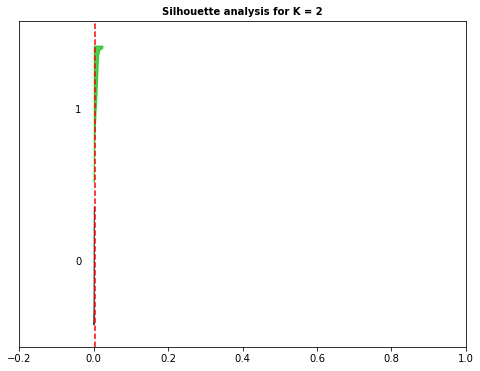

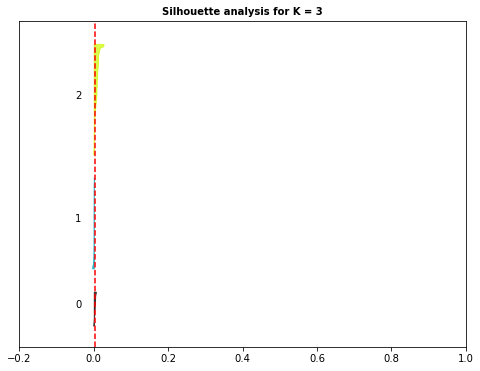

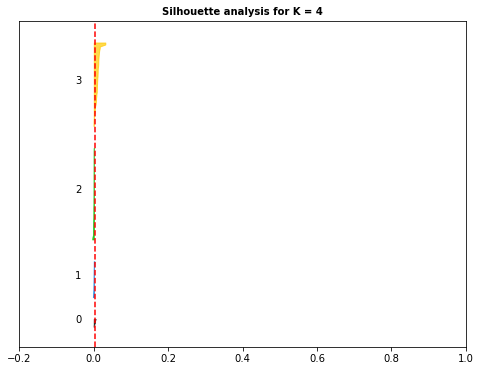

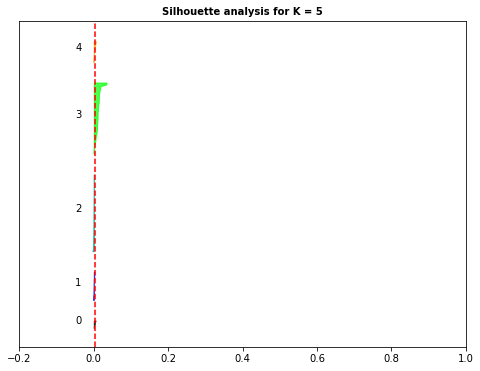

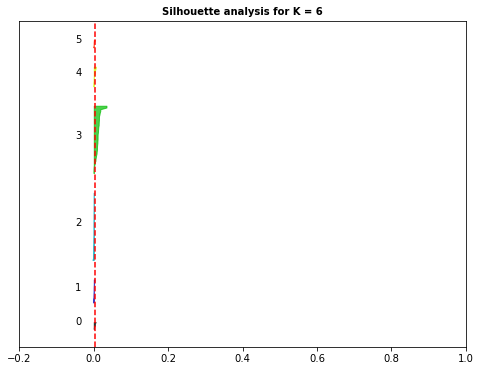

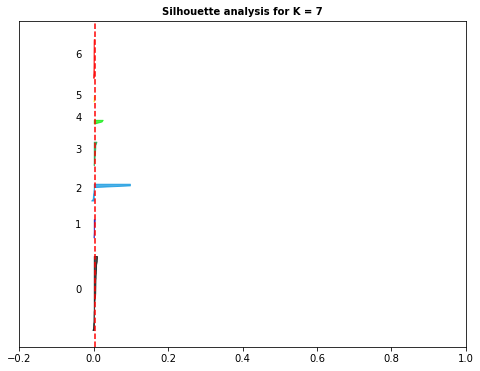

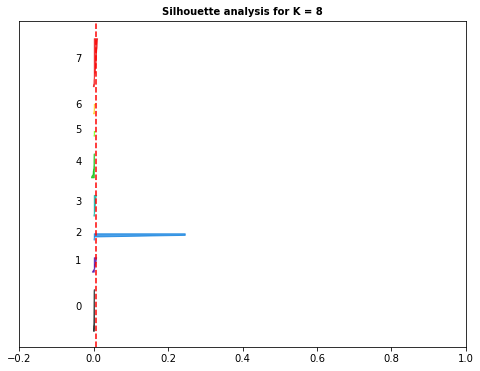

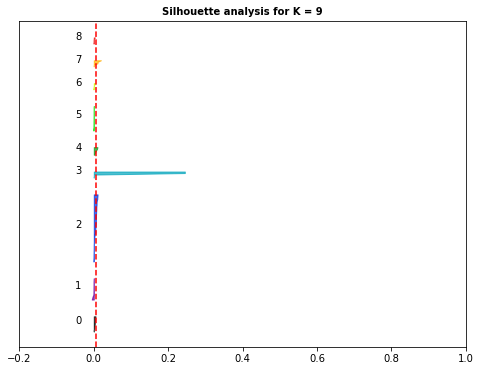

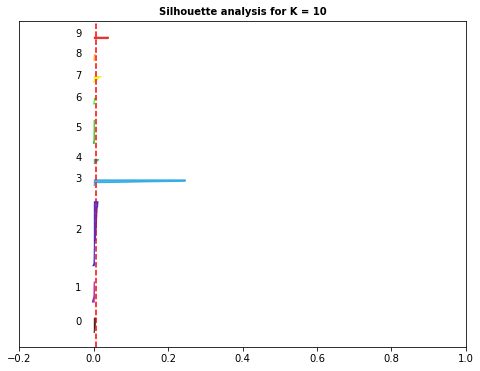

In [15]:
silhouette(kmeans_results, final_df, plot=True)

In [16]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

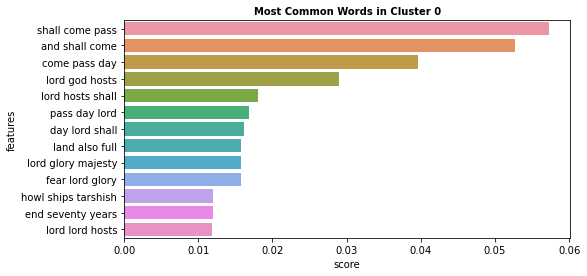

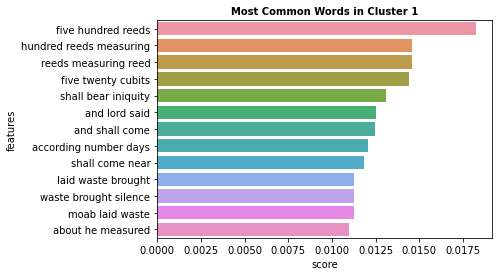

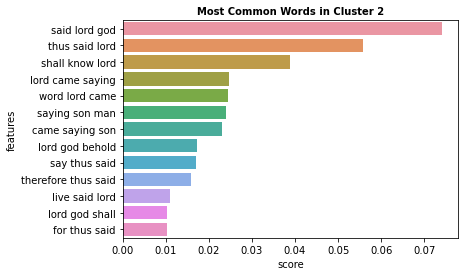

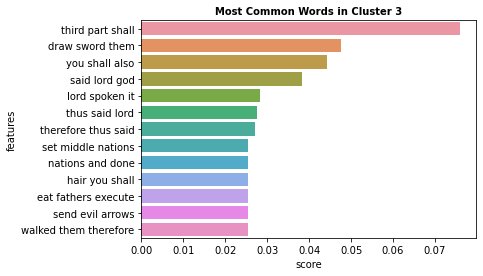

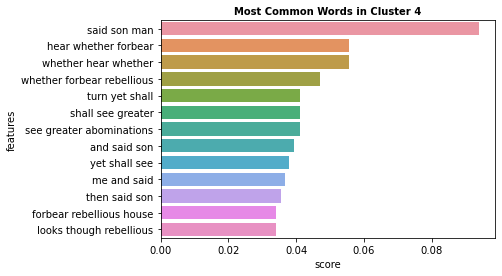

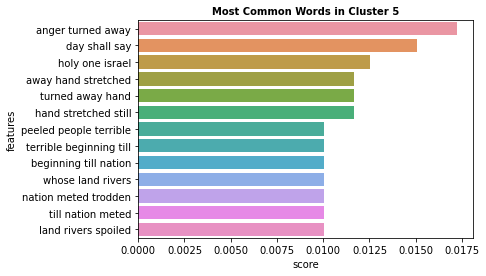

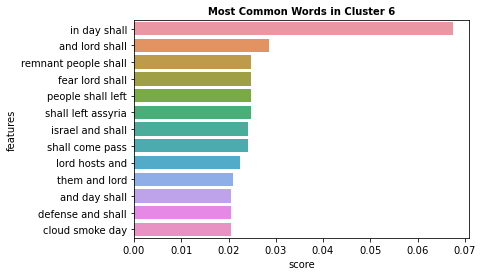

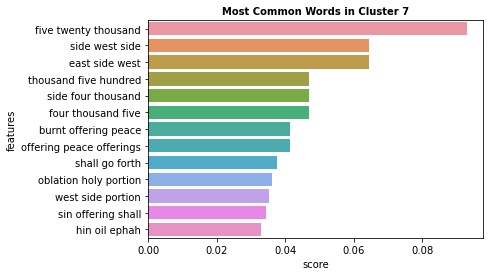

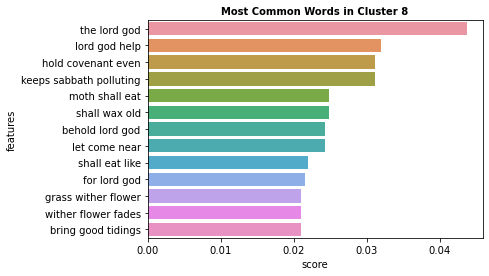

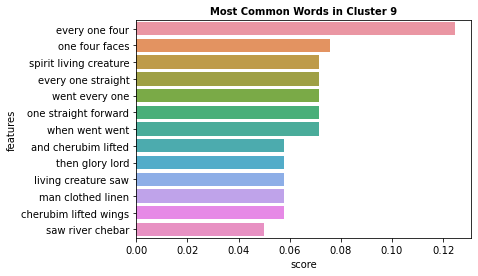

In [17]:
best_result = 10
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [18]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

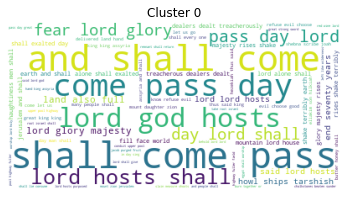

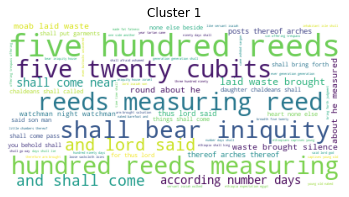

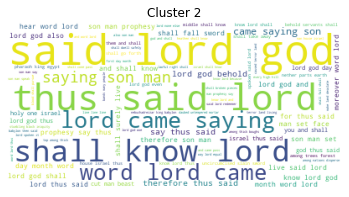

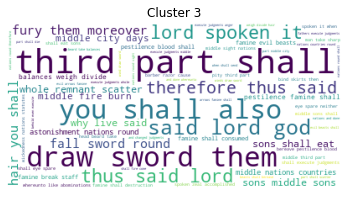

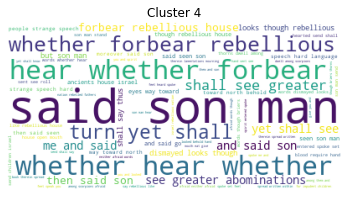

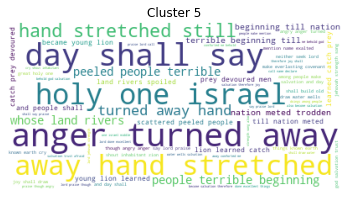

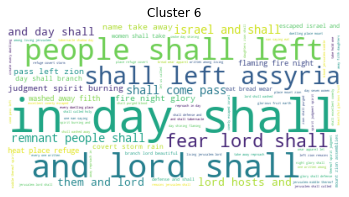

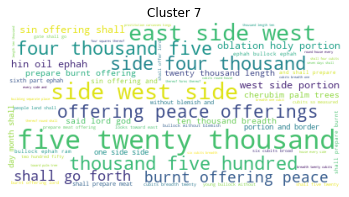

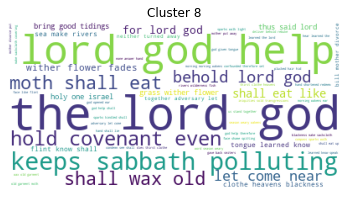

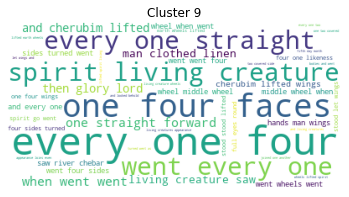

In [19]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [20]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Isaias_1,"'vision', 'isaiah', 'son', 'amoz', ',', 'saw',...",6
101,Isaias_2,"'word', 'isaiah', 'son', 'amoz', 'saw', 'conce...",0
102,Isaias_3,"',', 'behold', ',', 'lord', ',', 'lord', 'host...",0
103,Isaias_4,"'day', 'seven', 'women', 'shall', 'take', 'hol...",6
104,Isaias_5,"'sing', 'well', 'beloved', 'song', 'beloved', ...",5


In [21]:
print(df)

           Autor                                              Livro  label
100     Isaias_1  'vision', 'isaiah', 'son', 'amoz', ',', 'saw',...      6
101     Isaias_2  'word', 'isaiah', 'son', 'amoz', 'saw', 'conce...      0
102     Isaias_3  ',', 'behold', ',', 'lord', ',', 'lord', 'host...      0
103     Isaias_4  'day', 'seven', 'women', 'shall', 'take', 'hol...      6
104     Isaias_5  'sing', 'well', 'beloved', 'song', 'beloved', ...      5
..           ...                                                ...    ...
209  Ezequiel_44  'brought', 'back', 'way', 'gate', 'outward', '...      1
210  Ezequiel_45  'moreover', ',', 'shall', 'divide', 'lot', 'la...      7
211  Ezequiel_46  'thus', 'said', 'lord', 'god', ';', 'gate', 'i...      7
212  Ezequiel_47  'afterward', 'brought', 'door', 'house', ';', ...      1
213  Ezequiel_48  'names', 'tribes', '.', 'north', 'end', 'coast...      7

[114 rows x 3 columns]
